In [5]:
import pandas as pd
import numpy as np
import itertools
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()

#--------------------------
#Data set

# Ref: https://github.com/serengil/deepface/tree/master/tests/dataset
idendities = {
    "Angelina": ["img1.jpg", "img2.jpg", "img4.jpg", "img5.jpg", "img6.jpg", "img7.jpg", "img10.jpg", "img11.jpg"],
    "Scarlett": ["img8.jpg", "img9.jpg", "img47.jpg", "img48.jpg", "img49.jpg", "img50.jpg", "img51.jpg"],
    "Jennifer": ["img3.jpg", "img12.jpg", "img53.jpg", "img54.jpg", "img55.jpg", "img56.jpg"],
    "Mark": ["img13.jpg", "img14.jpg", "img15.jpg", "img57.jpg", "img58.jpg"],
    "Jack": ["img16.jpg", "img17.jpg", "img59.jpg", "img61.jpg", "img62.jpg"],
    "Elon": ["img18.jpg", "img19.jpg", "img67.jpg"],
    "Jeff": ["img20.jpg", "img21.jpg"],
    "Marissa": ["img22.jpg", "img23.jpg"],
    "Sundar": ["img24.jpg", "img25.jpg"],
    "Katy": ["img26.jpg", "img27.jpg", "img28.jpg", "img42.jpg", "img43.jpg", "img44.jpg", "img45.jpg", "img46.jpg"],
    "Matt": ["img29.jpg", "img30.jpg", "img31.jpg", "img32.jpg", "img33.jpg"],
    "Leonardo": ["img34.jpg", "img35.jpg", "img36.jpg", "img37.jpg"],
    "George": ["img38.jpg", "img39.jpg", "img40.jpg", "img41.jpg"]
}

In [2]:
#--------------------------
#Positives

positives = []

for key, values in idendities.items():

    #print(key)
    for i in range(0, len(values)-1):
        for j in range(i+1, len(values)):
            #print(values[i], " and ", values[j])
            positive = []
            positive.append(values[i])
            positive.append(values[j])
            positives.append(positive)

positives = pd.DataFrame(positives, columns = ["file_x", "file_y"])
positives["decision"] = "Yes"

print(positives.shape)

(140, 3)


In [3]:
#--------------------------
#Negatives

samples_list = list(idendities.values())

negatives = []

for i in range(0, len(idendities) - 1):
    for j in range(i+1, len(idendities)):
        #print(samples_list[i], " vs ",samples_list[j])
        cross_product = itertools.product(samples_list[i], samples_list[j])
        cross_product = list(cross_product)
        #print(cross_product)

        for cross_sample in cross_product:
            #print(cross_sample[0], " vs ", cross_sample[1])
            negative = []
            negative.append(cross_sample[0])
            negative.append(cross_sample[1])
            negatives.append(negative)

negatives = pd.DataFrame(negatives, columns = ["file_x", "file_y"])
negatives["decision"] = "No"

negatives = negatives.sample(positives.shape[0])

print(negatives.shape)
#--------------------------
#Merge positive and negative ones

(140, 3)


In [9]:
#Merge positive and negative ones

df = pd.concat([positives, negatives]).reset_index(drop = True)

print(df.decision.value_counts())

df.file_x = "tests/dataset/"+df.file_x
df.file_y = "tests/dataset/"+df.file_y

print(df.head())


Yes    140
No     140
Name: decision, dtype: int64
                   file_x                  file_y decision
0  tests/dataset/img1.jpg  tests/dataset/img2.jpg      Yes
1  tests/dataset/img1.jpg  tests/dataset/img4.jpg      Yes
2  tests/dataset/img1.jpg  tests/dataset/img5.jpg      Yes
3  tests/dataset/img1.jpg  tests/dataset/img6.jpg      Yes
4  tests/dataset/img1.jpg  tests/dataset/img7.jpg      Yes


In [10]:

from deepface.basemodels import VGGFace, OpenFace, Facenet, FbDeepFace,InsightFace

pretrained_models = {}
pretrained_models["InsightFace"] = InsightFace.loadModel('ms1mv3_r50')
print("VGG-Face loaded")

pretrained_models["VGG-Face"] = VGGFace.loadModel()
print("VGG-Face loaded")
pretrained_models["Facenet"] = Facenet.loadModel()
print("Facenet loaded")
pretrained_models["OpenFace"] = OpenFace.loadModel()
print("OpenFace loaded")
pretrained_models["DeepFace"] = FbDeepFace.loadModel()
print("FbDeepFace loaded")


VGG-Face loaded
VGG-Face loaded
Facenet loaded
OpenFace loaded
FbDeepFace loaded


In [11]:
instances = df[["file_x", "file_y"]].values.tolist()

models = ['InsightFace','VGG-Face', 'Facenet', 'OpenFace', 'DeepFace']
metrics = ['cosine', 'euclidean_l2','euclidean']

In [12]:

from deepface import DeepFace

In [13]:
if False:
    for model in models:
        for metric in metrics:

            resp_obj = DeepFace.verify(instances
                                       , model_name = model
                                       , model = pretrained_models[model]
                                       , distance_metric = metric
                                       , enforce_detection = False)

            distances = []

            for i in range(0, len(instances)):
                distance = round(resp_obj["pair_%s" % (i+1)]["distance"], 4)
                distances.append(distance)

            df['%s_%s' % (model, metric)] = distances

    df.to_csv("face-recognition-pivot.csv", index = False)
else:
    df = pd.read_csv("face-recognition-pivot.csv")

df_raw = df.copy()

Verification:   0%|                                                                                         | 0/280 [00:00<?, ?it/s]

(769, 769, 3)


Verification:   0%|▎                                                                                | 1/280 [00:01<04:50,  1.04s/it]

(512, 512, 3)
ensemble_features []
(769, 769, 3)


Verification:   1%|▌                                                                                | 2/280 [00:01<04:21,  1.06it/s]

(919, 919, 3)
ensemble_features []
(769, 769, 3)
(242, 242, 3)


Verification:   1%|▊                                                                                | 3/280 [00:02<03:25,  1.35it/s]

ensemble_features []
(769, 769, 3)
(531, 531, 3)


Verification:   1%|█▏                                                                               | 4/280 [00:02<03:06,  1.48it/s]

ensemble_features []
(769, 769, 3)


Verification:   2%|█▍                                                                               | 5/280 [00:03<03:16,  1.40it/s]

(746, 746, 3)
ensemble_features []
(769, 769, 3)
(280, 280, 3)


Verification:   2%|█▋                                                                               | 6/280 [00:04<03:02,  1.50it/s]

ensemble_features []
(769, 769, 3)
(353, 353, 3)


Verification:   2%|██                                                                               | 7/280 [00:04<02:53,  1.57it/s]

ensemble_features []
(512, 512, 3)


Verification:   3%|██▎                                                                              | 8/280 [00:05<03:02,  1.49it/s]

(919, 919, 3)
ensemble_features []
(512, 512, 3)
(242, 242, 3)


Verification:   3%|██▌                                                                              | 9/280 [00:06<02:43,  1.66it/s]

ensemble_features []
(512, 512, 3)
(531, 531, 3)


Verification:   4%|██▊                                                                             | 10/280 [00:06<02:34,  1.75it/s]

ensemble_features []
(512, 512, 3)


Verification:   4%|███▏                                                                            | 11/280 [00:07<02:42,  1.65it/s]

(746, 746, 3)
ensemble_features []
(512, 512, 3)
(280, 280, 3)


Verification:   4%|███▍                                                                            | 12/280 [00:07<02:37,  1.71it/s]

ensemble_features []
(512, 512, 3)
(353, 353, 3)


Verification:   5%|███▋                                                                            | 13/280 [00:08<02:31,  1.77it/s]

ensemble_features []
(919, 919, 3)
(242, 242, 3)


Verification:   5%|████                                                                            | 14/280 [00:08<02:30,  1.76it/s]

ensemble_features []
(919, 919, 3)


Verification:   5%|████▎                                                                           | 15/280 [00:09<02:35,  1.70it/s]

(531, 531, 3)
ensemble_features []
(919, 919, 3)


Verification:   6%|████▌                                                                           | 16/280 [00:10<02:48,  1.56it/s]

(746, 746, 3)
ensemble_features []
(919, 919, 3)
(280, 280, 3)


Verification:   6%|████▊                                                                           | 17/280 [00:10<02:40,  1.64it/s]

ensemble_features []
(919, 919, 3)
(353, 353, 3)


Verification:   6%|█████▏                                                                          | 18/280 [00:11<02:34,  1.69it/s]

ensemble_features []
(242, 242, 3)


Verification:   7%|█████▍                                                                          | 19/280 [00:11<02:12,  1.98it/s]

(531, 531, 3)
ensemble_features []
(242, 242, 3)


Verification:   7%|█████▋                                                                          | 20/280 [00:12<02:16,  1.90it/s]

(746, 746, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|██████                                                                          | 21/280 [00:12<01:59,  2.17it/s]

(280, 280, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|██████▎                                                                         | 22/280 [00:12<01:52,  2.30it/s]

(353, 353, 3)
ensemble_features []
(531, 531, 3)


Verification:   8%|██████▌                                                                         | 23/280 [00:13<02:06,  2.03it/s]

(746, 746, 3)
ensemble_features []
(531, 531, 3)
(280, 280, 3)


Verification:   9%|██████▊                                                                         | 24/280 [00:14<02:16,  1.88it/s]

ensemble_features []
(531, 531, 3)


Verification:   9%|███████▏                                                                        | 25/280 [00:14<02:16,  1.86it/s]

(353, 353, 3)
ensemble_features []
(746, 746, 3)
(280, 280, 3)


Verification:   9%|███████▍                                                                        | 26/280 [00:15<02:14,  1.89it/s]

ensemble_features []
(746, 746, 3)


Verification:  10%|███████▋                                                                        | 27/280 [00:15<02:20,  1.81it/s]

(353, 353, 3)
ensemble_features []
(280, 280, 3)


Verification:  10%|████████                                                                        | 28/280 [00:16<02:05,  2.00it/s]

(353, 353, 3)
ensemble_features []
(320, 320, 3)


Verification:  10%|████████▎                                                                       | 29/280 [00:16<02:10,  1.93it/s]

(634, 634, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▌                                                                       | 30/280 [00:17<02:19,  1.80it/s]

(810, 810, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▊                                                                       | 31/280 [00:18<02:32,  1.63it/s]

(430, 430, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|█████████▏                                                                      | 32/280 [00:20<04:10,  1.01s/it]

(1350, 1350, 3)
ensemble_features []
(320, 320, 3)
(210, 210, 3)


Verification:  12%|█████████▍                                                                      | 33/280 [00:21<04:06,  1.00it/s]

ensemble_features []
(320, 320, 3)


Verification:  12%|█████████▋                                                                      | 34/280 [00:21<03:47,  1.08it/s]

(302, 302, 3)
ensemble_features []
(634, 634, 3)


Verification:  12%|██████████                                                                      | 35/280 [00:22<03:26,  1.19it/s]

(810, 810, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|██████████▎                                                                     | 36/280 [00:23<03:17,  1.24it/s]

(430, 430, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|██████████▌                                                                     | 37/280 [00:24<03:45,  1.08it/s]

(1350, 1350, 3)
ensemble_features []
(634, 634, 3)
(210, 210, 3)


Verification:  14%|██████████▊                                                                     | 38/280 [00:24<03:09,  1.27it/s]

ensemble_features []
(634, 634, 3)
(302, 302, 3)


Verification:  14%|███████████▏                                                                    | 39/280 [00:25<02:43,  1.48it/s]

ensemble_features []
(810, 810, 3)


Verification:  14%|███████████▍                                                                    | 40/280 [00:26<02:44,  1.46it/s]

(430, 430, 3)
ensemble_features []
(810, 810, 3)


Verification:  15%|███████████▋                                                                    | 41/280 [00:27<03:22,  1.18it/s]

(1350, 1350, 3)
ensemble_features []
(810, 810, 3)
(210, 210, 3)
ensemble_features []


Verification:  15%|████████████                                                                    | 42/280 [00:27<02:55,  1.36it/s]

(810, 810, 3)
(302, 302, 3)


Verification:  15%|████████████▎                                                                   | 43/280 [00:28<02:37,  1.50it/s]

ensemble_features []
(430, 430, 3)


Verification:  16%|████████████▌                                                                   | 44/280 [00:29<03:07,  1.26it/s]

(1350, 1350, 3)
ensemble_features []
(430, 430, 3)
(210, 210, 3)


Verification:  16%|████████████▊                                                                   | 45/280 [00:29<02:38,  1.48it/s]

ensemble_features []
(430, 430, 3)


Verification:  16%|█████████████▏                                                                  | 46/280 [00:30<02:17,  1.70it/s]

(302, 302, 3)
ensemble_features []


Verification:  17%|█████████████▍                                                                  | 47/280 [00:31<02:40,  1.45it/s]

(1350, 1350, 3)
(210, 210, 3)
ensemble_features []
(1350, 1350, 3)
(302, 302, 3)


Verification:  17%|█████████████▋                                                                  | 48/280 [00:31<02:56,  1.31it/s]

ensemble_features []
(210, 210, 3)
(302, 302, 3)


Verification:  18%|██████████████                                                                  | 49/280 [00:32<02:20,  1.64it/s]

ensemble_features []
(835, 835, 3)
(170, 170, 3)


Verification:  18%|██████████████▎                                                                 | 50/280 [00:32<02:24,  1.59it/s]

ensemble_features []
(835, 835, 3)


Verification:  18%|██████████████▌                                                                 | 51/280 [00:33<02:29,  1.53it/s]

(303, 303, 3)
ensemble_features []
(835, 835, 3)


Verification:  19%|██████████████▊                                                                 | 52/280 [00:34<03:05,  1.23it/s]

(682, 682, 3)
ensemble_features []
(835, 835, 3)
(286, 286, 3)


Verification:  19%|███████████████▏                                                                | 53/280 [00:35<02:55,  1.29it/s]

ensemble_features []
(835, 835, 3)
(295, 295, 3)


Verification:  19%|███████████████▍                                                                | 54/280 [00:36<02:50,  1.33it/s]

ensemble_features []
(170, 170, 3)


Verification:  20%|███████████████▋                                                                | 55/280 [00:36<02:20,  1.61it/s]

(303, 303, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|████████████████                                                                | 56/280 [00:37<02:30,  1.48it/s]

(682, 682, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|████████████████▎                                                               | 57/280 [00:37<02:05,  1.77it/s]

(286, 286, 3)
ensemble_features []
(170, 170, 3)


Verification:  21%|████████████████▌                                                               | 58/280 [00:37<01:49,  2.02it/s]

(295, 295, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████▊                                                               | 59/280 [00:38<02:12,  1.67it/s]

(682, 682, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|█████████████████▏                                                              | 60/280 [00:39<01:56,  1.89it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  22%|█████████████████▍                                                              | 61/280 [00:39<01:46,  2.06it/s]

(295, 295, 3)
ensemble_features []
(682, 682, 3)
(286, 286, 3)


Verification:  22%|█████████████████▋                                                              | 62/280 [00:40<02:09,  1.69it/s]

ensemble_features []
(682, 682, 3)
(295, 295, 3)


Verification:  22%|██████████████████                                                              | 63/280 [00:41<02:25,  1.49it/s]

ensemble_features []
(286, 286, 3)


Verification:  23%|██████████████████▎                                                             | 64/280 [00:41<02:05,  1.72it/s]

(295, 295, 3)
ensemble_features []
(530, 530, 3)
(196, 196, 3)


Verification:  23%|██████████████████▌                                                             | 65/280 [00:42<02:01,  1.77it/s]

ensemble_features []
(530, 530, 3)
(355, 355, 3)


Verification:  24%|██████████████████▊                                                             | 66/280 [00:42<02:00,  1.78it/s]

ensemble_features []
(530, 530, 3)


Verification:  24%|███████████████████▏                                                            | 67/280 [00:43<02:00,  1.77it/s]

(304, 304, 3)
ensemble_features []
(530, 530, 3)
(287, 287, 3)


Verification:  24%|███████████████████▍                                                            | 68/280 [00:43<01:59,  1.77it/s]

ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████▋                                                            | 69/280 [00:44<01:43,  2.04it/s]

(355, 355, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|████████████████████                                                            | 70/280 [00:44<01:33,  2.24it/s]

(304, 304, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|████████████████████▎                                                           | 71/280 [00:44<01:26,  2.41it/s]

(287, 287, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|████████████████████▌                                                           | 72/280 [00:45<01:25,  2.44it/s]

(304, 304, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|████████████████████▊                                                           | 73/280 [00:45<01:23,  2.48it/s]

(287, 287, 3)
ensemble_features []
(304, 304, 3)
(287, 287, 3)


Verification:  26%|█████████████████████▏                                                          | 74/280 [00:46<01:23,  2.47it/s]

ensemble_features []
(248, 248, 3)
(270, 270, 3)


Verification:  27%|█████████████████████▍                                                          | 75/280 [00:46<01:14,  2.75it/s]

ensemble_features []
(248, 248, 3)


Verification:  27%|█████████████████████▋                                                          | 76/280 [00:46<01:12,  2.80it/s]

(393, 393, 3)
ensemble_features []
(248, 248, 3)


Verification:  28%|██████████████████████                                                          | 77/280 [00:46<01:07,  3.00it/s]

(377, 377, 3)
ensemble_features []
(248, 248, 3)


Verification:  28%|██████████████████████▎                                                         | 78/280 [00:47<01:02,  3.24it/s]

(231, 231, 3)
ensemble_features []
(270, 270, 3)


Verification:  28%|██████████████████████▌                                                         | 79/280 [00:47<01:04,  3.13it/s]

(393, 393, 3)
ensemble_features []
(270, 270, 3)


Verification:  29%|██████████████████████▊                                                         | 80/280 [00:47<01:01,  3.23it/s]

(377, 377, 3)
ensemble_features []
(270, 270, 3)


Verification:  29%|███████████████████████▏                                                        | 81/280 [00:48<01:00,  3.31it/s]

(231, 231, 3)
ensemble_features []
(393, 393, 3)
(377, 377, 3)


Verification:  29%|███████████████████████▍                                                        | 82/280 [00:48<01:08,  2.90it/s]

ensemble_features []
(393, 393, 3)


Verification:  30%|███████████████████████▋                                                        | 83/280 [00:48<01:12,  2.71it/s]

(231, 231, 3)
ensemble_features []
(377, 377, 3)
(231, 231, 3)


Verification:  30%|████████████████████████                                                        | 84/280 [00:49<01:07,  2.90it/s]

ensemble_features []
(526, 526, 3)


Verification:  30%|████████████████████████▎                                                       | 85/280 [00:49<01:16,  2.55it/s]

(684, 684, 3)
ensemble_features []
(526, 526, 3)
(260, 260, 3)


Verification:  31%|████████████████████████▌                                                       | 86/280 [00:50<01:14,  2.61it/s]

ensemble_features []
(684, 684, 3)


Verification:  31%|████████████████████████▊                                                       | 87/280 [00:50<01:17,  2.50it/s]

(260, 260, 3)
ensemble_features []
(371, 371, 3)


Verification:  31%|█████████████████████████▏                                                      | 88/280 [00:50<01:10,  2.71it/s]

(276, 276, 3)
ensemble_features []
(349, 349, 3)


Verification:  32%|█████████████████████████▍                                                      | 89/280 [00:51<01:34,  2.02it/s]

(721, 721, 3)
ensemble_features []
(656, 656, 3)
(222, 222, 3)


Verification:  32%|█████████████████████████▋                                                      | 90/280 [00:52<01:34,  2.01it/s]

ensemble_features []
(896, 896, 3)
(135, 135, 3)


Verification:  32%|██████████████████████████                                                      | 91/280 [00:52<01:46,  1.77it/s]

ensemble_features []
(896, 896, 3)
(246, 246, 3)


Verification:  33%|██████████████████████████▎                                                     | 92/280 [00:53<01:56,  1.62it/s]

ensemble_features []
(896, 896, 3)


Verification:  33%|██████████████████████████▌                                                     | 93/280 [00:54<02:03,  1.52it/s]

(298, 298, 3)
ensemble_features []
(896, 896, 3)
(139, 139, 3)


Verification:  34%|██████████████████████████▊                                                     | 94/280 [00:55<02:39,  1.17it/s]

ensemble_features []
(896, 896, 3)
(204, 204, 3)


Verification:  34%|███████████████████████████▏                                                    | 95/280 [00:56<02:29,  1.24it/s]

ensemble_features []
(896, 896, 3)
(251, 251, 3)


Verification:  34%|███████████████████████████▍                                                    | 96/280 [00:57<02:57,  1.03it/s]

ensemble_features []
(896, 896, 3)


Verification:  35%|███████████████████████████▋                                                    | 97/280 [00:58<02:52,  1.06it/s]

(172, 172, 3)
ensemble_features []
(135, 135, 3)


Verification:  35%|████████████████████████████                                                    | 98/280 [00:58<02:16,  1.33it/s]

(246, 246, 3)
ensemble_features []
(135, 135, 3)


Verification:  35%|████████████████████████████▎                                                   | 99/280 [00:59<01:53,  1.59it/s]

(298, 298, 3)
ensemble_features []
(135, 135, 3)


Verification:  36%|████████████████████████████▏                                                  | 100/280 [00:59<01:37,  1.85it/s]

(139, 139, 3)
ensemble_features []
(135, 135, 3)


Verification:  36%|████████████████████████████▍                                                  | 101/280 [00:59<01:23,  2.15it/s]

(204, 204, 3)
ensemble_features []
(135, 135, 3)


Verification:  36%|████████████████████████████▊                                                  | 102/280 [01:00<01:15,  2.37it/s]

(251, 251, 3)
ensemble_features []
(135, 135, 3)


Verification:  37%|█████████████████████████████                                                  | 103/280 [01:00<01:08,  2.58it/s]

(172, 172, 3)
ensemble_features []
(246, 246, 3)


Verification:  37%|█████████████████████████████▎                                                 | 104/280 [01:00<01:05,  2.70it/s]

(298, 298, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|█████████████████████████████▋                                                 | 105/280 [01:01<00:59,  2.93it/s]

(139, 139, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|█████████████████████████████▉                                                 | 106/280 [01:01<00:58,  2.98it/s]

(204, 204, 3)
ensemble_features []
(246, 246, 3)
(251, 251, 3)


Verification:  38%|██████████████████████████████▏                                                | 107/280 [01:01<01:04,  2.68it/s]

ensemble_features []
(246, 246, 3)


Verification:  39%|██████████████████████████████▍                                                | 108/280 [01:02<01:09,  2.47it/s]

(172, 172, 3)
ensemble_features []
(298, 298, 3)


Verification:  39%|██████████████████████████████▊                                                | 109/280 [01:02<01:12,  2.37it/s]

(139, 139, 3)
ensemble_features []
(298, 298, 3)


Verification:  39%|███████████████████████████████                                                | 110/280 [01:03<01:16,  2.22it/s]

(204, 204, 3)
ensemble_features []
(298, 298, 3)
(251, 251, 3)


Verification:  40%|███████████████████████████████▎                                               | 111/280 [01:03<01:13,  2.29it/s]

ensemble_features []
(298, 298, 3)


Verification:  40%|███████████████████████████████▌                                               | 112/280 [01:04<01:09,  2.42it/s]

(172, 172, 3)
ensemble_features []
(139, 139, 3)


Verification:  40%|███████████████████████████████▉                                               | 113/280 [01:04<01:03,  2.63it/s]

(204, 204, 3)
ensemble_features []
(139, 139, 3)


Verification:  41%|████████████████████████████████▏                                              | 114/280 [01:04<01:02,  2.68it/s]

(251, 251, 3)
ensemble_features []
(139, 139, 3)


Verification:  41%|████████████████████████████████▍                                              | 115/280 [01:05<00:56,  2.92it/s]

(172, 172, 3)
ensemble_features []
(204, 204, 3)


Verification:  41%|████████████████████████████████▋                                              | 116/280 [01:05<01:00,  2.72it/s]

(251, 251, 3)
ensemble_features []
(204, 204, 3)


Verification:  42%|█████████████████████████████████                                              | 117/280 [01:05<00:58,  2.79it/s]

(172, 172, 3)
ensemble_features []
(251, 251, 3)
(172, 172, 3)


Verification:  42%|█████████████████████████████████▎                                             | 118/280 [01:06<00:57,  2.80it/s]

ensemble_features []
(295, 295, 3)


Verification:  42%|█████████████████████████████████▌                                             | 119/280 [01:06<01:07,  2.38it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|█████████████████████████████████▊                                             | 120/280 [01:07<01:12,  2.19it/s]

(695, 695, 3)
ensemble_features []
(295, 295, 3)
(817, 817, 3)


Verification:  43%|██████████████████████████████████▏                                            | 121/280 [01:08<01:28,  1.79it/s]

ensemble_features []
(295, 295, 3)


Verification:  44%|██████████████████████████████████▍                                            | 122/280 [01:08<01:43,  1.52it/s]

(973, 973, 3)
ensemble_features []
(575, 575, 3)
(695, 695, 3)


Verification:  44%|██████████████████████████████████▋                                            | 123/280 [01:09<01:53,  1.38it/s]

ensemble_features []
(575, 575, 3)
(817, 817, 3)


Verification:  44%|██████████████████████████████████▉                                            | 124/280 [01:10<02:06,  1.23it/s]

ensemble_features []
(575, 575, 3)


Verification:  45%|███████████████████████████████████▎                                           | 125/280 [01:11<02:10,  1.19it/s]

(973, 973, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|███████████████████████████████████▌                                           | 126/280 [01:12<02:04,  1.24it/s]

(817, 817, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|███████████████████████████████████▊                                           | 127/280 [01:13<02:12,  1.16it/s]

(973, 973, 3)
ensemble_features []
(817, 817, 3)


Verification:  46%|████████████████████████████████████                                           | 128/280 [01:14<02:15,  1.13it/s]

(973, 973, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|████████████████████████████████████▍                                          | 129/280 [01:14<01:58,  1.28it/s]

(410, 410, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|████████████████████████████████████▋                                          | 130/280 [01:15<01:45,  1.42it/s]

(330, 330, 3)
ensemble_features []
(464, 464, 3)


Verification:  47%|████████████████████████████████████▉                                          | 131/280 [01:15<01:35,  1.56it/s]

(219, 219, 3)
ensemble_features []
(410, 410, 3)


Verification:  47%|█████████████████████████████████████▏                                         | 132/280 [01:16<01:30,  1.64it/s]

(330, 330, 3)
ensemble_features []
(410, 410, 3)
(219, 219, 3)


Verification:  48%|█████████████████████████████████████▌                                         | 133/280 [01:16<01:21,  1.79it/s]

ensemble_features []
(330, 330, 3)


Verification:  48%|█████████████████████████████████████▊                                         | 134/280 [01:17<01:16,  1.92it/s]

(219, 219, 3)
ensemble_features []
(286, 286, 3)


Verification:  48%|██████████████████████████████████████                                         | 135/280 [01:17<01:16,  1.91it/s]

(824, 824, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|██████████████████████████████████████▎                                        | 136/280 [01:19<02:05,  1.14it/s]

(1584, 1584, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|██████████████████████████████████████▋                                        | 137/280 [01:20<01:53,  1.26it/s]

(983, 983, 3)
ensemble_features []
(824, 824, 3)


Verification:  49%|██████████████████████████████████████▉                                        | 138/280 [01:21<02:26,  1.03s/it]

(1584, 1584, 3)
ensemble_features []
(824, 824, 3)


Verification:  50%|███████████████████████████████████████▏                                       | 139/280 [01:22<02:16,  1.03it/s]

(983, 983, 3)
ensemble_features []
(1584, 1584, 3)


Verification:  50%|███████████████████████████████████████▌                                       | 140/280 [01:24<02:42,  1.16s/it]

(983, 983, 3)
ensemble_features []
(746, 746, 3)


Verification:  50%|███████████████████████████████████████▊                                       | 141/280 [01:24<02:18,  1.00it/s]

(410, 410, 3)
ensemble_features []
(287, 287, 3)


Verification:  51%|████████████████████████████████████████                                       | 142/280 [01:25<01:52,  1.22it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  51%|████████████████████████████████████████▎                                      | 143/280 [01:25<01:34,  1.45it/s]

(464, 464, 3)
ensemble_features []
(746, 746, 3)


Verification:  51%|████████████████████████████████████████▋                                      | 144/280 [01:26<01:29,  1.52it/s]

(656, 656, 3)
ensemble_features []
(242, 242, 3)


Verification:  52%|████████████████████████████████████████▉                                      | 145/280 [01:26<01:12,  1.86it/s]

(276, 276, 3)
ensemble_features []
(135, 135, 3)


Verification:  52%|█████████████████████████████████████████▏                                     | 146/280 [01:26<01:04,  2.08it/s]

(575, 575, 3)
ensemble_features []
(353, 353, 3)


Verification:  52%|█████████████████████████████████████████▍                                     | 147/280 [01:27<01:02,  2.12it/s]

(634, 634, 3)
ensemble_features []
(251, 251, 3)


Verification:  53%|█████████████████████████████████████████▊                                     | 148/280 [01:27<00:56,  2.34it/s]

(219, 219, 3)
ensemble_features []
(353, 353, 3)


Verification:  53%|██████████████████████████████████████████                                     | 149/280 [01:27<00:54,  2.42it/s]

(304, 304, 3)
ensemble_features []
(280, 280, 3)


Verification:  54%|██████████████████████████████████████████▎                                    | 150/280 [01:28<00:51,  2.54it/s]

(355, 355, 3)
ensemble_features []


Verification:  54%|██████████████████████████████████████████▌                                    | 151/280 [01:28<00:54,  2.37it/s]

(769, 769, 3)
(222, 222, 3)
ensemble_features []
(349, 349, 3)


Verification:  54%|██████████████████████████████████████████▉                                    | 152/280 [01:29<00:58,  2.19it/s]

(695, 695, 3)
ensemble_features []
(242, 242, 3)


Verification:  55%|███████████████████████████████████████████▏                                   | 153/280 [01:29<00:53,  2.39it/s]

(320, 320, 3)
ensemble_features []
(286, 286, 3)


Verification:  55%|███████████████████████████████████████████▍                                   | 154/280 [01:30<00:50,  2.50it/s]

(286, 286, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  55%|███████████████████████████████████████████▋                                   | 155/280 [01:31<01:14,  1.68it/s]

(526, 526, 3)
ensemble_features []
(656, 656, 3)
(286, 286, 3)


Verification:  56%|████████████████████████████████████████████                                   | 156/280 [01:31<01:07,  1.83it/s]

ensemble_features []
(353, 353, 3)


Verification:  56%|████████████████████████████████████████████▎                                  | 157/280 [01:32<01:16,  1.61it/s]

(835, 835, 3)
ensemble_features []
(170, 170, 3)
(204, 204, 3)


Verification:  56%|████████████████████████████████████████████▌                                  | 158/280 [01:32<01:04,  1.90it/s]

ensemble_features []
(280, 280, 3)


Verification:  57%|████████████████████████████████████████████▊                                  | 159/280 [01:33<01:08,  1.78it/s]

(721, 721, 3)
ensemble_features []
(769, 769, 3)
(204, 204, 3)


Verification:  57%|█████████████████████████████████████████████▏                                 | 160/280 [01:33<01:06,  1.81it/s]

ensemble_features []
(222, 222, 3)


Verification:  57%|█████████████████████████████████████████████▍                                 | 161/280 [01:34<01:03,  1.87it/s]

(695, 695, 3)
ensemble_features []
(835, 835, 3)
(371, 371, 3)


Verification:  58%|█████████████████████████████████████████████▋                                 | 162/280 [01:35<01:10,  1.68it/s]

ensemble_features []
(634, 634, 3)


Verification:  58%|█████████████████████████████████████████████▉                                 | 163/280 [01:35<01:13,  1.60it/s]

(530, 530, 3)
ensemble_features []
(530, 530, 3)


Verification:  59%|██████████████████████████████████████████████▎                                | 164/280 [01:37<01:44,  1.11it/s]

(1584, 1584, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  59%|██████████████████████████████████████████████▌                                | 165/280 [01:38<01:58,  1.03s/it]

(973, 973, 3)
ensemble_features []
(769, 769, 3)
(231, 231, 3)


Verification:  59%|██████████████████████████████████████████████▊                                | 166/280 [01:39<01:39,  1.14it/s]

ensemble_features []
(1350, 1350, 3)
(222, 222, 3)


Verification:  60%|███████████████████████████████████████████████                                | 167/280 [01:40<01:41,  1.12it/s]

ensemble_features []
(377, 377, 3)


Verification:  60%|███████████████████████████████████████████████▍                               | 168/280 [01:40<01:29,  1.25it/s]

(983, 983, 3)
ensemble_features []
(304, 304, 3)
(260, 260, 3)


Verification:  60%|███████████████████████████████████████████████▋                               | 169/280 [01:41<01:14,  1.48it/s]

ensemble_features []
(295, 295, 3)


Verification:  61%|███████████████████████████████████████████████▉                               | 170/280 [01:41<01:04,  1.70it/s]

(298, 298, 3)
ensemble_features []
(303, 303, 3)


Verification:  61%|████████████████████████████████████████████████▏                              | 171/280 [01:41<00:57,  1.90it/s]

(298, 298, 3)
ensemble_features []
(320, 320, 3)


Verification:  61%|████████████████████████████████████████████████▌                              | 172/280 [01:42<00:49,  2.16it/s]

(231, 231, 3)
ensemble_features []
(531, 531, 3)


Verification:  62%|████████████████████████████████████████████████▊                              | 173/280 [01:42<00:56,  1.89it/s]

(721, 721, 3)
ensemble_features []
(1350, 1350, 3)
(276, 276, 3)


Verification:  62%|█████████████████████████████████████████████████                              | 174/280 [01:43<01:09,  1.53it/s]

ensemble_features []
(526, 526, 3)


Verification:  62%|█████████████████████████████████████████████████▍                             | 175/280 [01:44<01:01,  1.70it/s]

(656, 656, 3)
ensemble_features []
(287, 287, 3)
(371, 371, 3)


Verification:  63%|█████████████████████████████████████████████████▋                             | 176/280 [01:44<00:54,  1.91it/s]

ensemble_features []
(280, 280, 3)


Verification:  63%|█████████████████████████████████████████████████▉                             | 177/280 [01:44<00:48,  2.12it/s]

(304, 304, 3)
ensemble_features []
(919, 919, 3)
(287, 287, 3)


Verification:  64%|██████████████████████████████████████████████████▏                            | 178/280 [01:45<00:51,  1.98it/s]

ensemble_features []
(530, 530, 3)
(298, 298, 3)


Verification:  64%|██████████████████████████████████████████████████▌                            | 179/280 [01:46<00:52,  1.92it/s]

ensemble_features []
(721, 721, 3)


Verification:  64%|██████████████████████████████████████████████████▊                            | 180/280 [01:46<00:58,  1.70it/s]

(410, 410, 3)
ensemble_features []
(695, 695, 3)
(286, 286, 3)


Verification:  65%|███████████████████████████████████████████████████                            | 181/280 [01:47<00:55,  1.79it/s]

ensemble_features []
(353, 353, 3)


Verification:  65%|███████████████████████████████████████████████████▎                           | 182/280 [01:47<00:49,  1.97it/s]

(656, 656, 3)
ensemble_features []
(280, 280, 3)


Verification:  65%|███████████████████████████████████████████████████▋                           | 183/280 [01:48<01:12,  1.33it/s]

(1584, 1584, 3)
ensemble_features []
(810, 810, 3)
(248, 248, 3)


Verification:  66%|███████████████████████████████████████████████████▉                           | 184/280 [01:49<01:04,  1.48it/s]

ensemble_features []
(353, 353, 3)


Verification:  66%|████████████████████████████████████████████████████▏                          | 185/280 [01:49<00:53,  1.78it/s]

(170, 170, 3)
ensemble_features []
(835, 835, 3)


Verification:  66%|████████████████████████████████████████████████████▍                          | 186/280 [01:50<01:05,  1.44it/s]

(896, 896, 3)
ensemble_features []
(302, 302, 3)


Verification:  67%|████████████████████████████████████████████████████▊                          | 187/280 [01:51<00:56,  1.65it/s]

(410, 410, 3)
ensemble_features []
(231, 231, 3)


Verification:  67%|█████████████████████████████████████████████████████                          | 188/280 [01:51<00:47,  1.94it/s]

(219, 219, 3)
ensemble_features []
(684, 684, 3)
(295, 295, 3)


Verification:  68%|█████████████████████████████████████████████████████▎                         | 189/280 [01:51<00:43,  2.09it/s]

ensemble_features []
(656, 656, 3)


Verification:  68%|█████████████████████████████████████████████████████▌                         | 190/280 [01:52<00:41,  2.19it/s]

(251, 251, 3)
ensemble_features []
(276, 276, 3)


Verification:  68%|█████████████████████████████████████████████████████▉                         | 191/280 [01:52<00:36,  2.41it/s]

(298, 298, 3)
ensemble_features []
(531, 531, 3)


Verification:  69%|██████████████████████████████████████████████████████▏                        | 192/280 [01:53<00:51,  1.70it/s]

(1350, 1350, 3)
ensemble_features []
(276, 276, 3)


Verification:  69%|██████████████████████████████████████████████████████▍                        | 193/280 [01:53<00:43,  2.00it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  69%|██████████████████████████████████████████████████████▋                        | 194/280 [01:54<00:38,  2.25it/s]

(276, 276, 3)
ensemble_features []
(530, 530, 3)
(139, 139, 3)


Verification:  70%|███████████████████████████████████████████████████████                        | 195/280 [01:54<00:39,  2.16it/s]

ensemble_features []
(196, 196, 3)


Verification:  70%|███████████████████████████████████████████████████████▎                       | 196/280 [01:54<00:34,  2.42it/s]

(371, 371, 3)
ensemble_features []
(170, 170, 3)


Verification:  70%|███████████████████████████████████████████████████████▌                       | 197/280 [01:55<00:33,  2.51it/s]

(349, 349, 3)
ensemble_features []
(393, 393, 3)
(246, 246, 3)


Verification:  71%|███████████████████████████████████████████████████████▊                       | 198/280 [01:55<00:31,  2.56it/s]

ensemble_features []
(355, 355, 3)


Verification:  71%|████████████████████████████████████████████████████████▏                      | 199/280 [01:56<00:30,  2.62it/s]

(371, 371, 3)
ensemble_features []
(769, 769, 3)
(355, 355, 3)


Verification:  71%|████████████████████████████████████████████████████████▍                      | 200/280 [01:56<00:34,  2.29it/s]

ensemble_features []
(377, 377, 3)


Verification:  72%|████████████████████████████████████████████████████████▋                      | 201/280 [01:57<00:39,  2.00it/s]

(721, 721, 3)
ensemble_features []
(210, 210, 3)


Verification:  72%|████████████████████████████████████████████████████████▉                      | 202/280 [01:57<00:34,  2.28it/s]

(219, 219, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  72%|█████████████████████████████████████████████████████████▎                     | 203/280 [01:58<00:47,  1.60it/s]

(656, 656, 3)
ensemble_features []
(1350, 1350, 3)
(170, 170, 3)


Verification:  73%|█████████████████████████████████████████████████████████▌                     | 204/280 [01:59<00:54,  1.39it/s]

ensemble_features []
(634, 634, 3)
(222, 222, 3)


Verification:  73%|█████████████████████████████████████████████████████████▊                     | 205/280 [02:00<00:47,  1.59it/s]

ensemble_features []
(526, 526, 3)


Verification:  74%|██████████████████████████████████████████████████████████                     | 206/280 [02:01<01:03,  1.17it/s]

(1584, 1584, 3)
ensemble_features []
(298, 298, 3)


Verification:  74%|██████████████████████████████████████████████████████████▍                    | 207/280 [02:01<00:55,  1.32it/s]

(824, 824, 3)
ensemble_features []
(355, 355, 3)


Verification:  74%|██████████████████████████████████████████████████████████▋                    | 208/280 [02:02<00:46,  1.54it/s]

(526, 526, 3)
ensemble_features []
(135, 135, 3)


Verification:  75%|██████████████████████████████████████████████████████████▉                    | 209/280 [02:02<00:38,  1.82it/s]

(286, 286, 3)
ensemble_features []
(656, 656, 3)
(219, 219, 3)


Verification:  75%|███████████████████████████████████████████████████████████▎                   | 210/280 [02:03<00:35,  1.98it/s]

ensemble_features []
(304, 304, 3)
(248, 248, 3)


Verification:  75%|███████████████████████████████████████████████████████████▌                   | 211/280 [02:03<00:34,  1.97it/s]

ensemble_features []
(248, 248, 3)
(349, 349, 3)


Verification:  76%|███████████████████████████████████████████████████████████▊                   | 212/280 [02:04<00:52,  1.29it/s]

ensemble_features []
(835, 835, 3)


Verification:  76%|████████████████████████████████████████████████████████████                   | 213/280 [02:05<00:51,  1.30it/s]

(349, 349, 3)
ensemble_features []
(746, 746, 3)


Verification:  76%|████████████████████████████████████████████████████████████▍                  | 214/280 [02:06<00:55,  1.18it/s]

(682, 682, 3)
ensemble_features []
(634, 634, 3)


Verification:  77%|████████████████████████████████████████████████████████████▋                  | 215/280 [02:07<00:57,  1.13it/s]

(682, 682, 3)
ensemble_features []
(746, 746, 3)
(219, 219, 3)


Verification:  77%|████████████████████████████████████████████████████████████▉                  | 216/280 [02:08<00:49,  1.28it/s]

ensemble_features []
(353, 353, 3)


Verification:  78%|█████████████████████████████████████████████████████████████▏                 | 217/280 [02:08<00:41,  1.53it/s]

(393, 393, 3)
ensemble_features []
(530, 530, 3)
(246, 246, 3)


Verification:  78%|█████████████████████████████████████████████████████████████▌                 | 218/280 [02:09<00:37,  1.64it/s]

ensemble_features []
(280, 280, 3)


Verification:  78%|█████████████████████████████████████████████████████████████▊                 | 219/280 [02:09<00:31,  1.92it/s]

(286, 286, 3)
ensemble_features []
(286, 286, 3)


Verification:  79%|██████████████████████████████████████████████████████████████                 | 220/280 [02:09<00:28,  2.10it/s]

(464, 464, 3)
ensemble_features []
(1350, 1350, 3)
(286, 286, 3)


Verification:  79%|██████████████████████████████████████████████████████████████▎                | 221/280 [02:10<00:37,  1.59it/s]

ensemble_features []
(270, 270, 3)
(246, 246, 3)


Verification:  79%|██████████████████████████████████████████████████████████████▋                | 222/280 [02:11<00:30,  1.92it/s]

ensemble_features []
(219, 219, 3)


Verification:  80%|██████████████████████████████████████████████████████████████▉                | 223/280 [02:12<00:43,  1.30it/s]

(1584, 1584, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  80%|███████████████████████████████████████████████████████████████▏               | 224/280 [02:13<00:48,  1.16it/s]

(304, 304, 3)
ensemble_features []
(512, 512, 3)


Verification:  80%|███████████████████████████████████████████████████████████████▍               | 225/280 [02:14<00:46,  1.18it/s]

(896, 896, 3)
ensemble_features []
(835, 835, 3)


Verification:  81%|███████████████████████████████████████████████████████████████▊               | 226/280 [02:15<00:46,  1.16it/s]

(695, 695, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  81%|████████████████████████████████████████████████████████████████               | 227/280 [02:16<00:50,  1.04it/s]

(817, 817, 3)
ensemble_features []
(248, 248, 3)


Verification:  81%|████████████████████████████████████████████████████████████████▎              | 228/280 [02:17<00:56,  1.09s/it]

(1584, 1584, 3)
ensemble_features []
(295, 295, 3)
(139, 139, 3)


Verification:  82%|████████████████████████████████████████████████████████████████▌              | 229/280 [02:18<00:43,  1.16it/s]

ensemble_features []
(242, 242, 3)
(204, 204, 3)


Verification:  82%|████████████████████████████████████████████████████████████████▉              | 230/280 [02:18<00:34,  1.46it/s]

ensemble_features []
(682, 682, 3)


Verification:  82%|█████████████████████████████████████████████████████████████████▏             | 231/280 [02:19<00:41,  1.18it/s]

(973, 973, 3)
ensemble_features []
(286, 286, 3)


Verification:  83%|█████████████████████████████████████████████████████████████████▍             | 232/280 [02:19<00:33,  1.43it/s]

(371, 371, 3)
ensemble_features []
(170, 170, 3)


Verification:  83%|█████████████████████████████████████████████████████████████████▋             | 233/280 [02:20<00:28,  1.66it/s]

(355, 355, 3)
ensemble_features []
(172, 172, 3)


Verification:  84%|██████████████████████████████████████████████████████████████████             | 234/280 [02:20<00:27,  1.68it/s]

(695, 695, 3)
ensemble_features []
(817, 817, 3)
(286, 286, 3)


Verification:  84%|██████████████████████████████████████████████████████████████████▎            | 235/280 [02:21<00:25,  1.74it/s]

ensemble_features []
(684, 684, 3)


Verification:  84%|██████████████████████████████████████████████████████████████████▌            | 236/280 [02:21<00:24,  1.81it/s]

(349, 349, 3)
ensemble_features []
(817, 817, 3)
(219, 219, 3)


Verification:  85%|██████████████████████████████████████████████████████████████████▊            | 237/280 [02:22<00:23,  1.84it/s]

ensemble_features []
(287, 287, 3)


Verification:  85%|███████████████████████████████████████████████████████████████████▏           | 238/280 [02:22<00:20,  2.09it/s]

(231, 231, 3)
ensemble_features []
(295, 295, 3)
(983, 983, 3)


Verification:  85%|███████████████████████████████████████████████████████████████████▍           | 239/280 [02:23<00:24,  1.68it/s]

ensemble_features []
(280, 280, 3)


Verification:  86%|███████████████████████████████████████████████████████████████████▋           | 240/280 [02:23<00:20,  1.93it/s]

(170, 170, 3)
ensemble_features []
(295, 295, 3)


Verification:  86%|███████████████████████████████████████████████████████████████████▉           | 241/280 [02:24<00:20,  1.86it/s]

(695, 695, 3)
ensemble_features []
(248, 248, 3)


Verification:  86%|████████████████████████████████████████████████████████████████████▎          | 242/280 [02:24<00:17,  2.15it/s]

(260, 260, 3)
ensemble_features []
(172, 172, 3)


Verification:  87%|████████████████████████████████████████████████████████████████████▌          | 243/280 [02:25<00:18,  2.02it/s]

(824, 824, 3)
ensemble_features []
(295, 295, 3)
(251, 251, 3)


Verification:  87%|████████████████████████████████████████████████████████████████████▊          | 244/280 [02:25<00:18,  1.99it/s]

ensemble_features []
(280, 280, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████████▏         | 245/280 [02:26<00:16,  2.07it/s]

(219, 219, 3)
ensemble_features []
(302, 302, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████████▍         | 246/280 [02:26<00:15,  2.26it/s]

(298, 298, 3)
ensemble_features []
(746, 746, 3)
(298, 298, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████████▋         | 247/280 [02:27<00:15,  2.12it/s]

ensemble_features []
(810, 810, 3)


Verification:  89%|█████████████████████████████████████████████████████████████████████▉         | 248/280 [02:27<00:16,  1.93it/s]

(410, 410, 3)
ensemble_features []
(320, 320, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████████▎        | 249/280 [02:28<00:15,  2.05it/s]

(393, 393, 3)
ensemble_features []
(746, 746, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████████▌        | 250/280 [02:28<00:15,  1.90it/s]

(330, 330, 3)
ensemble_features []
(280, 280, 3)


Verification:  90%|██████████████████████████████████████████████████████████████████████▊        | 251/280 [02:29<00:13,  2.22it/s]

(248, 248, 3)
ensemble_features []
(196, 196, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████████        | 252/280 [02:29<00:11,  2.44it/s]

(286, 286, 3)
ensemble_features []
(231, 231, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████████▍       | 253/280 [02:29<00:10,  2.52it/s]

(204, 204, 3)
ensemble_features []
(769, 769, 3)


Verification:  91%|███████████████████████████████████████████████████████████████████████▋       | 254/280 [02:30<00:12,  2.14it/s]

(430, 430, 3)
ensemble_features []
(464, 464, 3)


Verification:  91%|███████████████████████████████████████████████████████████████████████▉       | 255/280 [02:31<00:18,  1.35it/s]

(1584, 1584, 3)
ensemble_features []
(170, 170, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████████▏      | 256/280 [02:32<00:14,  1.66it/s]

(246, 246, 3)
ensemble_features []
(355, 355, 3)


Verification:  92%|████████████████████████████████████████████████████████████████████████▌      | 257/280 [02:32<00:12,  1.86it/s]

(464, 464, 3)
ensemble_features []
(746, 746, 3)


Verification:  92%|████████████████████████████████████████████████████████████████████████▊      | 258/280 [02:33<00:12,  1.70it/s]

(824, 824, 3)
ensemble_features []
(303, 303, 3)


Verification:  92%|█████████████████████████████████████████████████████████████████████████      | 259/280 [02:33<00:10,  1.96it/s]

(246, 246, 3)
ensemble_features []
(276, 276, 3)


Verification:  93%|█████████████████████████████████████████████████████████████████████████▎     | 260/280 [02:33<00:08,  2.27it/s]

(295, 295, 3)
ensemble_features []
(1350, 1350, 3)
(248, 248, 3)


Verification:  93%|█████████████████████████████████████████████████████████████████████████▋     | 261/280 [02:34<00:11,  1.65it/s]

ensemble_features []
(430, 430, 3)


Verification:  94%|█████████████████████████████████████████████████████████████████████████▉     | 262/280 [02:35<00:09,  1.85it/s]

(222, 222, 3)
ensemble_features []
(355, 355, 3)


Verification:  94%|██████████████████████████████████████████████████████████████████████████▏    | 263/280 [02:35<00:08,  2.04it/s]

(286, 286, 3)
ensemble_features []
(530, 530, 3)


Verification:  94%|██████████████████████████████████████████████████████████████████████████▍    | 264/280 [02:36<00:08,  1.79it/s]

(410, 410, 3)
ensemble_features []
(769, 769, 3)


Verification:  95%|██████████████████████████████████████████████████████████████████████████▊    | 265/280 [02:37<00:10,  1.41it/s]

(682, 682, 3)
ensemble_features []
(353, 353, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████████    | 266/280 [02:37<00:08,  1.71it/s]

(276, 276, 3)
ensemble_features []
(835, 835, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████████▎   | 267/280 [02:38<00:08,  1.60it/s]

(526, 526, 3)
ensemble_features []
(242, 242, 3)


Verification:  96%|███████████████████████████████████████████████████████████████████████████▌   | 268/280 [02:38<00:06,  1.88it/s]

(219, 219, 3)
ensemble_features []
(377, 377, 3)


Verification:  96%|███████████████████████████████████████████████████████████████████████████▉   | 269/280 [02:40<00:08,  1.29it/s]

(1584, 1584, 3)
ensemble_features []
(349, 349, 3)


Verification:  96%|████████████████████████████████████████████████████████████████████████████▏  | 270/280 [02:40<00:07,  1.38it/s]

(330, 330, 3)
ensemble_features []
(172, 172, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████████▍  | 271/280 [02:42<00:08,  1.06it/s]

(1584, 1584, 3)
ensemble_features []
(919, 919, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████████▋  | 272/280 [02:42<00:07,  1.14it/s]

(303, 303, 3)
ensemble_features []
(526, 526, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████████  | 273/280 [02:43<00:05,  1.22it/s]

(817, 817, 3)
ensemble_features []
(280, 280, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████████▎ | 274/280 [02:44<00:04,  1.36it/s]

(810, 810, 3)
ensemble_features []
(270, 270, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████████▌ | 275/280 [02:44<00:03,  1.58it/s]

(575, 575, 3)
ensemble_features []
(196, 196, 3)


Verification:  99%|█████████████████████████████████████████████████████████████████████████████▊ | 276/280 [02:44<00:02,  1.84it/s]

(575, 575, 3)
ensemble_features []
(835, 835, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████████▏| 277/280 [02:45<00:01,  1.62it/s]

(330, 330, 3)
ensemble_features []
(430, 430, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████████▍| 278/280 [02:46<00:01,  1.75it/s]

(304, 304, 3)
ensemble_features []
(286, 286, 3)


Verification: 100%|██████████████████████████████████████████████████████████████████████████████▋| 279/280 [02:46<00:00,  1.92it/s]

(656, 656, 3)
ensemble_features []
(248, 248, 3)


Verification: 100%|███████████████████████████████████████████████████████████████████████████████| 280/280 [02:46<00:00,  1.68it/s]


(526, 526, 3)
ensemble_features []


Verification:   0%|                                                                                         | 0/280 [00:00<?, ?it/s]

(769, 769, 3)


Verification:   0%|▎                                                                                | 1/280 [00:00<03:10,  1.47it/s]

(512, 512, 3)
ensemble_features []
(769, 769, 3)


Verification:   1%|▌                                                                                | 2/280 [00:01<03:21,  1.38it/s]

(919, 919, 3)
ensemble_features []
(769, 769, 3)
(242, 242, 3)


Verification:   1%|▊                                                                                | 3/280 [00:01<02:53,  1.60it/s]

ensemble_features []
(769, 769, 3)
(531, 531, 3)


Verification:   1%|█▏                                                                               | 4/280 [00:02<02:45,  1.67it/s]

ensemble_features []
(769, 769, 3)


Verification:   2%|█▍                                                                               | 5/280 [00:03<02:57,  1.55it/s]

(746, 746, 3)
ensemble_features []
(769, 769, 3)
(280, 280, 3)


Verification:   2%|█▋                                                                               | 6/280 [00:03<02:45,  1.66it/s]

ensemble_features []
(769, 769, 3)
(353, 353, 3)


Verification:   2%|██                                                                               | 7/280 [00:04<02:39,  1.71it/s]

ensemble_features []
(512, 512, 3)


Verification:   3%|██▎                                                                              | 8/280 [00:05<02:50,  1.59it/s]

(919, 919, 3)
ensemble_features []
(512, 512, 3)
(242, 242, 3)


Verification:   3%|██▌                                                                              | 9/280 [00:05<02:35,  1.74it/s]

ensemble_features []
(512, 512, 3)
(531, 531, 3)


Verification:   4%|██▊                                                                             | 10/280 [00:05<02:28,  1.82it/s]

ensemble_features []
(512, 512, 3)


Verification:   4%|███▏                                                                            | 11/280 [00:06<02:37,  1.71it/s]

(746, 746, 3)
ensemble_features []
(512, 512, 3)
(280, 280, 3)


Verification:   4%|███▍                                                                            | 12/280 [00:07<02:30,  1.78it/s]

ensemble_features []
(512, 512, 3)
(353, 353, 3)


Verification:   5%|███▋                                                                            | 13/280 [00:07<02:24,  1.84it/s]

ensemble_features []
(919, 919, 3)
(242, 242, 3)


Verification:   5%|████                                                                            | 14/280 [00:08<02:28,  1.79it/s]

ensemble_features []
(919, 919, 3)
(531, 531, 3)


Verification:   5%|████▎                                                                           | 15/280 [00:08<02:28,  1.78it/s]

ensemble_features []
(919, 919, 3)


Verification:   6%|████▌                                                                           | 16/280 [00:09<02:41,  1.63it/s]

(746, 746, 3)
ensemble_features []
(919, 919, 3)
(280, 280, 3)


Verification:   6%|████▊                                                                           | 17/280 [00:10<02:34,  1.70it/s]

ensemble_features []
(919, 919, 3)
(353, 353, 3)


Verification:   6%|█████▏                                                                          | 18/280 [00:10<02:30,  1.74it/s]

ensemble_features []
(242, 242, 3)


Verification:   7%|█████▍                                                                          | 19/280 [00:10<02:14,  1.94it/s]

(531, 531, 3)
ensemble_features []
(242, 242, 3)


Verification:   7%|█████▋                                                                          | 20/280 [00:11<02:14,  1.93it/s]

(746, 746, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|██████                                                                          | 21/280 [00:11<01:55,  2.24it/s]

(280, 280, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|██████▎                                                                         | 22/280 [00:12<01:43,  2.50it/s]

(353, 353, 3)
ensemble_features []
(531, 531, 3)


Verification:   8%|██████▌                                                                         | 23/280 [00:12<01:53,  2.26it/s]

(746, 746, 3)
ensemble_features []
(531, 531, 3)


Verification:   9%|██████▊                                                                         | 24/280 [00:12<01:44,  2.46it/s]

(280, 280, 3)
ensemble_features []
(531, 531, 3)


Verification:   9%|███████▏                                                                        | 25/280 [00:13<01:39,  2.57it/s]

(353, 353, 3)
ensemble_features []
(746, 746, 3)
(280, 280, 3)


Verification:   9%|███████▍                                                                        | 26/280 [00:13<01:46,  2.37it/s]

ensemble_features []
(746, 746, 3)


Verification:  10%|███████▋                                                                        | 27/280 [00:14<01:58,  2.14it/s]

(353, 353, 3)
ensemble_features []
(280, 280, 3)


Verification:  10%|████████                                                                        | 28/280 [00:14<01:46,  2.36it/s]

(353, 353, 3)
ensemble_features []
(320, 320, 3)


Verification:  10%|████████▎                                                                       | 29/280 [00:15<01:53,  2.22it/s]

(634, 634, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▌                                                                       | 30/280 [00:15<02:07,  1.97it/s]

(810, 810, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▊                                                                       | 31/280 [00:16<02:02,  2.04it/s]

(430, 430, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|█████████▏                                                                      | 32/280 [00:17<02:42,  1.52it/s]

(1350, 1350, 3)
ensemble_features []
(320, 320, 3)


Verification:  12%|█████████▍                                                                      | 33/280 [00:17<02:23,  1.72it/s]

(210, 210, 3)
ensemble_features []
(320, 320, 3)
(302, 302, 3)


Verification:  12%|█████████▋                                                                      | 34/280 [00:18<02:05,  1.96it/s]

ensemble_features []
(634, 634, 3)


Verification:  12%|██████████                                                                      | 35/280 [00:18<02:15,  1.81it/s]

(810, 810, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|██████████▎                                                                     | 36/280 [00:19<02:23,  1.69it/s]

(430, 430, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|██████████▌                                                                     | 37/280 [00:20<03:09,  1.28it/s]

(1350, 1350, 3)
ensemble_features []
(634, 634, 3)


Verification:  14%|██████████▊                                                                     | 38/280 [00:21<02:54,  1.39it/s]

(210, 210, 3)
ensemble_features []
(634, 634, 3)
(302, 302, 3)


Verification:  14%|███████████▏                                                                    | 39/280 [00:21<02:36,  1.54it/s]

ensemble_features []
(810, 810, 3)


Verification:  14%|███████████▍                                                                    | 40/280 [00:22<02:39,  1.51it/s]

(430, 430, 3)
ensemble_features []
(810, 810, 3)


Verification:  15%|███████████▋                                                                    | 41/280 [00:23<03:17,  1.21it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  15%|████████████                                                                    | 42/280 [00:24<02:51,  1.39it/s]

(810, 810, 3)
(210, 210, 3)
ensemble_features []
(810, 810, 3)
(302, 302, 3)


Verification:  15%|████████████▎                                                                   | 43/280 [00:24<02:36,  1.51it/s]

ensemble_features []
(430, 430, 3)


Verification:  16%|████████████▌                                                                   | 44/280 [00:25<03:08,  1.25it/s]

(1350, 1350, 3)
ensemble_features []
(430, 430, 3)
(210, 210, 3)


Verification:  16%|████████████▊                                                                   | 45/280 [00:26<02:39,  1.47it/s]

ensemble_features []
(430, 430, 3)


Verification:  16%|█████████████▏                                                                  | 46/280 [00:26<02:23,  1.63it/s]

(302, 302, 3)
ensemble_features []
(1350, 1350, 3)
(210, 210, 3)


Verification:  17%|█████████████▍                                                                  | 47/280 [00:27<02:47,  1.39it/s]

ensemble_features []
(1350, 1350, 3)
(302, 302, 3)


Verification:  17%|█████████████▋                                                                  | 48/280 [00:28<03:08,  1.23it/s]

ensemble_features []
(210, 210, 3)
(302, 302, 3)


Verification:  18%|██████████████                                                                  | 49/280 [00:28<02:32,  1.52it/s]

ensemble_features []
(835, 835, 3)
(170, 170, 3)


Verification:  18%|██████████████▎                                                                 | 50/280 [00:29<02:35,  1.48it/s]

ensemble_features []
(835, 835, 3)
(303, 303, 3)


Verification:  18%|██████████████▌                                                                 | 51/280 [00:30<02:37,  1.45it/s]

ensemble_features []
(835, 835, 3)


Verification:  19%|██████████████▊                                                                 | 52/280 [00:31<03:11,  1.19it/s]

(682, 682, 3)
ensemble_features []
(835, 835, 3)
(286, 286, 3)


Verification:  19%|███████████████▏                                                                | 53/280 [00:32<03:01,  1.25it/s]

ensemble_features []
(835, 835, 3)


Verification:  19%|███████████████▍                                                                | 54/280 [00:32<02:55,  1.29it/s]

(295, 295, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|███████████████▋                                                                | 55/280 [00:33<02:24,  1.56it/s]

(303, 303, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|████████████████                                                                | 56/280 [00:34<02:37,  1.42it/s]

(682, 682, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|████████████████▎                                                               | 57/280 [00:34<02:17,  1.62it/s]

(286, 286, 3)
ensemble_features []
(170, 170, 3)


Verification:  21%|████████████████▌                                                               | 58/280 [00:34<02:03,  1.79it/s]

(295, 295, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████▊                                                               | 59/280 [00:35<02:26,  1.51it/s]

(682, 682, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|█████████████████▏                                                              | 60/280 [00:36<02:06,  1.74it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  22%|█████████████████▍                                                              | 61/280 [00:36<01:53,  1.92it/s]

(295, 295, 3)
ensemble_features []
(682, 682, 3)
(286, 286, 3)


Verification:  22%|█████████████████▋                                                              | 62/280 [00:37<02:15,  1.61it/s]

ensemble_features []
(682, 682, 3)
(295, 295, 3)


Verification:  22%|██████████████████                                                              | 63/280 [00:38<02:32,  1.43it/s]

ensemble_features []
(286, 286, 3)


Verification:  23%|██████████████████▎                                                             | 64/280 [00:38<02:10,  1.66it/s]

(295, 295, 3)
ensemble_features []
(530, 530, 3)
(196, 196, 3)


Verification:  23%|██████████████████▌                                                             | 65/280 [00:39<02:05,  1.71it/s]

ensemble_features []
(530, 530, 3)
(355, 355, 3)


Verification:  24%|██████████████████▊                                                             | 66/280 [00:39<02:06,  1.69it/s]

ensemble_features []
(530, 530, 3)


Verification:  24%|███████████████████▏                                                            | 67/280 [00:40<02:09,  1.65it/s]

(304, 304, 3)
ensemble_features []
(530, 530, 3)
(287, 287, 3)


Verification:  24%|███████████████████▍                                                            | 68/280 [00:41<02:06,  1.67it/s]

ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████▋                                                            | 69/280 [00:41<01:49,  1.93it/s]

(355, 355, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|████████████████████                                                            | 70/280 [00:41<01:38,  2.13it/s]

(304, 304, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|████████████████████▎                                                           | 71/280 [00:42<01:30,  2.31it/s]

(287, 287, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|████████████████████▌                                                           | 72/280 [00:42<01:30,  2.29it/s]

(304, 304, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|████████████████████▊                                                           | 73/280 [00:42<01:28,  2.34it/s]

(287, 287, 3)
ensemble_features []
(304, 304, 3)


Verification:  26%|█████████████████████▏                                                          | 74/280 [00:43<01:29,  2.30it/s]

(287, 287, 3)
ensemble_features []
(248, 248, 3)


Verification:  27%|█████████████████████▍                                                          | 75/280 [00:43<01:20,  2.54it/s]

(270, 270, 3)
ensemble_features []
(248, 248, 3)


Verification:  27%|█████████████████████▋                                                          | 76/280 [00:44<01:20,  2.53it/s]

(393, 393, 3)
ensemble_features []
(248, 248, 3)


Verification:  28%|██████████████████████                                                          | 77/280 [00:44<01:18,  2.59it/s]

(377, 377, 3)
ensemble_features []
(248, 248, 3)


Verification:  28%|██████████████████████▎                                                         | 78/280 [00:44<01:14,  2.71it/s]

(231, 231, 3)
ensemble_features []
(270, 270, 3)


Verification:  28%|██████████████████████▌                                                         | 79/280 [00:45<01:17,  2.61it/s]

(393, 393, 3)
ensemble_features []
(270, 270, 3)


Verification:  29%|██████████████████████▊                                                         | 80/280 [00:45<01:14,  2.67it/s]

(377, 377, 3)
ensemble_features []
(270, 270, 3)


Verification:  29%|███████████████████████▏                                                        | 81/280 [00:45<01:08,  2.90it/s]

(231, 231, 3)
ensemble_features []
(393, 393, 3)
(377, 377, 3)


Verification:  29%|███████████████████████▍                                                        | 82/280 [00:46<01:10,  2.82it/s]

ensemble_features []
(393, 393, 3)


Verification:  30%|███████████████████████▋                                                        | 83/280 [00:46<01:09,  2.83it/s]

(231, 231, 3)
ensemble_features []
(377, 377, 3)
(231, 231, 3)


Verification:  30%|████████████████████████                                                        | 84/280 [00:47<01:15,  2.61it/s]

ensemble_features []
(526, 526, 3)


Verification:  30%|████████████████████████▎                                                       | 85/280 [00:47<01:20,  2.43it/s]

(684, 684, 3)
ensemble_features []
(526, 526, 3)
(260, 260, 3)


Verification:  31%|████████████████████████▌                                                       | 86/280 [00:47<01:18,  2.49it/s]

ensemble_features []
(684, 684, 3)


Verification:  31%|████████████████████████▊                                                       | 87/280 [00:48<01:18,  2.45it/s]

(260, 260, 3)
ensemble_features []
(371, 371, 3)


Verification:  31%|█████████████████████████▏                                                      | 88/280 [00:48<01:12,  2.66it/s]

(276, 276, 3)
ensemble_features []
(349, 349, 3)


Verification:  32%|█████████████████████████▍                                                      | 89/280 [00:49<01:31,  2.08it/s]

(721, 721, 3)
ensemble_features []
(656, 656, 3)
(222, 222, 3)


Verification:  32%|█████████████████████████▋                                                      | 90/280 [00:49<01:24,  2.26it/s]

ensemble_features []
(896, 896, 3)


Verification:  32%|██████████████████████████                                                      | 91/280 [00:50<01:41,  1.87it/s]

(135, 135, 3)
ensemble_features []
(896, 896, 3)
(246, 246, 3)


Verification:  33%|██████████████████████████▎                                                     | 92/280 [00:51<01:48,  1.74it/s]

ensemble_features []
(896, 896, 3)


Verification:  33%|██████████████████████████▌                                                     | 93/280 [00:51<01:58,  1.58it/s]

(298, 298, 3)
ensemble_features []
(896, 896, 3)
(139, 139, 3)


Verification:  34%|██████████████████████████▊                                                     | 94/280 [00:52<02:02,  1.52it/s]

ensemble_features []
(896, 896, 3)


Verification:  34%|███████████████████████████▏                                                    | 95/280 [00:53<02:12,  1.39it/s]

(204, 204, 3)
ensemble_features []
(896, 896, 3)


Verification:  34%|███████████████████████████▍                                                    | 96/280 [00:54<02:27,  1.25it/s]

(251, 251, 3)
ensemble_features []
(896, 896, 3)


Verification:  35%|███████████████████████████▋                                                    | 97/280 [00:55<02:23,  1.28it/s]

(172, 172, 3)
ensemble_features []
(135, 135, 3)


Verification:  35%|████████████████████████████                                                    | 98/280 [00:55<01:55,  1.57it/s]

(246, 246, 3)
ensemble_features []
(135, 135, 3)


Verification:  35%|████████████████████████████▎                                                   | 99/280 [00:55<01:39,  1.82it/s]

(298, 298, 3)
ensemble_features []
(135, 135, 3)
(139, 139, 3)


Verification:  36%|████████████████████████████▏                                                  | 100/280 [00:56<01:39,  1.80it/s]

ensemble_features []
(135, 135, 3)


Verification:  36%|████████████████████████████▍                                                  | 101/280 [00:56<01:39,  1.80it/s]

(204, 204, 3)
ensemble_features []
(135, 135, 3)
(251, 251, 3)


Verification:  36%|████████████████████████████▊                                                  | 102/280 [00:57<01:25,  2.09it/s]

ensemble_features []
(135, 135, 3)


Verification:  37%|█████████████████████████████                                                  | 103/280 [00:57<01:18,  2.25it/s]

(172, 172, 3)
ensemble_features []
(246, 246, 3)


Verification:  37%|█████████████████████████████▎                                                 | 104/280 [00:58<01:14,  2.37it/s]

(298, 298, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|█████████████████████████████▋                                                 | 105/280 [00:58<01:08,  2.54it/s]

(139, 139, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|█████████████████████████████▉                                                 | 106/280 [00:58<01:03,  2.74it/s]

(204, 204, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|██████████████████████████████▏                                                | 107/280 [00:58<00:59,  2.90it/s]

(251, 251, 3)
ensemble_features []
(246, 246, 3)


Verification:  39%|██████████████████████████████▍                                                | 108/280 [00:59<00:56,  3.04it/s]

(172, 172, 3)
ensemble_features []
(298, 298, 3)
(139, 139, 3)


Verification:  39%|██████████████████████████████▊                                                | 109/280 [00:59<00:57,  3.00it/s]

ensemble_features []
(298, 298, 3)


Verification:  39%|███████████████████████████████                                                | 110/280 [00:59<00:59,  2.85it/s]

(204, 204, 3)
ensemble_features []
(298, 298, 3)
(251, 251, 3)


Verification:  40%|███████████████████████████████▎                                               | 111/280 [01:00<01:00,  2.79it/s]

ensemble_features []
(298, 298, 3)


Verification:  40%|███████████████████████████████▌                                               | 112/280 [01:00<00:59,  2.81it/s]

(172, 172, 3)
ensemble_features []
(139, 139, 3)


Verification:  40%|███████████████████████████████▉                                               | 113/280 [01:00<00:55,  2.99it/s]

(204, 204, 3)
ensemble_features []
(139, 139, 3)


Verification:  41%|████████████████████████████████▏                                              | 114/280 [01:01<00:53,  3.09it/s]

(251, 251, 3)
ensemble_features []
(139, 139, 3)


Verification:  41%|████████████████████████████████▍                                              | 115/280 [01:01<00:50,  3.27it/s]

(172, 172, 3)
ensemble_features []
(204, 204, 3)


Verification:  41%|████████████████████████████████▋                                              | 116/280 [01:01<00:51,  3.21it/s]

(251, 251, 3)
ensemble_features []
(204, 204, 3)


Verification:  42%|█████████████████████████████████                                              | 117/280 [01:02<00:49,  3.31it/s]

(172, 172, 3)
ensemble_features []
(251, 251, 3)


Verification:  42%|█████████████████████████████████▎                                             | 118/280 [01:02<00:48,  3.32it/s]

(172, 172, 3)
ensemble_features []
(295, 295, 3)


Verification:  42%|█████████████████████████████████▌                                             | 119/280 [01:02<00:51,  3.16it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|█████████████████████████████████▊                                             | 120/280 [01:03<00:57,  2.76it/s]

(695, 695, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|██████████████████████████████████▏                                            | 121/280 [01:03<01:03,  2.52it/s]

(817, 817, 3)
ensemble_features []
(295, 295, 3)


Verification:  44%|██████████████████████████████████▍                                            | 122/280 [01:04<01:19,  1.99it/s]

(973, 973, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|██████████████████████████████████▋                                            | 123/280 [01:05<01:20,  1.96it/s]

(695, 695, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|██████████████████████████████████▉                                            | 124/280 [01:05<01:20,  1.93it/s]

(817, 817, 3)
ensemble_features []
(575, 575, 3)


Verification:  45%|███████████████████████████████████▎                                           | 125/280 [01:06<01:31,  1.70it/s]

(973, 973, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|███████████████████████████████████▌                                           | 126/280 [01:07<01:35,  1.62it/s]

(817, 817, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|███████████████████████████████████▊                                           | 127/280 [01:07<01:47,  1.43it/s]

(973, 973, 3)
ensemble_features []
(817, 817, 3)


Verification:  46%|████████████████████████████████████                                           | 128/280 [01:08<01:56,  1.31it/s]

(973, 973, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|████████████████████████████████████▍                                          | 129/280 [01:09<01:42,  1.47it/s]

(410, 410, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|████████████████████████████████████▋                                          | 130/280 [01:09<01:36,  1.55it/s]

(330, 330, 3)
ensemble_features []
(464, 464, 3)
(219, 219, 3)


Verification:  47%|████████████████████████████████████▉                                          | 131/280 [01:10<01:36,  1.55it/s]

ensemble_features []
(410, 410, 3)


Verification:  47%|█████████████████████████████████████▏                                         | 132/280 [01:11<01:30,  1.63it/s]

(330, 330, 3)
ensemble_features []
(410, 410, 3)
(219, 219, 3)


Verification:  48%|█████████████████████████████████████▌                                         | 133/280 [01:11<01:23,  1.75it/s]

ensemble_features []
(330, 330, 3)


Verification:  48%|█████████████████████████████████████▊                                         | 134/280 [01:11<01:18,  1.85it/s]

(219, 219, 3)
ensemble_features []
(286, 286, 3)
(824, 824, 3)


Verification:  48%|██████████████████████████████████████                                         | 135/280 [01:12<01:25,  1.69it/s]

ensemble_features []
(286, 286, 3)


Verification:  49%|██████████████████████████████████████▎                                        | 136/280 [01:14<02:00,  1.20it/s]

(1584, 1584, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|██████████████████████████████████████▋                                        | 137/280 [01:14<01:49,  1.30it/s]

(983, 983, 3)
ensemble_features []
(824, 824, 3)


Verification:  49%|██████████████████████████████████████▉                                        | 138/280 [01:16<02:22,  1.00s/it]

(1584, 1584, 3)
ensemble_features []
(824, 824, 3)
(983, 983, 3)


Verification:  50%|███████████████████████████████████████▏                                       | 139/280 [01:18<02:55,  1.24s/it]

ensemble_features []
(1584, 1584, 3)


Verification:  50%|███████████████████████████████████████▌                                       | 140/280 [01:19<03:13,  1.38s/it]

(983, 983, 3)
ensemble_features []
(746, 746, 3)


Verification:  50%|███████████████████████████████████████▊                                       | 141/280 [01:20<02:40,  1.15s/it]

(410, 410, 3)
ensemble_features []
(287, 287, 3)


Verification:  51%|████████████████████████████████████████                                       | 142/280 [01:20<02:08,  1.08it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)
(464, 464, 3)


Verification:  51%|████████████████████████████████████████▎                                      | 143/280 [01:21<01:45,  1.30it/s]

ensemble_features []
(746, 746, 3)


Verification:  51%|████████████████████████████████████████▋                                      | 144/280 [01:21<01:36,  1.40it/s]

(656, 656, 3)
ensemble_features []
(242, 242, 3)


Verification:  52%|████████████████████████████████████████▉                                      | 145/280 [01:22<01:18,  1.73it/s]

(276, 276, 3)
ensemble_features []
(135, 135, 3)


Verification:  52%|█████████████████████████████████████████▏                                     | 146/280 [01:22<01:07,  1.97it/s]

(575, 575, 3)
ensemble_features []
(353, 353, 3)


Verification:  52%|█████████████████████████████████████████▍                                     | 147/280 [01:22<01:06,  1.99it/s]

(634, 634, 3)
ensemble_features []
(251, 251, 3)


Verification:  53%|█████████████████████████████████████████▊                                     | 148/280 [01:23<01:00,  2.19it/s]

(219, 219, 3)
ensemble_features []
(353, 353, 3)


Verification:  53%|██████████████████████████████████████████                                     | 149/280 [01:23<00:56,  2.31it/s]

(304, 304, 3)
ensemble_features []
(280, 280, 3)


Verification:  54%|██████████████████████████████████████████▎                                    | 150/280 [01:23<00:52,  2.45it/s]

(355, 355, 3)
ensemble_features []
(769, 769, 3)
(222, 222, 3)


Verification:  54%|██████████████████████████████████████████▌                                    | 151/280 [01:24<00:55,  2.30it/s]

ensemble_features []
(349, 349, 3)


Verification:  54%|██████████████████████████████████████████▉                                    | 152/280 [01:24<01:00,  2.13it/s]

(695, 695, 3)
ensemble_features []
(242, 242, 3)


Verification:  55%|███████████████████████████████████████████▏                                   | 153/280 [01:25<00:54,  2.33it/s]

(320, 320, 3)
ensemble_features []
(286, 286, 3)


Verification:  55%|███████████████████████████████████████████▍                                   | 154/280 [01:25<00:51,  2.47it/s]

(286, 286, 3)
ensemble_features []
(1350, 1350, 3)
(526, 526, 3)


Verification:  55%|███████████████████████████████████████████▋                                   | 155/280 [01:26<01:13,  1.70it/s]

ensemble_features []
(656, 656, 3)


Verification:  56%|████████████████████████████████████████████                                   | 156/280 [01:27<01:07,  1.84it/s]

(286, 286, 3)
ensemble_features []
(353, 353, 3)


Verification:  56%|████████████████████████████████████████████▎                                  | 157/280 [01:27<01:14,  1.64it/s]

(835, 835, 3)
ensemble_features []
(170, 170, 3)


Verification:  56%|████████████████████████████████████████████▌                                  | 158/280 [01:28<01:02,  1.95it/s]

(204, 204, 3)
ensemble_features []
(280, 280, 3)


Verification:  57%|████████████████████████████████████████████▊                                  | 159/280 [01:28<01:08,  1.78it/s]

(721, 721, 3)
ensemble_features []
(769, 769, 3)
(204, 204, 3)


Verification:  57%|█████████████████████████████████████████████▏                                 | 160/280 [01:29<01:06,  1.81it/s]

ensemble_features []
(222, 222, 3)


Verification:  57%|█████████████████████████████████████████████▍                                 | 161/280 [01:29<01:02,  1.89it/s]

(695, 695, 3)
ensemble_features []
(835, 835, 3)
(371, 371, 3)


Verification:  58%|█████████████████████████████████████████████▋                                 | 162/280 [01:30<01:08,  1.71it/s]

ensemble_features []
(634, 634, 3)


Verification:  58%|█████████████████████████████████████████████▉                                 | 163/280 [01:31<01:12,  1.61it/s]

(530, 530, 3)
ensemble_features []
(530, 530, 3)


Verification:  59%|██████████████████████████████████████████████▎                                | 164/280 [01:32<01:45,  1.10it/s]

(1584, 1584, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  59%|██████████████████████████████████████████████▌                                | 165/280 [01:34<02:00,  1.05s/it]

(973, 973, 3)
ensemble_features []
(769, 769, 3)
(231, 231, 3)


Verification:  59%|██████████████████████████████████████████████▊                                | 166/280 [01:34<01:41,  1.13it/s]

ensemble_features []
(1350, 1350, 3)
(222, 222, 3)


Verification:  60%|███████████████████████████████████████████████                                | 167/280 [01:35<01:42,  1.11it/s]

ensemble_features []
(377, 377, 3)


Verification:  60%|███████████████████████████████████████████████▍                               | 168/280 [01:36<01:30,  1.24it/s]

(983, 983, 3)
ensemble_features []
(304, 304, 3)
(260, 260, 3)


Verification:  60%|███████████████████████████████████████████████▋                               | 169/280 [01:36<01:15,  1.47it/s]

ensemble_features []
(295, 295, 3)


Verification:  61%|███████████████████████████████████████████████▉                               | 170/280 [01:37<01:05,  1.68it/s]

(298, 298, 3)
ensemble_features []
(303, 303, 3)


Verification:  61%|████████████████████████████████████████████████▏                              | 171/280 [01:37<00:57,  1.89it/s]

(298, 298, 3)
ensemble_features []
(320, 320, 3)


Verification:  61%|████████████████████████████████████████████████▌                              | 172/280 [01:37<00:50,  2.15it/s]

(231, 231, 3)
ensemble_features []
(531, 531, 3)


Verification:  62%|████████████████████████████████████████████████▊                              | 173/280 [01:38<00:57,  1.85it/s]

(721, 721, 3)
ensemble_features []
(1350, 1350, 3)
(276, 276, 3)


Verification:  62%|█████████████████████████████████████████████████                              | 174/280 [01:39<01:11,  1.49it/s]

ensemble_features []
(526, 526, 3)


Verification:  62%|█████████████████████████████████████████████████▍                             | 175/280 [01:39<01:03,  1.64it/s]

(656, 656, 3)
ensemble_features []
(287, 287, 3)
(371, 371, 3)


Verification:  63%|█████████████████████████████████████████████████▋                             | 176/280 [01:40<00:56,  1.84it/s]

ensemble_features []
(280, 280, 3)


Verification:  63%|█████████████████████████████████████████████████▉                             | 177/280 [01:40<00:50,  2.05it/s]

(304, 304, 3)
ensemble_features []
(919, 919, 3)


Verification:  64%|██████████████████████████████████████████████████▏                            | 178/280 [01:41<00:53,  1.91it/s]

(287, 287, 3)
ensemble_features []
(530, 530, 3)
(298, 298, 3)


Verification:  64%|██████████████████████████████████████████████████▌                            | 179/280 [01:41<00:54,  1.84it/s]

ensemble_features []
(721, 721, 3)


Verification:  64%|██████████████████████████████████████████████████▊                            | 180/280 [01:42<01:01,  1.64it/s]

(410, 410, 3)
ensemble_features []
(695, 695, 3)
(286, 286, 3)


Verification:  65%|███████████████████████████████████████████████████                            | 181/280 [01:43<00:56,  1.74it/s]

ensemble_features []
(353, 353, 3)


Verification:  65%|███████████████████████████████████████████████████▎                           | 182/280 [01:43<00:52,  1.86it/s]

(656, 656, 3)
ensemble_features []
(280, 280, 3)


Verification:  65%|███████████████████████████████████████████████████▋                           | 183/280 [01:44<01:16,  1.27it/s]

(1584, 1584, 3)
ensemble_features []
(810, 810, 3)


Verification:  66%|███████████████████████████████████████████████████▉                           | 184/280 [01:45<01:19,  1.20it/s]

(248, 248, 3)
ensemble_features []
(353, 353, 3)
(170, 170, 3)


Verification:  66%|████████████████████████████████████████████████████▏                          | 185/280 [01:46<01:04,  1.46it/s]

ensemble_features []
(835, 835, 3)


Verification:  66%|████████████████████████████████████████████████████▍                          | 186/280 [01:47<01:13,  1.28it/s]

(896, 896, 3)
ensemble_features []
(302, 302, 3)


Verification:  67%|████████████████████████████████████████████████████▊                          | 187/280 [01:47<01:02,  1.48it/s]

(410, 410, 3)
ensemble_features []
(231, 231, 3)


Verification:  67%|█████████████████████████████████████████████████████                          | 188/280 [01:48<00:54,  1.69it/s]

(219, 219, 3)
ensemble_features []
(684, 684, 3)
(295, 295, 3)


Verification:  68%|█████████████████████████████████████████████████████▎                         | 189/280 [01:48<00:49,  1.82it/s]

ensemble_features []
(656, 656, 3)


Verification:  68%|█████████████████████████████████████████████████████▌                         | 190/280 [01:48<00:45,  1.96it/s]

(251, 251, 3)
ensemble_features []
(276, 276, 3)


Verification:  68%|█████████████████████████████████████████████████████▉                         | 191/280 [01:49<00:40,  2.18it/s]

(298, 298, 3)
ensemble_features []
(531, 531, 3)


Verification:  69%|██████████████████████████████████████████████████████▏                        | 192/280 [01:50<00:54,  1.61it/s]

(1350, 1350, 3)
ensemble_features []
(276, 276, 3)


Verification:  69%|██████████████████████████████████████████████████████▍                        | 193/280 [01:50<00:45,  1.91it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  69%|██████████████████████████████████████████████████████▋                        | 194/280 [01:50<00:39,  2.16it/s]

(276, 276, 3)
ensemble_features []
(530, 530, 3)
(139, 139, 3)


Verification:  70%|███████████████████████████████████████████████████████                        | 195/280 [01:51<00:40,  2.10it/s]

ensemble_features []
(196, 196, 3)


Verification:  70%|███████████████████████████████████████████████████████▎                       | 196/280 [01:51<00:40,  2.08it/s]

(371, 371, 3)
ensemble_features []
(170, 170, 3)


Verification:  70%|███████████████████████████████████████████████████████▌                       | 197/280 [01:52<00:37,  2.20it/s]

(349, 349, 3)
ensemble_features []
(393, 393, 3)


Verification:  71%|███████████████████████████████████████████████████████▊                       | 198/280 [01:52<00:37,  2.17it/s]

(246, 246, 3)
ensemble_features []
(355, 355, 3)
(371, 371, 3)


Verification:  71%|████████████████████████████████████████████████████████▏                      | 199/280 [01:53<00:35,  2.27it/s]

ensemble_features []
(769, 769, 3)
(355, 355, 3)


Verification:  71%|████████████████████████████████████████████████████████▍                      | 200/280 [01:53<00:38,  2.08it/s]

ensemble_features []
(377, 377, 3)


Verification:  72%|████████████████████████████████████████████████████████▋                      | 201/280 [01:54<00:42,  1.87it/s]

(721, 721, 3)
ensemble_features []
(210, 210, 3)


Verification:  72%|████████████████████████████████████████████████████████▉                      | 202/280 [01:54<00:36,  2.15it/s]

(219, 219, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  72%|█████████████████████████████████████████████████████████▎                     | 203/280 [01:55<00:49,  1.57it/s]

(656, 656, 3)
ensemble_features []
(1350, 1350, 3)
(170, 170, 3)


Verification:  73%|█████████████████████████████████████████████████████████▌                     | 204/280 [01:56<00:55,  1.37it/s]

ensemble_features []
(634, 634, 3)
(222, 222, 3)
ensemble_features []


Verification:  73%|█████████████████████████████████████████████████████████▊                     | 205/280 [01:57<00:47,  1.58it/s]

(526, 526, 3)


Verification:  74%|██████████████████████████████████████████████████████████                     | 206/280 [01:58<01:04,  1.16it/s]

(1584, 1584, 3)
ensemble_features []
(298, 298, 3)


Verification:  74%|██████████████████████████████████████████████████████████▍                    | 207/280 [01:59<00:57,  1.28it/s]

(824, 824, 3)
ensemble_features []
(355, 355, 3)


Verification:  74%|██████████████████████████████████████████████████████████▋                    | 208/280 [01:59<00:48,  1.48it/s]

(526, 526, 3)
ensemble_features []
(135, 135, 3)


Verification:  75%|██████████████████████████████████████████████████████████▉                    | 209/280 [01:59<00:40,  1.76it/s]

(286, 286, 3)
ensemble_features []
(656, 656, 3)


Verification:  75%|███████████████████████████████████████████████████████████▎                   | 210/280 [02:00<00:37,  1.86it/s]

(219, 219, 3)
ensemble_features []
(304, 304, 3)
(248, 248, 3)


Verification:  75%|███████████████████████████████████████████████████████████▌                   | 211/280 [02:00<00:33,  2.06it/s]

ensemble_features []
(248, 248, 3)


Verification:  76%|███████████████████████████████████████████████████████████▊                   | 212/280 [02:00<00:30,  2.24it/s]

(349, 349, 3)
ensemble_features []
(835, 835, 3)


Verification:  76%|████████████████████████████████████████████████████████████                   | 213/280 [02:01<00:37,  1.81it/s]

(349, 349, 3)
ensemble_features []
(746, 746, 3)
(682, 682, 3)


Verification:  76%|████████████████████████████████████████████████████████████▍                  | 214/280 [02:03<00:55,  1.20it/s]

ensemble_features []
(634, 634, 3)


Verification:  77%|████████████████████████████████████████████████████████████▋                  | 215/280 [02:04<00:57,  1.12it/s]

(682, 682, 3)
ensemble_features []
(746, 746, 3)
(219, 219, 3)


Verification:  77%|████████████████████████████████████████████████████████████▉                  | 216/280 [02:05<00:54,  1.18it/s]

ensemble_features []
(353, 353, 3)


Verification:  78%|█████████████████████████████████████████████████████████████▏                 | 217/280 [02:05<00:44,  1.40it/s]

(393, 393, 3)
ensemble_features []
(530, 530, 3)
(246, 246, 3)


Verification:  78%|█████████████████████████████████████████████████████████████▌                 | 218/280 [02:05<00:40,  1.53it/s]

ensemble_features []
(280, 280, 3)


Verification:  78%|█████████████████████████████████████████████████████████████▊                 | 219/280 [02:06<00:33,  1.81it/s]

(286, 286, 3)
ensemble_features []
(286, 286, 3)


Verification:  79%|██████████████████████████████████████████████████████████████                 | 220/280 [02:06<00:29,  2.00it/s]

(464, 464, 3)
ensemble_features []
(1350, 1350, 3)
(286, 286, 3)


Verification:  79%|██████████████████████████████████████████████████████████████▎                | 221/280 [02:07<00:38,  1.54it/s]

ensemble_features []
(270, 270, 3)


Verification:  79%|██████████████████████████████████████████████████████████████▋                | 222/280 [02:07<00:32,  1.80it/s]

(246, 246, 3)
ensemble_features []
(219, 219, 3)


Verification:  80%|██████████████████████████████████████████████████████████████▉                | 223/280 [02:09<00:47,  1.21it/s]

(1584, 1584, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  80%|███████████████████████████████████████████████████████████████▏               | 224/280 [02:10<00:50,  1.11it/s]

(304, 304, 3)
ensemble_features []
(512, 512, 3)


Verification:  80%|███████████████████████████████████████████████████████████████▍               | 225/280 [02:11<00:48,  1.14it/s]

(896, 896, 3)
ensemble_features []
(835, 835, 3)


Verification:  81%|███████████████████████████████████████████████████████████████▊               | 226/280 [02:12<00:46,  1.15it/s]

(695, 695, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  81%|████████████████████████████████████████████████████████████████               | 227/280 [02:13<00:50,  1.05it/s]

(817, 817, 3)
ensemble_features []
(248, 248, 3)


Verification:  81%|████████████████████████████████████████████████████████████████▎              | 228/280 [02:14<00:56,  1.08s/it]

(1584, 1584, 3)
ensemble_features []
(295, 295, 3)
(139, 139, 3)


Verification:  82%|████████████████████████████████████████████████████████████████▌              | 229/280 [02:15<00:44,  1.13it/s]

ensemble_features []
(242, 242, 3)


Verification:  82%|████████████████████████████████████████████████████████████████▉              | 230/280 [02:15<00:35,  1.42it/s]

(204, 204, 3)
ensemble_features []
(682, 682, 3)


Verification:  82%|█████████████████████████████████████████████████████████████████▏             | 231/280 [02:16<00:43,  1.13it/s]

(973, 973, 3)
ensemble_features []
(286, 286, 3)


Verification:  83%|█████████████████████████████████████████████████████████████████▍             | 232/280 [02:17<00:35,  1.37it/s]

(371, 371, 3)
ensemble_features []
(170, 170, 3)


Verification:  83%|█████████████████████████████████████████████████████████████████▋             | 233/280 [02:17<00:29,  1.60it/s]

(355, 355, 3)
ensemble_features []
(172, 172, 3)


Verification:  84%|██████████████████████████████████████████████████████████████████             | 234/280 [02:17<00:27,  1.67it/s]

(695, 695, 3)
ensemble_features []
(817, 817, 3)
(286, 286, 3)


Verification:  84%|██████████████████████████████████████████████████████████████████▎            | 235/280 [02:18<00:26,  1.73it/s]

ensemble_features []
(684, 684, 3)


Verification:  84%|██████████████████████████████████████████████████████████████████▌            | 236/280 [02:19<00:25,  1.74it/s]

(349, 349, 3)
ensemble_features []
(817, 817, 3)
(219, 219, 3)


Verification:  85%|██████████████████████████████████████████████████████████████████▊            | 237/280 [02:19<00:24,  1.78it/s]

ensemble_features []
(287, 287, 3)


Verification:  85%|███████████████████████████████████████████████████████████████████▏           | 238/280 [02:19<00:21,  2.00it/s]

(231, 231, 3)
ensemble_features []
(295, 295, 3)


Verification:  85%|███████████████████████████████████████████████████████████████████▍           | 239/280 [02:20<00:22,  1.80it/s]

(983, 983, 3)
ensemble_features []
(280, 280, 3)


Verification:  86%|███████████████████████████████████████████████████████████████████▋           | 240/280 [02:20<00:19,  2.08it/s]

(170, 170, 3)
ensemble_features []
(295, 295, 3)


Verification:  86%|███████████████████████████████████████████████████████████████████▉           | 241/280 [02:21<00:19,  2.03it/s]

(695, 695, 3)
ensemble_features []
(248, 248, 3)


Verification:  86%|████████████████████████████████████████████████████████████████████▎          | 242/280 [02:21<00:17,  2.18it/s]

(260, 260, 3)
ensemble_features []
(172, 172, 3)


Verification:  87%|████████████████████████████████████████████████████████████████████▌          | 243/280 [02:22<00:17,  2.10it/s]

(824, 824, 3)
ensemble_features []
(295, 295, 3)
(251, 251, 3)


Verification:  87%|████████████████████████████████████████████████████████████████████▊          | 244/280 [02:22<00:16,  2.24it/s]

ensemble_features []
(280, 280, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████████▏         | 245/280 [02:23<00:14,  2.47it/s]

(219, 219, 3)
ensemble_features []
(302, 302, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████████▍         | 246/280 [02:23<00:13,  2.50it/s]

(298, 298, 3)
ensemble_features []
(746, 746, 3)
(298, 298, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████████▋         | 247/280 [02:24<00:15,  2.13it/s]

ensemble_features []
(810, 810, 3)


Verification:  89%|█████████████████████████████████████████████████████████████████████▉         | 248/280 [02:24<00:16,  1.95it/s]

(410, 410, 3)
ensemble_features []
(320, 320, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████████▎        | 249/280 [02:25<00:14,  2.08it/s]

(393, 393, 3)
ensemble_features []
(746, 746, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████████▌        | 250/280 [02:25<00:15,  1.92it/s]

(330, 330, 3)
ensemble_features []
(280, 280, 3)


Verification:  90%|██████████████████████████████████████████████████████████████████████▊        | 251/280 [02:26<00:12,  2.23it/s]

(248, 248, 3)
ensemble_features []
(196, 196, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████████        | 252/280 [02:26<00:11,  2.45it/s]

(286, 286, 3)
ensemble_features []
(231, 231, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████████▍       | 253/280 [02:26<00:09,  2.74it/s]

(204, 204, 3)
ensemble_features []
(769, 769, 3)


Verification:  91%|███████████████████████████████████████████████████████████████████████▋       | 254/280 [02:27<00:12,  2.09it/s]

(430, 430, 3)
ensemble_features []
(464, 464, 3)


Verification:  91%|███████████████████████████████████████████████████████████████████████▉       | 255/280 [02:28<00:18,  1.32it/s]

(1584, 1584, 3)
ensemble_features []
(170, 170, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████████▏      | 256/280 [02:29<00:14,  1.63it/s]

(246, 246, 3)
ensemble_features []
(355, 355, 3)


Verification:  92%|████████████████████████████████████████████████████████████████████████▌      | 257/280 [02:29<00:12,  1.82it/s]

(464, 464, 3)
ensemble_features []
(746, 746, 3)


Verification:  92%|████████████████████████████████████████████████████████████████████████▊      | 258/280 [02:30<00:13,  1.65it/s]

(824, 824, 3)
ensemble_features []
(303, 303, 3)


Verification:  92%|█████████████████████████████████████████████████████████████████████████      | 259/280 [02:30<00:10,  1.92it/s]

(246, 246, 3)
ensemble_features []
(276, 276, 3)


Verification:  93%|█████████████████████████████████████████████████████████████████████████▎     | 260/280 [02:30<00:09,  2.21it/s]

(295, 295, 3)
ensemble_features []
(1350, 1350, 3)
(248, 248, 3)


Verification:  93%|█████████████████████████████████████████████████████████████████████████▋     | 261/280 [02:31<00:11,  1.65it/s]

ensemble_features []
(430, 430, 3)


Verification:  94%|█████████████████████████████████████████████████████████████████████████▉     | 262/280 [02:32<00:09,  1.86it/s]

(222, 222, 3)
ensemble_features []
(355, 355, 3)


Verification:  94%|██████████████████████████████████████████████████████████████████████████▏    | 263/280 [02:32<00:08,  2.05it/s]

(286, 286, 3)
ensemble_features []
(530, 530, 3)


Verification:  94%|██████████████████████████████████████████████████████████████████████████▍    | 264/280 [02:33<00:08,  1.88it/s]

(410, 410, 3)
ensemble_features []
(769, 769, 3)


Verification:  95%|██████████████████████████████████████████████████████████████████████████▊    | 265/280 [02:34<00:10,  1.41it/s]

(682, 682, 3)
ensemble_features []
(353, 353, 3)
(276, 276, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████████    | 266/280 [02:34<00:08,  1.69it/s]

ensemble_features []
(835, 835, 3)
(526, 526, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████████▎   | 267/280 [02:35<00:08,  1.48it/s]

ensemble_features []
(242, 242, 3)


Verification:  96%|███████████████████████████████████████████████████████████████████████████▌   | 268/280 [02:35<00:07,  1.69it/s]

(219, 219, 3)
ensemble_features []
(377, 377, 3)


Verification:  96%|███████████████████████████████████████████████████████████████████████████▉   | 269/280 [02:37<00:09,  1.22it/s]

(1584, 1584, 3)
ensemble_features []
(349, 349, 3)


Verification:  96%|████████████████████████████████████████████████████████████████████████████▏  | 270/280 [02:37<00:07,  1.38it/s]

(330, 330, 3)
ensemble_features []
(172, 172, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████████▍  | 271/280 [02:39<00:08,  1.05it/s]

(1584, 1584, 3)
ensemble_features []
(919, 919, 3)
(303, 303, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████████▋  | 272/280 [02:39<00:06,  1.19it/s]

ensemble_features []
(526, 526, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████████  | 273/280 [02:40<00:05,  1.34it/s]

(817, 817, 3)
ensemble_features []
(280, 280, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████████▎ | 274/280 [02:40<00:04,  1.47it/s]

(810, 810, 3)
ensemble_features []
(270, 270, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████████▌ | 275/280 [02:41<00:02,  1.73it/s]

(575, 575, 3)
ensemble_features []
(196, 196, 3)


Verification:  99%|█████████████████████████████████████████████████████████████████████████████▊ | 276/280 [02:41<00:02,  1.95it/s]

(575, 575, 3)
ensemble_features []
(835, 835, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████████▏| 277/280 [02:42<00:01,  1.69it/s]

(330, 330, 3)
ensemble_features []
(430, 430, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████████▍| 278/280 [02:42<00:01,  1.81it/s]

(304, 304, 3)
ensemble_features []
(286, 286, 3)


Verification: 100%|██████████████████████████████████████████████████████████████████████████████▋| 279/280 [02:43<00:00,  1.96it/s]

(656, 656, 3)
ensemble_features []
(248, 248, 3)


Verification: 100%|███████████████████████████████████████████████████████████████████████████████| 280/280 [02:43<00:00,  1.71it/s]


(526, 526, 3)
ensemble_features []


Verification:   0%|                                                                                     | 0/280 [00:00<?, ?it/s]

(769, 769, 3)


Verification:   0%|▎                                                                            | 1/280 [00:00<03:12,  1.45it/s]

(512, 512, 3)
ensemble_features []
(769, 769, 3)


Verification:   1%|▌                                                                            | 2/280 [00:01<03:21,  1.38it/s]

(919, 919, 3)
ensemble_features []
(769, 769, 3)
(242, 242, 3)


Verification:   1%|▊                                                                            | 3/280 [00:01<02:53,  1.59it/s]

ensemble_features []
(769, 769, 3)
(531, 531, 3)


Verification:   1%|█                                                                            | 4/280 [00:02<02:46,  1.66it/s]

ensemble_features []
(769, 769, 3)


Verification:   2%|█▍                                                                           | 5/280 [00:03<03:08,  1.46it/s]

(746, 746, 3)
ensemble_features []
(769, 769, 3)
(280, 280, 3)


Verification:   2%|█▋                                                                           | 6/280 [00:03<02:56,  1.55it/s]

ensemble_features []
(769, 769, 3)
(353, 353, 3)


Verification:   2%|█▉                                                                           | 7/280 [00:04<02:47,  1.63it/s]

ensemble_features []
(512, 512, 3)


Verification:   3%|██▏                                                                          | 8/280 [00:05<02:57,  1.54it/s]

(919, 919, 3)
ensemble_features []
(512, 512, 3)
(242, 242, 3)


Verification:   3%|██▍                                                                          | 9/280 [00:05<02:41,  1.68it/s]

ensemble_features []
(512, 512, 3)
(531, 531, 3)


Verification:   4%|██▋                                                                         | 10/280 [00:06<03:07,  1.44it/s]

ensemble_features []
(512, 512, 3)


Verification:   4%|██▉                                                                         | 11/280 [00:08<04:59,  1.11s/it]

(746, 746, 3)
ensemble_features []
(512, 512, 3)


Verification:   4%|███▎                                                                        | 12/280 [00:09<04:28,  1.00s/it]

(280, 280, 3)
ensemble_features []
(512, 512, 3)
(353, 353, 3)


Verification:   5%|███▌                                                                        | 13/280 [00:09<03:51,  1.15it/s]

ensemble_features []
(919, 919, 3)
(242, 242, 3)


Verification:   5%|███▊                                                                        | 14/280 [00:10<03:24,  1.30it/s]

ensemble_features []
(919, 919, 3)


Verification:   5%|████                                                                        | 15/280 [00:11<03:11,  1.38it/s]

(531, 531, 3)
ensemble_features []
(919, 919, 3)


Verification:   6%|████▎                                                                       | 16/280 [00:11<03:16,  1.34it/s]

(746, 746, 3)
ensemble_features []
(919, 919, 3)
(280, 280, 3)


Verification:   6%|████▌                                                                       | 17/280 [00:12<03:26,  1.27it/s]

ensemble_features []
(919, 919, 3)
(353, 353, 3)


Verification:   6%|████▉                                                                       | 18/280 [00:13<03:59,  1.09it/s]

ensemble_features []
(242, 242, 3)
(531, 531, 3)


Verification:   7%|█████▏                                                                      | 19/280 [00:15<04:23,  1.01s/it]

ensemble_features []
(242, 242, 3)
(746, 746, 3)


Verification:   7%|█████▍                                                                      | 20/280 [00:16<04:16,  1.02it/s]

ensemble_features []
(242, 242, 3)
(280, 280, 3)


Verification:   8%|█████▋                                                                      | 21/280 [00:16<03:52,  1.11it/s]

ensemble_features []
(242, 242, 3)
(353, 353, 3)


Verification:   8%|█████▉                                                                      | 22/280 [00:17<03:33,  1.21it/s]

ensemble_features []
(531, 531, 3)


Verification:   8%|██████▏                                                                     | 23/280 [00:18<03:17,  1.30it/s]

(746, 746, 3)
ensemble_features []
(531, 531, 3)
(280, 280, 3)


Verification:   9%|██████▌                                                                     | 24/280 [00:18<02:58,  1.43it/s]

ensemble_features []
(531, 531, 3)


Verification:   9%|██████▊                                                                     | 25/280 [00:19<02:33,  1.67it/s]

(353, 353, 3)
ensemble_features []
(746, 746, 3)
(280, 280, 3)


Verification:   9%|███████                                                                     | 26/280 [00:19<02:26,  1.74it/s]

ensemble_features []
(746, 746, 3)
(353, 353, 3)


Verification:  10%|███████▎                                                                    | 27/280 [00:20<02:25,  1.74it/s]

ensemble_features []
(280, 280, 3)


Verification:  10%|███████▌                                                                    | 28/280 [00:20<02:07,  1.97it/s]

(353, 353, 3)
ensemble_features []
(320, 320, 3)


Verification:  10%|███████▊                                                                    | 29/280 [00:21<02:09,  1.93it/s]

(634, 634, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▏                                                                   | 30/280 [00:21<02:14,  1.85it/s]

(810, 810, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▍                                                                   | 31/280 [00:22<02:09,  1.93it/s]

(430, 430, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▋                                                                   | 32/280 [00:23<02:48,  1.47it/s]

(1350, 1350, 3)
ensemble_features []
(320, 320, 3)
(210, 210, 3)


Verification:  12%|████████▉                                                                   | 33/280 [00:23<02:24,  1.71it/s]

ensemble_features []
(320, 320, 3)


Verification:  12%|█████████▏                                                                  | 34/280 [00:23<02:06,  1.95it/s]

(302, 302, 3)
ensemble_features []
(634, 634, 3)


Verification:  12%|█████████▌                                                                  | 35/280 [00:24<02:23,  1.71it/s]

(810, 810, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|█████████▊                                                                  | 36/280 [00:25<02:23,  1.70it/s]

(430, 430, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|██████████                                                                  | 37/280 [00:26<03:04,  1.32it/s]

(1350, 1350, 3)
ensemble_features []
(634, 634, 3)
(210, 210, 3)


Verification:  14%|██████████▎                                                                 | 38/280 [00:26<02:40,  1.51it/s]

ensemble_features []
(634, 634, 3)
(302, 302, 3)


Verification:  14%|██████████▌                                                                 | 39/280 [00:27<02:26,  1.65it/s]

ensemble_features []
(810, 810, 3)


Verification:  14%|██████████▊                                                                 | 40/280 [00:27<02:27,  1.62it/s]

(430, 430, 3)
ensemble_features []
(810, 810, 3)


Verification:  15%|███████████▏                                                                | 41/280 [00:29<03:13,  1.24it/s]

(1350, 1350, 3)
ensemble_features []
(810, 810, 3)
(210, 210, 3)


Verification:  15%|███████████▍                                                                | 42/280 [00:29<02:52,  1.38it/s]

ensemble_features []
(810, 810, 3)
(302, 302, 3)


Verification:  15%|███████████▋                                                                | 43/280 [00:30<02:42,  1.46it/s]

ensemble_features []
(430, 430, 3)
(1350, 1350, 3)


Verification:  16%|███████████▉                                                                | 44/280 [00:31<03:24,  1.15it/s]

ensemble_features []
(430, 430, 3)


Verification:  16%|████████████▏                                                               | 45/280 [00:32<02:56,  1.33it/s]

(210, 210, 3)
ensemble_features []
(430, 430, 3)
(302, 302, 3)


Verification:  16%|████████████▍                                                               | 46/280 [00:32<02:34,  1.52it/s]

ensemble_features []
(1350, 1350, 3)


Verification:  17%|████████████▊                                                               | 47/280 [00:35<04:55,  1.27s/it]

(210, 210, 3)
ensemble_features []
(1350, 1350, 3)
(302, 302, 3)


Verification:  17%|█████████████                                                               | 48/280 [00:36<04:32,  1.18s/it]

ensemble_features []
(210, 210, 3)
(302, 302, 3)


Verification:  18%|█████████████▎                                                              | 49/280 [00:36<03:28,  1.11it/s]

ensemble_features []
(835, 835, 3)
(170, 170, 3)


Verification:  18%|█████████████▌                                                              | 50/280 [00:37<03:10,  1.21it/s]

ensemble_features []
(835, 835, 3)
(303, 303, 3)


Verification:  18%|█████████████▊                                                              | 51/280 [00:37<03:01,  1.26it/s]

ensemble_features []
(835, 835, 3)


Verification:  19%|██████████████                                                              | 52/280 [00:38<03:27,  1.10it/s]

(682, 682, 3)
ensemble_features []
(835, 835, 3)
(286, 286, 3)


Verification:  19%|██████████████▍                                                             | 53/280 [00:39<03:11,  1.18it/s]

ensemble_features []
(835, 835, 3)
(295, 295, 3)


Verification:  19%|██████████████▋                                                             | 54/280 [00:40<03:01,  1.24it/s]

ensemble_features []
(170, 170, 3)


Verification:  20%|██████████████▉                                                             | 55/280 [00:40<02:28,  1.52it/s]

(303, 303, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|███████████████▏                                                            | 56/280 [00:41<02:37,  1.42it/s]

(682, 682, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|███████████████▍                                                            | 57/280 [00:41<02:11,  1.70it/s]

(286, 286, 3)
ensemble_features []
(170, 170, 3)


Verification:  21%|███████████████▋                                                            | 58/280 [00:42<01:59,  1.86it/s]

(295, 295, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████                                                            | 59/280 [00:43<02:23,  1.55it/s]

(682, 682, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████▎                                                           | 60/280 [00:43<02:03,  1.78it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  22%|████████████████▌                                                           | 61/280 [00:43<01:52,  1.95it/s]

(295, 295, 3)
ensemble_features []
(682, 682, 3)
(286, 286, 3)


Verification:  22%|████████████████▊                                                           | 62/280 [00:44<02:14,  1.62it/s]

ensemble_features []
(682, 682, 3)
(295, 295, 3)


Verification:  22%|█████████████████                                                           | 63/280 [00:45<02:30,  1.44it/s]

ensemble_features []
(286, 286, 3)


Verification:  23%|█████████████████▎                                                          | 64/280 [00:46<02:09,  1.67it/s]

(295, 295, 3)
ensemble_features []
(530, 530, 3)
(196, 196, 3)


Verification:  23%|█████████████████▋                                                          | 65/280 [00:46<02:03,  1.74it/s]

ensemble_features []
(530, 530, 3)
(355, 355, 3)


Verification:  24%|█████████████████▉                                                          | 66/280 [00:47<02:02,  1.75it/s]

ensemble_features []
(530, 530, 3)


Verification:  24%|██████████████████▏                                                         | 67/280 [00:47<02:02,  1.74it/s]

(304, 304, 3)
ensemble_features []
(530, 530, 3)
(287, 287, 3)


Verification:  24%|██████████████████▍                                                         | 68/280 [00:48<02:01,  1.75it/s]

ensemble_features []
(196, 196, 3)


Verification:  25%|██████████████████▋                                                         | 69/280 [00:48<01:45,  2.00it/s]

(355, 355, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████                                                         | 70/280 [00:48<01:36,  2.19it/s]

(304, 304, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████▎                                                        | 71/280 [00:49<01:28,  2.36it/s]

(287, 287, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|███████████████████▌                                                        | 72/280 [00:49<01:27,  2.38it/s]

(304, 304, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|███████████████████▊                                                        | 73/280 [00:50<01:25,  2.42it/s]

(287, 287, 3)
ensemble_features []
(304, 304, 3)


Verification:  26%|████████████████████                                                        | 74/280 [00:50<01:25,  2.40it/s]

(287, 287, 3)
ensemble_features []
(248, 248, 3)


Verification:  27%|████████████████████▎                                                       | 75/280 [00:50<01:16,  2.69it/s]

(270, 270, 3)
ensemble_features []
(248, 248, 3)


Verification:  27%|████████████████████▋                                                       | 76/280 [00:51<01:19,  2.58it/s]

(393, 393, 3)
ensemble_features []
(248, 248, 3)
(377, 377, 3)


Verification:  28%|████████████████████▉                                                       | 77/280 [00:51<01:13,  2.78it/s]

ensemble_features []
(248, 248, 3)
(231, 231, 3)


Verification:  28%|█████████████████████▏                                                      | 78/280 [00:51<01:06,  3.02it/s]

ensemble_features []
(270, 270, 3)


Verification:  28%|█████████████████████▍                                                      | 79/280 [00:52<01:07,  2.96it/s]

(393, 393, 3)
ensemble_features []
(270, 270, 3)


Verification:  29%|█████████████████████▋                                                      | 80/280 [00:52<01:04,  3.10it/s]

(377, 377, 3)
ensemble_features []
(270, 270, 3)


Verification:  29%|█████████████████████▉                                                      | 81/280 [00:52<01:00,  3.29it/s]

(231, 231, 3)
ensemble_features []
(393, 393, 3)
(377, 377, 3)


Verification:  29%|██████████████████████▎                                                     | 82/280 [00:53<01:04,  3.07it/s]

ensemble_features []
(393, 393, 3)


Verification:  30%|██████████████████████▌                                                     | 83/280 [00:53<01:05,  3.00it/s]

(231, 231, 3)
ensemble_features []
(377, 377, 3)


Verification:  30%|██████████████████████▊                                                     | 84/280 [00:53<01:02,  3.15it/s]

(231, 231, 3)
ensemble_features []
(526, 526, 3)


Verification:  30%|███████████████████████                                                     | 85/280 [00:54<01:09,  2.79it/s]

(684, 684, 3)
ensemble_features []


Verification:  31%|███████████████████████▎                                                    | 86/280 [00:54<01:10,  2.76it/s]

(526, 526, 3)
(260, 260, 3)
ensemble_features []
(684, 684, 3)
(260, 260, 3)


Verification:  31%|███████████████████████▌                                                    | 87/280 [00:54<01:13,  2.64it/s]

ensemble_features []
(371, 371, 3)


Verification:  31%|███████████████████████▉                                                    | 88/280 [00:55<01:07,  2.83it/s]

(276, 276, 3)
ensemble_features []
(349, 349, 3)


Verification:  32%|████████████████████████▏                                                   | 89/280 [00:55<01:29,  2.14it/s]

(721, 721, 3)
ensemble_features []


Verification:  32%|████████████████████████▍                                                   | 90/280 [00:56<01:21,  2.32it/s]

(656, 656, 3)
(222, 222, 3)
ensemble_features []
(896, 896, 3)
(135, 135, 3)


Verification:  32%|████████████████████████▋                                                   | 91/280 [00:56<01:33,  2.02it/s]

ensemble_features []
(896, 896, 3)
(246, 246, 3)


Verification:  33%|████████████████████████▉                                                   | 92/280 [00:57<01:40,  1.87it/s]

ensemble_features []
(896, 896, 3)
(298, 298, 3)


Verification:  33%|█████████████████████████▏                                                  | 93/280 [00:58<01:48,  1.72it/s]

ensemble_features []
(896, 896, 3)
(139, 139, 3)


Verification:  34%|█████████████████████████▌                                                  | 94/280 [00:58<01:52,  1.66it/s]

ensemble_features []
(896, 896, 3)
(204, 204, 3)


Verification:  34%|█████████████████████████▊                                                  | 95/280 [00:59<01:54,  1.62it/s]

ensemble_features []
(896, 896, 3)
(251, 251, 3)


Verification:  34%|██████████████████████████                                                  | 96/280 [01:00<01:55,  1.59it/s]

ensemble_features []
(896, 896, 3)
(172, 172, 3)


Verification:  35%|██████████████████████████▎                                                 | 97/280 [01:00<01:56,  1.57it/s]

ensemble_features []
(135, 135, 3)
(246, 246, 3)


Verification:  35%|██████████████████████████▌                                                 | 98/280 [01:01<01:35,  1.90it/s]

ensemble_features []
(135, 135, 3)


Verification:  35%|██████████████████████████▊                                                 | 99/280 [01:01<01:24,  2.15it/s]

(298, 298, 3)
ensemble_features []
(135, 135, 3)


Verification:  36%|██████████████████████████▊                                                | 100/280 [01:01<01:13,  2.45it/s]

(139, 139, 3)
ensemble_features []
(135, 135, 3)


Verification:  36%|███████████████████████████                                                | 101/280 [01:02<01:06,  2.69it/s]

(204, 204, 3)
ensemble_features []
(135, 135, 3)


Verification:  36%|███████████████████████████▎                                               | 102/280 [01:02<01:02,  2.84it/s]

(251, 251, 3)
ensemble_features []
(135, 135, 3)


Verification:  37%|███████████████████████████▌                                               | 103/280 [01:02<00:59,  2.97it/s]

(172, 172, 3)
ensemble_features []
(246, 246, 3)


Verification:  37%|███████████████████████████▊                                               | 104/280 [01:02<00:59,  2.94it/s]

(298, 298, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|████████████████████████████▏                                              | 105/280 [01:03<00:56,  3.12it/s]

(139, 139, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|████████████████████████████▍                                              | 106/280 [01:03<00:54,  3.20it/s]

(204, 204, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|████████████████████████████▋                                              | 107/280 [01:03<00:52,  3.27it/s]

(251, 251, 3)
ensemble_features []
(246, 246, 3)


Verification:  39%|████████████████████████████▉                                              | 108/280 [01:04<00:51,  3.37it/s]

(172, 172, 3)
ensemble_features []
(298, 298, 3)


Verification:  39%|█████████████████████████████▏                                             | 109/280 [01:04<00:51,  3.30it/s]

(139, 139, 3)
ensemble_features []
(298, 298, 3)


Verification:  39%|█████████████████████████████▍                                             | 110/280 [01:04<00:53,  3.20it/s]

(204, 204, 3)
ensemble_features []
(298, 298, 3)


Verification:  40%|█████████████████████████████▋                                             | 111/280 [01:05<00:54,  3.11it/s]

(251, 251, 3)
ensemble_features []
(298, 298, 3)


Verification:  40%|██████████████████████████████                                             | 112/280 [01:05<00:53,  3.12it/s]

(172, 172, 3)
ensemble_features []
(139, 139, 3)


Verification:  40%|██████████████████████████████▎                                            | 113/280 [01:05<00:51,  3.23it/s]

(204, 204, 3)
ensemble_features []
(139, 139, 3)


Verification:  41%|██████████████████████████████▌                                            | 114/280 [01:05<00:50,  3.30it/s]

(251, 251, 3)
ensemble_features []
(139, 139, 3)


Verification:  41%|██████████████████████████████▊                                            | 115/280 [01:06<00:48,  3.39it/s]

(172, 172, 3)
ensemble_features []
(204, 204, 3)


Verification:  41%|███████████████████████████████                                            | 116/280 [01:06<00:48,  3.36it/s]

(251, 251, 3)
ensemble_features []
(204, 204, 3)


Verification:  42%|███████████████████████████████▎                                           | 117/280 [01:06<00:48,  3.37it/s]

(172, 172, 3)
ensemble_features []
(251, 251, 3)


Verification:  42%|███████████████████████████████▌                                           | 118/280 [01:07<00:47,  3.39it/s]

(172, 172, 3)
ensemble_features []
(295, 295, 3)


Verification:  42%|███████████████████████████████▉                                           | 119/280 [01:07<00:50,  3.21it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|████████████████████████████████▏                                          | 120/280 [01:07<00:57,  2.80it/s]

(695, 695, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|████████████████████████████████▍                                          | 121/280 [01:08<01:02,  2.54it/s]

(817, 817, 3)
ensemble_features []
(295, 295, 3)


Verification:  44%|████████████████████████████████▋                                          | 122/280 [01:09<01:16,  2.06it/s]

(973, 973, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|████████████████████████████████▉                                          | 123/280 [01:09<01:17,  2.03it/s]

(695, 695, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|█████████████████████████████████▏                                         | 124/280 [01:10<01:18,  1.98it/s]

(817, 817, 3)
ensemble_features []
(575, 575, 3)


Verification:  45%|█████████████████████████████████▍                                         | 125/280 [01:10<01:29,  1.74it/s]

(973, 973, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|█████████████████████████████████▊                                         | 126/280 [01:11<01:31,  1.69it/s]

(817, 817, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|██████████████████████████████████                                         | 127/280 [01:12<01:43,  1.48it/s]

(973, 973, 3)
ensemble_features []
(817, 817, 3)


Verification:  46%|██████████████████████████████████▎                                        | 128/280 [01:13<01:51,  1.36it/s]

(973, 973, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████▌                                        | 129/280 [01:13<01:37,  1.55it/s]

(410, 410, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████▊                                        | 130/280 [01:14<01:28,  1.70it/s]

(330, 330, 3)
ensemble_features []
(464, 464, 3)


Verification:  47%|███████████████████████████████████                                        | 131/280 [01:14<01:17,  1.92it/s]

(219, 219, 3)
ensemble_features []
(410, 410, 3)


Verification:  47%|███████████████████████████████████▎                                       | 132/280 [01:15<01:16,  1.92it/s]

(330, 330, 3)
ensemble_features []
(410, 410, 3)
(219, 219, 3)


Verification:  48%|███████████████████████████████████▋                                       | 133/280 [01:15<01:12,  2.02it/s]

ensemble_features []
(330, 330, 3)


Verification:  48%|███████████████████████████████████▉                                       | 134/280 [01:15<01:09,  2.10it/s]

(219, 219, 3)
ensemble_features []
(286, 286, 3)


Verification:  48%|████████████████████████████████████▏                                      | 135/280 [01:16<01:13,  1.96it/s]

(824, 824, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████▍                                      | 136/280 [01:17<01:50,  1.31it/s]

(1584, 1584, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████▋                                      | 137/280 [01:18<01:41,  1.40it/s]

(983, 983, 3)
ensemble_features []
(824, 824, 3)


Verification:  49%|████████████████████████████████████▉                                      | 138/280 [01:20<02:16,  1.04it/s]

(1584, 1584, 3)
ensemble_features []
(824, 824, 3)


Verification:  50%|█████████████████████████████████████▏                                     | 139/280 [01:20<02:07,  1.11it/s]

(983, 983, 3)
ensemble_features []
(1584, 1584, 3)


Verification:  50%|█████████████████████████████████████▌                                     | 140/280 [01:22<02:35,  1.11s/it]

(983, 983, 3)
ensemble_features []
(746, 746, 3)


Verification:  50%|█████████████████████████████████████▊                                     | 141/280 [01:22<02:13,  1.04it/s]

(410, 410, 3)
ensemble_features []
(287, 287, 3)


Verification:  51%|██████████████████████████████████████                                     | 142/280 [01:23<01:49,  1.26it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)
(464, 464, 3)


Verification:  51%|██████████████████████████████████████▎                                    | 143/280 [01:23<01:32,  1.48it/s]

ensemble_features []
(746, 746, 3)


Verification:  51%|██████████████████████████████████████▌                                    | 144/280 [01:24<01:28,  1.54it/s]

(656, 656, 3)
ensemble_features []
(242, 242, 3)


Verification:  52%|██████████████████████████████████████▊                                    | 145/280 [01:24<01:12,  1.87it/s]

(276, 276, 3)
ensemble_features []
(135, 135, 3)


Verification:  52%|███████████████████████████████████████                                    | 146/280 [01:25<01:06,  2.00it/s]

(575, 575, 3)
ensemble_features []
(353, 353, 3)


Verification:  52%|███████████████████████████████████████▍                                   | 147/280 [01:25<01:04,  2.06it/s]

(634, 634, 3)
ensemble_features []
(251, 251, 3)


Verification:  53%|███████████████████████████████████████▋                                   | 148/280 [01:25<00:57,  2.28it/s]

(219, 219, 3)
ensemble_features []
(353, 353, 3)


Verification:  53%|███████████████████████████████████████▉                                   | 149/280 [01:26<00:55,  2.38it/s]

(304, 304, 3)
ensemble_features []
(280, 280, 3)


Verification:  54%|████████████████████████████████████████▏                                  | 150/280 [01:26<00:51,  2.52it/s]

(355, 355, 3)
ensemble_features []
(769, 769, 3)
(222, 222, 3)


Verification:  54%|████████████████████████████████████████▍                                  | 151/280 [01:27<00:54,  2.35it/s]

ensemble_features []
(349, 349, 3)


Verification:  54%|████████████████████████████████████████▋                                  | 152/280 [01:27<00:59,  2.16it/s]

(695, 695, 3)
ensemble_features []
(242, 242, 3)


Verification:  55%|████████████████████████████████████████▉                                  | 153/280 [01:27<00:53,  2.36it/s]

(320, 320, 3)
ensemble_features []
(286, 286, 3)


Verification:  55%|█████████████████████████████████████████▎                                 | 154/280 [01:28<00:50,  2.49it/s]

(286, 286, 3)
ensemble_features []
(1350, 1350, 3)
(526, 526, 3)


Verification:  55%|█████████████████████████████████████████▌                                 | 155/280 [01:29<01:12,  1.72it/s]

ensemble_features []
(656, 656, 3)


Verification:  56%|█████████████████████████████████████████▊                                 | 156/280 [01:29<01:05,  1.89it/s]

(286, 286, 3)
ensemble_features []
(353, 353, 3)


Verification:  56%|██████████████████████████████████████████                                 | 157/280 [01:30<01:10,  1.74it/s]

(835, 835, 3)
ensemble_features []
(170, 170, 3)


Verification:  56%|██████████████████████████████████████████▎                                | 158/280 [01:30<01:02,  1.94it/s]

(204, 204, 3)
ensemble_features []
(280, 280, 3)


Verification:  57%|██████████████████████████████████████████▌                                | 159/280 [01:31<01:06,  1.81it/s]

(721, 721, 3)
ensemble_features []
(769, 769, 3)
(204, 204, 3)


Verification:  57%|██████████████████████████████████████████▊                                | 160/280 [01:31<01:05,  1.84it/s]

ensemble_features []
(222, 222, 3)


Verification:  57%|███████████████████████████████████████████▏                               | 161/280 [01:32<01:00,  1.96it/s]

(695, 695, 3)
ensemble_features []
(835, 835, 3)
(371, 371, 3)


Verification:  58%|███████████████████████████████████████████▍                               | 162/280 [01:33<01:06,  1.78it/s]

ensemble_features []
(634, 634, 3)


Verification:  58%|███████████████████████████████████████████▋                               | 163/280 [01:33<01:09,  1.69it/s]

(530, 530, 3)
ensemble_features []
(530, 530, 3)


Verification:  59%|███████████████████████████████████████████▉                               | 164/280 [01:35<01:44,  1.11it/s]

(1584, 1584, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  59%|████████████████████████████████████████████▏                              | 165/280 [01:36<02:00,  1.05s/it]

(973, 973, 3)
ensemble_features []
(769, 769, 3)
(231, 231, 3)


Verification:  59%|████████████████████████████████████████████▍                              | 166/280 [01:37<01:40,  1.13it/s]

ensemble_features []
(1350, 1350, 3)
(222, 222, 3)


Verification:  60%|████████████████████████████████████████████▋                              | 167/280 [01:38<01:41,  1.11it/s]

ensemble_features []
(377, 377, 3)


Verification:  60%|█████████████████████████████████████████████                              | 168/280 [01:38<01:31,  1.22it/s]

(983, 983, 3)
ensemble_features []
(304, 304, 3)
(260, 260, 3)


Verification:  60%|█████████████████████████████████████████████▎                             | 169/280 [01:39<01:19,  1.40it/s]

ensemble_features []
(295, 295, 3)


Verification:  61%|█████████████████████████████████████████████▌                             | 170/280 [01:39<01:10,  1.56it/s]

(298, 298, 3)
ensemble_features []
(303, 303, 3)
(298, 298, 3)


Verification:  61%|█████████████████████████████████████████████▊                             | 171/280 [01:40<01:01,  1.76it/s]

ensemble_features []
(320, 320, 3)


Verification:  61%|██████████████████████████████████████████████                             | 172/280 [01:40<00:56,  1.92it/s]

(231, 231, 3)
ensemble_features []
(531, 531, 3)


Verification:  62%|██████████████████████████████████████████████▎                            | 173/280 [01:41<01:04,  1.65it/s]

(721, 721, 3)
ensemble_features []
(1350, 1350, 3)
(276, 276, 3)


Verification:  62%|██████████████████████████████████████████████▌                            | 174/280 [01:42<01:17,  1.37it/s]

ensemble_features []
(526, 526, 3)


Verification:  62%|██████████████████████████████████████████████▉                            | 175/280 [01:42<01:08,  1.54it/s]

(656, 656, 3)
ensemble_features []
(287, 287, 3)
(371, 371, 3)


Verification:  63%|███████████████████████████████████████████████▏                           | 176/280 [01:43<00:59,  1.75it/s]

ensemble_features []
(280, 280, 3)


Verification:  63%|███████████████████████████████████████████████▍                           | 177/280 [01:43<00:51,  1.98it/s]

(304, 304, 3)
ensemble_features []
(919, 919, 3)
(287, 287, 3)


Verification:  64%|███████████████████████████████████████████████▋                           | 178/280 [01:44<00:53,  1.89it/s]

ensemble_features []
(530, 530, 3)
(298, 298, 3)


Verification:  64%|███████████████████████████████████████████████▉                           | 179/280 [01:44<00:54,  1.85it/s]

ensemble_features []
(721, 721, 3)


Verification:  64%|████████████████████████████████████████████████▏                          | 180/280 [01:45<01:00,  1.65it/s]

(410, 410, 3)
ensemble_features []
(695, 695, 3)
(286, 286, 3)


Verification:  65%|████████████████████████████████████████████████▍                          | 181/280 [01:45<00:56,  1.74it/s]

ensemble_features []
(353, 353, 3)


Verification:  65%|████████████████████████████████████████████████▊                          | 182/280 [01:46<00:50,  1.93it/s]

(656, 656, 3)
ensemble_features []
(280, 280, 3)


Verification:  65%|█████████████████████████████████████████████████                          | 183/280 [01:47<01:15,  1.28it/s]

(1584, 1584, 3)
ensemble_features []
(810, 810, 3)
(248, 248, 3)


Verification:  66%|█████████████████████████████████████████████████▎                         | 184/280 [01:48<01:09,  1.38it/s]

ensemble_features []
(353, 353, 3)


Verification:  66%|█████████████████████████████████████████████████▌                         | 185/280 [01:48<00:58,  1.63it/s]

(170, 170, 3)
ensemble_features []
(835, 835, 3)
(896, 896, 3)


Verification:  66%|█████████████████████████████████████████████████▊                         | 186/280 [01:50<01:17,  1.21it/s]

ensemble_features []
(302, 302, 3)
(410, 410, 3)


Verification:  67%|██████████████████████████████████████████████████                         | 187/280 [01:50<01:10,  1.32it/s]

ensemble_features []
(231, 231, 3)


Verification:  67%|██████████████████████████████████████████████████▎                        | 188/280 [01:50<00:57,  1.60it/s]

(219, 219, 3)
ensemble_features []
(684, 684, 3)
(295, 295, 3)


Verification:  68%|██████████████████████████████████████████████████▋                        | 189/280 [01:51<00:50,  1.80it/s]

ensemble_features []
(656, 656, 3)


Verification:  68%|██████████████████████████████████████████████████▉                        | 190/280 [01:51<00:45,  1.97it/s]

(251, 251, 3)
ensemble_features []
(276, 276, 3)


Verification:  68%|███████████████████████████████████████████████████▏                       | 191/280 [01:52<00:40,  2.22it/s]

(298, 298, 3)
ensemble_features []
(531, 531, 3)


Verification:  69%|███████████████████████████████████████████████████▍                       | 192/280 [01:53<00:55,  1.59it/s]

(1350, 1350, 3)
ensemble_features []
(276, 276, 3)


Verification:  69%|███████████████████████████████████████████████████▋                       | 193/280 [01:53<00:46,  1.86it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)
(276, 276, 3)


Verification:  69%|███████████████████████████████████████████████████▉                       | 194/280 [01:53<00:41,  2.07it/s]

ensemble_features []
(530, 530, 3)
(139, 139, 3)


Verification:  70%|████████████████████████████████████████████████████▏                      | 195/280 [01:54<00:45,  1.87it/s]

ensemble_features []
(196, 196, 3)


Verification:  70%|████████████████████████████████████████████████████▌                      | 196/280 [01:54<00:41,  2.00it/s]

(371, 371, 3)
ensemble_features []
(170, 170, 3)


Verification:  70%|████████████████████████████████████████████████████▊                      | 197/280 [01:55<00:37,  2.19it/s]

(349, 349, 3)
ensemble_features []
(393, 393, 3)
(246, 246, 3)


Verification:  71%|█████████████████████████████████████████████████████                      | 198/280 [01:55<00:35,  2.32it/s]

ensemble_features []
(355, 355, 3)


Verification:  71%|█████████████████████████████████████████████████████▎                     | 199/280 [01:55<00:33,  2.44it/s]

(371, 371, 3)
ensemble_features []
(769, 769, 3)


Verification:  71%|█████████████████████████████████████████████████████▌                     | 200/280 [01:56<00:37,  2.12it/s]

(355, 355, 3)
ensemble_features []
(377, 377, 3)


Verification:  72%|█████████████████████████████████████████████████████▊                     | 201/280 [01:57<00:42,  1.87it/s]

(721, 721, 3)
ensemble_features []
(210, 210, 3)


Verification:  72%|██████████████████████████████████████████████████████                     | 202/280 [01:57<00:36,  2.14it/s]

(219, 219, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  72%|██████████████████████████████████████████████████████▍                    | 203/280 [01:58<00:50,  1.52it/s]

(656, 656, 3)
ensemble_features []
(1350, 1350, 3)
(170, 170, 3)


Verification:  73%|██████████████████████████████████████████████████████▋                    | 204/280 [01:59<00:56,  1.33it/s]

ensemble_features []
(634, 634, 3)
(222, 222, 3)


Verification:  73%|██████████████████████████████████████████████████████▉                    | 205/280 [02:00<00:49,  1.51it/s]

ensemble_features []
(526, 526, 3)


Verification:  74%|███████████████████████████████████████████████████████▏                   | 206/280 [02:01<01:11,  1.03it/s]

(1584, 1584, 3)
ensemble_features []
(298, 298, 3)


Verification:  74%|███████████████████████████████████████████████████████▍                   | 207/280 [02:02<01:04,  1.14it/s]

(824, 824, 3)
ensemble_features []
(355, 355, 3)


Verification:  74%|███████████████████████████████████████████████████████▋                   | 208/280 [02:02<00:53,  1.34it/s]

(526, 526, 3)
ensemble_features []
(135, 135, 3)


Verification:  75%|███████████████████████████████████████████████████████▉                   | 209/280 [02:03<00:45,  1.56it/s]

(286, 286, 3)
ensemble_features []
(656, 656, 3)
(219, 219, 3)


Verification:  75%|████████████████████████████████████████████████████████▎                  | 210/280 [02:03<00:40,  1.74it/s]

ensemble_features []
(304, 304, 3)


Verification:  75%|████████████████████████████████████████████████████████▌                  | 211/280 [02:04<00:36,  1.87it/s]

(248, 248, 3)
ensemble_features []
(248, 248, 3)
(349, 349, 3)


Verification:  76%|████████████████████████████████████████████████████████▊                  | 212/280 [02:04<00:36,  1.88it/s]

ensemble_features []
(835, 835, 3)


Verification:  76%|█████████████████████████████████████████████████████████                  | 213/280 [02:05<00:43,  1.56it/s]

(349, 349, 3)
ensemble_features []
(746, 746, 3)


Verification:  76%|█████████████████████████████████████████████████████████▎                 | 214/280 [02:06<00:50,  1.32it/s]

(682, 682, 3)
ensemble_features []
(634, 634, 3)


Verification:  77%|█████████████████████████████████████████████████████████▌                 | 215/280 [02:07<00:53,  1.21it/s]

(682, 682, 3)
ensemble_features []
(746, 746, 3)
(219, 219, 3)


Verification:  77%|█████████████████████████████████████████████████████████▊                 | 216/280 [02:08<00:47,  1.35it/s]

ensemble_features []
(353, 353, 3)


Verification:  78%|██████████████████████████████████████████████████████████▏                | 217/280 [02:08<00:39,  1.59it/s]

(393, 393, 3)
ensemble_features []
(530, 530, 3)
(246, 246, 3)


Verification:  78%|██████████████████████████████████████████████████████████▍                | 218/280 [02:08<00:36,  1.68it/s]

ensemble_features []
(280, 280, 3)


Verification:  78%|██████████████████████████████████████████████████████████▋                | 219/280 [02:09<00:31,  1.96it/s]

(286, 286, 3)
ensemble_features []
(286, 286, 3)


Verification:  79%|██████████████████████████████████████████████████████████▉                | 220/280 [02:09<00:28,  2.12it/s]

(464, 464, 3)
ensemble_features []
(1350, 1350, 3)
(286, 286, 3)


Verification:  79%|███████████████████████████████████████████████████████████▏               | 221/280 [02:10<00:37,  1.58it/s]

ensemble_features []
(270, 270, 3)
(246, 246, 3)


Verification:  79%|███████████████████████████████████████████████████████████▍               | 222/280 [02:10<00:30,  1.90it/s]

ensemble_features []
(219, 219, 3)


Verification:  80%|███████████████████████████████████████████████████████████▋               | 223/280 [02:12<00:44,  1.29it/s]

(1584, 1584, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  80%|████████████████████████████████████████████████████████████               | 224/280 [02:13<00:47,  1.18it/s]

(304, 304, 3)
ensemble_features []
(512, 512, 3)


Verification:  80%|████████████████████████████████████████████████████████████▎              | 225/280 [02:14<00:46,  1.19it/s]

(896, 896, 3)
ensemble_features []
(835, 835, 3)


Verification:  81%|████████████████████████████████████████████████████████████▌              | 226/280 [02:14<00:45,  1.19it/s]

(695, 695, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  81%|████████████████████████████████████████████████████████████▊              | 227/280 [02:16<00:49,  1.07it/s]

(817, 817, 3)
ensemble_features []
(248, 248, 3)


Verification:  81%|█████████████████████████████████████████████████████████████              | 228/280 [02:17<00:56,  1.08s/it]

(1584, 1584, 3)
ensemble_features []
(295, 295, 3)
(139, 139, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▎             | 229/280 [02:17<00:44,  1.15it/s]

ensemble_features []
(242, 242, 3)
(204, 204, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▌             | 230/280 [02:18<00:35,  1.43it/s]

ensemble_features []
(682, 682, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▉             | 231/280 [02:19<00:42,  1.15it/s]

(973, 973, 3)
ensemble_features []
(286, 286, 3)


Verification:  83%|██████████████████████████████████████████████████████████████▏            | 232/280 [02:19<00:34,  1.40it/s]

(371, 371, 3)
ensemble_features []
(170, 170, 3)


Verification:  83%|██████████████████████████████████████████████████████████████▍            | 233/280 [02:20<00:28,  1.66it/s]

(355, 355, 3)
ensemble_features []
(172, 172, 3)


Verification:  84%|██████████████████████████████████████████████████████████████▋            | 234/280 [02:20<00:25,  1.79it/s]

(695, 695, 3)
ensemble_features []
(817, 817, 3)
(286, 286, 3)


Verification:  84%|██████████████████████████████████████████████████████████████▉            | 235/280 [02:21<00:24,  1.82it/s]

ensemble_features []
(684, 684, 3)


Verification:  84%|███████████████████████████████████████████████████████████████▏           | 236/280 [02:21<00:23,  1.89it/s]

(349, 349, 3)
ensemble_features []
(817, 817, 3)
(219, 219, 3)


Verification:  85%|███████████████████████████████████████████████████████████████▍           | 237/280 [02:22<00:22,  1.91it/s]

ensemble_features []
(287, 287, 3)


Verification:  85%|███████████████████████████████████████████████████████████████▊           | 238/280 [02:22<00:19,  2.17it/s]

(231, 231, 3)
ensemble_features []
(295, 295, 3)


Verification:  85%|████████████████████████████████████████████████████████████████           | 239/280 [02:23<00:20,  1.96it/s]

(983, 983, 3)
ensemble_features []
(280, 280, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▎          | 240/280 [02:23<00:17,  2.26it/s]

(170, 170, 3)
ensemble_features []
(295, 295, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▌          | 241/280 [02:23<00:18,  2.14it/s]

(695, 695, 3)
ensemble_features []
(248, 248, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▊          | 242/280 [02:24<00:15,  2.39it/s]

(260, 260, 3)
ensemble_features []
(172, 172, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████          | 243/280 [02:24<00:16,  2.25it/s]

(824, 824, 3)
ensemble_features []
(295, 295, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████▎         | 244/280 [02:25<00:14,  2.41it/s]

(251, 251, 3)
ensemble_features []
(280, 280, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████▋         | 245/280 [02:25<00:14,  2.50it/s]

(219, 219, 3)
ensemble_features []
(302, 302, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████▉         | 246/280 [02:25<00:13,  2.53it/s]

(298, 298, 3)
ensemble_features []
(746, 746, 3)
(298, 298, 3)


Verification:  88%|██████████████████████████████████████████████████████████████████▏        | 247/280 [02:26<00:14,  2.25it/s]

ensemble_features []
(810, 810, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▍        | 248/280 [02:27<00:16,  2.00it/s]

(410, 410, 3)
ensemble_features []
(320, 320, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▋        | 249/280 [02:27<00:15,  2.01it/s]

(393, 393, 3)
ensemble_features []
(746, 746, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▉        | 250/280 [02:28<00:16,  1.85it/s]

(330, 330, 3)
ensemble_features []
(280, 280, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▏       | 251/280 [02:28<00:13,  2.16it/s]

(248, 248, 3)
ensemble_features []
(196, 196, 3)
(286, 286, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▌       | 252/280 [02:28<00:12,  2.17it/s]

ensemble_features []
(231, 231, 3)
(204, 204, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▊       | 253/280 [02:29<00:11,  2.42it/s]

ensemble_features []
(769, 769, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████       | 254/280 [02:29<00:12,  2.08it/s]

(430, 430, 3)
ensemble_features []
(464, 464, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████▎      | 255/280 [02:31<00:19,  1.29it/s]

(1584, 1584, 3)
ensemble_features []
(170, 170, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████▌      | 256/280 [02:31<00:15,  1.58it/s]

(246, 246, 3)
ensemble_features []
(355, 355, 3)


Verification:  92%|████████████████████████████████████████████████████████████████████▊      | 257/280 [02:32<00:13,  1.77it/s]

(464, 464, 3)
ensemble_features []
(746, 746, 3)
(824, 824, 3)


Verification:  92%|█████████████████████████████████████████████████████████████████████      | 258/280 [02:33<00:18,  1.19it/s]

ensemble_features []
(303, 303, 3)


Verification:  92%|█████████████████████████████████████████████████████████████████████▍     | 259/280 [02:35<00:26,  1.27s/it]

(246, 246, 3)
ensemble_features []
(276, 276, 3)


Verification:  93%|█████████████████████████████████████████████████████████████████████▋     | 260/280 [02:36<00:19,  1.02it/s]

(295, 295, 3)
ensemble_features []
(1350, 1350, 3)
(248, 248, 3)


Verification:  93%|█████████████████████████████████████████████████████████████████████▉     | 261/280 [02:37<00:18,  1.02it/s]

ensemble_features []
(430, 430, 3)


Verification:  94%|██████████████████████████████████████████████████████████████████████▏    | 262/280 [02:37<00:14,  1.24it/s]

(222, 222, 3)
ensemble_features []
(355, 355, 3)
(286, 286, 3)


Verification:  94%|██████████████████████████████████████████████████████████████████████▍    | 263/280 [02:37<00:11,  1.44it/s]

ensemble_features []
(530, 530, 3)


Verification:  94%|██████████████████████████████████████████████████████████████████████▋    | 264/280 [02:38<00:11,  1.42it/s]

(410, 410, 3)
ensemble_features []
(769, 769, 3)


Verification:  95%|██████████████████████████████████████████████████████████████████████▉    | 265/280 [02:39<00:12,  1.21it/s]

(682, 682, 3)
ensemble_features []
(353, 353, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████▎   | 266/280 [02:40<00:09,  1.46it/s]

(276, 276, 3)
ensemble_features []
(835, 835, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████▌   | 267/280 [02:40<00:09,  1.40it/s]

(526, 526, 3)
ensemble_features []
(242, 242, 3)
(219, 219, 3)


Verification:  96%|███████████████████████████████████████████████████████████████████████▊   | 268/280 [02:41<00:07,  1.55it/s]

ensemble_features []
(377, 377, 3)


Verification:  96%|████████████████████████████████████████████████████████████████████████   | 269/280 [02:42<00:09,  1.12it/s]

(1584, 1584, 3)
ensemble_features []
(349, 349, 3)


Verification:  96%|████████████████████████████████████████████████████████████████████████▎  | 270/280 [02:43<00:07,  1.28it/s]

(330, 330, 3)
ensemble_features []
(172, 172, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████▌  | 271/280 [02:44<00:08,  1.05it/s]

(1584, 1584, 3)
ensemble_features []
(919, 919, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████▊  | 272/280 [02:45<00:06,  1.16it/s]

(303, 303, 3)
ensemble_features []
(526, 526, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▏ | 273/280 [02:45<00:05,  1.30it/s]

(817, 817, 3)
ensemble_features []
(280, 280, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▍ | 274/280 [02:46<00:04,  1.45it/s]

(810, 810, 3)
ensemble_features []
(270, 270, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▋ | 275/280 [02:46<00:02,  1.69it/s]

(575, 575, 3)
ensemble_features []
(196, 196, 3)


Verification:  99%|█████████████████████████████████████████████████████████████████████████▉ | 276/280 [02:47<00:02,  1.94it/s]

(575, 575, 3)
ensemble_features []
(835, 835, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████▏| 277/280 [02:47<00:01,  1.69it/s]

(330, 330, 3)
ensemble_features []
(430, 430, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████▍| 278/280 [02:48<00:01,  1.78it/s]

(304, 304, 3)
ensemble_features []
(286, 286, 3)


Verification: 100%|██████████████████████████████████████████████████████████████████████████▋| 279/280 [02:48<00:00,  1.91it/s]

(656, 656, 3)
ensemble_features []
(248, 248, 3)


Verification: 100%|███████████████████████████████████████████████████████████████████████████| 280/280 [02:49<00:00,  1.66it/s]


(526, 526, 3)
ensemble_features []


Verification:   0%|                                                                                     | 0/280 [00:00<?, ?it/s]

(769, 769, 3)


Verification:   0%|▎                                                                            | 1/280 [00:01<05:01,  1.08s/it]

(512, 512, 3)
ensemble_features []
(769, 769, 3)


Verification:   1%|▌                                                                            | 2/280 [00:01<04:28,  1.04it/s]

(919, 919, 3)
ensemble_features []
(769, 769, 3)
(242, 242, 3)


Verification:   1%|▊                                                                            | 3/280 [00:02<03:38,  1.27it/s]

ensemble_features []
(769, 769, 3)


Verification:   1%|█                                                                            | 4/280 [00:03<03:20,  1.38it/s]

(531, 531, 3)
ensemble_features []
(769, 769, 3)


Verification:   2%|█▍                                                                           | 5/280 [00:03<03:29,  1.31it/s]

(746, 746, 3)
ensemble_features []
(769, 769, 3)
(280, 280, 3)


Verification:   2%|█▋                                                                           | 6/280 [00:04<03:12,  1.42it/s]

ensemble_features []
(769, 769, 3)
(353, 353, 3)


Verification:   2%|█▉                                                                           | 7/280 [00:05<03:05,  1.47it/s]

ensemble_features []
(512, 512, 3)


Verification:   3%|██▏                                                                          | 8/280 [00:06<03:16,  1.38it/s]

(919, 919, 3)
ensemble_features []
(512, 512, 3)
(242, 242, 3)


Verification:   3%|██▍                                                                          | 9/280 [00:06<03:00,  1.50it/s]

ensemble_features []
(512, 512, 3)


Verification:   4%|██▋                                                                         | 10/280 [00:07<02:53,  1.55it/s]

(531, 531, 3)
ensemble_features []
(512, 512, 3)


Verification:   4%|██▉                                                                         | 11/280 [00:07<03:05,  1.45it/s]

(746, 746, 3)
ensemble_features []
(512, 512, 3)
(280, 280, 3)


Verification:   4%|███▎                                                                        | 12/280 [00:08<02:52,  1.56it/s]

ensemble_features []
(512, 512, 3)
(353, 353, 3)


Verification:   5%|███▌                                                                        | 13/280 [00:09<02:44,  1.63it/s]

ensemble_features []
(919, 919, 3)
(242, 242, 3)


Verification:   5%|███▊                                                                        | 14/280 [00:09<02:43,  1.62it/s]

ensemble_features []
(919, 919, 3)


Verification:   5%|████                                                                        | 15/280 [00:10<02:45,  1.60it/s]

(531, 531, 3)
ensemble_features []
(919, 919, 3)


Verification:   6%|████▎                                                                       | 16/280 [00:11<03:00,  1.47it/s]

(746, 746, 3)
ensemble_features []
(919, 919, 3)
(280, 280, 3)


Verification:   6%|████▌                                                                       | 17/280 [00:11<02:53,  1.52it/s]

ensemble_features []
(919, 919, 3)
(353, 353, 3)


Verification:   6%|████▉                                                                       | 18/280 [00:12<02:50,  1.54it/s]

ensemble_features []
(242, 242, 3)


Verification:   7%|█████▏                                                                      | 19/280 [00:12<02:29,  1.74it/s]

(531, 531, 3)
ensemble_features []
(242, 242, 3)


Verification:   7%|█████▍                                                                      | 20/280 [00:13<02:31,  1.71it/s]

(746, 746, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|█████▋                                                                      | 21/280 [00:13<02:12,  1.96it/s]

(280, 280, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|█████▉                                                                      | 22/280 [00:14<02:01,  2.12it/s]

(353, 353, 3)
ensemble_features []
(531, 531, 3)


Verification:   8%|██████▏                                                                     | 23/280 [00:14<02:18,  1.86it/s]

(746, 746, 3)
ensemble_features []
(531, 531, 3)
(280, 280, 3)


Verification:   9%|██████▌                                                                     | 24/280 [00:15<02:11,  1.95it/s]

ensemble_features []
(531, 531, 3)


Verification:   9%|██████▊                                                                     | 25/280 [00:15<02:03,  2.06it/s]

(353, 353, 3)
ensemble_features []
(746, 746, 3)
(280, 280, 3)


Verification:   9%|███████                                                                     | 26/280 [00:16<02:10,  1.95it/s]

ensemble_features []
(746, 746, 3)


Verification:  10%|███████▎                                                                    | 27/280 [00:16<02:21,  1.79it/s]

(353, 353, 3)
ensemble_features []
(280, 280, 3)


Verification:  10%|███████▌                                                                    | 28/280 [00:17<02:06,  1.99it/s]

(353, 353, 3)
ensemble_features []
(320, 320, 3)


Verification:  10%|███████▊                                                                    | 29/280 [00:17<02:15,  1.85it/s]

(634, 634, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▏                                                                   | 30/280 [00:18<02:23,  1.74it/s]

(810, 810, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▍                                                                   | 31/280 [00:19<02:20,  1.77it/s]

(430, 430, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▋                                                                   | 32/280 [00:20<03:00,  1.37it/s]

(1350, 1350, 3)
ensemble_features []
(320, 320, 3)
(210, 210, 3)


Verification:  12%|████████▉                                                                   | 33/280 [00:20<02:37,  1.57it/s]

ensemble_features []
(320, 320, 3)


Verification:  12%|█████████▏                                                                  | 34/280 [00:21<02:19,  1.76it/s]

(302, 302, 3)
ensemble_features []
(634, 634, 3)


Verification:  12%|█████████▌                                                                  | 35/280 [00:21<02:31,  1.61it/s]

(810, 810, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|█████████▊                                                                  | 36/280 [00:22<02:31,  1.61it/s]

(430, 430, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|██████████                                                                  | 37/280 [00:23<03:11,  1.27it/s]

(1350, 1350, 3)
ensemble_features []
(634, 634, 3)
(210, 210, 3)


Verification:  14%|██████████▎                                                                 | 38/280 [00:24<02:48,  1.43it/s]

ensemble_features []
(634, 634, 3)
(302, 302, 3)


Verification:  14%|██████████▌                                                                 | 39/280 [00:24<02:33,  1.57it/s]

ensemble_features []
(810, 810, 3)


Verification:  14%|██████████▊                                                                 | 40/280 [00:25<02:36,  1.53it/s]

(430, 430, 3)
ensemble_features []
(810, 810, 3)


Verification:  15%|███████████▏                                                                | 41/280 [00:26<03:22,  1.18it/s]

(1350, 1350, 3)
ensemble_features []
(810, 810, 3)
(210, 210, 3)


Verification:  15%|███████████▍                                                                | 42/280 [00:27<03:03,  1.29it/s]

ensemble_features []
(810, 810, 3)
(302, 302, 3)


Verification:  15%|███████████▋                                                                | 43/280 [00:27<02:50,  1.39it/s]

ensemble_features []
(430, 430, 3)


Verification:  16%|███████████▉                                                                | 44/280 [00:28<03:22,  1.17it/s]

(1350, 1350, 3)
ensemble_features []
(430, 430, 3)
(210, 210, 3)


Verification:  16%|████████████▏                                                               | 45/280 [00:29<02:56,  1.33it/s]

ensemble_features []
(430, 430, 3)


Verification:  16%|████████████▍                                                               | 46/280 [00:29<02:39,  1.46it/s]

(302, 302, 3)
ensemble_features []
(1350, 1350, 3)
(210, 210, 3)


Verification:  17%|████████████▊                                                               | 47/280 [00:31<03:06,  1.25it/s]

ensemble_features []
(1350, 1350, 3)
(302, 302, 3)


Verification:  17%|█████████████                                                               | 48/280 [00:32<03:22,  1.14it/s]

ensemble_features []
(210, 210, 3)


Verification:  18%|█████████████▎                                                              | 49/280 [00:32<02:45,  1.40it/s]

(302, 302, 3)
ensemble_features []
(835, 835, 3)
(170, 170, 3)


Verification:  18%|█████████████▌                                                              | 50/280 [00:33<02:46,  1.38it/s]

ensemble_features []
(835, 835, 3)


Verification:  18%|█████████████▊                                                              | 51/280 [00:33<02:53,  1.32it/s]

(303, 303, 3)
ensemble_features []
(835, 835, 3)


Verification:  19%|██████████████                                                              | 52/280 [00:35<03:29,  1.09it/s]

(682, 682, 3)
ensemble_features []
(835, 835, 3)


Verification:  19%|██████████████▍                                                             | 53/280 [00:36<03:20,  1.13it/s]

(286, 286, 3)
ensemble_features []
(835, 835, 3)


Verification:  19%|██████████████▋                                                             | 54/280 [00:36<03:19,  1.13it/s]

(295, 295, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|██████████████▉                                                             | 55/280 [00:37<02:46,  1.35it/s]

(303, 303, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|███████████████▏                                                            | 56/280 [00:38<02:58,  1.25it/s]

(682, 682, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|███████████████▍                                                            | 57/280 [00:38<02:32,  1.46it/s]

(286, 286, 3)
ensemble_features []
(170, 170, 3)


Verification:  21%|███████████████▋                                                            | 58/280 [00:39<02:14,  1.65it/s]

(295, 295, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████                                                            | 59/280 [00:40<02:39,  1.39it/s]

(682, 682, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████▎                                                           | 60/280 [00:40<02:21,  1.55it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  22%|████████████████▌                                                           | 61/280 [00:41<02:12,  1.66it/s]

(295, 295, 3)
ensemble_features []
(682, 682, 3)


Verification:  22%|████████████████▊                                                           | 62/280 [00:42<02:37,  1.38it/s]

(286, 286, 3)
ensemble_features []
(682, 682, 3)


Verification:  22%|█████████████████                                                           | 63/280 [00:43<02:55,  1.24it/s]

(295, 295, 3)
ensemble_features []
(286, 286, 3)


Verification:  23%|█████████████████▎                                                          | 64/280 [00:43<02:35,  1.38it/s]

(295, 295, 3)
ensemble_features []
(530, 530, 3)
(196, 196, 3)


Verification:  23%|█████████████████▋                                                          | 65/280 [00:44<02:27,  1.46it/s]

ensemble_features []
(530, 530, 3)


Verification:  24%|█████████████████▉                                                          | 66/280 [00:44<02:25,  1.47it/s]

(355, 355, 3)
ensemble_features []
(530, 530, 3)


Verification:  24%|██████████████████▏                                                         | 67/280 [00:45<02:26,  1.46it/s]

(304, 304, 3)
ensemble_features []
(530, 530, 3)


Verification:  24%|██████████████████▍                                                         | 68/280 [00:46<02:24,  1.47it/s]

(287, 287, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|██████████████████▋                                                         | 69/280 [00:46<02:08,  1.65it/s]

(355, 355, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████                                                         | 70/280 [00:47<01:58,  1.78it/s]

(304, 304, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████▎                                                        | 71/280 [00:47<01:50,  1.89it/s]

(287, 287, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|███████████████████▌                                                        | 72/280 [00:48<01:49,  1.90it/s]

(304, 304, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|███████████████████▊                                                        | 73/280 [00:48<01:46,  1.94it/s]

(287, 287, 3)
ensemble_features []
(304, 304, 3)


Verification:  26%|████████████████████                                                        | 74/280 [00:49<01:45,  1.96it/s]

(287, 287, 3)
ensemble_features []
(248, 248, 3)


Verification:  27%|████████████████████▎                                                       | 75/280 [00:49<01:35,  2.14it/s]

(270, 270, 3)
ensemble_features []
(248, 248, 3)


Verification:  27%|████████████████████▋                                                       | 76/280 [00:49<01:35,  2.14it/s]

(393, 393, 3)
ensemble_features []
(248, 248, 3)


Verification:  28%|████████████████████▉                                                       | 77/280 [00:50<01:30,  2.24it/s]

(377, 377, 3)
ensemble_features []
(248, 248, 3)


Verification:  28%|█████████████████████▏                                                      | 78/280 [00:50<01:26,  2.34it/s]

(231, 231, 3)
ensemble_features []
(270, 270, 3)


Verification:  28%|█████████████████████▍                                                      | 79/280 [00:51<01:27,  2.29it/s]

(393, 393, 3)
ensemble_features []
(270, 270, 3)


Verification:  29%|█████████████████████▋                                                      | 80/280 [00:51<01:22,  2.43it/s]

(377, 377, 3)
ensemble_features []
(270, 270, 3)


Verification:  29%|█████████████████████▉                                                      | 81/280 [00:51<01:17,  2.57it/s]

(231, 231, 3)
ensemble_features []
(393, 393, 3)
(377, 377, 3)


Verification:  29%|██████████████████████▎                                                     | 82/280 [00:52<01:20,  2.47it/s]

ensemble_features []
(393, 393, 3)


Verification:  30%|██████████████████████▌                                                     | 83/280 [00:52<01:20,  2.43it/s]

(231, 231, 3)
ensemble_features []
(377, 377, 3)


Verification:  30%|██████████████████████▊                                                     | 84/280 [00:53<01:16,  2.55it/s]

(231, 231, 3)
ensemble_features []
(526, 526, 3)


Verification:  30%|███████████████████████                                                     | 85/280 [00:53<01:25,  2.28it/s]

(684, 684, 3)
ensemble_features []
(526, 526, 3)


Verification:  31%|███████████████████████▎                                                    | 86/280 [00:54<01:27,  2.22it/s]

(260, 260, 3)
ensemble_features []
(684, 684, 3)


Verification:  31%|███████████████████████▌                                                    | 87/280 [00:54<01:32,  2.10it/s]

(260, 260, 3)
ensemble_features []
(371, 371, 3)
(276, 276, 3)


Verification:  31%|███████████████████████▉                                                    | 88/280 [00:55<01:25,  2.24it/s]

ensemble_features []
(349, 349, 3)


Verification:  32%|████████████████████████▏                                                   | 89/280 [00:55<01:48,  1.77it/s]

(721, 721, 3)
ensemble_features []
(656, 656, 3)
(222, 222, 3)


Verification:  32%|████████████████████████▍                                                   | 90/280 [00:56<01:39,  1.91it/s]

ensemble_features []
(896, 896, 3)
(135, 135, 3)


Verification:  32%|████████████████████████▋                                                   | 91/280 [00:57<01:49,  1.72it/s]

ensemble_features []
(896, 896, 3)
(246, 246, 3)


Verification:  33%|████████████████████████▉                                                   | 92/280 [00:57<01:57,  1.61it/s]

ensemble_features []
(896, 896, 3)


Verification:  33%|█████████████████████████▏                                                  | 93/280 [00:58<02:06,  1.48it/s]

(298, 298, 3)
ensemble_features []
(896, 896, 3)


Verification:  34%|█████████████████████████▌                                                  | 94/280 [00:59<02:10,  1.42it/s]

(139, 139, 3)
ensemble_features []
(896, 896, 3)
(204, 204, 3)


Verification:  34%|█████████████████████████▊                                                  | 95/280 [01:00<02:11,  1.41it/s]

ensemble_features []
(896, 896, 3)
(251, 251, 3)


Verification:  34%|██████████████████████████                                                  | 96/280 [01:00<02:11,  1.40it/s]

ensemble_features []
(896, 896, 3)
(172, 172, 3)


Verification:  35%|██████████████████████████▎                                                 | 97/280 [01:01<02:13,  1.37it/s]

ensemble_features []
(135, 135, 3)


Verification:  35%|██████████████████████████▌                                                 | 98/280 [01:01<01:53,  1.60it/s]

(246, 246, 3)
ensemble_features []
(135, 135, 3)


Verification:  35%|██████████████████████████▊                                                 | 99/280 [01:02<01:42,  1.76it/s]

(298, 298, 3)
ensemble_features []
(135, 135, 3)


Verification:  36%|██████████████████████████▊                                                | 100/280 [01:02<01:31,  1.96it/s]

(139, 139, 3)
ensemble_features []
(135, 135, 3)


Verification:  36%|███████████████████████████                                                | 101/280 [01:03<01:23,  2.14it/s]

(204, 204, 3)
ensemble_features []
(135, 135, 3)


Verification:  36%|███████████████████████████▎                                               | 102/280 [01:03<01:18,  2.27it/s]

(251, 251, 3)
ensemble_features []
(135, 135, 3)


Verification:  37%|███████████████████████████▌                                               | 103/280 [01:03<01:16,  2.32it/s]

(172, 172, 3)
ensemble_features []
(246, 246, 3)


Verification:  37%|███████████████████████████▊                                               | 104/280 [01:04<01:19,  2.22it/s]

(298, 298, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|████████████████████████████▏                                              | 105/280 [01:04<01:14,  2.35it/s]

(139, 139, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|████████████████████████████▍                                              | 106/280 [01:05<01:11,  2.42it/s]

(204, 204, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|████████████████████████████▋                                              | 107/280 [01:05<01:08,  2.51it/s]

(251, 251, 3)
ensemble_features []
(246, 246, 3)


Verification:  39%|████████████████████████████▉                                              | 108/280 [01:05<01:07,  2.54it/s]

(172, 172, 3)
ensemble_features []
(298, 298, 3)
(139, 139, 3)


Verification:  39%|█████████████████████████████▏                                             | 109/280 [01:06<01:08,  2.50it/s]

ensemble_features []
(298, 298, 3)


Verification:  39%|█████████████████████████████▍                                             | 110/280 [01:06<01:10,  2.40it/s]

(204, 204, 3)
ensemble_features []
(298, 298, 3)
(251, 251, 3)


Verification:  40%|█████████████████████████████▋                                             | 111/280 [01:07<01:12,  2.34it/s]

ensemble_features []
(298, 298, 3)


Verification:  40%|██████████████████████████████                                             | 112/280 [01:07<01:10,  2.40it/s]

(172, 172, 3)
ensemble_features []
(139, 139, 3)


Verification:  40%|██████████████████████████████▎                                            | 113/280 [01:07<01:07,  2.49it/s]

(204, 204, 3)
ensemble_features []
(139, 139, 3)


Verification:  41%|██████████████████████████████▌                                            | 114/280 [01:08<01:05,  2.52it/s]

(251, 251, 3)
ensemble_features []
(139, 139, 3)


Verification:  41%|██████████████████████████████▊                                            | 115/280 [01:08<01:02,  2.63it/s]

(172, 172, 3)
ensemble_features []
(204, 204, 3)


Verification:  41%|███████████████████████████████                                            | 116/280 [01:09<01:03,  2.56it/s]

(251, 251, 3)
ensemble_features []
(204, 204, 3)
(172, 172, 3)


Verification:  42%|███████████████████████████████▎                                           | 117/280 [01:09<01:02,  2.60it/s]

ensemble_features []
(251, 251, 3)


Verification:  42%|███████████████████████████████▌                                           | 118/280 [01:09<01:00,  2.67it/s]

(172, 172, 3)
ensemble_features []
(295, 295, 3)


Verification:  42%|███████████████████████████████▉                                           | 119/280 [01:10<01:02,  2.58it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|████████████████████████████████▏                                          | 120/280 [01:10<01:09,  2.31it/s]

(695, 695, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|████████████████████████████████▍                                          | 121/280 [01:11<01:14,  2.12it/s]

(817, 817, 3)
ensemble_features []
(295, 295, 3)


Verification:  44%|████████████████████████████████▋                                          | 122/280 [01:12<01:28,  1.78it/s]

(973, 973, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|████████████████████████████████▉                                          | 123/280 [01:12<01:32,  1.69it/s]

(695, 695, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|█████████████████████████████████▏                                         | 124/280 [01:13<01:36,  1.61it/s]

(817, 817, 3)
ensemble_features []
(575, 575, 3)


Verification:  45%|█████████████████████████████████▍                                         | 125/280 [01:14<01:51,  1.40it/s]

(973, 973, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|█████████████████████████████████▊                                         | 126/280 [01:15<01:53,  1.36it/s]

(817, 817, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|██████████████████████████████████                                         | 127/280 [01:16<02:04,  1.23it/s]

(973, 973, 3)
ensemble_features []
(817, 817, 3)


Verification:  46%|██████████████████████████████████▎                                        | 128/280 [01:17<02:17,  1.11it/s]

(973, 973, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████▌                                        | 129/280 [01:17<02:00,  1.25it/s]

(410, 410, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████▊                                        | 130/280 [01:18<01:47,  1.39it/s]

(330, 330, 3)
ensemble_features []
(464, 464, 3)


Verification:  47%|███████████████████████████████████                                        | 131/280 [01:19<01:42,  1.45it/s]

(219, 219, 3)
ensemble_features []
(410, 410, 3)


Verification:  47%|███████████████████████████████████▎                                       | 132/280 [01:19<01:42,  1.44it/s]

(330, 330, 3)
ensemble_features []
(410, 410, 3)


Verification:  48%|███████████████████████████████████▋                                       | 133/280 [01:20<01:34,  1.55it/s]

(219, 219, 3)
ensemble_features []
(330, 330, 3)


Verification:  48%|███████████████████████████████████▉                                       | 134/280 [01:20<01:28,  1.64it/s]

(219, 219, 3)
ensemble_features []
(286, 286, 3)


Verification:  48%|████████████████████████████████████▏                                      | 135/280 [01:21<01:30,  1.60it/s]

(824, 824, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████▍                                      | 136/280 [01:23<02:11,  1.10it/s]

(1584, 1584, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████▋                                      | 137/280 [01:23<02:00,  1.19it/s]

(983, 983, 3)
ensemble_features []
(824, 824, 3)


Verification:  49%|████████████████████████████████████▉                                      | 138/280 [01:25<02:34,  1.09s/it]

(1584, 1584, 3)
ensemble_features []
(824, 824, 3)


Verification:  50%|█████████████████████████████████████▏                                     | 139/280 [01:26<02:23,  1.02s/it]

(983, 983, 3)
ensemble_features []
(1584, 1584, 3)


Verification:  50%|█████████████████████████████████████▌                                     | 140/280 [01:27<02:53,  1.24s/it]

(983, 983, 3)
ensemble_features []
(746, 746, 3)


Verification:  50%|█████████████████████████████████████▊                                     | 141/280 [01:28<02:29,  1.08s/it]

(410, 410, 3)
ensemble_features []
(287, 287, 3)


Verification:  51%|██████████████████████████████████████                                     | 142/280 [01:29<02:03,  1.11it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  51%|██████████████████████████████████████▎                                    | 143/280 [01:29<01:45,  1.29it/s]

(464, 464, 3)
ensemble_features []
(746, 746, 3)


Verification:  51%|██████████████████████████████████████▌                                    | 144/280 [01:30<01:44,  1.30it/s]

(656, 656, 3)
ensemble_features []
(242, 242, 3)


Verification:  52%|██████████████████████████████████████▊                                    | 145/280 [01:30<01:26,  1.56it/s]

(276, 276, 3)
ensemble_features []
(135, 135, 3)


Verification:  52%|███████████████████████████████████████                                    | 146/280 [01:31<01:17,  1.73it/s]

(575, 575, 3)
ensemble_features []
(353, 353, 3)


Verification:  52%|███████████████████████████████████████▍                                   | 147/280 [01:31<01:18,  1.70it/s]

(634, 634, 3)
ensemble_features []
(251, 251, 3)


Verification:  53%|███████████████████████████████████████▋                                   | 148/280 [01:32<01:10,  1.87it/s]

(219, 219, 3)
ensemble_features []
(353, 353, 3)


Verification:  53%|███████████████████████████████████████▉                                   | 149/280 [01:32<01:08,  1.90it/s]

(304, 304, 3)
ensemble_features []
(280, 280, 3)


Verification:  54%|████████████████████████████████████████▏                                  | 150/280 [01:33<01:03,  2.04it/s]

(355, 355, 3)
ensemble_features []
(769, 769, 3)
(222, 222, 3)


Verification:  54%|████████████████████████████████████████▍                                  | 151/280 [01:33<01:06,  1.94it/s]

ensemble_features []
(349, 349, 3)


Verification:  54%|████████████████████████████████████████▋                                  | 152/280 [01:34<01:11,  1.78it/s]

(695, 695, 3)
ensemble_features []
(242, 242, 3)


Verification:  55%|████████████████████████████████████████▉                                  | 153/280 [01:34<01:05,  1.94it/s]

(320, 320, 3)
ensemble_features []
(286, 286, 3)


Verification:  55%|█████████████████████████████████████████▎                                 | 154/280 [01:35<01:01,  2.04it/s]

(286, 286, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  55%|█████████████████████████████████████████▌                                 | 155/280 [01:36<01:25,  1.47it/s]

(526, 526, 3)
ensemble_features []
(656, 656, 3)


Verification:  56%|█████████████████████████████████████████▊                                 | 156/280 [01:36<01:17,  1.60it/s]

(286, 286, 3)
ensemble_features []
(353, 353, 3)


Verification:  56%|██████████████████████████████████████████                                 | 157/280 [01:37<01:21,  1.51it/s]

(835, 835, 3)
ensemble_features []
(170, 170, 3)


Verification:  56%|██████████████████████████████████████████▎                                | 158/280 [01:37<01:09,  1.75it/s]

(204, 204, 3)
ensemble_features []
(280, 280, 3)


Verification:  57%|██████████████████████████████████████████▌                                | 159/280 [01:38<01:14,  1.62it/s]

(721, 721, 3)
ensemble_features []
(769, 769, 3)
(204, 204, 3)


Verification:  57%|██████████████████████████████████████████▊                                | 160/280 [01:39<01:13,  1.64it/s]

ensemble_features []
(222, 222, 3)


Verification:  57%|███████████████████████████████████████████▏                               | 161/280 [01:39<01:09,  1.71it/s]

(695, 695, 3)
ensemble_features []
(835, 835, 3)


Verification:  58%|███████████████████████████████████████████▍                               | 162/280 [01:40<01:15,  1.56it/s]

(371, 371, 3)
ensemble_features []
(634, 634, 3)


Verification:  58%|███████████████████████████████████████████▋                               | 163/280 [01:41<01:20,  1.46it/s]

(530, 530, 3)
ensemble_features []
(530, 530, 3)


Verification:  59%|███████████████████████████████████████████▉                               | 164/280 [01:43<01:54,  1.01it/s]

(1584, 1584, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  59%|████████████████████████████████████████████▏                              | 165/280 [01:44<02:13,  1.16s/it]

(973, 973, 3)
ensemble_features []
(769, 769, 3)
(231, 231, 3)


Verification:  59%|████████████████████████████████████████████▍                              | 166/280 [01:45<02:05,  1.10s/it]

ensemble_features []
(1350, 1350, 3)
(222, 222, 3)


Verification:  60%|████████████████████████████████████████████▋                              | 167/280 [01:46<02:06,  1.12s/it]

ensemble_features []
(377, 377, 3)


Verification:  60%|█████████████████████████████████████████████                              | 168/280 [01:47<01:50,  1.01it/s]

(983, 983, 3)
ensemble_features []
(304, 304, 3)


Verification:  60%|█████████████████████████████████████████████▎                             | 169/280 [01:47<01:32,  1.20it/s]

(260, 260, 3)
ensemble_features []
(295, 295, 3)


Verification:  61%|█████████████████████████████████████████████▌                             | 170/280 [01:48<01:19,  1.38it/s]

(298, 298, 3)
ensemble_features []
(303, 303, 3)


Verification:  61%|█████████████████████████████████████████████▊                             | 171/280 [01:48<01:10,  1.56it/s]

(298, 298, 3)
ensemble_features []
(320, 320, 3)
(231, 231, 3)


Verification:  61%|██████████████████████████████████████████████                             | 172/280 [01:49<01:01,  1.76it/s]

ensemble_features []
(531, 531, 3)


Verification:  62%|██████████████████████████████████████████████▎                            | 173/280 [01:49<01:08,  1.57it/s]

(721, 721, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  62%|██████████████████████████████████████████████▌                            | 174/280 [01:51<01:24,  1.26it/s]

(276, 276, 3)
ensemble_features []
(526, 526, 3)


Verification:  62%|██████████████████████████████████████████████▉                            | 175/280 [01:51<01:15,  1.40it/s]

(656, 656, 3)
ensemble_features []
(287, 287, 3)


Verification:  63%|███████████████████████████████████████████████▏                           | 176/280 [01:52<01:07,  1.53it/s]

(371, 371, 3)
ensemble_features []
(280, 280, 3)


Verification:  63%|███████████████████████████████████████████████▍                           | 177/280 [01:52<01:01,  1.67it/s]

(304, 304, 3)
ensemble_features []
(919, 919, 3)


Verification:  64%|███████████████████████████████████████████████▋                           | 178/280 [01:53<01:04,  1.57it/s]

(287, 287, 3)
ensemble_features []
(530, 530, 3)


Verification:  64%|███████████████████████████████████████████████▉                           | 179/280 [01:54<01:05,  1.54it/s]

(298, 298, 3)
ensemble_features []
(721, 721, 3)


Verification:  64%|████████████████████████████████████████████████▏                          | 180/280 [01:54<01:11,  1.40it/s]

(410, 410, 3)
ensemble_features []
(695, 695, 3)


Verification:  65%|████████████████████████████████████████████████▍                          | 181/280 [01:55<01:07,  1.46it/s]

(286, 286, 3)
ensemble_features []
(353, 353, 3)


Verification:  65%|████████████████████████████████████████████████▊                          | 182/280 [01:55<01:00,  1.62it/s]

(656, 656, 3)
ensemble_features []
(280, 280, 3)


Verification:  65%|█████████████████████████████████████████████████                          | 183/280 [01:57<01:22,  1.17it/s]

(1584, 1584, 3)
ensemble_features []
(810, 810, 3)
(248, 248, 3)


Verification:  66%|█████████████████████████████████████████████████▎                         | 184/280 [01:57<01:13,  1.30it/s]

ensemble_features []
(353, 353, 3)


Verification:  66%|█████████████████████████████████████████████████▌                         | 185/280 [01:58<01:02,  1.53it/s]

(170, 170, 3)
ensemble_features []
(835, 835, 3)


Verification:  66%|█████████████████████████████████████████████████▊                         | 186/280 [01:59<01:13,  1.27it/s]

(896, 896, 3)
ensemble_features []
(302, 302, 3)


Verification:  67%|██████████████████████████████████████████████████                         | 187/280 [01:59<01:04,  1.45it/s]

(410, 410, 3)
ensemble_features []
(231, 231, 3)


Verification:  67%|██████████████████████████████████████████████████▎                        | 188/280 [02:00<00:54,  1.68it/s]

(219, 219, 3)
ensemble_features []
(684, 684, 3)
(295, 295, 3)


Verification:  68%|██████████████████████████████████████████████████▋                        | 189/280 [02:00<00:50,  1.80it/s]

ensemble_features []
(656, 656, 3)


Verification:  68%|██████████████████████████████████████████████████▉                        | 190/280 [02:01<00:47,  1.89it/s]

(251, 251, 3)
ensemble_features []
(276, 276, 3)


Verification:  68%|███████████████████████████████████████████████████▏                       | 191/280 [02:01<00:43,  2.06it/s]

(298, 298, 3)
ensemble_features []
(531, 531, 3)


Verification:  69%|███████████████████████████████████████████████████▍                       | 192/280 [02:02<00:58,  1.51it/s]

(1350, 1350, 3)
ensemble_features []
(276, 276, 3)


Verification:  69%|███████████████████████████████████████████████████▋                       | 193/280 [02:03<00:50,  1.73it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)
(276, 276, 3)


Verification:  69%|███████████████████████████████████████████████████▉                       | 194/280 [02:03<00:44,  1.91it/s]

ensemble_features []
(530, 530, 3)
(139, 139, 3)


Verification:  70%|████████████████████████████████████████████████████▏                      | 195/280 [02:03<00:45,  1.85it/s]

ensemble_features []
(196, 196, 3)


Verification:  70%|████████████████████████████████████████████████████▌                      | 196/280 [02:04<00:41,  2.03it/s]

(371, 371, 3)
ensemble_features []
(170, 170, 3)


Verification:  70%|████████████████████████████████████████████████████▊                      | 197/280 [02:04<00:39,  2.11it/s]

(349, 349, 3)
ensemble_features []
(393, 393, 3)
(246, 246, 3)


Verification:  71%|█████████████████████████████████████████████████████                      | 198/280 [02:05<00:37,  2.16it/s]

ensemble_features []
(355, 355, 3)


Verification:  71%|█████████████████████████████████████████████████████▎                     | 199/280 [02:05<00:37,  2.19it/s]

(371, 371, 3)
ensemble_features []
(769, 769, 3)


Verification:  71%|█████████████████████████████████████████████████████▌                     | 200/280 [02:06<00:41,  1.94it/s]

(355, 355, 3)
ensemble_features []
(377, 377, 3)


Verification:  72%|█████████████████████████████████████████████████████▊                     | 201/280 [02:07<00:46,  1.70it/s]

(721, 721, 3)
ensemble_features []
(210, 210, 3)


Verification:  72%|██████████████████████████████████████████████████████                     | 202/280 [02:07<00:40,  1.91it/s]

(219, 219, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  72%|██████████████████████████████████████████████████████▍                    | 203/280 [02:08<00:54,  1.42it/s]

(656, 656, 3)
ensemble_features []
(1350, 1350, 3)
(170, 170, 3)


Verification:  73%|██████████████████████████████████████████████████████▋                    | 204/280 [02:09<01:00,  1.25it/s]

ensemble_features []
(634, 634, 3)
(222, 222, 3)


Verification:  73%|██████████████████████████████████████████████████████▉                    | 205/280 [02:10<00:53,  1.41it/s]

ensemble_features []
(526, 526, 3)


Verification:  74%|███████████████████████████████████████████████████████▏                   | 206/280 [02:11<01:10,  1.04it/s]

(1584, 1584, 3)
ensemble_features []
(298, 298, 3)


Verification:  74%|███████████████████████████████████████████████████████▍                   | 207/280 [02:12<01:04,  1.14it/s]

(824, 824, 3)
ensemble_features []
(355, 355, 3)


Verification:  74%|███████████████████████████████████████████████████████▋                   | 208/280 [02:12<00:55,  1.31it/s]

(526, 526, 3)
ensemble_features []
(135, 135, 3)


Verification:  75%|███████████████████████████████████████████████████████▉                   | 209/280 [02:13<00:46,  1.53it/s]

(286, 286, 3)
ensemble_features []
(656, 656, 3)


Verification:  75%|████████████████████████████████████████████████████████▎                  | 210/280 [02:13<00:42,  1.64it/s]

(219, 219, 3)
ensemble_features []
(304, 304, 3)
(248, 248, 3)


Verification:  75%|████████████████████████████████████████████████████████▌                  | 211/280 [02:14<00:38,  1.81it/s]

ensemble_features []
(248, 248, 3)


Verification:  76%|████████████████████████████████████████████████████████▊                  | 212/280 [02:14<00:35,  1.91it/s]

(349, 349, 3)
ensemble_features []
(835, 835, 3)


Verification:  76%|█████████████████████████████████████████████████████████                  | 213/280 [02:15<00:41,  1.60it/s]

(349, 349, 3)
ensemble_features []
(746, 746, 3)


Verification:  76%|█████████████████████████████████████████████████████████▎                 | 214/280 [02:16<00:52,  1.27it/s]

(682, 682, 3)
ensemble_features []
(634, 634, 3)


Verification:  77%|█████████████████████████████████████████████████████████▌                 | 215/280 [02:17<00:57,  1.13it/s]

(682, 682, 3)
ensemble_features []
(746, 746, 3)


Verification:  77%|█████████████████████████████████████████████████████████▊                 | 216/280 [02:18<00:52,  1.23it/s]

(219, 219, 3)
ensemble_features []
(353, 353, 3)


Verification:  78%|██████████████████████████████████████████████████████████▏                | 217/280 [02:18<00:45,  1.39it/s]

(393, 393, 3)
ensemble_features []
(530, 530, 3)
(246, 246, 3)


Verification:  78%|██████████████████████████████████████████████████████████▍                | 218/280 [02:19<00:44,  1.41it/s]

ensemble_features []
(280, 280, 3)


Verification:  78%|██████████████████████████████████████████████████████████▋                | 219/280 [02:20<00:39,  1.56it/s]

(286, 286, 3)
ensemble_features []
(286, 286, 3)


Verification:  79%|██████████████████████████████████████████████████████████▉                | 220/280 [02:20<00:35,  1.68it/s]

(464, 464, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  79%|███████████████████████████████████████████████████████████▏               | 221/280 [02:21<00:44,  1.32it/s]

(286, 286, 3)
ensemble_features []
(270, 270, 3)


Verification:  79%|███████████████████████████████████████████████████████████▍               | 222/280 [02:22<00:37,  1.53it/s]

(246, 246, 3)
ensemble_features []
(219, 219, 3)


Verification:  80%|███████████████████████████████████████████████████████████▋               | 223/280 [02:23<00:52,  1.10it/s]

(1584, 1584, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  80%|████████████████████████████████████████████████████████████               | 224/280 [02:24<00:55,  1.01it/s]

(304, 304, 3)
ensemble_features []
(512, 512, 3)


Verification:  80%|████████████████████████████████████████████████████████████▎              | 225/280 [02:25<00:54,  1.01it/s]

(896, 896, 3)
ensemble_features []
(835, 835, 3)


Verification:  81%|████████████████████████████████████████████████████████████▌              | 226/280 [02:26<00:52,  1.02it/s]

(695, 695, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  81%|████████████████████████████████████████████████████████████▊              | 227/280 [02:28<00:56,  1.07s/it]

(817, 817, 3)
ensemble_features []
(248, 248, 3)


Verification:  81%|█████████████████████████████████████████████████████████████              | 228/280 [02:29<01:01,  1.19s/it]

(1584, 1584, 3)
ensemble_features []
(295, 295, 3)
(139, 139, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▎             | 229/280 [02:29<00:49,  1.04it/s]

ensemble_features []
(242, 242, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▌             | 230/280 [02:30<00:38,  1.28it/s]

(204, 204, 3)
ensemble_features []
(682, 682, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▉             | 231/280 [02:31<00:46,  1.06it/s]

(973, 973, 3)
ensemble_features []
(286, 286, 3)


Verification:  83%|██████████████████████████████████████████████████████████████▏            | 232/280 [02:32<00:37,  1.27it/s]

(371, 371, 3)
ensemble_features []
(170, 170, 3)


Verification:  83%|██████████████████████████████████████████████████████████████▍            | 233/280 [02:32<00:31,  1.49it/s]

(355, 355, 3)
ensemble_features []
(172, 172, 3)


Verification:  84%|██████████████████████████████████████████████████████████████▋            | 234/280 [02:32<00:28,  1.59it/s]

(695, 695, 3)
ensemble_features []
(817, 817, 3)


Verification:  84%|██████████████████████████████████████████████████████████████▉            | 235/280 [02:33<00:27,  1.62it/s]

(286, 286, 3)
ensemble_features []
(684, 684, 3)


Verification:  84%|███████████████████████████████████████████████████████████████▏           | 236/280 [02:34<00:26,  1.68it/s]

(349, 349, 3)
ensemble_features []
(817, 817, 3)


Verification:  85%|███████████████████████████████████████████████████████████████▍           | 237/280 [02:34<00:25,  1.68it/s]

(219, 219, 3)
ensemble_features []
(287, 287, 3)
(231, 231, 3)


Verification:  85%|███████████████████████████████████████████████████████████████▊           | 238/280 [02:35<00:22,  1.83it/s]

ensemble_features []
(295, 295, 3)


Verification:  85%|████████████████████████████████████████████████████████████████           | 239/280 [02:35<00:24,  1.66it/s]

(983, 983, 3)
ensemble_features []
(280, 280, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▎          | 240/280 [02:36<00:21,  1.88it/s]

(170, 170, 3)
ensemble_features []
(295, 295, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▌          | 241/280 [02:36<00:21,  1.79it/s]

(695, 695, 3)
ensemble_features []
(248, 248, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▊          | 242/280 [02:37<00:19,  1.94it/s]

(260, 260, 3)
ensemble_features []
(172, 172, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████          | 243/280 [02:37<00:19,  1.85it/s]

(824, 824, 3)
ensemble_features []
(295, 295, 3)
(251, 251, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████▎         | 244/280 [02:38<00:18,  1.96it/s]

ensemble_features []
(280, 280, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████▋         | 245/280 [02:38<00:16,  2.09it/s]

(219, 219, 3)
ensemble_features []
(302, 302, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████▉         | 246/280 [02:39<00:15,  2.14it/s]

(298, 298, 3)
ensemble_features []
(746, 746, 3)


Verification:  88%|██████████████████████████████████████████████████████████████████▏        | 247/280 [02:39<00:17,  1.90it/s]

(298, 298, 3)
ensemble_features []
(810, 810, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▍        | 248/280 [02:40<00:18,  1.69it/s]

(410, 410, 3)
ensemble_features []
(320, 320, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▋        | 249/280 [02:41<00:17,  1.75it/s]

(393, 393, 3)
ensemble_features []
(746, 746, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▉        | 250/280 [02:41<00:18,  1.62it/s]

(330, 330, 3)
ensemble_features []
(280, 280, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▏       | 251/280 [02:42<00:15,  1.85it/s]

(248, 248, 3)
ensemble_features []
(196, 196, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▌       | 252/280 [02:42<00:13,  2.00it/s]

(286, 286, 3)
ensemble_features []
(231, 231, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▊       | 253/280 [02:42<00:12,  2.19it/s]

(204, 204, 3)
ensemble_features []
(769, 769, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████       | 254/280 [02:43<00:14,  1.85it/s]

(430, 430, 3)
ensemble_features []
(464, 464, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████▎      | 255/280 [02:45<00:21,  1.18it/s]

(1584, 1584, 3)
ensemble_features []
(170, 170, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████▌      | 256/280 [02:45<00:16,  1.43it/s]

(246, 246, 3)
ensemble_features []
(355, 355, 3)


Verification:  92%|████████████████████████████████████████████████████████████████████▊      | 257/280 [02:46<00:14,  1.57it/s]

(464, 464, 3)
ensemble_features []
(746, 746, 3)


Verification:  92%|█████████████████████████████████████████████████████████████████████      | 258/280 [02:46<00:15,  1.44it/s]

(824, 824, 3)
ensemble_features []
(303, 303, 3)
(246, 246, 3)


Verification:  92%|█████████████████████████████████████████████████████████████████████▍     | 259/280 [02:47<00:12,  1.63it/s]

ensemble_features []
(276, 276, 3)


Verification:  93%|█████████████████████████████████████████████████████████████████████▋     | 260/280 [02:47<00:10,  1.87it/s]

(295, 295, 3)
ensemble_features []
(1350, 1350, 3)
(248, 248, 3)


Verification:  93%|█████████████████████████████████████████████████████████████████████▉     | 261/280 [02:48<00:13,  1.45it/s]

ensemble_features []
(430, 430, 3)


Verification:  94%|██████████████████████████████████████████████████████████████████████▏    | 262/280 [02:49<00:11,  1.61it/s]

(222, 222, 3)
ensemble_features []
(355, 355, 3)


Verification:  94%|██████████████████████████████████████████████████████████████████████▍    | 263/280 [02:49<00:09,  1.74it/s]

(286, 286, 3)
ensemble_features []
(530, 530, 3)


Verification:  94%|██████████████████████████████████████████████████████████████████████▋    | 264/280 [02:50<00:09,  1.60it/s]

(410, 410, 3)
ensemble_features []
(769, 769, 3)


Verification:  95%|██████████████████████████████████████████████████████████████████████▉    | 265/280 [02:51<00:11,  1.25it/s]

(682, 682, 3)
ensemble_features []
(353, 353, 3)
(276, 276, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████▎   | 266/280 [02:51<00:09,  1.49it/s]

ensemble_features []
(835, 835, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████▌   | 267/280 [02:52<00:09,  1.39it/s]

(526, 526, 3)
ensemble_features []
(242, 242, 3)


Verification:  96%|███████████████████████████████████████████████████████████████████████▊   | 268/280 [02:53<00:07,  1.60it/s]

(219, 219, 3)
ensemble_features []
(377, 377, 3)


Verification:  96%|████████████████████████████████████████████████████████████████████████   | 269/280 [02:54<00:09,  1.15it/s]

(1584, 1584, 3)
ensemble_features []
(349, 349, 3)


Verification:  96%|████████████████████████████████████████████████████████████████████████▎  | 270/280 [02:55<00:07,  1.27it/s]

(330, 330, 3)
ensemble_features []
(172, 172, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████▌  | 271/280 [02:56<00:08,  1.02it/s]

(1584, 1584, 3)
ensemble_features []
(919, 919, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████▊  | 272/280 [02:57<00:07,  1.13it/s]

(303, 303, 3)
ensemble_features []
(526, 526, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▏ | 273/280 [02:57<00:05,  1.24it/s]

(817, 817, 3)
ensemble_features []
(280, 280, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▍ | 274/280 [02:58<00:04,  1.35it/s]

(810, 810, 3)
ensemble_features []
(270, 270, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▋ | 275/280 [02:58<00:03,  1.56it/s]

(575, 575, 3)
ensemble_features []
(196, 196, 3)


Verification:  99%|█████████████████████████████████████████████████████████████████████████▉ | 276/280 [02:59<00:02,  1.75it/s]

(575, 575, 3)
ensemble_features []
(835, 835, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████▏| 277/280 [03:00<00:01,  1.51it/s]

(330, 330, 3)
ensemble_features []
(430, 430, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████▍| 278/280 [03:00<00:01,  1.56it/s]

(304, 304, 3)
ensemble_features []
(286, 286, 3)


Verification: 100%|██████████████████████████████████████████████████████████████████████████▋| 279/280 [03:01<00:00,  1.67it/s]

(656, 656, 3)
ensemble_features []
(248, 248, 3)


Verification: 100%|███████████████████████████████████████████████████████████████████████████| 280/280 [03:01<00:00,  1.54it/s]


(526, 526, 3)
ensemble_features []


Verification:   0%|                                                                                     | 0/280 [00:00<?, ?it/s]

(769, 769, 3)


Verification:   0%|▎                                                                            | 1/280 [00:00<03:45,  1.24it/s]

(512, 512, 3)
ensemble_features []
(769, 769, 3)


Verification:   1%|▌                                                                            | 2/280 [00:01<03:56,  1.18it/s]

(919, 919, 3)
ensemble_features []
(769, 769, 3)
(242, 242, 3)


Verification:   1%|▊                                                                            | 3/280 [00:02<03:25,  1.35it/s]

ensemble_features []
(769, 769, 3)


Verification:   1%|█                                                                            | 4/280 [00:02<03:16,  1.41it/s]

(531, 531, 3)
ensemble_features []
(769, 769, 3)


Verification:   2%|█▍                                                                           | 5/280 [00:03<03:27,  1.33it/s]

(746, 746, 3)
ensemble_features []
(769, 769, 3)
(280, 280, 3)


Verification:   2%|█▋                                                                           | 6/280 [00:04<03:13,  1.42it/s]

ensemble_features []
(769, 769, 3)
(353, 353, 3)


Verification:   2%|█▉                                                                           | 7/280 [00:05<03:05,  1.47it/s]

ensemble_features []
(512, 512, 3)


Verification:   3%|██▏                                                                          | 8/280 [00:05<03:13,  1.40it/s]

(919, 919, 3)
ensemble_features []
(512, 512, 3)
(242, 242, 3)


Verification:   3%|██▍                                                                          | 9/280 [00:06<02:59,  1.51it/s]

ensemble_features []
(512, 512, 3)


Verification:   4%|██▋                                                                         | 10/280 [00:06<02:52,  1.57it/s]

(531, 531, 3)
ensemble_features []
(512, 512, 3)


Verification:   4%|██▉                                                                         | 11/280 [00:07<03:01,  1.49it/s]

(746, 746, 3)
ensemble_features []
(512, 512, 3)
(280, 280, 3)


Verification:   4%|███▎                                                                        | 12/280 [00:08<02:48,  1.59it/s]

ensemble_features []
(512, 512, 3)
(353, 353, 3)


Verification:   5%|███▌                                                                        | 13/280 [00:08<02:41,  1.65it/s]

ensemble_features []
(919, 919, 3)
(242, 242, 3)


Verification:   5%|███▊                                                                        | 14/280 [00:09<02:42,  1.63it/s]

ensemble_features []
(919, 919, 3)


Verification:   5%|████                                                                        | 15/280 [00:10<02:44,  1.61it/s]

(531, 531, 3)
ensemble_features []
(919, 919, 3)


Verification:   6%|████▎                                                                       | 16/280 [00:10<02:59,  1.47it/s]

(746, 746, 3)
ensemble_features []
(919, 919, 3)
(280, 280, 3)


Verification:   6%|████▌                                                                       | 17/280 [00:11<02:52,  1.52it/s]

ensemble_features []
(919, 919, 3)


Verification:   6%|████▉                                                                       | 18/280 [00:12<02:53,  1.51it/s]

(353, 353, 3)
ensemble_features []
(242, 242, 3)


Verification:   7%|█████▏                                                                      | 19/280 [00:12<02:31,  1.72it/s]

(531, 531, 3)
ensemble_features []
(242, 242, 3)


Verification:   7%|█████▍                                                                      | 20/280 [00:13<02:29,  1.74it/s]

(746, 746, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|█████▋                                                                      | 21/280 [00:13<02:13,  1.94it/s]

(280, 280, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|█████▉                                                                      | 22/280 [00:13<02:02,  2.10it/s]

(353, 353, 3)
ensemble_features []
(531, 531, 3)


Verification:   8%|██████▏                                                                     | 23/280 [00:14<02:15,  1.89it/s]

(746, 746, 3)
ensemble_features []
(531, 531, 3)
(280, 280, 3)


Verification:   9%|██████▌                                                                     | 24/280 [00:14<02:08,  2.00it/s]

ensemble_features []
(531, 531, 3)


Verification:   9%|██████▊                                                                     | 25/280 [00:15<02:02,  2.07it/s]

(353, 353, 3)
ensemble_features []
(746, 746, 3)
(280, 280, 3)


Verification:   9%|███████                                                                     | 26/280 [00:15<02:11,  1.94it/s]

ensemble_features []
(746, 746, 3)


Verification:  10%|███████▎                                                                    | 27/280 [00:16<02:19,  1.81it/s]

(353, 353, 3)
ensemble_features []
(280, 280, 3)


Verification:  10%|███████▌                                                                    | 28/280 [00:16<02:06,  2.00it/s]

(353, 353, 3)
ensemble_features []
(320, 320, 3)


Verification:  10%|███████▊                                                                    | 29/280 [00:17<02:10,  1.93it/s]

(634, 634, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▏                                                                   | 30/280 [00:18<02:24,  1.73it/s]

(810, 810, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▍                                                                   | 31/280 [00:18<02:23,  1.73it/s]

(430, 430, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▋                                                                   | 32/280 [00:19<03:01,  1.36it/s]

(1350, 1350, 3)
ensemble_features []
(320, 320, 3)
(210, 210, 3)


Verification:  12%|████████▉                                                                   | 33/280 [00:20<02:35,  1.58it/s]

ensemble_features []
(320, 320, 3)


Verification:  12%|█████████▏                                                                  | 34/280 [00:20<02:18,  1.78it/s]

(302, 302, 3)
ensemble_features []
(634, 634, 3)


Verification:  12%|█████████▌                                                                  | 35/280 [00:21<02:30,  1.63it/s]

(810, 810, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|█████████▊                                                                  | 36/280 [00:22<02:30,  1.62it/s]

(430, 430, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|██████████                                                                  | 37/280 [00:23<03:13,  1.26it/s]

(1350, 1350, 3)
ensemble_features []
(634, 634, 3)
(210, 210, 3)


Verification:  14%|██████████▎                                                                 | 38/280 [00:23<02:51,  1.41it/s]

ensemble_features []
(634, 634, 3)
(302, 302, 3)


Verification:  14%|██████████▌                                                                 | 39/280 [00:24<02:37,  1.53it/s]

ensemble_features []
(810, 810, 3)


Verification:  14%|██████████▊                                                                 | 40/280 [00:25<02:39,  1.50it/s]

(430, 430, 3)
ensemble_features []
(810, 810, 3)


Verification:  15%|███████████▏                                                                | 41/280 [00:26<03:22,  1.18it/s]

(1350, 1350, 3)
ensemble_features []
(810, 810, 3)
(210, 210, 3)


Verification:  15%|███████████▍                                                                | 42/280 [00:26<03:01,  1.31it/s]

ensemble_features []
(810, 810, 3)
(302, 302, 3)


Verification:  15%|███████████▋                                                                | 43/280 [00:27<02:47,  1.42it/s]

ensemble_features []
(430, 430, 3)


Verification:  16%|███████████▉                                                                | 44/280 [00:28<03:18,  1.19it/s]

(1350, 1350, 3)
ensemble_features []
(430, 430, 3)
(210, 210, 3)


Verification:  16%|████████████▏                                                               | 45/280 [00:29<02:50,  1.38it/s]

ensemble_features []
(430, 430, 3)


Verification:  16%|████████████▍                                                               | 46/280 [00:29<02:31,  1.54it/s]

(302, 302, 3)
ensemble_features []
(1350, 1350, 3)
(210, 210, 3)


Verification:  17%|████████████▊                                                               | 47/280 [00:30<02:57,  1.31it/s]

ensemble_features []
(1350, 1350, 3)
(302, 302, 3)


Verification:  17%|█████████████                                                               | 48/280 [00:31<03:16,  1.18it/s]

ensemble_features []
(210, 210, 3)


Verification:  18%|█████████████▎                                                              | 49/280 [00:31<02:40,  1.44it/s]

(302, 302, 3)
ensemble_features []
(835, 835, 3)
(170, 170, 3)


Verification:  18%|█████████████▌                                                              | 50/280 [00:32<02:42,  1.42it/s]

ensemble_features []
(835, 835, 3)


Verification:  18%|█████████████▊                                                              | 51/280 [00:33<02:48,  1.36it/s]

(303, 303, 3)
ensemble_features []
(835, 835, 3)


Verification:  19%|██████████████                                                              | 52/280 [00:34<03:26,  1.10it/s]

(682, 682, 3)
ensemble_features []
(835, 835, 3)


Verification:  19%|██████████████▍                                                             | 53/280 [00:35<03:17,  1.15it/s]

(286, 286, 3)
ensemble_features []
(835, 835, 3)


Verification:  19%|██████████████▋                                                             | 54/280 [00:36<03:11,  1.18it/s]

(295, 295, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|██████████████▉                                                             | 55/280 [00:36<02:41,  1.39it/s]

(303, 303, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|███████████████▏                                                            | 56/280 [00:37<02:57,  1.26it/s]

(682, 682, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|███████████████▍                                                            | 57/280 [00:38<02:30,  1.49it/s]

(286, 286, 3)
ensemble_features []
(170, 170, 3)


Verification:  21%|███████████████▋                                                            | 58/280 [00:38<02:12,  1.68it/s]

(295, 295, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████                                                            | 59/280 [00:39<02:36,  1.42it/s]

(682, 682, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████▎                                                           | 60/280 [00:39<02:18,  1.59it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  22%|████████████████▌                                                           | 61/280 [00:40<02:07,  1.71it/s]

(295, 295, 3)
ensemble_features []
(682, 682, 3)


Verification:  22%|████████████████▊                                                           | 62/280 [00:41<02:31,  1.44it/s]

(286, 286, 3)
ensemble_features []
(682, 682, 3)


Verification:  22%|█████████████████                                                           | 63/280 [00:42<02:57,  1.22it/s]

(295, 295, 3)
ensemble_features []
(286, 286, 3)
(295, 295, 3)


Verification:  23%|█████████████████▎                                                          | 64/280 [00:43<02:44,  1.31it/s]

ensemble_features []
(530, 530, 3)


Verification:  23%|█████████████████▋                                                          | 65/280 [00:44<02:53,  1.24it/s]

(196, 196, 3)
ensemble_features []
(530, 530, 3)


Verification:  24%|█████████████████▉                                                          | 66/280 [00:44<02:53,  1.23it/s]

(355, 355, 3)
ensemble_features []
(530, 530, 3)


Verification:  24%|██████████████████▏                                                         | 67/280 [00:45<02:44,  1.29it/s]

(304, 304, 3)
ensemble_features []
(530, 530, 3)


Verification:  24%|██████████████████▍                                                         | 68/280 [00:46<02:37,  1.34it/s]

(287, 287, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|██████████████████▋                                                         | 69/280 [00:46<02:16,  1.55it/s]

(355, 355, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████                                                         | 70/280 [00:47<02:04,  1.69it/s]

(304, 304, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████▎                                                        | 71/280 [00:47<01:53,  1.85it/s]

(287, 287, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|███████████████████▌                                                        | 72/280 [00:48<01:50,  1.88it/s]

(304, 304, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|███████████████████▊                                                        | 73/280 [00:48<01:47,  1.93it/s]

(287, 287, 3)
ensemble_features []
(304, 304, 3)


Verification:  26%|████████████████████                                                        | 74/280 [00:49<01:46,  1.93it/s]

(287, 287, 3)
ensemble_features []
(248, 248, 3)


Verification:  27%|████████████████████▎                                                       | 75/280 [00:49<01:35,  2.16it/s]

(270, 270, 3)
ensemble_features []
(248, 248, 3)


Verification:  27%|████████████████████▋                                                       | 76/280 [00:49<01:32,  2.20it/s]

(393, 393, 3)
ensemble_features []
(248, 248, 3)


Verification:  28%|████████████████████▉                                                       | 77/280 [00:50<01:26,  2.36it/s]

(377, 377, 3)
ensemble_features []
(248, 248, 3)


Verification:  28%|█████████████████████▏                                                      | 78/280 [00:50<01:19,  2.54it/s]

(231, 231, 3)
ensemble_features []
(270, 270, 3)


Verification:  28%|█████████████████████▍                                                      | 79/280 [00:50<01:21,  2.46it/s]

(393, 393, 3)
ensemble_features []
(270, 270, 3)


Verification:  29%|█████████████████████▋                                                      | 80/280 [00:51<01:17,  2.57it/s]

(377, 377, 3)
ensemble_features []
(270, 270, 3)


Verification:  29%|█████████████████████▉                                                      | 81/280 [00:51<01:13,  2.69it/s]

(231, 231, 3)
ensemble_features []
(393, 393, 3)
(377, 377, 3)


Verification:  29%|██████████████████████▎                                                     | 82/280 [00:52<01:18,  2.52it/s]

ensemble_features []
(393, 393, 3)


Verification:  30%|██████████████████████▌                                                     | 83/280 [00:52<01:19,  2.48it/s]

(231, 231, 3)
ensemble_features []
(377, 377, 3)


Verification:  30%|██████████████████████▊                                                     | 84/280 [00:52<01:15,  2.59it/s]

(231, 231, 3)
ensemble_features []
(526, 526, 3)


Verification:  30%|███████████████████████                                                     | 85/280 [00:53<01:24,  2.31it/s]

(684, 684, 3)
ensemble_features []
(526, 526, 3)


Verification:  31%|███████████████████████▎                                                    | 86/280 [00:53<01:25,  2.28it/s]

(260, 260, 3)
ensemble_features []
(684, 684, 3)


Verification:  31%|███████████████████████▌                                                    | 87/280 [00:54<01:29,  2.16it/s]

(260, 260, 3)
ensemble_features []
(371, 371, 3)
(276, 276, 3)


Verification:  31%|███████████████████████▉                                                    | 88/280 [00:54<01:24,  2.26it/s]

ensemble_features []
(349, 349, 3)


Verification:  32%|████████████████████████▏                                                   | 89/280 [00:55<01:46,  1.79it/s]

(721, 721, 3)
ensemble_features []
(656, 656, 3)
(222, 222, 3)


Verification:  32%|████████████████████████▍                                                   | 90/280 [00:56<01:41,  1.87it/s]

ensemble_features []
(896, 896, 3)
(135, 135, 3)


Verification:  32%|████████████████████████▋                                                   | 91/280 [00:56<01:50,  1.71it/s]

ensemble_features []
(896, 896, 3)
(246, 246, 3)


Verification:  33%|████████████████████████▉                                                   | 92/280 [00:57<01:56,  1.61it/s]

ensemble_features []
(896, 896, 3)


Verification:  33%|█████████████████████████▏                                                  | 93/280 [00:58<02:04,  1.50it/s]

(298, 298, 3)
ensemble_features []
(896, 896, 3)
(139, 139, 3)


Verification:  34%|█████████████████████████▌                                                  | 94/280 [00:58<02:06,  1.48it/s]

ensemble_features []
(896, 896, 3)
(204, 204, 3)


Verification:  34%|█████████████████████████▊                                                  | 95/280 [00:59<02:09,  1.43it/s]

ensemble_features []
(896, 896, 3)
(251, 251, 3)


Verification:  34%|██████████████████████████                                                  | 96/280 [01:00<02:09,  1.42it/s]

ensemble_features []
(896, 896, 3)
(172, 172, 3)


Verification:  35%|██████████████████████████▎                                                 | 97/280 [01:01<02:09,  1.42it/s]

ensemble_features []
(135, 135, 3)


Verification:  35%|██████████████████████████▌                                                 | 98/280 [01:01<01:48,  1.68it/s]

(246, 246, 3)
ensemble_features []
(135, 135, 3)


Verification:  35%|██████████████████████████▊                                                 | 99/280 [01:01<01:37,  1.86it/s]

(298, 298, 3)
ensemble_features []
(135, 135, 3)


Verification:  36%|██████████████████████████▊                                                | 100/280 [01:02<01:26,  2.09it/s]

(139, 139, 3)
ensemble_features []
(135, 135, 3)


Verification:  36%|███████████████████████████                                                | 101/280 [01:02<01:19,  2.26it/s]

(204, 204, 3)
ensemble_features []
(135, 135, 3)


Verification:  36%|███████████████████████████▎                                               | 102/280 [01:02<01:15,  2.36it/s]

(251, 251, 3)
ensemble_features []
(135, 135, 3)


Verification:  37%|███████████████████████████▌                                               | 103/280 [01:03<01:12,  2.44it/s]

(172, 172, 3)
ensemble_features []
(246, 246, 3)


Verification:  37%|███████████████████████████▊                                               | 104/280 [01:03<01:11,  2.45it/s]

(298, 298, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|████████████████████████████▏                                              | 105/280 [01:04<01:07,  2.59it/s]

(139, 139, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|████████████████████████████▍                                              | 106/280 [01:04<01:05,  2.66it/s]

(204, 204, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|████████████████████████████▋                                              | 107/280 [01:04<01:04,  2.69it/s]

(251, 251, 3)
ensemble_features []
(246, 246, 3)


Verification:  39%|████████████████████████████▉                                              | 108/280 [01:05<01:02,  2.76it/s]

(172, 172, 3)
ensemble_features []
(298, 298, 3)
(139, 139, 3)


Verification:  39%|█████████████████████████████▏                                             | 109/280 [01:05<01:03,  2.68it/s]

ensemble_features []
(298, 298, 3)


Verification:  39%|█████████████████████████████▍                                             | 110/280 [01:05<01:08,  2.50it/s]

(204, 204, 3)
ensemble_features []
(298, 298, 3)
(251, 251, 3)


Verification:  40%|█████████████████████████████▋                                             | 111/280 [01:06<01:10,  2.40it/s]

ensemble_features []
(298, 298, 3)


Verification:  40%|██████████████████████████████                                             | 112/280 [01:06<01:10,  2.37it/s]

(172, 172, 3)
ensemble_features []
(139, 139, 3)


Verification:  40%|██████████████████████████████▎                                            | 113/280 [01:07<01:07,  2.46it/s]

(204, 204, 3)
ensemble_features []
(139, 139, 3)


Verification:  41%|██████████████████████████████▌                                            | 114/280 [01:07<01:04,  2.56it/s]

(251, 251, 3)
ensemble_features []
(139, 139, 3)


Verification:  41%|██████████████████████████████▊                                            | 115/280 [01:07<01:02,  2.63it/s]

(172, 172, 3)
ensemble_features []
(204, 204, 3)


Verification:  41%|███████████████████████████████                                            | 116/280 [01:08<01:01,  2.65it/s]

(251, 251, 3)
ensemble_features []
(204, 204, 3)


Verification:  42%|███████████████████████████████▎                                           | 117/280 [01:08<01:01,  2.65it/s]

(172, 172, 3)
ensemble_features []
(251, 251, 3)
(172, 172, 3)


Verification:  42%|███████████████████████████████▌                                           | 118/280 [01:09<01:02,  2.60it/s]

ensemble_features []
(295, 295, 3)


Verification:  42%|███████████████████████████████▉                                           | 119/280 [01:09<01:05,  2.47it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|████████████████████████████████▏                                          | 120/280 [01:10<01:14,  2.16it/s]

(695, 695, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|████████████████████████████████▍                                          | 121/280 [01:10<01:22,  1.92it/s]

(817, 817, 3)
ensemble_features []
(295, 295, 3)


Verification:  44%|████████████████████████████████▋                                          | 122/280 [01:11<01:34,  1.68it/s]

(973, 973, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|████████████████████████████████▉                                          | 123/280 [01:12<01:33,  1.68it/s]

(695, 695, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|█████████████████████████████████▏                                         | 124/280 [01:12<01:34,  1.65it/s]

(817, 817, 3)
ensemble_features []
(575, 575, 3)


Verification:  45%|█████████████████████████████████▍                                         | 125/280 [01:13<01:44,  1.49it/s]

(973, 973, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|█████████████████████████████████▊                                         | 126/280 [01:14<01:46,  1.44it/s]

(817, 817, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|██████████████████████████████████                                         | 127/280 [01:15<01:58,  1.29it/s]

(973, 973, 3)
ensemble_features []
(817, 817, 3)


Verification:  46%|██████████████████████████████████▎                                        | 128/280 [01:16<02:05,  1.21it/s]

(973, 973, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████▌                                        | 129/280 [01:16<01:51,  1.35it/s]

(410, 410, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████▊                                        | 130/280 [01:17<01:42,  1.47it/s]

(330, 330, 3)
ensemble_features []
(464, 464, 3)


Verification:  47%|███████████████████████████████████                                        | 131/280 [01:17<01:31,  1.62it/s]

(219, 219, 3)
ensemble_features []
(410, 410, 3)


Verification:  47%|███████████████████████████████████▎                                       | 132/280 [01:18<01:30,  1.63it/s]

(330, 330, 3)
ensemble_features []
(410, 410, 3)


Verification:  48%|███████████████████████████████████▋                                       | 133/280 [01:18<01:25,  1.71it/s]

(219, 219, 3)
ensemble_features []
(330, 330, 3)


Verification:  48%|███████████████████████████████████▉                                       | 134/280 [01:19<01:22,  1.77it/s]

(219, 219, 3)
ensemble_features []
(286, 286, 3)


Verification:  48%|████████████████████████████████████▏                                      | 135/280 [01:20<01:24,  1.72it/s]

(824, 824, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████▍                                      | 136/280 [01:21<02:01,  1.19it/s]

(1584, 1584, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████▋                                      | 137/280 [01:22<01:53,  1.26it/s]

(983, 983, 3)
ensemble_features []
(824, 824, 3)


Verification:  49%|████████████████████████████████████▉                                      | 138/280 [01:23<02:29,  1.05s/it]

(1584, 1584, 3)
ensemble_features []
(824, 824, 3)


Verification:  50%|█████████████████████████████████████▏                                     | 139/280 [01:24<02:19,  1.01it/s]

(983, 983, 3)
ensemble_features []
(1584, 1584, 3)


Verification:  50%|█████████████████████████████████████▌                                     | 140/280 [01:26<02:48,  1.20s/it]

(983, 983, 3)
ensemble_features []
(746, 746, 3)


Verification:  50%|█████████████████████████████████████▊                                     | 141/280 [01:27<02:27,  1.06s/it]

(410, 410, 3)
ensemble_features []
(287, 287, 3)


Verification:  51%|██████████████████████████████████████                                     | 142/280 [01:27<02:02,  1.13it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  51%|██████████████████████████████████████▎                                    | 143/280 [01:28<01:44,  1.31it/s]

(464, 464, 3)
ensemble_features []
(746, 746, 3)


Verification:  51%|██████████████████████████████████████▌                                    | 144/280 [01:28<01:40,  1.36it/s]

(656, 656, 3)
ensemble_features []
(242, 242, 3)


Verification:  52%|██████████████████████████████████████▊                                    | 145/280 [01:29<01:22,  1.63it/s]

(276, 276, 3)
ensemble_features []
(135, 135, 3)


Verification:  52%|███████████████████████████████████████                                    | 146/280 [01:29<01:14,  1.80it/s]

(575, 575, 3)
ensemble_features []
(353, 353, 3)


Verification:  52%|███████████████████████████████████████▍                                   | 147/280 [01:30<01:12,  1.83it/s]

(634, 634, 3)
ensemble_features []
(251, 251, 3)


Verification:  53%|███████████████████████████████████████▋                                   | 148/280 [01:30<01:06,  2.00it/s]

(219, 219, 3)
ensemble_features []
(353, 353, 3)


Verification:  53%|███████████████████████████████████████▉                                   | 149/280 [01:30<01:03,  2.06it/s]

(304, 304, 3)
ensemble_features []
(280, 280, 3)


Verification:  54%|████████████████████████████████████████▏                                  | 150/280 [01:31<01:00,  2.16it/s]

(355, 355, 3)
ensemble_features []
(769, 769, 3)
(222, 222, 3)


Verification:  54%|████████████████████████████████████████▍                                  | 151/280 [01:31<01:03,  2.02it/s]

ensemble_features []
(349, 349, 3)


Verification:  54%|████████████████████████████████████████▋                                  | 152/280 [01:32<01:08,  1.87it/s]

(695, 695, 3)
ensemble_features []
(242, 242, 3)


Verification:  55%|████████████████████████████████████████▉                                  | 153/280 [01:32<01:02,  2.02it/s]

(320, 320, 3)
ensemble_features []
(286, 286, 3)


Verification:  55%|█████████████████████████████████████████▎                                 | 154/280 [01:33<01:00,  2.09it/s]

(286, 286, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  55%|█████████████████████████████████████████▌                                 | 155/280 [01:34<01:23,  1.51it/s]

(526, 526, 3)
ensemble_features []
(656, 656, 3)


Verification:  56%|█████████████████████████████████████████▊                                 | 156/280 [01:34<01:15,  1.64it/s]

(286, 286, 3)
ensemble_features []
(353, 353, 3)


Verification:  56%|██████████████████████████████████████████                                 | 157/280 [01:35<01:19,  1.54it/s]

(835, 835, 3)
ensemble_features []
(170, 170, 3)


Verification:  56%|██████████████████████████████████████████▎                                | 158/280 [01:35<01:08,  1.78it/s]

(204, 204, 3)
ensemble_features []
(280, 280, 3)


Verification:  57%|██████████████████████████████████████████▌                                | 159/280 [01:36<01:13,  1.64it/s]

(721, 721, 3)
ensemble_features []
(769, 769, 3)
(204, 204, 3)


Verification:  57%|██████████████████████████████████████████▊                                | 160/280 [01:37<01:13,  1.63it/s]

ensemble_features []
(222, 222, 3)


Verification:  57%|███████████████████████████████████████████▏                               | 161/280 [01:37<01:09,  1.72it/s]

(695, 695, 3)
ensemble_features []
(835, 835, 3)


Verification:  58%|███████████████████████████████████████████▍                               | 162/280 [01:38<01:15,  1.57it/s]

(371, 371, 3)
ensemble_features []
(634, 634, 3)


Verification:  58%|███████████████████████████████████████████▋                               | 163/280 [01:39<01:18,  1.49it/s]

(530, 530, 3)
ensemble_features []
(530, 530, 3)


Verification:  59%|███████████████████████████████████████████▉                               | 164/280 [01:41<01:52,  1.03it/s]

(1584, 1584, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  59%|████████████████████████████████████████████▏                              | 165/280 [01:42<02:07,  1.11s/it]

(973, 973, 3)
ensemble_features []
(769, 769, 3)
(231, 231, 3)


Verification:  59%|████████████████████████████████████████████▍                              | 166/280 [01:43<01:48,  1.05it/s]

ensemble_features []
(1350, 1350, 3)
(222, 222, 3)


Verification:  60%|████████████████████████████████████████████▋                              | 167/280 [01:44<01:49,  1.03it/s]

ensemble_features []
(377, 377, 3)


Verification:  60%|█████████████████████████████████████████████                              | 168/280 [01:44<01:38,  1.14it/s]

(983, 983, 3)
ensemble_features []
(304, 304, 3)


Verification:  60%|█████████████████████████████████████████████▎                             | 169/280 [01:45<01:23,  1.33it/s]

(260, 260, 3)
ensemble_features []
(295, 295, 3)


Verification:  61%|█████████████████████████████████████████████▌                             | 170/280 [01:45<01:15,  1.46it/s]

(298, 298, 3)
ensemble_features []
(303, 303, 3)


Verification:  61%|█████████████████████████████████████████████▊                             | 171/280 [01:46<01:07,  1.62it/s]

(298, 298, 3)
ensemble_features []
(320, 320, 3)
(231, 231, 3)


Verification:  61%|██████████████████████████████████████████████                             | 172/280 [01:46<01:00,  1.80it/s]

ensemble_features []
(531, 531, 3)


Verification:  62%|██████████████████████████████████████████████▎                            | 173/280 [01:47<01:06,  1.61it/s]

(721, 721, 3)
ensemble_features []
(1350, 1350, 3)
(276, 276, 3)


Verification:  62%|██████████████████████████████████████████████▌                            | 174/280 [01:48<01:18,  1.35it/s]

ensemble_features []
(526, 526, 3)


Verification:  62%|██████████████████████████████████████████████▉                            | 175/280 [01:48<01:10,  1.49it/s]

(656, 656, 3)
ensemble_features []
(287, 287, 3)


Verification:  63%|███████████████████████████████████████████████▏                           | 176/280 [01:49<01:03,  1.65it/s]

(371, 371, 3)
ensemble_features []
(280, 280, 3)


Verification:  63%|███████████████████████████████████████████████▍                           | 177/280 [01:49<00:57,  1.80it/s]

(304, 304, 3)
ensemble_features []
(919, 919, 3)


Verification:  64%|███████████████████████████████████████████████▋                           | 178/280 [01:50<01:05,  1.55it/s]

(287, 287, 3)
ensemble_features []
(530, 530, 3)


Verification:  64%|███████████████████████████████████████████████▉                           | 179/280 [01:51<01:05,  1.55it/s]

(298, 298, 3)
ensemble_features []
(721, 721, 3)


Verification:  64%|████████████████████████████████████████████████▏                          | 180/280 [01:52<01:10,  1.42it/s]

(410, 410, 3)
ensemble_features []
(695, 695, 3)


Verification:  65%|████████████████████████████████████████████████▍                          | 181/280 [01:52<01:06,  1.50it/s]

(286, 286, 3)
ensemble_features []
(353, 353, 3)


Verification:  65%|████████████████████████████████████████████████▊                          | 182/280 [01:53<00:59,  1.64it/s]

(656, 656, 3)
ensemble_features []
(280, 280, 3)


Verification:  65%|█████████████████████████████████████████████████                          | 183/280 [01:54<01:22,  1.18it/s]

(1584, 1584, 3)
ensemble_features []
(810, 810, 3)
(248, 248, 3)


Verification:  66%|█████████████████████████████████████████████████▎                         | 184/280 [01:55<01:13,  1.31it/s]

ensemble_features []
(353, 353, 3)


Verification:  66%|█████████████████████████████████████████████████▌                         | 185/280 [01:55<01:01,  1.55it/s]

(170, 170, 3)
ensemble_features []
(835, 835, 3)


Verification:  66%|█████████████████████████████████████████████████▊                         | 186/280 [01:56<01:13,  1.27it/s]

(896, 896, 3)
ensemble_features []
(302, 302, 3)


Verification:  67%|██████████████████████████████████████████████████                         | 187/280 [01:57<01:04,  1.45it/s]

(410, 410, 3)
ensemble_features []
(231, 231, 3)


Verification:  67%|██████████████████████████████████████████████████▎                        | 188/280 [01:57<00:54,  1.68it/s]

(219, 219, 3)
ensemble_features []
(684, 684, 3)
(295, 295, 3)


Verification:  68%|██████████████████████████████████████████████████▋                        | 189/280 [01:57<00:50,  1.79it/s]

ensemble_features []
(656, 656, 3)


Verification:  68%|██████████████████████████████████████████████████▉                        | 190/280 [01:58<00:47,  1.88it/s]

(251, 251, 3)
ensemble_features []
(276, 276, 3)


Verification:  68%|███████████████████████████████████████████████████▏                       | 191/280 [01:58<00:43,  2.03it/s]

(298, 298, 3)
ensemble_features []
(531, 531, 3)


Verification:  69%|███████████████████████████████████████████████████▍                       | 192/280 [01:59<00:58,  1.50it/s]

(1350, 1350, 3)
ensemble_features []
(276, 276, 3)


Verification:  69%|███████████████████████████████████████████████████▋                       | 193/280 [02:00<00:51,  1.69it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)
(276, 276, 3)


Verification:  69%|███████████████████████████████████████████████████▉                       | 194/280 [02:00<00:45,  1.87it/s]

ensemble_features []
(530, 530, 3)
(139, 139, 3)


Verification:  70%|████████████████████████████████████████████████████▏                      | 195/280 [02:01<00:47,  1.79it/s]

ensemble_features []
(196, 196, 3)


Verification:  70%|████████████████████████████████████████████████████▌                      | 196/280 [02:01<00:43,  1.95it/s]

(371, 371, 3)
ensemble_features []
(170, 170, 3)


Verification:  70%|████████████████████████████████████████████████████▊                      | 197/280 [02:02<00:41,  2.01it/s]

(349, 349, 3)
ensemble_features []
(393, 393, 3)
(246, 246, 3)


Verification:  71%|█████████████████████████████████████████████████████                      | 198/280 [02:02<00:39,  2.07it/s]

ensemble_features []
(355, 355, 3)


Verification:  71%|█████████████████████████████████████████████████████▎                     | 199/280 [02:03<00:38,  2.09it/s]

(371, 371, 3)
ensemble_features []
(769, 769, 3)


Verification:  71%|█████████████████████████████████████████████████████▌                     | 200/280 [02:03<00:43,  1.83it/s]

(355, 355, 3)
ensemble_features []
(377, 377, 3)


Verification:  72%|█████████████████████████████████████████████████████▊                     | 201/280 [02:04<00:48,  1.64it/s]

(721, 721, 3)
ensemble_features []
(210, 210, 3)


Verification:  72%|██████████████████████████████████████████████████████                     | 202/280 [02:04<00:43,  1.81it/s]

(219, 219, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  72%|██████████████████████████████████████████████████████▍                    | 203/280 [02:06<00:56,  1.36it/s]

(656, 656, 3)
ensemble_features []
(1350, 1350, 3)
(170, 170, 3)


Verification:  73%|██████████████████████████████████████████████████████▋                    | 204/280 [02:07<01:03,  1.20it/s]

ensemble_features []
(634, 634, 3)
(222, 222, 3)


Verification:  73%|██████████████████████████████████████████████████████▉                    | 205/280 [02:07<00:55,  1.34it/s]

ensemble_features []
(526, 526, 3)


Verification:  74%|███████████████████████████████████████████████████████▏                   | 206/280 [02:09<01:12,  1.02it/s]

(1584, 1584, 3)
ensemble_features []
(298, 298, 3)


Verification:  74%|███████████████████████████████████████████████████████▍                   | 207/280 [02:09<01:05,  1.12it/s]

(824, 824, 3)
ensemble_features []
(355, 355, 3)


Verification:  74%|███████████████████████████████████████████████████████▋                   | 208/280 [02:10<00:55,  1.29it/s]

(526, 526, 3)
ensemble_features []
(135, 135, 3)


Verification:  75%|███████████████████████████████████████████████████████▉                   | 209/280 [02:10<00:47,  1.50it/s]

(286, 286, 3)
ensemble_features []
(656, 656, 3)


Verification:  75%|████████████████████████████████████████████████████████▎                  | 210/280 [02:11<00:43,  1.60it/s]

(219, 219, 3)
ensemble_features []
(304, 304, 3)
(248, 248, 3)


Verification:  75%|████████████████████████████████████████████████████████▌                  | 211/280 [02:11<00:39,  1.74it/s]

ensemble_features []
(248, 248, 3)


Verification:  76%|████████████████████████████████████████████████████████▊                  | 212/280 [02:12<00:36,  1.85it/s]

(349, 349, 3)
ensemble_features []
(835, 835, 3)


Verification:  76%|█████████████████████████████████████████████████████████                  | 213/280 [02:13<00:42,  1.57it/s]

(349, 349, 3)
ensemble_features []
(746, 746, 3)


Verification:  76%|█████████████████████████████████████████████████████████▎                 | 214/280 [02:14<00:53,  1.23it/s]

(682, 682, 3)
ensemble_features []
(634, 634, 3)


Verification:  77%|█████████████████████████████████████████████████████████▌                 | 215/280 [02:15<01:02,  1.05it/s]

(682, 682, 3)
ensemble_features []
(746, 746, 3)


Verification:  77%|█████████████████████████████████████████████████████████▊                 | 216/280 [02:16<01:00,  1.05it/s]

(219, 219, 3)
ensemble_features []
(353, 353, 3)


Verification:  78%|██████████████████████████████████████████████████████████▏                | 217/280 [02:17<00:54,  1.15it/s]

(393, 393, 3)
ensemble_features []
(530, 530, 3)
(246, 246, 3)


Verification:  78%|██████████████████████████████████████████████████████████▍                | 218/280 [02:18<00:52,  1.18it/s]

ensemble_features []
(280, 280, 3)
(286, 286, 3)


Verification:  78%|██████████████████████████████████████████████████████████▋                | 219/280 [02:18<00:47,  1.29it/s]

ensemble_features []
(286, 286, 3)


Verification:  79%|██████████████████████████████████████████████████████████▉                | 220/280 [02:19<00:43,  1.39it/s]

(464, 464, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  79%|███████████████████████████████████████████████████████████▏               | 221/280 [02:20<00:50,  1.18it/s]

(286, 286, 3)
ensemble_features []
(270, 270, 3)


Verification:  79%|███████████████████████████████████████████████████████████▍               | 222/280 [02:20<00:40,  1.44it/s]

(246, 246, 3)
ensemble_features []
(219, 219, 3)


Verification:  80%|███████████████████████████████████████████████████████████▋               | 223/280 [02:22<00:53,  1.06it/s]

(1584, 1584, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  80%|████████████████████████████████████████████████████████████               | 224/280 [02:23<00:59,  1.05s/it]

(304, 304, 3)
ensemble_features []
(512, 512, 3)


Verification:  80%|████████████████████████████████████████████████████████████▎              | 225/280 [02:24<00:56,  1.04s/it]

(896, 896, 3)
ensemble_features []
(835, 835, 3)


Verification:  81%|████████████████████████████████████████████████████████████▌              | 226/280 [02:25<00:54,  1.01s/it]

(695, 695, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  81%|████████████████████████████████████████████████████████████▊              | 227/280 [02:26<00:57,  1.09s/it]

(817, 817, 3)
ensemble_features []
(248, 248, 3)


Verification:  81%|█████████████████████████████████████████████████████████████              | 228/280 [02:28<01:01,  1.19s/it]

(1584, 1584, 3)
ensemble_features []
(295, 295, 3)
(139, 139, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▎             | 229/280 [02:28<00:48,  1.05it/s]

ensemble_features []
(242, 242, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▌             | 230/280 [02:29<00:38,  1.29it/s]

(204, 204, 3)
ensemble_features []
(682, 682, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▉             | 231/280 [02:30<00:47,  1.03it/s]

(973, 973, 3)
ensemble_features []
(286, 286, 3)


Verification:  83%|██████████████████████████████████████████████████████████████▏            | 232/280 [02:30<00:39,  1.23it/s]

(371, 371, 3)
ensemble_features []
(170, 170, 3)


Verification:  83%|██████████████████████████████████████████████████████████████▍            | 233/280 [02:31<00:32,  1.44it/s]

(355, 355, 3)
ensemble_features []
(172, 172, 3)


Verification:  84%|██████████████████████████████████████████████████████████████▋            | 234/280 [02:31<00:30,  1.51it/s]

(695, 695, 3)
ensemble_features []
(817, 817, 3)


Verification:  84%|██████████████████████████████████████████████████████████████▉            | 235/280 [02:32<00:29,  1.54it/s]

(286, 286, 3)
ensemble_features []
(684, 684, 3)


Verification:  84%|███████████████████████████████████████████████████████████████▏           | 236/280 [02:33<00:27,  1.60it/s]

(349, 349, 3)
ensemble_features []
(817, 817, 3)


Verification:  85%|███████████████████████████████████████████████████████████████▍           | 237/280 [02:33<00:26,  1.62it/s]

(219, 219, 3)
ensemble_features []
(287, 287, 3)
(231, 231, 3)


Verification:  85%|███████████████████████████████████████████████████████████████▊           | 238/280 [02:34<00:23,  1.80it/s]

ensemble_features []
(295, 295, 3)


Verification:  85%|████████████████████████████████████████████████████████████████           | 239/280 [02:34<00:25,  1.63it/s]

(983, 983, 3)
ensemble_features []
(280, 280, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▎          | 240/280 [02:35<00:21,  1.87it/s]

(170, 170, 3)
ensemble_features []
(295, 295, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▌          | 241/280 [02:35<00:21,  1.80it/s]

(695, 695, 3)
ensemble_features []
(248, 248, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▊          | 242/280 [02:36<00:19,  2.00it/s]

(260, 260, 3)
ensemble_features []
(172, 172, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████          | 243/280 [02:36<00:19,  1.92it/s]

(824, 824, 3)
ensemble_features []
(295, 295, 3)
(251, 251, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████▎         | 244/280 [02:37<00:17,  2.02it/s]

ensemble_features []
(280, 280, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████▋         | 245/280 [02:37<00:16,  2.17it/s]

(219, 219, 3)
ensemble_features []
(302, 302, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████▉         | 246/280 [02:37<00:15,  2.25it/s]

(298, 298, 3)
ensemble_features []
(746, 746, 3)


Verification:  88%|██████████████████████████████████████████████████████████████████▏        | 247/280 [02:38<00:16,  2.01it/s]

(298, 298, 3)
ensemble_features []
(810, 810, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▍        | 248/280 [02:39<00:17,  1.79it/s]

(410, 410, 3)
ensemble_features []
(320, 320, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▋        | 249/280 [02:39<00:16,  1.85it/s]

(393, 393, 3)
ensemble_features []
(746, 746, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▉        | 250/280 [02:40<00:17,  1.70it/s]

(330, 330, 3)
ensemble_features []
(280, 280, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▏       | 251/280 [02:40<00:14,  1.94it/s]

(248, 248, 3)
ensemble_features []
(196, 196, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▌       | 252/280 [02:41<00:13,  2.10it/s]

(286, 286, 3)
ensemble_features []
(231, 231, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▊       | 253/280 [02:41<00:11,  2.29it/s]

(204, 204, 3)
ensemble_features []
(769, 769, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████       | 254/280 [02:42<00:13,  1.91it/s]

(430, 430, 3)
ensemble_features []
(464, 464, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████▎      | 255/280 [02:44<00:24,  1.04it/s]

(1584, 1584, 3)
ensemble_features []
(170, 170, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████▌      | 256/280 [02:44<00:19,  1.22it/s]

(246, 246, 3)
ensemble_features []
(355, 355, 3)


Verification:  92%|████████████████████████████████████████████████████████████████████▊      | 257/280 [02:45<00:16,  1.36it/s]

(464, 464, 3)
ensemble_features []
(746, 746, 3)


Verification:  92%|█████████████████████████████████████████████████████████████████████      | 258/280 [02:46<00:16,  1.31it/s]

(824, 824, 3)
ensemble_features []
(303, 303, 3)
(246, 246, 3)


Verification:  92%|█████████████████████████████████████████████████████████████████████▍     | 259/280 [02:46<00:14,  1.49it/s]

ensemble_features []
(276, 276, 3)


Verification:  93%|█████████████████████████████████████████████████████████████████████▋     | 260/280 [02:47<00:11,  1.69it/s]

(295, 295, 3)
ensemble_features []
(1350, 1350, 3)
(248, 248, 3)


Verification:  93%|█████████████████████████████████████████████████████████████████████▉     | 261/280 [02:48<00:14,  1.33it/s]

ensemble_features []
(430, 430, 3)


Verification:  94%|██████████████████████████████████████████████████████████████████████▏    | 262/280 [02:48<00:12,  1.47it/s]

(222, 222, 3)
ensemble_features []
(355, 355, 3)


Verification:  94%|██████████████████████████████████████████████████████████████████████▍    | 263/280 [02:49<00:10,  1.59it/s]

(286, 286, 3)
ensemble_features []
(530, 530, 3)


Verification:  94%|██████████████████████████████████████████████████████████████████████▋    | 264/280 [02:49<00:10,  1.48it/s]

(410, 410, 3)
ensemble_features []
(769, 769, 3)


Verification:  95%|██████████████████████████████████████████████████████████████████████▉    | 265/280 [02:51<00:12,  1.21it/s]

(682, 682, 3)
ensemble_features []
(353, 353, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████▎   | 266/280 [02:51<00:09,  1.44it/s]

(276, 276, 3)
ensemble_features []
(835, 835, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████▌   | 267/280 [02:52<00:09,  1.38it/s]

(526, 526, 3)
ensemble_features []
(242, 242, 3)


Verification:  96%|███████████████████████████████████████████████████████████████████████▊   | 268/280 [02:52<00:07,  1.58it/s]

(219, 219, 3)
ensemble_features []
(377, 377, 3)


Verification:  96%|████████████████████████████████████████████████████████████████████████   | 269/280 [02:54<00:09,  1.13it/s]

(1584, 1584, 3)
ensemble_features []
(349, 349, 3)


Verification:  96%|████████████████████████████████████████████████████████████████████████▎  | 270/280 [02:54<00:07,  1.25it/s]

(330, 330, 3)
ensemble_features []
(172, 172, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████▌  | 271/280 [02:56<00:08,  1.00it/s]

(1584, 1584, 3)
ensemble_features []
(919, 919, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████▊  | 272/280 [02:56<00:07,  1.10it/s]

(303, 303, 3)
ensemble_features []
(526, 526, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▏ | 273/280 [02:57<00:05,  1.20it/s]

(817, 817, 3)
ensemble_features []
(280, 280, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▍ | 274/280 [02:58<00:04,  1.29it/s]

(810, 810, 3)
ensemble_features []
(270, 270, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▋ | 275/280 [02:58<00:03,  1.50it/s]

(575, 575, 3)
ensemble_features []
(196, 196, 3)


Verification:  99%|█████████████████████████████████████████████████████████████████████████▉ | 276/280 [02:59<00:02,  1.69it/s]

(575, 575, 3)
ensemble_features []
(835, 835, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████▏| 277/280 [02:59<00:02,  1.48it/s]

(330, 330, 3)
ensemble_features []
(430, 430, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████▍| 278/280 [03:00<00:01,  1.57it/s]

(304, 304, 3)
ensemble_features []
(286, 286, 3)


Verification: 100%|██████████████████████████████████████████████████████████████████████████▋| 279/280 [03:01<00:00,  1.65it/s]

(656, 656, 3)
ensemble_features []
(248, 248, 3)


Verification: 100%|███████████████████████████████████████████████████████████████████████████| 280/280 [03:01<00:00,  1.54it/s]


(526, 526, 3)
ensemble_features []


Verification:   0%|                                                                                     | 0/280 [00:00<?, ?it/s]

(769, 769, 3)


Verification:   0%|▎                                                                            | 1/280 [00:00<03:32,  1.31it/s]

(512, 512, 3)
ensemble_features []
(769, 769, 3)


Verification:   1%|▌                                                                            | 2/280 [00:01<03:53,  1.19it/s]

(919, 919, 3)
ensemble_features []
(769, 769, 3)
(242, 242, 3)


Verification:   1%|▊                                                                            | 3/280 [00:02<03:25,  1.35it/s]

ensemble_features []
(769, 769, 3)


Verification:   1%|█                                                                            | 4/280 [00:02<03:16,  1.41it/s]

(531, 531, 3)
ensemble_features []
(769, 769, 3)


Verification:   2%|█▍                                                                           | 5/280 [00:03<03:26,  1.33it/s]

(746, 746, 3)
ensemble_features []
(769, 769, 3)
(280, 280, 3)


Verification:   2%|█▋                                                                           | 6/280 [00:04<03:10,  1.43it/s]

ensemble_features []
(769, 769, 3)
(353, 353, 3)


Verification:   2%|█▉                                                                           | 7/280 [00:04<03:02,  1.49it/s]

ensemble_features []
(512, 512, 3)


Verification:   3%|██▏                                                                          | 8/280 [00:05<03:12,  1.41it/s]

(919, 919, 3)
ensemble_features []
(512, 512, 3)
(242, 242, 3)


Verification:   3%|██▍                                                                          | 9/280 [00:06<02:56,  1.54it/s]

ensemble_features []
(512, 512, 3)


Verification:   4%|██▋                                                                         | 10/280 [00:06<02:50,  1.58it/s]

(531, 531, 3)
ensemble_features []
(512, 512, 3)


Verification:   4%|██▉                                                                         | 11/280 [00:07<03:06,  1.44it/s]

(746, 746, 3)
ensemble_features []
(512, 512, 3)
(280, 280, 3)


Verification:   4%|███▎                                                                        | 12/280 [00:08<02:59,  1.50it/s]

ensemble_features []
(512, 512, 3)


Verification:   5%|███▌                                                                        | 13/280 [00:09<03:03,  1.46it/s]

(353, 353, 3)
ensemble_features []
(919, 919, 3)


Verification:   5%|███▊                                                                        | 14/280 [00:09<03:18,  1.34it/s]

(242, 242, 3)
ensemble_features []
(919, 919, 3)


Verification:   5%|████                                                                        | 15/280 [00:10<03:15,  1.36it/s]

(531, 531, 3)
ensemble_features []
(919, 919, 3)


Verification:   6%|████▎                                                                       | 16/280 [00:11<03:24,  1.29it/s]

(746, 746, 3)
ensemble_features []
(919, 919, 3)
(280, 280, 3)


Verification:   6%|████▌                                                                       | 17/280 [00:12<03:11,  1.37it/s]

ensemble_features []
(919, 919, 3)
(353, 353, 3)


Verification:   6%|████▉                                                                       | 18/280 [00:12<03:02,  1.44it/s]

ensemble_features []
(242, 242, 3)


Verification:   7%|█████▏                                                                      | 19/280 [00:13<02:39,  1.64it/s]

(531, 531, 3)
ensemble_features []
(242, 242, 3)


Verification:   7%|█████▍                                                                      | 20/280 [00:13<02:38,  1.64it/s]

(746, 746, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|█████▋                                                                      | 21/280 [00:14<02:22,  1.82it/s]

(280, 280, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|█████▉                                                                      | 22/280 [00:14<02:09,  2.00it/s]

(353, 353, 3)
ensemble_features []
(531, 531, 3)


Verification:   8%|██████▏                                                                     | 23/280 [00:15<02:21,  1.82it/s]

(746, 746, 3)
ensemble_features []
(531, 531, 3)
(280, 280, 3)


Verification:   9%|██████▌                                                                     | 24/280 [00:15<02:10,  1.96it/s]

ensemble_features []
(531, 531, 3)


Verification:   9%|██████▊                                                                     | 25/280 [00:16<02:03,  2.06it/s]

(353, 353, 3)
ensemble_features []
(746, 746, 3)
(280, 280, 3)


Verification:   9%|███████                                                                     | 26/280 [00:16<02:11,  1.93it/s]

ensemble_features []
(746, 746, 3)
(353, 353, 3)


Verification:  10%|███████▎                                                                    | 27/280 [00:17<02:17,  1.84it/s]

ensemble_features []
(280, 280, 3)


Verification:  10%|███████▌                                                                    | 28/280 [00:17<02:04,  2.03it/s]

(353, 353, 3)
ensemble_features []
(320, 320, 3)


Verification:  10%|███████▊                                                                    | 29/280 [00:18<02:10,  1.93it/s]

(634, 634, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▏                                                                   | 30/280 [00:18<02:18,  1.80it/s]

(810, 810, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▍                                                                   | 31/280 [00:19<02:17,  1.81it/s]

(430, 430, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▋                                                                   | 32/280 [00:20<03:08,  1.32it/s]

(1350, 1350, 3)
ensemble_features []
(320, 320, 3)


Verification:  12%|████████▉                                                                   | 33/280 [00:21<02:47,  1.47it/s]

(210, 210, 3)
ensemble_features []
(320, 320, 3)
(302, 302, 3)


Verification:  12%|█████████▏                                                                  | 34/280 [00:21<02:30,  1.63it/s]

ensemble_features []
(634, 634, 3)


Verification:  12%|█████████▌                                                                  | 35/280 [00:22<02:50,  1.44it/s]

(810, 810, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|█████████▊                                                                  | 36/280 [00:23<02:55,  1.39it/s]

(430, 430, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|██████████                                                                  | 37/280 [00:24<03:44,  1.08it/s]

(1350, 1350, 3)
ensemble_features []
(634, 634, 3)
(210, 210, 3)


Verification:  14%|██████████▎                                                                 | 38/280 [00:25<03:14,  1.24it/s]

ensemble_features []
(634, 634, 3)
(302, 302, 3)


Verification:  14%|██████████▌                                                                 | 39/280 [00:25<02:54,  1.38it/s]

ensemble_features []
(810, 810, 3)


Verification:  14%|██████████▊                                                                 | 40/280 [00:26<02:54,  1.37it/s]

(430, 430, 3)
ensemble_features []
(810, 810, 3)


Verification:  15%|███████████▏                                                                | 41/280 [00:27<03:32,  1.12it/s]

(1350, 1350, 3)
ensemble_features []
(810, 810, 3)
(210, 210, 3)


Verification:  15%|███████████▍                                                                | 42/280 [00:28<03:14,  1.22it/s]

ensemble_features []
(810, 810, 3)
(302, 302, 3)


Verification:  15%|███████████▋                                                                | 43/280 [00:28<02:56,  1.34it/s]

ensemble_features []
(430, 430, 3)


Verification:  16%|███████████▉                                                                | 44/280 [00:30<03:24,  1.16it/s]

(1350, 1350, 3)
ensemble_features []
(430, 430, 3)
(210, 210, 3)


Verification:  16%|████████████▏                                                               | 45/280 [00:30<02:56,  1.33it/s]

ensemble_features []
(430, 430, 3)


Verification:  16%|████████████▍                                                               | 46/280 [00:31<02:36,  1.50it/s]

(302, 302, 3)
ensemble_features []
(1350, 1350, 3)
(210, 210, 3)


Verification:  17%|████████████▊                                                               | 47/280 [00:32<03:02,  1.28it/s]

ensemble_features []
(1350, 1350, 3)
(302, 302, 3)


Verification:  17%|█████████████                                                               | 48/280 [00:33<03:28,  1.11it/s]

ensemble_features []
(210, 210, 3)
(302, 302, 3)


Verification:  18%|█████████████▎                                                              | 49/280 [00:33<02:48,  1.37it/s]

ensemble_features []
(835, 835, 3)
(170, 170, 3)


Verification:  18%|█████████████▌                                                              | 50/280 [00:34<02:49,  1.36it/s]

ensemble_features []
(835, 835, 3)


Verification:  18%|█████████████▊                                                              | 51/280 [00:35<02:54,  1.31it/s]

(303, 303, 3)
ensemble_features []
(835, 835, 3)


Verification:  19%|██████████████                                                              | 52/280 [00:36<03:36,  1.05it/s]

(682, 682, 3)
ensemble_features []
(835, 835, 3)


Verification:  19%|██████████████▍                                                             | 53/280 [00:37<03:36,  1.05it/s]

(286, 286, 3)
ensemble_features []
(835, 835, 3)


Verification:  19%|██████████████▋                                                             | 54/280 [00:38<03:30,  1.07it/s]

(295, 295, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|██████████████▉                                                             | 55/280 [00:38<02:55,  1.28it/s]

(303, 303, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|███████████████▏                                                            | 56/280 [00:39<03:12,  1.16it/s]

(682, 682, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|███████████████▍                                                            | 57/280 [00:40<02:42,  1.37it/s]

(286, 286, 3)
ensemble_features []
(170, 170, 3)


Verification:  21%|███████████████▋                                                            | 58/280 [00:40<02:21,  1.57it/s]

(295, 295, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████                                                            | 59/280 [00:41<02:43,  1.35it/s]

(682, 682, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████▎                                                           | 60/280 [00:42<02:26,  1.50it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  22%|████████████████▌                                                           | 61/280 [00:42<02:16,  1.61it/s]

(295, 295, 3)
ensemble_features []
(682, 682, 3)


Verification:  22%|████████████████▊                                                           | 62/280 [00:43<02:48,  1.30it/s]

(286, 286, 3)
ensemble_features []
(682, 682, 3)


Verification:  22%|█████████████████                                                           | 63/280 [00:44<03:02,  1.19it/s]

(295, 295, 3)
ensemble_features []
(286, 286, 3)


Verification:  23%|█████████████████▎                                                          | 64/280 [00:45<02:37,  1.37it/s]

(295, 295, 3)
ensemble_features []
(530, 530, 3)
(196, 196, 3)


Verification:  23%|█████████████████▋                                                          | 65/280 [00:45<02:30,  1.42it/s]

ensemble_features []
(530, 530, 3)


Verification:  24%|█████████████████▉                                                          | 66/280 [00:46<02:32,  1.40it/s]

(355, 355, 3)
ensemble_features []
(530, 530, 3)


Verification:  24%|██████████████████▏                                                         | 67/280 [00:47<02:36,  1.36it/s]

(304, 304, 3)
ensemble_features []
(530, 530, 3)


Verification:  24%|██████████████████▍                                                         | 68/280 [00:48<02:30,  1.41it/s]

(287, 287, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|██████████████████▋                                                         | 69/280 [00:48<02:11,  1.61it/s]

(355, 355, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████                                                         | 70/280 [00:48<01:59,  1.76it/s]

(304, 304, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████▎                                                        | 71/280 [00:49<01:50,  1.90it/s]

(287, 287, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|███████████████████▌                                                        | 72/280 [00:49<01:47,  1.93it/s]

(304, 304, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|███████████████████▊                                                        | 73/280 [00:50<01:45,  1.96it/s]

(287, 287, 3)
ensemble_features []
(304, 304, 3)


Verification:  26%|████████████████████                                                        | 74/280 [00:50<01:47,  1.92it/s]

(287, 287, 3)
ensemble_features []
(248, 248, 3)


Verification:  27%|████████████████████▎                                                       | 75/280 [00:51<01:36,  2.13it/s]

(270, 270, 3)
ensemble_features []
(248, 248, 3)


Verification:  27%|████████████████████▋                                                       | 76/280 [00:51<01:33,  2.18it/s]

(393, 393, 3)
ensemble_features []
(248, 248, 3)


Verification:  28%|████████████████████▉                                                       | 77/280 [00:52<01:28,  2.29it/s]

(377, 377, 3)
ensemble_features []
(248, 248, 3)


Verification:  28%|█████████████████████▏                                                      | 78/280 [00:52<01:25,  2.37it/s]

(231, 231, 3)
ensemble_features []
(270, 270, 3)


Verification:  28%|█████████████████████▍                                                      | 79/280 [00:53<01:29,  2.26it/s]

(393, 393, 3)
ensemble_features []
(270, 270, 3)


Verification:  29%|█████████████████████▋                                                      | 80/280 [00:53<01:24,  2.36it/s]

(377, 377, 3)
ensemble_features []
(270, 270, 3)


Verification:  29%|█████████████████████▉                                                      | 81/280 [00:53<01:25,  2.32it/s]

(231, 231, 3)
ensemble_features []
(393, 393, 3)
(377, 377, 3)


Verification:  29%|██████████████████████▎                                                     | 82/280 [00:54<01:29,  2.21it/s]

ensemble_features []
(393, 393, 3)


Verification:  30%|██████████████████████▌                                                     | 83/280 [00:54<01:28,  2.23it/s]

(231, 231, 3)
ensemble_features []
(377, 377, 3)
(231, 231, 3)


Verification:  30%|██████████████████████▊                                                     | 84/280 [00:55<01:24,  2.32it/s]

ensemble_features []
(526, 526, 3)


Verification:  30%|███████████████████████                                                     | 85/280 [00:55<01:31,  2.14it/s]

(684, 684, 3)
ensemble_features []
(526, 526, 3)


Verification:  31%|███████████████████████▎                                                    | 86/280 [00:56<01:30,  2.13it/s]

(260, 260, 3)
ensemble_features []
(684, 684, 3)


Verification:  31%|███████████████████████▌                                                    | 87/280 [00:56<01:32,  2.08it/s]

(260, 260, 3)
ensemble_features []
(371, 371, 3)
(276, 276, 3)


Verification:  31%|███████████████████████▉                                                    | 88/280 [00:57<01:26,  2.21it/s]

ensemble_features []
(349, 349, 3)


Verification:  32%|████████████████████████▏                                                   | 89/280 [00:57<01:47,  1.78it/s]

(721, 721, 3)
ensemble_features []
(656, 656, 3)
(222, 222, 3)


Verification:  32%|████████████████████████▍                                                   | 90/280 [00:58<01:39,  1.91it/s]

ensemble_features []
(896, 896, 3)
(135, 135, 3)


Verification:  32%|████████████████████████▋                                                   | 91/280 [00:59<01:49,  1.72it/s]

ensemble_features []
(896, 896, 3)


Verification:  33%|████████████████████████▉                                                   | 92/280 [00:59<01:59,  1.58it/s]

(246, 246, 3)
ensemble_features []
(896, 896, 3)


Verification:  33%|█████████████████████████▏                                                  | 93/280 [01:00<02:07,  1.47it/s]

(298, 298, 3)
ensemble_features []
(896, 896, 3)
(139, 139, 3)


Verification:  34%|█████████████████████████▌                                                  | 94/280 [01:01<02:10,  1.43it/s]

ensemble_features []
(896, 896, 3)
(204, 204, 3)


Verification:  34%|█████████████████████████▊                                                  | 95/280 [01:02<02:11,  1.41it/s]

ensemble_features []
(896, 896, 3)
(251, 251, 3)


Verification:  34%|██████████████████████████                                                  | 96/280 [01:02<02:12,  1.39it/s]

ensemble_features []
(896, 896, 3)
(172, 172, 3)


Verification:  35%|██████████████████████████▎                                                 | 97/280 [01:03<02:12,  1.38it/s]

ensemble_features []
(135, 135, 3)


Verification:  35%|██████████████████████████▌                                                 | 98/280 [01:03<01:51,  1.63it/s]

(246, 246, 3)
ensemble_features []
(135, 135, 3)


Verification:  35%|██████████████████████████▊                                                 | 99/280 [01:04<01:39,  1.82it/s]

(298, 298, 3)
ensemble_features []
(135, 135, 3)


Verification:  36%|██████████████████████████▊                                                | 100/280 [01:04<01:27,  2.06it/s]

(139, 139, 3)
ensemble_features []
(135, 135, 3)


Verification:  36%|███████████████████████████                                                | 101/280 [01:05<01:20,  2.23it/s]

(204, 204, 3)
ensemble_features []
(135, 135, 3)


Verification:  36%|███████████████████████████▎                                               | 102/280 [01:05<01:15,  2.35it/s]

(251, 251, 3)
ensemble_features []
(135, 135, 3)


Verification:  37%|███████████████████████████▌                                               | 103/280 [01:05<01:11,  2.49it/s]

(172, 172, 3)
ensemble_features []
(246, 246, 3)


Verification:  37%|███████████████████████████▊                                               | 104/280 [01:06<01:10,  2.49it/s]

(298, 298, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|████████████████████████████▏                                              | 105/280 [01:06<01:06,  2.62it/s]

(139, 139, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|████████████████████████████▍                                              | 106/280 [01:06<01:05,  2.66it/s]

(204, 204, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|████████████████████████████▋                                              | 107/280 [01:07<01:04,  2.69it/s]

(251, 251, 3)
ensemble_features []
(246, 246, 3)


Verification:  39%|████████████████████████████▉                                              | 108/280 [01:07<01:02,  2.76it/s]

(172, 172, 3)
ensemble_features []
(298, 298, 3)
(139, 139, 3)


Verification:  39%|█████████████████████████████▏                                             | 109/280 [01:07<01:03,  2.69it/s]

ensemble_features []
(298, 298, 3)


Verification:  39%|█████████████████████████████▍                                             | 110/280 [01:08<01:06,  2.57it/s]

(204, 204, 3)
ensemble_features []
(298, 298, 3)
(251, 251, 3)


Verification:  40%|█████████████████████████████▋                                             | 111/280 [01:08<01:07,  2.52it/s]

ensemble_features []
(298, 298, 3)


Verification:  40%|██████████████████████████████                                             | 112/280 [01:09<01:07,  2.50it/s]

(172, 172, 3)
ensemble_features []
(139, 139, 3)


Verification:  40%|██████████████████████████████▎                                            | 113/280 [01:09<01:04,  2.60it/s]

(204, 204, 3)
ensemble_features []
(139, 139, 3)


Verification:  41%|██████████████████████████████▌                                            | 114/280 [01:09<01:02,  2.67it/s]

(251, 251, 3)
ensemble_features []
(139, 139, 3)


Verification:  41%|██████████████████████████████▊                                            | 115/280 [01:10<01:00,  2.75it/s]

(172, 172, 3)
ensemble_features []
(204, 204, 3)


Verification:  41%|███████████████████████████████                                            | 116/280 [01:10<01:01,  2.69it/s]

(251, 251, 3)
ensemble_features []
(204, 204, 3)


Verification:  42%|███████████████████████████████▎                                           | 117/280 [01:10<00:59,  2.73it/s]

(172, 172, 3)
ensemble_features []
(251, 251, 3)


Verification:  42%|███████████████████████████████▌                                           | 118/280 [01:11<00:59,  2.74it/s]

(172, 172, 3)
ensemble_features []
(295, 295, 3)


Verification:  42%|███████████████████████████████▉                                           | 119/280 [01:11<01:02,  2.60it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|████████████████████████████████▏                                          | 120/280 [01:12<01:11,  2.23it/s]

(695, 695, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|████████████████████████████████▍                                          | 121/280 [01:12<01:16,  2.07it/s]

(817, 817, 3)
ensemble_features []
(295, 295, 3)


Verification:  44%|████████████████████████████████▋                                          | 122/280 [01:13<01:31,  1.72it/s]

(973, 973, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|████████████████████████████████▉                                          | 123/280 [01:14<01:33,  1.69it/s]

(695, 695, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|█████████████████████████████████▏                                         | 124/280 [01:14<01:34,  1.65it/s]

(817, 817, 3)
ensemble_features []
(575, 575, 3)


Verification:  45%|█████████████████████████████████▍                                         | 125/280 [01:15<01:45,  1.47it/s]

(973, 973, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|█████████████████████████████████▊                                         | 126/280 [01:16<01:47,  1.43it/s]

(817, 817, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|██████████████████████████████████                                         | 127/280 [01:17<02:00,  1.27it/s]

(973, 973, 3)
ensemble_features []
(817, 817, 3)


Verification:  46%|██████████████████████████████████▎                                        | 128/280 [01:18<02:11,  1.16it/s]

(973, 973, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████▌                                        | 129/280 [01:19<01:57,  1.28it/s]

(410, 410, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████▊                                        | 130/280 [01:19<01:49,  1.37it/s]

(330, 330, 3)
ensemble_features []
(464, 464, 3)


Verification:  47%|███████████████████████████████████                                        | 131/280 [01:20<01:38,  1.51it/s]

(219, 219, 3)
ensemble_features []
(410, 410, 3)


Verification:  47%|███████████████████████████████████▎                                       | 132/280 [01:20<01:35,  1.55it/s]

(330, 330, 3)
ensemble_features []
(410, 410, 3)


Verification:  48%|███████████████████████████████████▋                                       | 133/280 [01:21<01:28,  1.66it/s]

(219, 219, 3)
ensemble_features []
(330, 330, 3)


Verification:  48%|███████████████████████████████████▉                                       | 134/280 [01:21<01:24,  1.73it/s]

(219, 219, 3)
ensemble_features []
(286, 286, 3)


Verification:  48%|████████████████████████████████████▏                                      | 135/280 [01:22<01:25,  1.70it/s]

(824, 824, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████▍                                      | 136/280 [01:24<02:02,  1.17it/s]

(1584, 1584, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████▋                                      | 137/280 [01:24<01:57,  1.21it/s]

(983, 983, 3)
ensemble_features []
(824, 824, 3)


Verification:  49%|████████████████████████████████████▉                                      | 138/280 [01:26<02:34,  1.09s/it]

(1584, 1584, 3)
ensemble_features []
(824, 824, 3)


Verification:  50%|█████████████████████████████████████▏                                     | 139/280 [01:27<02:25,  1.03s/it]

(983, 983, 3)
ensemble_features []
(1584, 1584, 3)


Verification:  50%|█████████████████████████████████████▌                                     | 140/280 [01:29<02:55,  1.25s/it]

(983, 983, 3)
ensemble_features []
(746, 746, 3)


Verification:  50%|█████████████████████████████████████▊                                     | 141/280 [01:29<02:31,  1.09s/it]

(410, 410, 3)
ensemble_features []
(287, 287, 3)


Verification:  51%|██████████████████████████████████████                                     | 142/280 [01:30<02:05,  1.10it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  51%|██████████████████████████████████████▎                                    | 143/280 [01:30<01:47,  1.27it/s]

(464, 464, 3)
ensemble_features []
(746, 746, 3)


Verification:  51%|██████████████████████████████████████▌                                    | 144/280 [01:31<01:42,  1.32it/s]

(656, 656, 3)
ensemble_features []
(242, 242, 3)


Verification:  52%|██████████████████████████████████████▊                                    | 145/280 [01:31<01:25,  1.59it/s]

(276, 276, 3)
ensemble_features []
(135, 135, 3)


Verification:  52%|███████████████████████████████████████                                    | 146/280 [01:32<01:16,  1.74it/s]

(575, 575, 3)
ensemble_features []
(353, 353, 3)


Verification:  52%|███████████████████████████████████████▍                                   | 147/280 [01:32<01:14,  1.78it/s]

(634, 634, 3)
ensemble_features []
(251, 251, 3)


Verification:  53%|███████████████████████████████████████▋                                   | 148/280 [01:33<01:07,  1.95it/s]

(219, 219, 3)
ensemble_features []
(353, 353, 3)


Verification:  53%|███████████████████████████████████████▉                                   | 149/280 [01:33<01:04,  2.03it/s]

(304, 304, 3)
ensemble_features []
(280, 280, 3)


Verification:  54%|████████████████████████████████████████▏                                  | 150/280 [01:34<01:00,  2.13it/s]

(355, 355, 3)
ensemble_features []
(769, 769, 3)
(222, 222, 3)


Verification:  54%|████████████████████████████████████████▍                                  | 151/280 [01:34<01:04,  2.00it/s]

ensemble_features []
(349, 349, 3)


Verification:  54%|████████████████████████████████████████▋                                  | 152/280 [01:35<01:08,  1.87it/s]

(695, 695, 3)
ensemble_features []
(242, 242, 3)


Verification:  55%|████████████████████████████████████████▉                                  | 153/280 [01:35<01:02,  2.02it/s]

(320, 320, 3)
ensemble_features []
(286, 286, 3)


Verification:  55%|█████████████████████████████████████████▎                                 | 154/280 [01:36<00:59,  2.11it/s]

(286, 286, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  55%|█████████████████████████████████████████▌                                 | 155/280 [01:37<01:22,  1.51it/s]

(526, 526, 3)
ensemble_features []
(656, 656, 3)


Verification:  56%|█████████████████████████████████████████▊                                 | 156/280 [01:37<01:15,  1.64it/s]

(286, 286, 3)
ensemble_features []
(353, 353, 3)


Verification:  56%|██████████████████████████████████████████                                 | 157/280 [01:38<01:20,  1.53it/s]

(835, 835, 3)
ensemble_features []
(170, 170, 3)


Verification:  56%|██████████████████████████████████████████▎                                | 158/280 [01:38<01:08,  1.78it/s]

(204, 204, 3)
ensemble_features []
(280, 280, 3)


Verification:  57%|██████████████████████████████████████████▌                                | 159/280 [01:39<01:14,  1.61it/s]

(721, 721, 3)
ensemble_features []
(769, 769, 3)
(204, 204, 3)


Verification:  57%|██████████████████████████████████████████▊                                | 160/280 [01:40<01:14,  1.62it/s]

ensemble_features []
(222, 222, 3)


Verification:  57%|███████████████████████████████████████████▏                               | 161/280 [01:40<01:10,  1.68it/s]

(695, 695, 3)
ensemble_features []
(835, 835, 3)


Verification:  58%|███████████████████████████████████████████▍                               | 162/280 [01:41<01:21,  1.45it/s]

(371, 371, 3)
ensemble_features []
(634, 634, 3)
(530, 530, 3)


Verification:  58%|███████████████████████████████████████████▋                               | 163/280 [01:42<01:43,  1.13it/s]

ensemble_features []
(530, 530, 3)


Verification:  59%|███████████████████████████████████████████▉                               | 164/280 [01:45<02:22,  1.23s/it]

(1584, 1584, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  59%|████████████████████████████████████████████▏                              | 165/280 [01:46<02:31,  1.32s/it]

(973, 973, 3)
ensemble_features []
(769, 769, 3)
(231, 231, 3)


Verification:  59%|████████████████████████████████████████████▍                              | 166/280 [01:47<02:06,  1.11s/it]

ensemble_features []
(1350, 1350, 3)
(222, 222, 3)


Verification:  60%|████████████████████████████████████████████▋                              | 167/280 [01:48<02:05,  1.11s/it]

ensemble_features []
(377, 377, 3)


Verification:  60%|█████████████████████████████████████████████                              | 168/280 [01:48<01:50,  1.02it/s]

(983, 983, 3)
ensemble_features []
(304, 304, 3)


Verification:  60%|█████████████████████████████████████████████▎                             | 169/280 [01:49<01:32,  1.21it/s]

(260, 260, 3)
ensemble_features []
(295, 295, 3)


Verification:  61%|█████████████████████████████████████████████▌                             | 170/280 [01:49<01:20,  1.37it/s]

(298, 298, 3)
ensemble_features []
(303, 303, 3)


Verification:  61%|█████████████████████████████████████████████▊                             | 171/280 [01:50<01:11,  1.53it/s]

(298, 298, 3)
ensemble_features []
(320, 320, 3)
(231, 231, 3)


Verification:  61%|██████████████████████████████████████████████                             | 172/280 [01:50<01:02,  1.74it/s]

ensemble_features []
(531, 531, 3)


Verification:  62%|██████████████████████████████████████████████▎                            | 173/280 [01:51<01:07,  1.59it/s]

(721, 721, 3)
ensemble_features []
(1350, 1350, 3)
(276, 276, 3)


Verification:  62%|██████████████████████████████████████████████▌                            | 174/280 [01:52<01:20,  1.32it/s]

ensemble_features []
(526, 526, 3)


Verification:  62%|██████████████████████████████████████████████▉                            | 175/280 [01:53<01:12,  1.46it/s]

(656, 656, 3)
ensemble_features []
(287, 287, 3)


Verification:  63%|███████████████████████████████████████████████▏                           | 176/280 [01:53<01:04,  1.60it/s]

(371, 371, 3)
ensemble_features []
(280, 280, 3)


Verification:  63%|███████████████████████████████████████████████▍                           | 177/280 [01:54<00:59,  1.72it/s]

(304, 304, 3)
ensemble_features []
(919, 919, 3)


Verification:  64%|███████████████████████████████████████████████▋                           | 178/280 [01:54<01:02,  1.62it/s]

(287, 287, 3)
ensemble_features []
(530, 530, 3)


Verification:  64%|███████████████████████████████████████████████▉                           | 179/280 [01:55<01:04,  1.58it/s]

(298, 298, 3)
ensemble_features []
(721, 721, 3)


Verification:  64%|████████████████████████████████████████████████▏                          | 180/280 [01:56<01:12,  1.38it/s]

(410, 410, 3)
ensemble_features []
(695, 695, 3)


Verification:  65%|████████████████████████████████████████████████▍                          | 181/280 [01:57<01:12,  1.36it/s]

(286, 286, 3)
ensemble_features []
(353, 353, 3)


Verification:  65%|████████████████████████████████████████████████▊                          | 182/280 [01:57<01:05,  1.50it/s]

(656, 656, 3)
ensemble_features []
(280, 280, 3)


Verification:  65%|█████████████████████████████████████████████████                          | 183/280 [01:59<01:27,  1.11it/s]

(1584, 1584, 3)
ensemble_features []
(810, 810, 3)
(248, 248, 3)


Verification:  66%|█████████████████████████████████████████████████▎                         | 184/280 [01:59<01:17,  1.23it/s]

ensemble_features []
(353, 353, 3)


Verification:  66%|█████████████████████████████████████████████████▌                         | 185/280 [02:00<01:04,  1.47it/s]

(170, 170, 3)
ensemble_features []
(835, 835, 3)


Verification:  66%|█████████████████████████████████████████████████▊                         | 186/280 [02:01<01:16,  1.22it/s]

(896, 896, 3)
ensemble_features []
(302, 302, 3)


Verification:  67%|██████████████████████████████████████████████████                         | 187/280 [02:01<01:07,  1.39it/s]

(410, 410, 3)
ensemble_features []
(231, 231, 3)


Verification:  67%|██████████████████████████████████████████████████▎                        | 188/280 [02:02<00:57,  1.60it/s]

(219, 219, 3)
ensemble_features []
(684, 684, 3)
(295, 295, 3)


Verification:  68%|██████████████████████████████████████████████████▋                        | 189/280 [02:02<00:53,  1.70it/s]

ensemble_features []
(656, 656, 3)


Verification:  68%|██████████████████████████████████████████████████▉                        | 190/280 [02:03<00:50,  1.79it/s]

(251, 251, 3)
ensemble_features []
(276, 276, 3)


Verification:  68%|███████████████████████████████████████████████████▏                       | 191/280 [02:03<00:46,  1.93it/s]

(298, 298, 3)
ensemble_features []
(531, 531, 3)


Verification:  69%|███████████████████████████████████████████████████▍                       | 192/280 [02:04<01:02,  1.41it/s]

(1350, 1350, 3)
ensemble_features []
(276, 276, 3)


Verification:  69%|███████████████████████████████████████████████████▋                       | 193/280 [02:05<00:55,  1.58it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)
(276, 276, 3)


Verification:  69%|███████████████████████████████████████████████████▉                       | 194/280 [02:05<00:50,  1.70it/s]

ensemble_features []
(530, 530, 3)


Verification:  70%|████████████████████████████████████████████████████▏                      | 195/280 [02:06<00:52,  1.61it/s]

(139, 139, 3)
ensemble_features []
(196, 196, 3)


Verification:  70%|████████████████████████████████████████████████████▌                      | 196/280 [02:06<00:50,  1.67it/s]

(371, 371, 3)
ensemble_features []
(170, 170, 3)


Verification:  70%|████████████████████████████████████████████████████▊                      | 197/280 [02:07<00:49,  1.69it/s]

(349, 349, 3)
ensemble_features []
(393, 393, 3)


Verification:  71%|█████████████████████████████████████████████████████                      | 198/280 [02:08<00:50,  1.62it/s]

(246, 246, 3)
ensemble_features []
(355, 355, 3)


Verification:  71%|█████████████████████████████████████████████████████▎                     | 199/280 [02:08<00:48,  1.68it/s]

(371, 371, 3)
ensemble_features []
(769, 769, 3)


Verification:  71%|█████████████████████████████████████████████████████▌                     | 200/280 [02:09<00:51,  1.55it/s]

(355, 355, 3)
ensemble_features []
(377, 377, 3)


Verification:  72%|█████████████████████████████████████████████████████▊                     | 201/280 [02:10<00:54,  1.46it/s]

(721, 721, 3)
ensemble_features []
(210, 210, 3)


Verification:  72%|██████████████████████████████████████████████████████                     | 202/280 [02:10<00:46,  1.69it/s]

(219, 219, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  72%|██████████████████████████████████████████████████████▍                    | 203/280 [02:11<00:58,  1.31it/s]

(656, 656, 3)
ensemble_features []
(1350, 1350, 3)
(170, 170, 3)


Verification:  73%|██████████████████████████████████████████████████████▋                    | 204/280 [02:12<01:04,  1.17it/s]

ensemble_features []
(634, 634, 3)
(222, 222, 3)


Verification:  73%|██████████████████████████████████████████████████████▉                    | 205/280 [02:13<00:56,  1.33it/s]

ensemble_features []
(526, 526, 3)


Verification:  74%|███████████████████████████████████████████████████████▏                   | 206/280 [02:14<01:13,  1.00it/s]

(1584, 1584, 3)
ensemble_features []
(298, 298, 3)


Verification:  74%|███████████████████████████████████████████████████████▍                   | 207/280 [02:15<01:05,  1.12it/s]

(824, 824, 3)
ensemble_features []
(355, 355, 3)


Verification:  74%|███████████████████████████████████████████████████████▋                   | 208/280 [02:16<00:56,  1.29it/s]

(526, 526, 3)
ensemble_features []
(135, 135, 3)


Verification:  75%|███████████████████████████████████████████████████████▉                   | 209/280 [02:16<00:47,  1.51it/s]

(286, 286, 3)
ensemble_features []
(656, 656, 3)


Verification:  75%|████████████████████████████████████████████████████████▎                  | 210/280 [02:16<00:42,  1.64it/s]

(219, 219, 3)
ensemble_features []
(304, 304, 3)
(248, 248, 3)


Verification:  75%|████████████████████████████████████████████████████████▌                  | 211/280 [02:17<00:38,  1.80it/s]

ensemble_features []
(248, 248, 3)


Verification:  76%|████████████████████████████████████████████████████████▊                  | 212/280 [02:17<00:35,  1.94it/s]

(349, 349, 3)
ensemble_features []
(835, 835, 3)


Verification:  76%|█████████████████████████████████████████████████████████                  | 213/280 [02:18<00:41,  1.61it/s]

(349, 349, 3)
ensemble_features []
(746, 746, 3)


Verification:  76%|█████████████████████████████████████████████████████████▎                 | 214/280 [02:19<00:51,  1.28it/s]

(682, 682, 3)
ensemble_features []
(634, 634, 3)


Verification:  77%|█████████████████████████████████████████████████████████▌                 | 215/280 [02:20<00:56,  1.14it/s]

(682, 682, 3)
ensemble_features []
(746, 746, 3)


Verification:  77%|█████████████████████████████████████████████████████████▊                 | 216/280 [02:21<00:52,  1.23it/s]

(219, 219, 3)
ensemble_features []
(353, 353, 3)


Verification:  78%|██████████████████████████████████████████████████████████▏                | 217/280 [02:22<00:44,  1.40it/s]

(393, 393, 3)
ensemble_features []
(530, 530, 3)
(246, 246, 3)


Verification:  78%|██████████████████████████████████████████████████████████▍                | 218/280 [02:22<00:41,  1.48it/s]

ensemble_features []
(280, 280, 3)


Verification:  78%|██████████████████████████████████████████████████████████▋                | 219/280 [02:23<00:35,  1.70it/s]

(286, 286, 3)
ensemble_features []
(286, 286, 3)


Verification:  79%|██████████████████████████████████████████████████████████▉                | 220/280 [02:23<00:34,  1.74it/s]

(464, 464, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  79%|███████████████████████████████████████████████████████████▏               | 221/280 [02:24<00:44,  1.32it/s]

(286, 286, 3)
ensemble_features []
(270, 270, 3)


Verification:  79%|███████████████████████████████████████████████████████████▍               | 222/280 [02:25<00:36,  1.57it/s]

(246, 246, 3)
ensemble_features []
(219, 219, 3)


Verification:  80%|███████████████████████████████████████████████████████████▋               | 223/280 [02:26<00:51,  1.11it/s]

(1584, 1584, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  80%|████████████████████████████████████████████████████████████               | 224/280 [02:27<00:55,  1.02it/s]

(304, 304, 3)
ensemble_features []
(512, 512, 3)


Verification:  80%|████████████████████████████████████████████████████████████▎              | 225/280 [02:28<00:52,  1.04it/s]

(896, 896, 3)
ensemble_features []
(835, 835, 3)


Verification:  81%|████████████████████████████████████████████████████████████▌              | 226/280 [02:29<00:51,  1.04it/s]

(695, 695, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  81%|████████████████████████████████████████████████████████████▊              | 227/280 [02:30<00:56,  1.07s/it]

(817, 817, 3)
ensemble_features []
(248, 248, 3)


Verification:  81%|█████████████████████████████████████████████████████████████              | 228/280 [02:32<01:01,  1.18s/it]

(1584, 1584, 3)
ensemble_features []
(295, 295, 3)
(139, 139, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▎             | 229/280 [02:32<00:48,  1.04it/s]

ensemble_features []
(242, 242, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▌             | 230/280 [02:33<00:38,  1.29it/s]

(204, 204, 3)
ensemble_features []
(682, 682, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▉             | 231/280 [02:34<00:48,  1.01it/s]

(973, 973, 3)
ensemble_features []
(286, 286, 3)


Verification:  83%|██████████████████████████████████████████████████████████████▏            | 232/280 [02:35<00:40,  1.18it/s]

(371, 371, 3)
ensemble_features []
(170, 170, 3)


Verification:  83%|██████████████████████████████████████████████████████████████▍            | 233/280 [02:35<00:34,  1.36it/s]

(355, 355, 3)
ensemble_features []
(172, 172, 3)


Verification:  84%|██████████████████████████████████████████████████████████████▋            | 234/280 [02:36<00:31,  1.45it/s]

(695, 695, 3)
ensemble_features []
(817, 817, 3)


Verification:  84%|██████████████████████████████████████████████████████████████▉            | 235/280 [02:36<00:30,  1.47it/s]

(286, 286, 3)
ensemble_features []
(684, 684, 3)


Verification:  84%|███████████████████████████████████████████████████████████████▏           | 236/280 [02:37<00:28,  1.55it/s]

(349, 349, 3)
ensemble_features []
(817, 817, 3)


Verification:  85%|███████████████████████████████████████████████████████████████▍           | 237/280 [02:38<00:27,  1.55it/s]

(219, 219, 3)
ensemble_features []
(287, 287, 3)
(231, 231, 3)


Verification:  85%|███████████████████████████████████████████████████████████████▊           | 238/280 [02:38<00:25,  1.67it/s]

ensemble_features []
(295, 295, 3)


Verification:  85%|████████████████████████████████████████████████████████████████           | 239/280 [02:39<00:26,  1.55it/s]

(983, 983, 3)
ensemble_features []
(280, 280, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▎          | 240/280 [02:39<00:22,  1.80it/s]

(170, 170, 3)
ensemble_features []
(295, 295, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▌          | 241/280 [02:40<00:22,  1.75it/s]

(695, 695, 3)
ensemble_features []
(248, 248, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▊          | 242/280 [02:40<00:19,  1.96it/s]

(260, 260, 3)
ensemble_features []
(172, 172, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████          | 243/280 [02:41<00:20,  1.83it/s]

(824, 824, 3)
ensemble_features []
(295, 295, 3)
(251, 251, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████▎         | 244/280 [02:41<00:18,  1.95it/s]

ensemble_features []
(280, 280, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████▋         | 245/280 [02:42<00:16,  2.11it/s]

(219, 219, 3)
ensemble_features []
(302, 302, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████▉         | 246/280 [02:42<00:15,  2.21it/s]

(298, 298, 3)
ensemble_features []
(746, 746, 3)


Verification:  88%|██████████████████████████████████████████████████████████████████▏        | 247/280 [02:43<00:16,  1.98it/s]

(298, 298, 3)
ensemble_features []
(810, 810, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▍        | 248/280 [02:43<00:18,  1.76it/s]

(410, 410, 3)
ensemble_features []
(320, 320, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▋        | 249/280 [02:44<00:17,  1.80it/s]

(393, 393, 3)
ensemble_features []
(746, 746, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▉        | 250/280 [02:45<00:19,  1.58it/s]

(330, 330, 3)
ensemble_features []
(280, 280, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▏       | 251/280 [02:45<00:16,  1.76it/s]

(248, 248, 3)
ensemble_features []
(196, 196, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▌       | 252/280 [02:46<00:15,  1.86it/s]

(286, 286, 3)
ensemble_features []
(231, 231, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▊       | 253/280 [02:46<00:13,  2.06it/s]

(204, 204, 3)
ensemble_features []
(769, 769, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████       | 254/280 [02:47<00:14,  1.77it/s]

(430, 430, 3)
ensemble_features []
(464, 464, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████▎      | 255/280 [02:48<00:21,  1.15it/s]

(1584, 1584, 3)
ensemble_features []
(170, 170, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████▌      | 256/280 [02:49<00:17,  1.36it/s]

(246, 246, 3)
ensemble_features []
(355, 355, 3)


Verification:  92%|████████████████████████████████████████████████████████████████████▊      | 257/280 [02:49<00:15,  1.47it/s]

(464, 464, 3)
ensemble_features []
(746, 746, 3)


Verification:  92%|█████████████████████████████████████████████████████████████████████      | 258/280 [02:50<00:16,  1.36it/s]

(824, 824, 3)
ensemble_features []
(303, 303, 3)


Verification:  92%|█████████████████████████████████████████████████████████████████████▍     | 259/280 [02:51<00:13,  1.52it/s]

(246, 246, 3)
ensemble_features []
(276, 276, 3)


Verification:  93%|█████████████████████████████████████████████████████████████████████▋     | 260/280 [02:51<00:11,  1.77it/s]

(295, 295, 3)
ensemble_features []
(1350, 1350, 3)
(248, 248, 3)


Verification:  93%|█████████████████████████████████████████████████████████████████████▉     | 261/280 [02:52<00:13,  1.40it/s]

ensemble_features []
(430, 430, 3)


Verification:  94%|██████████████████████████████████████████████████████████████████████▏    | 262/280 [02:53<00:11,  1.56it/s]

(222, 222, 3)
ensemble_features []
(355, 355, 3)


Verification:  94%|██████████████████████████████████████████████████████████████████████▍    | 263/280 [02:53<00:09,  1.72it/s]

(286, 286, 3)
ensemble_features []
(530, 530, 3)


Verification:  94%|██████████████████████████████████████████████████████████████████████▋    | 264/280 [02:54<00:10,  1.59it/s]

(410, 410, 3)
ensemble_features []
(769, 769, 3)


Verification:  95%|██████████████████████████████████████████████████████████████████████▉    | 265/280 [02:55<00:11,  1.26it/s]

(682, 682, 3)
ensemble_features []
(353, 353, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████▎   | 266/280 [02:55<00:09,  1.51it/s]

(276, 276, 3)
ensemble_features []
(835, 835, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████▌   | 267/280 [02:56<00:09,  1.42it/s]

(526, 526, 3)
ensemble_features []
(242, 242, 3)


Verification:  96%|███████████████████████████████████████████████████████████████████████▊   | 268/280 [02:56<00:07,  1.64it/s]

(219, 219, 3)
ensemble_features []
(377, 377, 3)


Verification:  96%|████████████████████████████████████████████████████████████████████████   | 269/280 [02:58<00:09,  1.17it/s]

(1584, 1584, 3)
ensemble_features []
(349, 349, 3)


Verification:  96%|████████████████████████████████████████████████████████████████████████▎  | 270/280 [02:58<00:07,  1.31it/s]

(330, 330, 3)
ensemble_features []
(172, 172, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████▌  | 271/280 [03:00<00:08,  1.05it/s]

(1584, 1584, 3)
ensemble_features []
(919, 919, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████▊  | 272/280 [03:00<00:06,  1.16it/s]

(303, 303, 3)
ensemble_features []
(526, 526, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▏ | 273/280 [03:01<00:05,  1.27it/s]

(817, 817, 3)
ensemble_features []
(280, 280, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▍ | 274/280 [03:02<00:04,  1.37it/s]

(810, 810, 3)
ensemble_features []
(270, 270, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▋ | 275/280 [03:02<00:03,  1.59it/s]

(575, 575, 3)
ensemble_features []
(196, 196, 3)


Verification:  99%|█████████████████████████████████████████████████████████████████████████▉ | 276/280 [03:02<00:02,  1.76it/s]

(575, 575, 3)
ensemble_features []
(835, 835, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████▏| 277/280 [03:03<00:02,  1.49it/s]

(330, 330, 3)
ensemble_features []
(430, 430, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████▍| 278/280 [03:04<00:01,  1.58it/s]

(304, 304, 3)
ensemble_features []
(286, 286, 3)


Verification: 100%|██████████████████████████████████████████████████████████████████████████▋| 279/280 [03:04<00:00,  1.69it/s]

(656, 656, 3)
ensemble_features []
(248, 248, 3)


Verification: 100%|███████████████████████████████████████████████████████████████████████████| 280/280 [03:05<00:00,  1.51it/s]


(526, 526, 3)
ensemble_features []


Verification:   0%|                                                                                     | 0/280 [00:00<?, ?it/s]

(769, 769, 3)


Verification:   0%|▎                                                                            | 1/280 [00:01<07:54,  1.70s/it]

(512, 512, 3)
ensemble_features []
(769, 769, 3)


Verification:   1%|▌                                                                            | 2/280 [00:02<05:12,  1.12s/it]

(919, 919, 3)
ensemble_features []


Verification:   1%|▊                                                                            | 3/280 [00:02<03:46,  1.22it/s]

(769, 769, 3)
(242, 242, 3)
ensemble_features []
(769, 769, 3)
(531, 531, 3)


Verification:   1%|█                                                                            | 4/280 [00:03<03:16,  1.41it/s]

ensemble_features []
(769, 769, 3)


Verification:   2%|█▍                                                                           | 5/280 [00:04<03:15,  1.40it/s]

(746, 746, 3)
ensemble_features []


Verification:   2%|█▋                                                                           | 6/280 [00:04<02:50,  1.60it/s]

(769, 769, 3)
(280, 280, 3)
ensemble_features []


Verification:   2%|█▉                                                                           | 7/280 [00:05<02:34,  1.76it/s]

(769, 769, 3)
(353, 353, 3)
ensemble_features []
(512, 512, 3)


Verification:   3%|██▏                                                                          | 8/280 [00:05<02:40,  1.70it/s]

(919, 919, 3)
ensemble_features []


Verification:   3%|██▍                                                                          | 9/280 [00:06<02:23,  1.89it/s]

(512, 512, 3)
(242, 242, 3)
ensemble_features []
(512, 512, 3)
(531, 531, 3)


Verification:   4%|██▋                                                                         | 10/280 [00:06<02:19,  1.94it/s]

ensemble_features []
(512, 512, 3)


Verification:   4%|██▉                                                                         | 11/280 [00:07<02:27,  1.83it/s]

(746, 746, 3)
ensemble_features []


Verification:   4%|███▎                                                                        | 12/280 [00:07<02:12,  2.02it/s]

(512, 512, 3)
(280, 280, 3)
ensemble_features []


Verification:   5%|███▌                                                                        | 13/280 [00:07<02:04,  2.14it/s]

(512, 512, 3)
(353, 353, 3)
ensemble_features []


Verification:   5%|███▊                                                                        | 14/280 [00:08<02:01,  2.18it/s]

(919, 919, 3)
(242, 242, 3)
ensemble_features []
(919, 919, 3)
(531, 531, 3)


Verification:   5%|████                                                                        | 15/280 [00:08<02:06,  2.10it/s]

ensemble_features []
(919, 919, 3)


Verification:   6%|████▎                                                                       | 16/280 [00:09<02:21,  1.87it/s]

(746, 746, 3)
ensemble_features []


Verification:   6%|████▌                                                                       | 17/280 [00:10<02:13,  1.97it/s]

(919, 919, 3)
(280, 280, 3)
ensemble_features []


Verification:   6%|████▉                                                                       | 18/280 [00:10<02:09,  2.02it/s]

(919, 919, 3)
(353, 353, 3)
ensemble_features []
(242, 242, 3)
(531, 531, 3)


Verification:   7%|█████▏                                                                      | 19/280 [00:10<01:50,  2.37it/s]

ensemble_features []
(242, 242, 3)


Verification:   7%|█████▍                                                                      | 20/280 [00:11<01:51,  2.34it/s]

(746, 746, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|█████▋                                                                      | 21/280 [00:11<01:33,  2.76it/s]

(280, 280, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|█████▉                                                                      | 22/280 [00:11<01:23,  3.11it/s]

(353, 353, 3)
ensemble_features []
(531, 531, 3)


Verification:   8%|██████▏                                                                     | 23/280 [00:12<01:35,  2.69it/s]

(746, 746, 3)
ensemble_features []
(531, 531, 3)


Verification:   9%|██████▌                                                                     | 24/280 [00:12<01:26,  2.95it/s]

(280, 280, 3)
ensemble_features []
(531, 531, 3)


Verification:   9%|██████▊                                                                     | 25/280 [00:12<01:22,  3.09it/s]

(353, 353, 3)
ensemble_features []


Verification:   9%|███████                                                                     | 26/280 [00:13<01:31,  2.77it/s]

(746, 746, 3)
(280, 280, 3)
ensemble_features []


Verification:  10%|███████▎                                                                    | 27/280 [00:13<01:40,  2.53it/s]

(746, 746, 3)
(353, 353, 3)
ensemble_features []


Verification:  10%|███████▌                                                                    | 28/280 [00:13<01:27,  2.87it/s]

(280, 280, 3)
(353, 353, 3)
ensemble_features []
(320, 320, 3)


Verification:  10%|███████▊                                                                    | 29/280 [00:14<01:32,  2.71it/s]

(634, 634, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▏                                                                   | 30/280 [00:14<01:41,  2.45it/s]

(810, 810, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▍                                                                   | 31/280 [00:15<01:40,  2.48it/s]

(430, 430, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▋                                                                   | 32/280 [00:16<02:21,  1.76it/s]

(1350, 1350, 3)
ensemble_features []
(320, 320, 3)


Verification:  12%|████████▉                                                                   | 33/280 [00:16<01:56,  2.12it/s]

(210, 210, 3)
ensemble_features []
(320, 320, 3)


Verification:  12%|█████████▏                                                                  | 34/280 [00:16<01:40,  2.44it/s]

(302, 302, 3)
ensemble_features []
(634, 634, 3)


Verification:  12%|█████████▌                                                                  | 35/280 [00:17<01:55,  2.13it/s]

(810, 810, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|█████████▊                                                                  | 36/280 [00:17<01:55,  2.11it/s]

(430, 430, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|██████████                                                                  | 37/280 [00:18<02:38,  1.53it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  14%|██████████▎                                                                 | 38/280 [00:19<02:16,  1.78it/s]

(634, 634, 3)
(210, 210, 3)
ensemble_features []
(634, 634, 3)


Verification:  14%|██████████▌                                                                 | 39/280 [00:19<02:14,  1.79it/s]

(302, 302, 3)
ensemble_features []
(810, 810, 3)


Verification:  14%|██████████▊                                                                 | 40/280 [00:20<02:15,  1.77it/s]

(430, 430, 3)
ensemble_features []
(810, 810, 3)


Verification:  15%|███████████▏                                                                | 41/280 [00:21<02:55,  1.36it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  15%|███████████▍                                                                | 42/280 [00:21<02:31,  1.57it/s]

(810, 810, 3)
(210, 210, 3)
ensemble_features []


Verification:  15%|███████████▋                                                                | 43/280 [00:22<02:17,  1.73it/s]

(810, 810, 3)
(302, 302, 3)
ensemble_features []
(430, 430, 3)


Verification:  16%|███████████▉                                                                | 44/280 [00:23<02:48,  1.40it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  16%|████████████▏                                                               | 45/280 [00:23<02:19,  1.69it/s]

(430, 430, 3)
(210, 210, 3)
ensemble_features []


Verification:  16%|████████████▍                                                               | 46/280 [00:23<01:58,  1.97it/s]

(430, 430, 3)
(302, 302, 3)
ensemble_features []


Verification:  17%|████████████▊                                                               | 47/280 [00:24<02:25,  1.60it/s]

(1350, 1350, 3)
(210, 210, 3)
ensemble_features []


Verification:  17%|█████████████                                                               | 48/280 [00:25<02:44,  1.41it/s]

(1350, 1350, 3)
(302, 302, 3)
ensemble_features []
(210, 210, 3)


Verification:  18%|█████████████▎                                                              | 49/280 [00:25<02:07,  1.81it/s]

(302, 302, 3)
ensemble_features []


Verification:  18%|█████████████▌                                                              | 50/280 [00:26<02:08,  1.79it/s]

(835, 835, 3)
(170, 170, 3)
ensemble_features []
(835, 835, 3)
(303, 303, 3)


Verification:  18%|█████████████▊                                                              | 51/280 [00:27<02:13,  1.71it/s]

ensemble_features []
(835, 835, 3)


Verification:  19%|██████████████                                                              | 52/280 [00:28<02:52,  1.32it/s]

(682, 682, 3)
ensemble_features []


Verification:  19%|██████████████▍                                                             | 53/280 [00:28<02:42,  1.39it/s]

(835, 835, 3)
(286, 286, 3)
ensemble_features []
(835, 835, 3)
(295, 295, 3)


Verification:  19%|██████████████▋                                                             | 54/280 [00:29<02:37,  1.43it/s]

ensemble_features []
(170, 170, 3)


Verification:  20%|██████████████▉                                                             | 55/280 [00:29<02:07,  1.76it/s]

(303, 303, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|███████████████▏                                                            | 56/280 [00:30<02:18,  1.61it/s]

(682, 682, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|███████████████▍                                                            | 57/280 [00:30<01:53,  1.97it/s]

(286, 286, 3)
ensemble_features []
(170, 170, 3)


Verification:  21%|███████████████▋                                                            | 58/280 [00:31<01:36,  2.30it/s]

(295, 295, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████                                                            | 59/280 [00:31<02:01,  1.82it/s]

(682, 682, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████▎                                                           | 60/280 [00:32<01:44,  2.11it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  22%|████████████████▌                                                           | 61/280 [00:32<01:35,  2.28it/s]

(295, 295, 3)
ensemble_features []


Verification:  22%|████████████████▊                                                           | 62/280 [00:33<01:59,  1.82it/s]

(682, 682, 3)
(286, 286, 3)
ensemble_features []
(682, 682, 3)
(295, 295, 3)


Verification:  22%|█████████████████                                                           | 63/280 [00:34<02:17,  1.58it/s]

ensemble_features []
(286, 286, 3)


Verification:  23%|█████████████████▎                                                          | 64/280 [00:34<01:55,  1.87it/s]

(295, 295, 3)
ensemble_features []


Verification:  23%|█████████████████▋                                                          | 65/280 [00:34<01:48,  1.98it/s]

(530, 530, 3)
(196, 196, 3)
ensemble_features []
(530, 530, 3)
(355, 355, 3)


Verification:  24%|█████████████████▉                                                          | 66/280 [00:35<01:49,  1.95it/s]

ensemble_features []
(530, 530, 3)


Verification:  24%|██████████████████▏                                                         | 67/280 [00:35<01:53,  1.87it/s]

(304, 304, 3)
ensemble_features []
(530, 530, 3)


Verification:  24%|██████████████████▍                                                         | 68/280 [00:36<02:06,  1.67it/s]

(287, 287, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|██████████████████▋                                                         | 69/280 [00:37<01:56,  1.82it/s]

(355, 355, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████                                                         | 70/280 [00:37<01:45,  1.99it/s]

(304, 304, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████▎                                                        | 71/280 [00:37<01:34,  2.21it/s]

(287, 287, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|███████████████████▌                                                        | 72/280 [00:38<01:31,  2.26it/s]

(304, 304, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|███████████████████▊                                                        | 73/280 [00:38<01:28,  2.35it/s]

(287, 287, 3)
ensemble_features []
(304, 304, 3)


Verification:  26%|████████████████████                                                        | 74/280 [00:39<01:23,  2.46it/s]

(287, 287, 3)
ensemble_features []
(248, 248, 3)
(270, 270, 3)


Verification:  27%|████████████████████▎                                                       | 75/280 [00:39<01:10,  2.92it/s]

ensemble_features []
(248, 248, 3)


Verification:  27%|████████████████████▋                                                       | 76/280 [00:39<01:05,  3.10it/s]

(393, 393, 3)
ensemble_features []
(248, 248, 3)


Verification:  28%|████████████████████▉                                                       | 77/280 [00:39<00:58,  3.50it/s]

(377, 377, 3)
ensemble_features []
(248, 248, 3)
(231, 231, 3)


Verification:  28%|█████████████████████▏                                                      | 78/280 [00:39<00:51,  3.93it/s]

ensemble_features []
(270, 270, 3)


Verification:  28%|█████████████████████▍                                                      | 79/280 [00:40<00:52,  3.81it/s]

(393, 393, 3)
ensemble_features []
(270, 270, 3)


Verification:  29%|█████████████████████▋                                                      | 80/280 [00:40<00:49,  4.04it/s]

(377, 377, 3)
ensemble_features []
(270, 270, 3)
(231, 231, 3)


Verification:  29%|█████████████████████▉                                                      | 81/280 [00:40<00:45,  4.41it/s]

ensemble_features []
(393, 393, 3)


Verification:  29%|██████████████████████▎                                                     | 82/280 [00:40<00:49,  4.03it/s]

(377, 377, 3)
ensemble_features []
(393, 393, 3)


Verification:  30%|██████████████████████▌                                                     | 83/280 [00:41<00:50,  3.90it/s]

(231, 231, 3)
ensemble_features []
(377, 377, 3)
(231, 231, 3)


Verification:  30%|██████████████████████▊                                                     | 84/280 [00:41<00:47,  4.14it/s]

ensemble_features []
(526, 526, 3)


Verification:  30%|███████████████████████                                                     | 85/280 [00:41<00:55,  3.51it/s]

(684, 684, 3)
ensemble_features []
(526, 526, 3)


Verification:  31%|███████████████████████▎                                                    | 86/280 [00:42<00:56,  3.43it/s]

(260, 260, 3)
ensemble_features []


Verification:  31%|███████████████████████▌                                                    | 87/280 [00:42<00:59,  3.25it/s]

(684, 684, 3)
(260, 260, 3)
ensemble_features []


Verification:  31%|███████████████████████▉                                                    | 88/280 [00:42<00:53,  3.57it/s]

(371, 371, 3)
(276, 276, 3)
ensemble_features []
(349, 349, 3)


Verification:  32%|████████████████████████▏                                                   | 89/280 [00:43<01:19,  2.42it/s]

(721, 721, 3)
ensemble_features []


Verification:  32%|████████████████████████▍                                                   | 90/280 [00:43<01:11,  2.67it/s]

(656, 656, 3)
(222, 222, 3)
ensemble_features []


Verification:  32%|████████████████████████▋                                                   | 91/280 [00:44<01:28,  2.13it/s]

(896, 896, 3)
(135, 135, 3)
ensemble_features []


Verification:  33%|████████████████████████▉                                                   | 92/280 [00:44<01:38,  1.90it/s]

(896, 896, 3)
(246, 246, 3)
ensemble_features []
(896, 896, 3)
(298, 298, 3)


Verification:  33%|█████████████████████████▏                                                  | 93/280 [00:45<01:44,  1.79it/s]

ensemble_features []


Verification:  34%|█████████████████████████▌                                                  | 94/280 [00:46<01:45,  1.77it/s]

(896, 896, 3)
(139, 139, 3)
ensemble_features []


Verification:  34%|█████████████████████████▊                                                  | 95/280 [00:46<01:47,  1.73it/s]

(896, 896, 3)
(204, 204, 3)
ensemble_features []


Verification:  34%|██████████████████████████                                                  | 96/280 [00:47<01:46,  1.73it/s]

(896, 896, 3)
(251, 251, 3)
ensemble_features []


Verification:  35%|██████████████████████████▎                                                 | 97/280 [00:47<01:44,  1.76it/s]

(896, 896, 3)
(172, 172, 3)
ensemble_features []
(135, 135, 3)


Verification:  35%|██████████████████████████▌                                                 | 98/280 [00:48<01:23,  2.19it/s]

(246, 246, 3)
ensemble_features []
(135, 135, 3)


Verification:  35%|██████████████████████████▊                                                 | 99/280 [00:48<01:11,  2.54it/s]

(298, 298, 3)
ensemble_features []
(135, 135, 3)
(139, 139, 3)


Verification:  36%|██████████████████████████▊                                                | 100/280 [00:48<01:00,  2.96it/s]

ensemble_features []
(135, 135, 3)
(204, 204, 3)


Verification:  36%|███████████████████████████                                                | 101/280 [00:48<00:54,  3.28it/s]

ensemble_features []
(135, 135, 3)
(251, 251, 3)


Verification:  37%|███████████████████████████▌                                               | 103/280 [00:49<00:44,  3.94it/s]

ensemble_features []
(135, 135, 3)
(172, 172, 3)
ensemble_features []


Verification:  37%|███████████████████████████▊                                               | 104/280 [00:49<00:44,  3.96it/s]

(246, 246, 3)
(298, 298, 3)
ensemble_features []


Verification:  38%|████████████████████████████▏                                              | 105/280 [00:49<00:40,  4.32it/s]

(246, 246, 3)
(139, 139, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|████████████████████████████▍                                              | 106/280 [00:49<00:38,  4.49it/s]

(204, 204, 3)
ensemble_features []
(246, 246, 3)
(251, 251, 3)


Verification:  39%|████████████████████████████▉                                              | 108/280 [00:50<00:35,  4.82it/s]

ensemble_features []
(246, 246, 3)
(172, 172, 3)
ensemble_features []


Verification:  39%|█████████████████████████████▏                                             | 109/280 [00:50<00:37,  4.61it/s]

(298, 298, 3)
(139, 139, 3)
ensemble_features []


Verification:  39%|█████████████████████████████▍                                             | 110/280 [00:50<00:39,  4.29it/s]

(298, 298, 3)
(204, 204, 3)
ensemble_features []


Verification:  40%|█████████████████████████████▋                                             | 111/280 [00:51<00:40,  4.14it/s]

(298, 298, 3)
(251, 251, 3)
ensemble_features []


Verification:  40%|██████████████████████████████                                             | 112/280 [00:51<00:40,  4.14it/s]

(298, 298, 3)
(172, 172, 3)
ensemble_features []
(139, 139, 3)


Verification:  40%|██████████████████████████████▎                                            | 113/280 [00:51<00:38,  4.38it/s]

(204, 204, 3)
ensemble_features []
(139, 139, 3)
(251, 251, 3)


Verification:  41%|██████████████████████████████▊                                            | 115/280 [00:51<00:34,  4.85it/s]

ensemble_features []
(139, 139, 3)
(172, 172, 3)
ensemble_features []


Verification:  41%|███████████████████████████████                                            | 116/280 [00:52<00:33,  4.83it/s]

(204, 204, 3)
(251, 251, 3)
ensemble_features []


Verification:  42%|███████████████████████████████▎                                           | 117/280 [00:52<00:33,  4.88it/s]

(204, 204, 3)
(172, 172, 3)
ensemble_features []


Verification:  42%|███████████████████████████████▌                                           | 118/280 [00:52<00:32,  4.92it/s]

(251, 251, 3)
(172, 172, 3)
ensemble_features []
(295, 295, 3)


Verification:  42%|███████████████████████████████▉                                           | 119/280 [00:52<00:35,  4.52it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|████████████████████████████████▏                                          | 120/280 [00:53<00:43,  3.72it/s]

(695, 695, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|████████████████████████████████▍                                          | 121/280 [00:53<00:48,  3.26it/s]

(817, 817, 3)
ensemble_features []
(295, 295, 3)


Verification:  44%|████████████████████████████████▋                                          | 122/280 [00:54<01:03,  2.49it/s]

(973, 973, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|████████████████████████████████▉                                          | 123/280 [00:54<01:05,  2.41it/s]

(695, 695, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|█████████████████████████████████▏                                         | 124/280 [00:55<01:07,  2.32it/s]

(817, 817, 3)
ensemble_features []
(575, 575, 3)


Verification:  45%|█████████████████████████████████▍                                         | 125/280 [00:55<01:18,  1.98it/s]

(973, 973, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|█████████████████████████████████▊                                         | 126/280 [00:56<01:21,  1.90it/s]

(817, 817, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|██████████████████████████████████                                         | 127/280 [00:57<01:33,  1.64it/s]

(973, 973, 3)
ensemble_features []
(817, 817, 3)


Verification:  46%|██████████████████████████████████▎                                        | 128/280 [00:57<01:41,  1.49it/s]

(973, 973, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████▌                                        | 129/280 [00:58<01:28,  1.72it/s]

(410, 410, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████▊                                        | 130/280 [00:58<01:18,  1.92it/s]

(330, 330, 3)
ensemble_features []
(464, 464, 3)


Verification:  47%|███████████████████████████████████                                        | 131/280 [00:58<01:08,  2.18it/s]

(219, 219, 3)
ensemble_features []
(410, 410, 3)


Verification:  47%|███████████████████████████████████▎                                       | 132/280 [00:59<01:07,  2.19it/s]

(330, 330, 3)
ensemble_features []


Verification:  48%|███████████████████████████████████▋                                       | 133/280 [00:59<01:02,  2.34it/s]

(410, 410, 3)
(219, 219, 3)
ensemble_features []


Verification:  48%|███████████████████████████████████▉                                       | 134/280 [01:00<00:59,  2.45it/s]

(330, 330, 3)
(219, 219, 3)
ensemble_features []
(286, 286, 3)


Verification:  48%|████████████████████████████████████▏                                      | 135/280 [01:00<01:01,  2.37it/s]

(824, 824, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████▍                                      | 136/280 [01:01<01:38,  1.47it/s]

(1584, 1584, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████▋                                      | 137/280 [01:02<01:30,  1.58it/s]

(983, 983, 3)
ensemble_features []
(824, 824, 3)


Verification:  49%|████████████████████████████████████▉                                      | 138/280 [01:04<02:18,  1.03it/s]

(1584, 1584, 3)
ensemble_features []
(824, 824, 3)


Verification:  50%|█████████████████████████████████████▏                                     | 139/280 [01:04<02:07,  1.11it/s]

(983, 983, 3)
ensemble_features []
(1584, 1584, 3)


Verification:  50%|█████████████████████████████████████▌                                     | 140/280 [01:06<02:40,  1.14s/it]

(983, 983, 3)
ensemble_features []
(746, 746, 3)


Verification:  50%|█████████████████████████████████████▊                                     | 141/280 [01:07<02:15,  1.02it/s]

(410, 410, 3)
ensemble_features []
(287, 287, 3)


Verification:  51%|██████████████████████████████████████                                     | 142/280 [01:07<01:50,  1.25it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  51%|██████████████████████████████████████▎                                    | 143/280 [01:07<01:31,  1.49it/s]

(464, 464, 3)
ensemble_features []
(746, 746, 3)
(656, 656, 3)


Verification:  52%|██████████████████████████████████████▊                                    | 145/280 [01:08<01:06,  2.03it/s]

ensemble_features []
(242, 242, 3)
(276, 276, 3)
ensemble_features []
(135, 135, 3)
(575, 575, 3)


Verification:  52%|███████████████████████████████████████                                    | 146/280 [01:08<00:56,  2.35it/s]

ensemble_features []
(353, 353, 3)


Verification:  52%|███████████████████████████████████████▍                                   | 147/280 [01:09<00:56,  2.36it/s]

(634, 634, 3)
ensemble_features []
(251, 251, 3)


Verification:  53%|███████████████████████████████████████▋                                   | 148/280 [01:09<00:49,  2.67it/s]

(219, 219, 3)
ensemble_features []
(353, 353, 3)


Verification:  53%|███████████████████████████████████████▉                                   | 149/280 [01:09<00:46,  2.81it/s]

(304, 304, 3)
ensemble_features []
(280, 280, 3)


Verification:  54%|████████████████████████████████████████▏                                  | 150/280 [01:10<00:43,  2.97it/s]

(355, 355, 3)
ensemble_features []


Verification:  54%|████████████████████████████████████████▍                                  | 151/280 [01:10<00:47,  2.72it/s]

(769, 769, 3)
(222, 222, 3)
ensemble_features []
(349, 349, 3)


Verification:  54%|████████████████████████████████████████▋                                  | 152/280 [01:11<00:52,  2.44it/s]

(695, 695, 3)
ensemble_features []
(242, 242, 3)


Verification:  55%|████████████████████████████████████████▉                                  | 153/280 [01:11<00:46,  2.76it/s]

(320, 320, 3)
ensemble_features []
(286, 286, 3)


Verification:  55%|█████████████████████████████████████████▎                                 | 154/280 [01:11<00:42,  2.93it/s]

(286, 286, 3)
ensemble_features []
(1350, 1350, 3)
(526, 526, 3)


Verification:  55%|█████████████████████████████████████████▌                                 | 155/280 [01:12<01:06,  1.88it/s]

ensemble_features []
(656, 656, 3)


Verification:  56%|█████████████████████████████████████████▊                                 | 156/280 [01:13<00:59,  2.08it/s]

(286, 286, 3)
ensemble_features []
(353, 353, 3)


Verification:  56%|██████████████████████████████████████████                                 | 157/280 [01:13<01:04,  1.92it/s]

(835, 835, 3)
ensemble_features []
(170, 170, 3)
(204, 204, 3)


Verification:  56%|██████████████████████████████████████████▎                                | 158/280 [01:13<00:51,  2.35it/s]

ensemble_features []
(280, 280, 3)


Verification:  57%|██████████████████████████████████████████▌                                | 159/280 [01:14<00:58,  2.05it/s]

(721, 721, 3)
ensemble_features []


Verification:  57%|██████████████████████████████████████████▊                                | 160/280 [01:14<00:59,  2.03it/s]

(769, 769, 3)
(204, 204, 3)
ensemble_features []
(222, 222, 3)


Verification:  57%|███████████████████████████████████████████▏                               | 161/280 [01:15<00:58,  2.05it/s]

(695, 695, 3)
ensemble_features []


Verification:  58%|███████████████████████████████████████████▍                               | 162/280 [01:16<01:06,  1.77it/s]

(835, 835, 3)
(371, 371, 3)
ensemble_features []
(634, 634, 3)


Verification:  58%|███████████████████████████████████████████▋                               | 163/280 [01:16<01:10,  1.65it/s]

(530, 530, 3)
ensemble_features []
(530, 530, 3)


Verification:  59%|███████████████████████████████████████████▉                               | 164/280 [01:18<01:45,  1.10it/s]

(1584, 1584, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  59%|████████████████████████████████████████████▏                              | 165/280 [01:19<02:01,  1.05s/it]

(973, 973, 3)
ensemble_features []


Verification:  59%|████████████████████████████████████████████▍                              | 166/280 [01:20<01:38,  1.15it/s]

(769, 769, 3)
(231, 231, 3)
ensemble_features []


Verification:  60%|████████████████████████████████████████████▋                              | 167/280 [01:21<01:41,  1.12it/s]

(1350, 1350, 3)
(222, 222, 3)
ensemble_features []
(377, 377, 3)


Verification:  60%|█████████████████████████████████████████████                              | 168/280 [01:21<01:29,  1.26it/s]

(983, 983, 3)
ensemble_features []
(304, 304, 3)
(260, 260, 3)


Verification:  60%|█████████████████████████████████████████████▎                             | 169/280 [01:22<01:14,  1.48it/s]

ensemble_features []
(295, 295, 3)


Verification:  61%|█████████████████████████████████████████████▌                             | 170/280 [01:22<01:04,  1.70it/s]

(298, 298, 3)
ensemble_features []
(303, 303, 3)


Verification:  61%|█████████████████████████████████████████████▊                             | 171/280 [01:22<00:55,  1.95it/s]

(298, 298, 3)
ensemble_features []
(320, 320, 3)


Verification:  61%|██████████████████████████████████████████████                             | 172/280 [01:23<00:47,  2.28it/s]

(231, 231, 3)
ensemble_features []
(531, 531, 3)


Verification:  62%|██████████████████████████████████████████████▎                            | 173/280 [01:23<00:53,  2.00it/s]

(721, 721, 3)
ensemble_features []


Verification:  62%|██████████████████████████████████████████████▌                            | 174/280 [01:25<01:12,  1.47it/s]

(1350, 1350, 3)
(276, 276, 3)
ensemble_features []
(526, 526, 3)


Verification:  62%|██████████████████████████████████████████████▉                            | 175/280 [01:25<01:03,  1.67it/s]

(656, 656, 3)
ensemble_features []
(287, 287, 3)
(371, 371, 3)


Verification:  63%|███████████████████████████████████████████████▏                           | 176/280 [01:25<00:55,  1.89it/s]

ensemble_features []
(280, 280, 3)


Verification:  63%|███████████████████████████████████████████████▍                           | 177/280 [01:26<00:47,  2.17it/s]

(304, 304, 3)
ensemble_features []
(919, 919, 3)
(287, 287, 3)


Verification:  64%|███████████████████████████████████████████████▋                           | 178/280 [01:26<00:50,  2.02it/s]

ensemble_features []
(530, 530, 3)
(298, 298, 3)


Verification:  64%|███████████████████████████████████████████████▉                           | 179/280 [01:27<00:51,  1.98it/s]

ensemble_features []
(721, 721, 3)


Verification:  64%|████████████████████████████████████████████████▏                          | 180/280 [01:27<00:57,  1.74it/s]

(410, 410, 3)
ensemble_features []
(695, 695, 3)
(286, 286, 3)


Verification:  65%|████████████████████████████████████████████████▍                          | 181/280 [01:28<00:53,  1.85it/s]

ensemble_features []
(353, 353, 3)


Verification:  65%|████████████████████████████████████████████████▊                          | 182/280 [01:28<00:48,  2.02it/s]

(656, 656, 3)
ensemble_features []
(280, 280, 3)


Verification:  65%|█████████████████████████████████████████████████                          | 183/280 [01:30<01:14,  1.30it/s]

(1584, 1584, 3)
ensemble_features []


Verification:  66%|█████████████████████████████████████████████████▎                         | 184/280 [01:30<01:04,  1.50it/s]

(810, 810, 3)
(248, 248, 3)
ensemble_features []


Verification:  66%|█████████████████████████████████████████████████▌                         | 185/280 [01:30<00:50,  1.87it/s]

(353, 353, 3)
(170, 170, 3)
ensemble_features []
(835, 835, 3)


Verification:  66%|█████████████████████████████████████████████████▊                         | 186/280 [01:31<01:03,  1.49it/s]

(896, 896, 3)
ensemble_features []
(302, 302, 3)


Verification:  67%|██████████████████████████████████████████████████                         | 187/280 [01:32<00:54,  1.71it/s]

(410, 410, 3)
ensemble_features []
(231, 231, 3)


Verification:  67%|██████████████████████████████████████████████████▎                        | 188/280 [01:32<00:44,  2.07it/s]

(219, 219, 3)
ensemble_features []


Verification:  68%|██████████████████████████████████████████████████▋                        | 189/280 [01:32<00:40,  2.23it/s]

(684, 684, 3)
(295, 295, 3)
ensemble_features []


Verification:  68%|██████████████████████████████████████████████████▉                        | 190/280 [01:33<00:38,  2.35it/s]

(656, 656, 3)
(251, 251, 3)
ensemble_features []
(276, 276, 3)
(298, 298, 3)


Verification:  68%|███████████████████████████████████████████████████▏                       | 191/280 [01:33<00:33,  2.64it/s]

ensemble_features []
(531, 531, 3)


Verification:  69%|███████████████████████████████████████████████████▍                       | 192/280 [01:34<00:50,  1.76it/s]

(1350, 1350, 3)
ensemble_features []
(276, 276, 3)


Verification:  69%|███████████████████████████████████████████████████▋                       | 193/280 [01:34<00:41,  2.10it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  69%|███████████████████████████████████████████████████▉                       | 194/280 [01:35<00:35,  2.43it/s]

(276, 276, 3)
ensemble_features []


Verification:  70%|████████████████████████████████████████████████████▏                      | 195/280 [01:35<00:35,  2.38it/s]

(530, 530, 3)
(139, 139, 3)
ensemble_features []
(196, 196, 3)


Verification:  70%|████████████████████████████████████████████████████▌                      | 196/280 [01:35<00:31,  2.70it/s]

(371, 371, 3)
ensemble_features []
(170, 170, 3)


Verification:  70%|████████████████████████████████████████████████████▊                      | 197/280 [01:35<00:28,  2.87it/s]

(349, 349, 3)
ensemble_features []
(393, 393, 3)


Verification:  71%|█████████████████████████████████████████████████████                      | 198/280 [01:36<00:27,  3.02it/s]

(246, 246, 3)
ensemble_features []
(355, 355, 3)


Verification:  71%|█████████████████████████████████████████████████████▎                     | 199/280 [01:36<00:26,  3.08it/s]

(371, 371, 3)
ensemble_features []
(769, 769, 3)
(355, 355, 3)


Verification:  71%|█████████████████████████████████████████████████████▌                     | 200/280 [01:37<00:30,  2.61it/s]

ensemble_features []
(377, 377, 3)


Verification:  72%|█████████████████████████████████████████████████████▊                     | 201/280 [01:37<00:35,  2.22it/s]

(721, 721, 3)
ensemble_features []
(210, 210, 3)


Verification:  72%|██████████████████████████████████████████████████████                     | 202/280 [01:37<00:30,  2.58it/s]

(219, 219, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  72%|██████████████████████████████████████████████████████▍                    | 203/280 [01:39<00:48,  1.60it/s]

(656, 656, 3)
ensemble_features []


Verification:  73%|██████████████████████████████████████████████████████▋                    | 204/280 [01:40<00:57,  1.33it/s]

(1350, 1350, 3)
(170, 170, 3)
ensemble_features []


Verification:  73%|██████████████████████████████████████████████████████▉                    | 205/280 [01:40<00:47,  1.58it/s]

(634, 634, 3)
(222, 222, 3)
ensemble_features []
(526, 526, 3)


Verification:  74%|███████████████████████████████████████████████████████▏                   | 206/280 [01:41<01:04,  1.15it/s]

(1584, 1584, 3)
ensemble_features []
(298, 298, 3)


Verification:  74%|███████████████████████████████████████████████████████▍                   | 207/280 [01:42<00:55,  1.32it/s]

(824, 824, 3)
ensemble_features []
(355, 355, 3)


Verification:  74%|███████████████████████████████████████████████████████▋                   | 208/280 [01:42<00:46,  1.56it/s]

(526, 526, 3)
ensemble_features []
(135, 135, 3)


Verification:  75%|███████████████████████████████████████████████████████▉                   | 209/280 [01:43<00:36,  1.92it/s]

(286, 286, 3)
ensemble_features []
(656, 656, 3)
(219, 219, 3)


Verification:  75%|████████████████████████████████████████████████████████▎                  | 210/280 [01:43<00:33,  2.08it/s]

ensemble_features []
(304, 304, 3)


Verification:  75%|████████████████████████████████████████████████████████▌                  | 211/280 [01:43<00:29,  2.34it/s]

(248, 248, 3)
ensemble_features []
(248, 248, 3)


Verification:  76%|████████████████████████████████████████████████████████▊                  | 212/280 [01:44<00:26,  2.59it/s]

(349, 349, 3)
ensemble_features []
(835, 835, 3)
(349, 349, 3)


Verification:  76%|█████████████████████████████████████████████████████████                  | 213/280 [01:44<00:32,  2.04it/s]

ensemble_features []
(746, 746, 3)


Verification:  76%|█████████████████████████████████████████████████████████▎                 | 214/280 [01:45<00:44,  1.48it/s]

(682, 682, 3)
ensemble_features []
(634, 634, 3)


Verification:  77%|█████████████████████████████████████████████████████████▌                 | 215/280 [01:46<00:52,  1.25it/s]

(682, 682, 3)
ensemble_features []
(746, 746, 3)
(219, 219, 3)


Verification:  77%|█████████████████████████████████████████████████████████▊                 | 216/280 [01:47<00:47,  1.35it/s]

ensemble_features []
(353, 353, 3)


Verification:  78%|██████████████████████████████████████████████████████████▏                | 217/280 [01:47<00:40,  1.56it/s]

(393, 393, 3)
ensemble_features []


Verification:  78%|██████████████████████████████████████████████████████████▍                | 218/280 [01:48<00:36,  1.70it/s]

(530, 530, 3)
(246, 246, 3)
ensemble_features []
(280, 280, 3)
(286, 286, 3)


Verification:  78%|██████████████████████████████████████████████████████████▋                | 219/280 [01:48<00:29,  2.04it/s]

ensemble_features []
(286, 286, 3)


Verification:  79%|██████████████████████████████████████████████████████████▉                | 220/280 [01:49<00:26,  2.30it/s]

(464, 464, 3)
ensemble_features []


Verification:  79%|███████████████████████████████████████████████████████████▏               | 221/280 [01:50<00:35,  1.67it/s]

(1350, 1350, 3)
(286, 286, 3)
ensemble_features []


Verification:  79%|███████████████████████████████████████████████████████████▍               | 222/280 [01:50<00:27,  2.09it/s]

(270, 270, 3)
(246, 246, 3)
ensemble_features []
(219, 219, 3)


Verification:  80%|███████████████████████████████████████████████████████████▋               | 223/280 [01:51<00:42,  1.35it/s]

(1584, 1584, 3)
ensemble_features []
(1350, 1350, 3)
(304, 304, 3)


Verification:  80%|████████████████████████████████████████████████████████████               | 224/280 [01:52<00:45,  1.24it/s]

ensemble_features []
(512, 512, 3)


Verification:  80%|████████████████████████████████████████████████████████████▎              | 225/280 [01:53<00:43,  1.26it/s]

(896, 896, 3)
ensemble_features []
(835, 835, 3)


Verification:  81%|████████████████████████████████████████████████████████████▌              | 226/280 [01:54<00:43,  1.25it/s]

(695, 695, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  81%|████████████████████████████████████████████████████████████▊              | 227/280 [01:55<00:47,  1.11it/s]

(817, 817, 3)
ensemble_features []
(248, 248, 3)


Verification:  81%|█████████████████████████████████████████████████████████████              | 228/280 [01:56<00:52,  1.02s/it]

(1584, 1584, 3)
ensemble_features []
(295, 295, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▎             | 229/280 [01:56<00:40,  1.25it/s]

(139, 139, 3)
ensemble_features []
(242, 242, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▌             | 230/280 [01:57<00:31,  1.59it/s]

(204, 204, 3)
ensemble_features []
(682, 682, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▉             | 231/280 [01:58<00:41,  1.19it/s]

(973, 973, 3)
ensemble_features []
(286, 286, 3)


Verification:  83%|██████████████████████████████████████████████████████████████▏            | 232/280 [01:58<00:32,  1.49it/s]

(371, 371, 3)
ensemble_features []
(170, 170, 3)


Verification:  83%|██████████████████████████████████████████████████████████████▍            | 233/280 [01:58<00:25,  1.83it/s]

(355, 355, 3)
ensemble_features []
(172, 172, 3)


Verification:  84%|██████████████████████████████████████████████████████████████▋            | 234/280 [01:59<00:23,  2.00it/s]

(695, 695, 3)
ensemble_features []
(817, 817, 3)
(286, 286, 3)


Verification:  84%|██████████████████████████████████████████████████████████████▉            | 235/280 [01:59<00:23,  1.91it/s]

ensemble_features []
(684, 684, 3)


Verification:  84%|███████████████████████████████████████████████████████████████▏           | 236/280 [02:00<00:23,  1.89it/s]

(349, 349, 3)
ensemble_features []
(817, 817, 3)


Verification:  85%|███████████████████████████████████████████████████████████████▍           | 237/280 [02:01<00:24,  1.74it/s]

(219, 219, 3)
ensemble_features []
(287, 287, 3)
(231, 231, 3)


Verification:  85%|███████████████████████████████████████████████████████████████▊           | 238/280 [02:01<00:21,  1.91it/s]

ensemble_features []
(295, 295, 3)


Verification:  85%|████████████████████████████████████████████████████████████████           | 239/280 [02:02<00:26,  1.56it/s]

(983, 983, 3)
ensemble_features []
(280, 280, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▎          | 240/280 [02:02<00:22,  1.77it/s]

(170, 170, 3)
ensemble_features []
(295, 295, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▌          | 241/280 [02:03<00:25,  1.54it/s]

(695, 695, 3)
ensemble_features []
(248, 248, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▊          | 242/280 [02:04<00:21,  1.76it/s]

(260, 260, 3)
ensemble_features []
(172, 172, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████          | 243/280 [02:04<00:22,  1.67it/s]

(824, 824, 3)
ensemble_features []
(295, 295, 3)
(251, 251, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████▎         | 244/280 [02:05<00:19,  1.82it/s]

ensemble_features []
(280, 280, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████▋         | 245/280 [02:05<00:16,  2.13it/s]

(219, 219, 3)
ensemble_features []
(302, 302, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████▉         | 246/280 [02:05<00:14,  2.40it/s]

(298, 298, 3)
ensemble_features []
(746, 746, 3)
(298, 298, 3)


Verification:  88%|██████████████████████████████████████████████████████████████████▏        | 247/280 [02:06<00:15,  2.15it/s]

ensemble_features []
(810, 810, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▍        | 248/280 [02:06<00:16,  1.95it/s]

(410, 410, 3)
ensemble_features []
(320, 320, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▋        | 249/280 [02:07<00:14,  2.10it/s]

(393, 393, 3)
ensemble_features []
(746, 746, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▉        | 250/280 [02:08<00:16,  1.84it/s]

(330, 330, 3)
ensemble_features []
(280, 280, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▏       | 251/280 [02:08<00:13,  2.22it/s]

(248, 248, 3)
ensemble_features []
(196, 196, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▌       | 252/280 [02:08<00:11,  2.44it/s]

(286, 286, 3)
ensemble_features []
(231, 231, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▊       | 253/280 [02:08<00:09,  2.78it/s]

(204, 204, 3)
ensemble_features []
(769, 769, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████       | 254/280 [02:09<00:12,  2.09it/s]

(430, 430, 3)
ensemble_features []
(464, 464, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████▎      | 255/280 [02:11<00:21,  1.19it/s]

(1584, 1584, 3)
ensemble_features []
(170, 170, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████▌      | 256/280 [02:11<00:15,  1.53it/s]

(246, 246, 3)
ensemble_features []
(355, 355, 3)


Verification:  92%|████████████████████████████████████████████████████████████████████▊      | 257/280 [02:11<00:12,  1.78it/s]

(464, 464, 3)
ensemble_features []
(746, 746, 3)


Verification:  92%|█████████████████████████████████████████████████████████████████████      | 258/280 [02:12<00:13,  1.63it/s]

(824, 824, 3)
ensemble_features []
(303, 303, 3)


Verification:  92%|█████████████████████████████████████████████████████████████████████▍     | 259/280 [02:12<00:10,  1.98it/s]

(246, 246, 3)
ensemble_features []
(276, 276, 3)


Verification:  93%|█████████████████████████████████████████████████████████████████████▋     | 260/280 [02:13<00:08,  2.39it/s]

(295, 295, 3)
ensemble_features []


Verification:  93%|█████████████████████████████████████████████████████████████████████▉     | 261/280 [02:13<00:10,  1.73it/s]

(1350, 1350, 3)
(248, 248, 3)
ensemble_features []


Verification:  94%|██████████████████████████████████████████████████████████████████████▏    | 262/280 [02:14<00:08,  2.01it/s]

(430, 430, 3)
(222, 222, 3)
ensemble_features []
(355, 355, 3)
(286, 286, 3)


Verification:  94%|██████████████████████████████████████████████████████████████████████▍    | 263/280 [02:14<00:07,  2.24it/s]

ensemble_features []
(530, 530, 3)


Verification:  94%|██████████████████████████████████████████████████████████████████████▋    | 264/280 [02:15<00:07,  2.03it/s]

(410, 410, 3)
ensemble_features []
(769, 769, 3)


Verification:  95%|██████████████████████████████████████████████████████████████████████▉    | 265/280 [02:16<00:10,  1.49it/s]

(682, 682, 3)
ensemble_features []
(353, 353, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████▎   | 266/280 [02:16<00:07,  1.86it/s]

(276, 276, 3)
ensemble_features []
(835, 835, 3)
(526, 526, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████▌   | 267/280 [02:17<00:07,  1.72it/s]

ensemble_features []
(242, 242, 3)
(219, 219, 3)


Verification:  96%|███████████████████████████████████████████████████████████████████████▊   | 268/280 [02:17<00:05,  2.08it/s]

ensemble_features []
(377, 377, 3)


Verification:  96%|████████████████████████████████████████████████████████████████████████   | 269/280 [02:18<00:07,  1.39it/s]

(1584, 1584, 3)
ensemble_features []
(349, 349, 3)


Verification:  96%|████████████████████████████████████████████████████████████████████████▎  | 270/280 [02:19<00:06,  1.58it/s]

(330, 330, 3)
ensemble_features []
(172, 172, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████▌  | 271/280 [02:20<00:08,  1.12it/s]

(1584, 1584, 3)
ensemble_features []
(919, 919, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████▊  | 272/280 [02:21<00:06,  1.20it/s]

(303, 303, 3)
ensemble_features []
(526, 526, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▏ | 273/280 [02:22<00:05,  1.27it/s]

(817, 817, 3)
ensemble_features []
(280, 280, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▍ | 274/280 [02:22<00:04,  1.39it/s]

(810, 810, 3)
ensemble_features []
(270, 270, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▋ | 275/280 [02:22<00:03,  1.63it/s]

(575, 575, 3)
ensemble_features []
(196, 196, 3)


Verification:  99%|█████████████████████████████████████████████████████████████████████████▉ | 276/280 [02:23<00:02,  1.92it/s]

(575, 575, 3)
ensemble_features []
(835, 835, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████▏| 277/280 [02:24<00:01,  1.60it/s]

(330, 330, 3)
ensemble_features []
(430, 430, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████▍| 278/280 [02:24<00:01,  1.74it/s]

(304, 304, 3)
ensemble_features []
(286, 286, 3)


Verification: 100%|██████████████████████████████████████████████████████████████████████████▋| 279/280 [02:25<00:00,  1.87it/s]

(656, 656, 3)
ensemble_features []
(248, 248, 3)


Verification: 100%|███████████████████████████████████████████████████████████████████████████| 280/280 [02:25<00:00,  1.93it/s]


(526, 526, 3)
ensemble_features []


Verification:   0%|                                                                                     | 0/280 [00:00<?, ?it/s]

(769, 769, 3)


Verification:   0%|▎                                                                            | 1/280 [00:00<03:51,  1.20it/s]

(512, 512, 3)
ensemble_features []
(769, 769, 3)


Verification:   1%|▌                                                                            | 2/280 [00:01<04:07,  1.12it/s]

(919, 919, 3)
ensemble_features []
(769, 769, 3)
(242, 242, 3)


Verification:   1%|▊                                                                            | 3/280 [00:02<03:33,  1.30it/s]

ensemble_features []
(769, 769, 3)


Verification:   1%|█                                                                            | 4/280 [00:03<03:25,  1.34it/s]

(531, 531, 3)
ensemble_features []
(769, 769, 3)


Verification:   2%|█▍                                                                           | 5/280 [00:03<03:30,  1.31it/s]

(746, 746, 3)
ensemble_features []


Verification:   2%|█▋                                                                           | 6/280 [00:04<03:01,  1.51it/s]

(769, 769, 3)
(280, 280, 3)
ensemble_features []


Verification:   2%|█▉                                                                           | 7/280 [00:04<02:44,  1.66it/s]

(769, 769, 3)
(353, 353, 3)
ensemble_features []
(512, 512, 3)


Verification:   3%|██▏                                                                          | 8/280 [00:05<02:48,  1.62it/s]

(919, 919, 3)
ensemble_features []


Verification:   3%|██▍                                                                          | 9/280 [00:05<02:26,  1.85it/s]

(512, 512, 3)
(242, 242, 3)
ensemble_features []


Verification:   4%|██▋                                                                         | 10/280 [00:06<02:17,  1.97it/s]

(512, 512, 3)
(531, 531, 3)
ensemble_features []
(512, 512, 3)


Verification:   4%|██▉                                                                         | 11/280 [00:06<02:29,  1.80it/s]

(746, 746, 3)
ensemble_features []


Verification:   4%|███▎                                                                        | 12/280 [00:07<02:16,  1.96it/s]

(512, 512, 3)
(280, 280, 3)
ensemble_features []


Verification:   5%|███▌                                                                        | 13/280 [00:07<02:10,  2.05it/s]

(512, 512, 3)
(353, 353, 3)
ensemble_features []


Verification:   5%|███▊                                                                        | 14/280 [00:08<02:08,  2.06it/s]

(919, 919, 3)
(242, 242, 3)
ensemble_features []
(919, 919, 3)
(531, 531, 3)


Verification:   5%|████                                                                        | 15/280 [00:08<02:11,  2.02it/s]

ensemble_features []
(919, 919, 3)


Verification:   6%|████▎                                                                       | 16/280 [00:09<02:28,  1.77it/s]

(746, 746, 3)
ensemble_features []


Verification:   6%|████▌                                                                       | 17/280 [00:09<02:21,  1.86it/s]

(919, 919, 3)
(280, 280, 3)
ensemble_features []


Verification:   6%|████▉                                                                       | 18/280 [00:10<02:17,  1.91it/s]

(919, 919, 3)
(353, 353, 3)
ensemble_features []
(242, 242, 3)
(531, 531, 3)


Verification:   7%|█████▏                                                                      | 19/280 [00:10<01:57,  2.22it/s]

ensemble_features []
(242, 242, 3)


Verification:   7%|█████▍                                                                      | 20/280 [00:11<01:59,  2.18it/s]

(746, 746, 3)
ensemble_features []
(242, 242, 3)
(280, 280, 3)


Verification:   8%|█████▋                                                                      | 21/280 [00:11<01:38,  2.63it/s]

ensemble_features []
(242, 242, 3)


Verification:   8%|█████▉                                                                      | 22/280 [00:11<01:41,  2.54it/s]

(353, 353, 3)
ensemble_features []
(531, 531, 3)


Verification:   8%|██████▏                                                                     | 23/280 [00:12<02:05,  2.04it/s]

(746, 746, 3)
ensemble_features []


Verification:   9%|██████▌                                                                     | 24/280 [00:12<01:51,  2.29it/s]

(531, 531, 3)
(280, 280, 3)
ensemble_features []


Verification:   9%|██████▊                                                                     | 25/280 [00:13<01:44,  2.44it/s]

(531, 531, 3)
(353, 353, 3)
ensemble_features []


Verification:   9%|███████                                                                     | 26/280 [00:13<01:47,  2.37it/s]

(746, 746, 3)
(280, 280, 3)
ensemble_features []


Verification:  10%|███████▎                                                                    | 27/280 [00:14<01:48,  2.33it/s]

(746, 746, 3)
(353, 353, 3)
ensemble_features []


Verification:  10%|███████▌                                                                    | 28/280 [00:14<01:31,  2.75it/s]

(280, 280, 3)
(353, 353, 3)
ensemble_features []
(320, 320, 3)


Verification:  10%|███████▊                                                                    | 29/280 [00:14<01:35,  2.63it/s]

(634, 634, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▏                                                                   | 30/280 [00:15<01:43,  2.42it/s]

(810, 810, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▍                                                                   | 31/280 [00:15<01:39,  2.50it/s]

(430, 430, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▋                                                                   | 32/280 [00:16<02:26,  1.69it/s]

(1350, 1350, 3)
ensemble_features []
(320, 320, 3)


Verification:  12%|████████▉                                                                   | 33/280 [00:16<02:00,  2.04it/s]

(210, 210, 3)
ensemble_features []
(320, 320, 3)


Verification:  12%|█████████▏                                                                  | 34/280 [00:17<01:42,  2.40it/s]

(302, 302, 3)
ensemble_features []
(634, 634, 3)


Verification:  12%|█████████▌                                                                  | 35/280 [00:17<01:56,  2.11it/s]

(810, 810, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|█████████▊                                                                  | 36/280 [00:18<01:56,  2.09it/s]

(430, 430, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|██████████                                                                  | 37/280 [00:19<02:39,  1.53it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  14%|██████████▎                                                                 | 38/280 [00:19<02:15,  1.78it/s]

(634, 634, 3)
(210, 210, 3)
ensemble_features []


Verification:  14%|██████████▌                                                                 | 39/280 [00:20<01:58,  2.03it/s]

(634, 634, 3)
(302, 302, 3)
ensemble_features []
(810, 810, 3)


Verification:  14%|██████████▊                                                                 | 40/280 [00:20<02:04,  1.92it/s]

(430, 430, 3)
ensemble_features []
(810, 810, 3)


Verification:  15%|███████████▏                                                                | 41/280 [00:21<02:49,  1.41it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  15%|███████████▍                                                                | 42/280 [00:22<02:28,  1.60it/s]

(810, 810, 3)
(210, 210, 3)
ensemble_features []


Verification:  15%|███████████▋                                                                | 43/280 [00:22<02:13,  1.77it/s]

(810, 810, 3)
(302, 302, 3)
ensemble_features []
(430, 430, 3)


Verification:  16%|███████████▉                                                                | 44/280 [00:23<02:46,  1.41it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  16%|████████████▏                                                               | 45/280 [00:23<02:16,  1.72it/s]

(430, 430, 3)
(210, 210, 3)
ensemble_features []


Verification:  16%|████████████▍                                                               | 46/280 [00:24<01:58,  1.97it/s]

(430, 430, 3)
(302, 302, 3)
ensemble_features []


Verification:  17%|████████████▊                                                               | 47/280 [00:25<02:23,  1.62it/s]

(1350, 1350, 3)
(210, 210, 3)
ensemble_features []


Verification:  17%|█████████████                                                               | 48/280 [00:26<02:44,  1.41it/s]

(1350, 1350, 3)
(302, 302, 3)
ensemble_features []
(210, 210, 3)


Verification:  18%|█████████████▎                                                              | 49/280 [00:26<02:07,  1.81it/s]

(302, 302, 3)
ensemble_features []


Verification:  18%|█████████████▌                                                              | 50/280 [00:26<02:13,  1.73it/s]

(835, 835, 3)
(170, 170, 3)
ensemble_features []
(835, 835, 3)
(303, 303, 3)


Verification:  18%|█████████████▊                                                              | 51/280 [00:27<02:18,  1.65it/s]

ensemble_features []
(835, 835, 3)


Verification:  19%|██████████████                                                              | 52/280 [00:28<02:53,  1.31it/s]

(682, 682, 3)
ensemble_features []


Verification:  19%|██████████████▍                                                             | 53/280 [00:29<02:43,  1.39it/s]

(835, 835, 3)
(286, 286, 3)
ensemble_features []
(835, 835, 3)
(295, 295, 3)


Verification:  19%|██████████████▋                                                             | 54/280 [00:29<02:40,  1.41it/s]

ensemble_features []
(170, 170, 3)


Verification:  20%|██████████████▉                                                             | 55/280 [00:30<02:09,  1.74it/s]

(303, 303, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|███████████████▏                                                            | 56/280 [00:31<02:22,  1.57it/s]

(682, 682, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|███████████████▍                                                            | 57/280 [00:31<01:55,  1.93it/s]

(286, 286, 3)
ensemble_features []
(170, 170, 3)


Verification:  21%|███████████████▋                                                            | 58/280 [00:31<01:38,  2.26it/s]

(295, 295, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████                                                            | 59/280 [00:32<02:02,  1.80it/s]

(682, 682, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████▎                                                           | 60/280 [00:32<01:47,  2.06it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  22%|████████████████▌                                                           | 61/280 [00:33<01:37,  2.26it/s]

(295, 295, 3)
ensemble_features []


Verification:  22%|████████████████▊                                                           | 62/280 [00:33<02:01,  1.80it/s]

(682, 682, 3)
(286, 286, 3)
ensemble_features []
(682, 682, 3)
(295, 295, 3)


Verification:  22%|█████████████████                                                           | 63/280 [00:34<02:18,  1.57it/s]

ensemble_features []
(286, 286, 3)


Verification:  23%|█████████████████▎                                                          | 64/280 [00:34<01:56,  1.85it/s]

(295, 295, 3)
ensemble_features []


Verification:  23%|█████████████████▋                                                          | 65/280 [00:35<01:49,  1.97it/s]

(530, 530, 3)
(196, 196, 3)
ensemble_features []
(530, 530, 3)
(355, 355, 3)


Verification:  24%|█████████████████▉                                                          | 66/280 [00:35<01:48,  1.97it/s]

ensemble_features []
(530, 530, 3)
(304, 304, 3)


Verification:  24%|██████████████████▏                                                         | 67/280 [00:36<01:49,  1.95it/s]

ensemble_features []
(530, 530, 3)
(287, 287, 3)


Verification:  24%|██████████████████▍                                                         | 68/280 [00:36<01:47,  1.97it/s]

ensemble_features []
(196, 196, 3)


Verification:  25%|██████████████████▋                                                         | 69/280 [00:37<01:32,  2.28it/s]

(355, 355, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████                                                         | 70/280 [00:37<01:22,  2.56it/s]

(304, 304, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████▎                                                        | 71/280 [00:37<01:13,  2.83it/s]

(287, 287, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|███████████████████▌                                                        | 72/280 [00:38<01:12,  2.85it/s]

(304, 304, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|███████████████████▊                                                        | 73/280 [00:38<01:11,  2.91it/s]

(287, 287, 3)
ensemble_features []
(304, 304, 3)


Verification:  26%|████████████████████                                                        | 74/280 [00:38<01:10,  2.90it/s]

(287, 287, 3)
ensemble_features []
(248, 248, 3)
(270, 270, 3)


Verification:  27%|████████████████████▎                                                       | 75/280 [00:38<01:00,  3.40it/s]

ensemble_features []
(248, 248, 3)


Verification:  27%|████████████████████▋                                                       | 76/280 [00:39<00:58,  3.50it/s]

(393, 393, 3)
ensemble_features []
(248, 248, 3)
(377, 377, 3)


Verification:  28%|█████████████████████▏                                                      | 78/280 [00:39<00:46,  4.33it/s]

ensemble_features []
(248, 248, 3)
(231, 231, 3)
ensemble_features []
(270, 270, 3)
(393, 393, 3)


Verification:  28%|█████████████████████▍                                                      | 79/280 [00:39<00:49,  4.08it/s]

ensemble_features []
(270, 270, 3)
(377, 377, 3)


Verification:  29%|█████████████████████▉                                                      | 81/280 [00:40<00:43,  4.61it/s]

ensemble_features []
(270, 270, 3)
(231, 231, 3)
ensemble_features []


Verification:  29%|██████████████████████▎                                                     | 82/280 [00:40<00:49,  3.98it/s]

(393, 393, 3)
(377, 377, 3)
ensemble_features []


Verification:  30%|██████████████████████▌                                                     | 83/280 [00:40<00:51,  3.85it/s]

(393, 393, 3)
(231, 231, 3)
ensemble_features []
(377, 377, 3)


Verification:  30%|██████████████████████▊                                                     | 84/280 [00:41<00:47,  4.17it/s]

(231, 231, 3)
ensemble_features []
(526, 526, 3)


Verification:  30%|███████████████████████                                                     | 85/280 [00:41<00:55,  3.48it/s]

(684, 684, 3)
ensemble_features []
(526, 526, 3)


Verification:  31%|███████████████████████▎                                                    | 86/280 [00:41<00:56,  3.42it/s]

(260, 260, 3)
ensemble_features []


Verification:  31%|███████████████████████▌                                                    | 87/280 [00:42<00:59,  3.26it/s]

(684, 684, 3)
(260, 260, 3)
ensemble_features []


Verification:  31%|███████████████████████▉                                                    | 88/280 [00:42<00:53,  3.59it/s]

(371, 371, 3)
(276, 276, 3)
ensemble_features []
(349, 349, 3)


Verification:  32%|████████████████████████▏                                                   | 89/280 [00:43<01:18,  2.43it/s]

(721, 721, 3)
ensemble_features []


Verification:  32%|████████████████████████▍                                                   | 90/280 [00:43<01:12,  2.62it/s]

(656, 656, 3)
(222, 222, 3)
ensemble_features []


Verification:  32%|████████████████████████▋                                                   | 91/280 [00:43<01:22,  2.28it/s]

(896, 896, 3)
(135, 135, 3)
ensemble_features []


Verification:  33%|████████████████████████▉                                                   | 92/280 [00:44<01:30,  2.08it/s]

(896, 896, 3)
(246, 246, 3)
ensemble_features []
(896, 896, 3)
(298, 298, 3)


Verification:  33%|█████████████████████████▏                                                  | 93/280 [00:45<01:38,  1.90it/s]

ensemble_features []


Verification:  34%|█████████████████████████▌                                                  | 94/280 [00:45<01:40,  1.86it/s]

(896, 896, 3)
(139, 139, 3)
ensemble_features []


Verification:  34%|█████████████████████████▊                                                  | 95/280 [00:46<01:41,  1.82it/s]

(896, 896, 3)
(204, 204, 3)
ensemble_features []


Verification:  34%|██████████████████████████                                                  | 96/280 [00:46<01:42,  1.80it/s]

(896, 896, 3)
(251, 251, 3)
ensemble_features []


Verification:  35%|██████████████████████████▎                                                 | 97/280 [00:47<01:41,  1.81it/s]

(896, 896, 3)
(172, 172, 3)
ensemble_features []
(135, 135, 3)


Verification:  35%|██████████████████████████▌                                                 | 98/280 [00:47<01:20,  2.25it/s]

(246, 246, 3)
ensemble_features []
(135, 135, 3)


Verification:  35%|██████████████████████████▊                                                 | 99/280 [00:47<01:09,  2.59it/s]

(298, 298, 3)
ensemble_features []
(135, 135, 3)
(139, 139, 3)


Verification:  36%|██████████████████████████▊                                                | 100/280 [00:47<00:58,  3.09it/s]

ensemble_features []
(135, 135, 3)
(204, 204, 3)


Verification:  36%|███████████████████████████▎                                               | 102/280 [00:48<00:46,  3.81it/s]

ensemble_features []
(135, 135, 3)
(251, 251, 3)
ensemble_features []


Verification:  37%|███████████████████████████▌                                               | 103/280 [00:48<00:42,  4.14it/s]

(135, 135, 3)
(172, 172, 3)
ensemble_features []
(246, 246, 3)


Verification:  37%|███████████████████████████▊                                               | 104/280 [00:48<00:42,  4.11it/s]

(298, 298, 3)
ensemble_features []
(246, 246, 3)
(139, 139, 3)


Verification:  38%|████████████████████████████▏                                              | 105/280 [00:49<00:39,  4.48it/s]

ensemble_features []
(246, 246, 3)
(204, 204, 3)


Verification:  38%|████████████████████████████▋                                              | 107/280 [00:49<00:36,  4.75it/s]

ensemble_features []
(246, 246, 3)
(251, 251, 3)
ensemble_features []


Verification:  39%|████████████████████████████▉                                              | 108/280 [00:49<00:35,  4.89it/s]

(246, 246, 3)
(172, 172, 3)
ensemble_features []


Verification:  39%|█████████████████████████████▏                                             | 109/280 [00:49<00:36,  4.66it/s]

(298, 298, 3)
(139, 139, 3)
ensemble_features []


Verification:  39%|█████████████████████████████▍                                             | 110/280 [00:50<00:38,  4.42it/s]

(298, 298, 3)
(204, 204, 3)
ensemble_features []


Verification:  40%|█████████████████████████████▋                                             | 111/280 [00:50<00:39,  4.24it/s]

(298, 298, 3)
(251, 251, 3)
ensemble_features []


Verification:  40%|██████████████████████████████                                             | 112/280 [00:50<00:40,  4.19it/s]

(298, 298, 3)
(172, 172, 3)
ensemble_features []
(139, 139, 3)


Verification:  40%|██████████████████████████████▎                                            | 113/280 [00:50<00:37,  4.44it/s]

(204, 204, 3)
ensemble_features []
(139, 139, 3)
(251, 251, 3)


Verification:  41%|██████████████████████████████▊                                            | 115/280 [00:51<00:33,  4.87it/s]

ensemble_features []
(139, 139, 3)
(172, 172, 3)
ensemble_features []


Verification:  41%|███████████████████████████████                                            | 116/280 [00:51<00:33,  4.88it/s]

(204, 204, 3)
(251, 251, 3)
ensemble_features []


Verification:  42%|███████████████████████████████▎                                           | 117/280 [00:51<00:32,  4.96it/s]

(204, 204, 3)
(172, 172, 3)
ensemble_features []
(251, 251, 3)


Verification:  42%|███████████████████████████████▌                                           | 118/280 [00:51<00:32,  4.99it/s]

(172, 172, 3)
ensemble_features []
(295, 295, 3)


Verification:  42%|███████████████████████████████▉                                           | 119/280 [00:52<00:35,  4.59it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|████████████████████████████████▏                                          | 120/280 [00:52<00:43,  3.72it/s]

(695, 695, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|████████████████████████████████▍                                          | 121/280 [00:52<00:48,  3.27it/s]

(817, 817, 3)
ensemble_features []
(295, 295, 3)


Verification:  44%|████████████████████████████████▋                                          | 122/280 [00:53<01:03,  2.49it/s]

(973, 973, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|████████████████████████████████▉                                          | 123/280 [00:53<01:05,  2.41it/s]

(695, 695, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|█████████████████████████████████▏                                         | 124/280 [00:54<01:06,  2.35it/s]

(817, 817, 3)
ensemble_features []
(575, 575, 3)


Verification:  45%|█████████████████████████████████▍                                         | 125/280 [00:54<01:17,  2.01it/s]

(973, 973, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|█████████████████████████████████▊                                         | 126/280 [00:55<01:20,  1.91it/s]

(817, 817, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|██████████████████████████████████                                         | 127/280 [00:56<01:33,  1.64it/s]

(973, 973, 3)
ensemble_features []
(817, 817, 3)


Verification:  46%|██████████████████████████████████▎                                        | 128/280 [00:57<01:42,  1.48it/s]

(973, 973, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████▌                                        | 129/280 [00:57<01:28,  1.71it/s]

(410, 410, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████▊                                        | 130/280 [00:57<01:18,  1.91it/s]

(330, 330, 3)
ensemble_features []
(464, 464, 3)


Verification:  47%|███████████████████████████████████                                        | 131/280 [00:58<01:08,  2.18it/s]

(219, 219, 3)
ensemble_features []
(410, 410, 3)


Verification:  47%|███████████████████████████████████▎                                       | 132/280 [00:58<01:07,  2.19it/s]

(330, 330, 3)
ensemble_features []
(410, 410, 3)
(219, 219, 3)


Verification:  48%|███████████████████████████████████▋                                       | 133/280 [00:59<01:04,  2.28it/s]

ensemble_features []
(330, 330, 3)


Verification:  48%|███████████████████████████████████▉                                       | 134/280 [00:59<01:01,  2.37it/s]

(219, 219, 3)
ensemble_features []
(286, 286, 3)


Verification:  48%|████████████████████████████████████▏                                      | 135/280 [00:59<01:03,  2.30it/s]

(824, 824, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████▍                                      | 136/280 [01:01<01:43,  1.39it/s]

(1584, 1584, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████▋                                      | 137/280 [01:01<01:36,  1.48it/s]

(983, 983, 3)
ensemble_features []
(824, 824, 3)


Verification:  49%|████████████████████████████████████▉                                      | 138/280 [01:03<02:11,  1.08it/s]

(1584, 1584, 3)
ensemble_features []
(824, 824, 3)


Verification:  50%|█████████████████████████████████████▏                                     | 139/280 [01:04<02:02,  1.15it/s]

(983, 983, 3)
ensemble_features []
(1584, 1584, 3)


Verification:  50%|█████████████████████████████████████▌                                     | 140/280 [01:05<02:30,  1.08s/it]

(983, 983, 3)
ensemble_features []
(746, 746, 3)


Verification:  50%|█████████████████████████████████████▊                                     | 141/280 [01:06<02:07,  1.09it/s]

(410, 410, 3)
ensemble_features []
(287, 287, 3)


Verification:  51%|██████████████████████████████████████                                     | 142/280 [01:06<01:42,  1.35it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  51%|██████████████████████████████████████▎                                    | 143/280 [01:06<01:24,  1.63it/s]

(464, 464, 3)
ensemble_features []
(746, 746, 3)
(656, 656, 3)


Verification:  52%|██████████████████████████████████████▊                                    | 145/280 [01:07<01:02,  2.15it/s]

ensemble_features []
(242, 242, 3)
(276, 276, 3)
ensemble_features []
(135, 135, 3)
(575, 575, 3)


Verification:  52%|███████████████████████████████████████                                    | 146/280 [01:07<00:53,  2.49it/s]

ensemble_features []
(353, 353, 3)


Verification:  52%|███████████████████████████████████████▍                                   | 147/280 [01:08<00:52,  2.55it/s]

(634, 634, 3)
ensemble_features []
(251, 251, 3)


Verification:  53%|███████████████████████████████████████▋                                   | 148/280 [01:08<00:45,  2.87it/s]

(219, 219, 3)
ensemble_features []
(353, 353, 3)


Verification:  53%|███████████████████████████████████████▉                                   | 149/280 [01:08<00:43,  3.01it/s]

(304, 304, 3)
ensemble_features []
(280, 280, 3)


Verification:  54%|████████████████████████████████████████▏                                  | 150/280 [01:09<00:40,  3.20it/s]

(355, 355, 3)
ensemble_features []


Verification:  54%|████████████████████████████████████████▍                                  | 151/280 [01:09<00:44,  2.91it/s]

(769, 769, 3)
(222, 222, 3)
ensemble_features []
(349, 349, 3)


Verification:  54%|████████████████████████████████████████▋                                  | 152/280 [01:09<00:48,  2.63it/s]

(695, 695, 3)
ensemble_features []
(242, 242, 3)


Verification:  55%|████████████████████████████████████████▉                                  | 153/280 [01:10<00:43,  2.93it/s]

(320, 320, 3)
ensemble_features []
(286, 286, 3)


Verification:  55%|█████████████████████████████████████████▎                                 | 154/280 [01:10<00:40,  3.12it/s]

(286, 286, 3)
ensemble_features []
(1350, 1350, 3)
(526, 526, 3)


Verification:  55%|█████████████████████████████████████████▌                                 | 155/280 [01:11<01:03,  1.96it/s]

ensemble_features []
(656, 656, 3)


Verification:  56%|█████████████████████████████████████████▊                                 | 156/280 [01:11<00:56,  2.19it/s]

(286, 286, 3)
ensemble_features []
(353, 353, 3)


Verification:  56%|██████████████████████████████████████████                                 | 157/280 [01:12<01:01,  2.01it/s]

(835, 835, 3)
ensemble_features []
(170, 170, 3)
(204, 204, 3)


Verification:  56%|██████████████████████████████████████████▎                                | 158/280 [01:12<00:49,  2.46it/s]

ensemble_features []
(280, 280, 3)


Verification:  57%|██████████████████████████████████████████▌                                | 159/280 [01:13<00:55,  2.19it/s]

(721, 721, 3)
ensemble_features []


Verification:  57%|██████████████████████████████████████████▊                                | 160/280 [01:13<00:54,  2.20it/s]

(769, 769, 3)
(204, 204, 3)
ensemble_features []
(222, 222, 3)


Verification:  57%|███████████████████████████████████████████▏                               | 161/280 [01:13<00:50,  2.36it/s]

(695, 695, 3)
ensemble_features []


Verification:  58%|███████████████████████████████████████████▍                               | 162/280 [01:14<00:56,  2.07it/s]

(835, 835, 3)
(371, 371, 3)
ensemble_features []
(634, 634, 3)


Verification:  58%|███████████████████████████████████████████▋                               | 163/280 [01:15<01:00,  1.94it/s]

(530, 530, 3)
ensemble_features []
(530, 530, 3)


Verification:  59%|███████████████████████████████████████████▉                               | 164/280 [01:16<01:34,  1.23it/s]

(1584, 1584, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  59%|████████████████████████████████████████████▏                              | 165/280 [01:17<01:50,  1.04it/s]

(973, 973, 3)
ensemble_features []


Verification:  59%|████████████████████████████████████████████▍                              | 166/280 [01:18<01:31,  1.25it/s]

(769, 769, 3)
(231, 231, 3)
ensemble_features []


Verification:  60%|████████████████████████████████████████████▋                              | 167/280 [01:19<01:32,  1.22it/s]

(1350, 1350, 3)
(222, 222, 3)
ensemble_features []
(377, 377, 3)


Verification:  60%|█████████████████████████████████████████████                              | 168/280 [01:19<01:20,  1.38it/s]

(983, 983, 3)
ensemble_features []
(304, 304, 3)


Verification:  60%|█████████████████████████████████████████████▎                             | 169/280 [01:20<01:06,  1.67it/s]

(260, 260, 3)
ensemble_features []
(295, 295, 3)


Verification:  61%|█████████████████████████████████████████████▌                             | 170/280 [01:20<00:56,  1.94it/s]

(298, 298, 3)
ensemble_features []
(303, 303, 3)


Verification:  61%|█████████████████████████████████████████████▊                             | 171/280 [01:20<00:49,  2.20it/s]

(298, 298, 3)
ensemble_features []
(320, 320, 3)


Verification:  61%|██████████████████████████████████████████████                             | 172/280 [01:20<00:41,  2.58it/s]

(231, 231, 3)
ensemble_features []
(531, 531, 3)


Verification:  62%|██████████████████████████████████████████████▎                            | 173/280 [01:21<00:49,  2.17it/s]

(721, 721, 3)
ensemble_features []


Verification:  62%|██████████████████████████████████████████████▌                            | 174/280 [01:22<01:01,  1.72it/s]

(1350, 1350, 3)
(276, 276, 3)
ensemble_features []
(526, 526, 3)
(656, 656, 3)


Verification:  62%|██████████████████████████████████████████████▉                            | 175/280 [01:22<00:54,  1.93it/s]

ensemble_features []
(287, 287, 3)


Verification:  63%|███████████████████████████████████████████████▏                           | 176/280 [01:23<00:47,  2.21it/s]

(371, 371, 3)
ensemble_features []
(280, 280, 3)


Verification:  63%|███████████████████████████████████████████████▍                           | 177/280 [01:23<00:41,  2.51it/s]

(304, 304, 3)
ensemble_features []
(919, 919, 3)
(287, 287, 3)


Verification:  64%|███████████████████████████████████████████████▋                           | 178/280 [01:23<00:44,  2.30it/s]

ensemble_features []


Verification:  64%|███████████████████████████████████████████████▉                           | 179/280 [01:24<00:45,  2.23it/s]

(530, 530, 3)
(298, 298, 3)
ensemble_features []
(721, 721, 3)


Verification:  64%|████████████████████████████████████████████████▏                          | 180/280 [01:25<00:52,  1.92it/s]

(410, 410, 3)
ensemble_features []


Verification:  65%|████████████████████████████████████████████████▍                          | 181/280 [01:25<00:48,  2.04it/s]

(695, 695, 3)
(286, 286, 3)
ensemble_features []
(353, 353, 3)
(656, 656, 3)


Verification:  65%|████████████████████████████████████████████████▊                          | 182/280 [01:25<00:42,  2.29it/s]

ensemble_features []
(280, 280, 3)


Verification:  65%|█████████████████████████████████████████████████                          | 183/280 [01:27<01:06,  1.45it/s]

(1584, 1584, 3)
ensemble_features []


Verification:  66%|█████████████████████████████████████████████████▎                         | 184/280 [01:27<00:58,  1.65it/s]

(810, 810, 3)
(248, 248, 3)
ensemble_features []
(353, 353, 3)


Verification:  66%|█████████████████████████████████████████████████▌                         | 185/280 [01:27<00:46,  2.06it/s]

(170, 170, 3)
ensemble_features []
(835, 835, 3)


Verification:  66%|█████████████████████████████████████████████████▊                         | 186/280 [01:28<00:58,  1.60it/s]

(896, 896, 3)
ensemble_features []
(302, 302, 3)


Verification:  67%|██████████████████████████████████████████████████                         | 187/280 [01:28<00:49,  1.88it/s]

(410, 410, 3)
ensemble_features []
(231, 231, 3)


Verification:  67%|██████████████████████████████████████████████████▎                        | 188/280 [01:29<00:40,  2.28it/s]

(219, 219, 3)
ensemble_features []


Verification:  68%|██████████████████████████████████████████████████▋                        | 189/280 [01:29<00:36,  2.47it/s]

(684, 684, 3)
(295, 295, 3)
ensemble_features []


Verification:  68%|██████████████████████████████████████████████████▉                        | 190/280 [01:29<00:33,  2.69it/s]

(656, 656, 3)
(251, 251, 3)
ensemble_features []
(276, 276, 3)


Verification:  68%|███████████████████████████████████████████████████▏                       | 191/280 [01:29<00:29,  3.02it/s]

(298, 298, 3)
ensemble_features []
(531, 531, 3)


Verification:  69%|███████████████████████████████████████████████████▍                       | 192/280 [01:30<00:45,  1.94it/s]

(1350, 1350, 3)
ensemble_features []
(276, 276, 3)


Verification:  69%|███████████████████████████████████████████████████▋                       | 193/280 [01:31<00:37,  2.34it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  69%|███████████████████████████████████████████████████▉                       | 194/280 [01:31<00:31,  2.71it/s]

(276, 276, 3)
ensemble_features []


Verification:  70%|████████████████████████████████████████████████████▏                      | 195/280 [01:31<00:32,  2.61it/s]

(530, 530, 3)
(139, 139, 3)
ensemble_features []
(196, 196, 3)


Verification:  70%|████████████████████████████████████████████████████▌                      | 196/280 [01:32<00:28,  2.97it/s]

(371, 371, 3)
ensemble_features []
(170, 170, 3)


Verification:  70%|████████████████████████████████████████████████████▊                      | 197/280 [01:32<00:26,  3.12it/s]

(349, 349, 3)
ensemble_features []
(393, 393, 3)


Verification:  71%|█████████████████████████████████████████████████████                      | 198/280 [01:32<00:25,  3.24it/s]

(246, 246, 3)
ensemble_features []
(355, 355, 3)


Verification:  71%|█████████████████████████████████████████████████████▎                     | 199/280 [01:32<00:24,  3.31it/s]

(371, 371, 3)
ensemble_features []
(769, 769, 3)
(355, 355, 3)


Verification:  71%|█████████████████████████████████████████████████████▌                     | 200/280 [01:33<00:28,  2.77it/s]

ensemble_features []
(377, 377, 3)


Verification:  72%|█████████████████████████████████████████████████████▊                     | 201/280 [01:33<00:33,  2.35it/s]

(721, 721, 3)
ensemble_features []
(210, 210, 3)


Verification:  72%|██████████████████████████████████████████████████████                     | 202/280 [01:34<00:28,  2.75it/s]

(219, 219, 3)
ensemble_features []
(1350, 1350, 3)
(656, 656, 3)


Verification:  72%|██████████████████████████████████████████████████████▍                    | 203/280 [01:35<00:43,  1.79it/s]

ensemble_features []


Verification:  73%|██████████████████████████████████████████████████████▋                    | 204/280 [01:36<00:49,  1.52it/s]

(1350, 1350, 3)
(170, 170, 3)
ensemble_features []


Verification:  73%|██████████████████████████████████████████████████████▉                    | 205/280 [01:36<00:41,  1.79it/s]

(634, 634, 3)
(222, 222, 3)
ensemble_features []
(526, 526, 3)


Verification:  74%|███████████████████████████████████████████████████████▏                   | 206/280 [01:37<00:59,  1.25it/s]

(1584, 1584, 3)
ensemble_features []
(298, 298, 3)


Verification:  74%|███████████████████████████████████████████████████████▍                   | 207/280 [01:38<00:51,  1.42it/s]

(824, 824, 3)
ensemble_features []
(355, 355, 3)


Verification:  74%|███████████████████████████████████████████████████████▋                   | 208/280 [01:38<00:42,  1.68it/s]

(526, 526, 3)
ensemble_features []
(135, 135, 3)


Verification:  75%|███████████████████████████████████████████████████████▉                   | 209/280 [01:38<00:34,  2.05it/s]

(286, 286, 3)
ensemble_features []
(656, 656, 3)


Verification:  75%|████████████████████████████████████████████████████████▎                  | 210/280 [01:39<00:30,  2.26it/s]

(219, 219, 3)
ensemble_features []
(304, 304, 3)


Verification:  75%|████████████████████████████████████████████████████████▌                  | 211/280 [01:39<00:27,  2.55it/s]

(248, 248, 3)
ensemble_features []
(248, 248, 3)


Verification:  76%|████████████████████████████████████████████████████████▊                  | 212/280 [01:39<00:24,  2.79it/s]

(349, 349, 3)
ensemble_features []
(835, 835, 3)
(349, 349, 3)


Verification:  76%|█████████████████████████████████████████████████████████                  | 213/280 [01:40<00:30,  2.21it/s]

ensemble_features []
(746, 746, 3)


Verification:  76%|█████████████████████████████████████████████████████████▎                 | 214/280 [01:41<00:40,  1.63it/s]

(682, 682, 3)
ensemble_features []
(634, 634, 3)


Verification:  77%|█████████████████████████████████████████████████████████▌                 | 215/280 [01:42<00:46,  1.40it/s]

(682, 682, 3)
ensemble_features []
(746, 746, 3)
(219, 219, 3)


Verification:  77%|█████████████████████████████████████████████████████████▊                 | 216/280 [01:42<00:42,  1.50it/s]

ensemble_features []
(353, 353, 3)


Verification:  78%|██████████████████████████████████████████████████████████▏                | 217/280 [01:43<00:35,  1.79it/s]

(393, 393, 3)
ensemble_features []


Verification:  78%|██████████████████████████████████████████████████████████▍                | 218/280 [01:43<00:32,  1.91it/s]

(530, 530, 3)
(246, 246, 3)
ensemble_features []


Verification:  78%|██████████████████████████████████████████████████████████▋                | 219/280 [01:43<00:26,  2.27it/s]

(280, 280, 3)
(286, 286, 3)
ensemble_features []
(286, 286, 3)
(464, 464, 3)


Verification:  79%|██████████████████████████████████████████████████████████▉                | 220/280 [01:44<00:24,  2.43it/s]

ensemble_features []


Verification:  79%|███████████████████████████████████████████████████████████▏               | 221/280 [01:45<00:34,  1.69it/s]

(1350, 1350, 3)
(286, 286, 3)
ensemble_features []


Verification:  79%|███████████████████████████████████████████████████████████▍               | 222/280 [01:45<00:27,  2.11it/s]

(270, 270, 3)
(246, 246, 3)
ensemble_features []
(219, 219, 3)


Verification:  80%|███████████████████████████████████████████████████████████▋               | 223/280 [01:46<00:41,  1.36it/s]

(1584, 1584, 3)
ensemble_features []
(1350, 1350, 3)
(304, 304, 3)


Verification:  80%|████████████████████████████████████████████████████████████               | 224/280 [01:47<00:45,  1.23it/s]

ensemble_features []
(512, 512, 3)


Verification:  80%|████████████████████████████████████████████████████████████▎              | 225/280 [01:48<00:44,  1.24it/s]

(896, 896, 3)
ensemble_features []
(835, 835, 3)


Verification:  81%|████████████████████████████████████████████████████████████▌              | 226/280 [01:49<00:42,  1.26it/s]

(695, 695, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  81%|████████████████████████████████████████████████████████████▊              | 227/280 [01:50<00:47,  1.12it/s]

(817, 817, 3)
ensemble_features []
(248, 248, 3)


Verification:  81%|█████████████████████████████████████████████████████████████              | 228/280 [01:51<00:52,  1.01s/it]

(1584, 1584, 3)
ensemble_features []
(295, 295, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▎             | 229/280 [01:51<00:39,  1.28it/s]

(139, 139, 3)
ensemble_features []
(242, 242, 3)
(204, 204, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▌             | 230/280 [01:52<00:30,  1.65it/s]

ensemble_features []
(682, 682, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▉             | 231/280 [01:53<00:38,  1.26it/s]

(973, 973, 3)
ensemble_features []
(286, 286, 3)


Verification:  83%|██████████████████████████████████████████████████████████████▏            | 232/280 [01:53<00:30,  1.57it/s]

(371, 371, 3)
ensemble_features []
(170, 170, 3)


Verification:  83%|██████████████████████████████████████████████████████████████▍            | 233/280 [01:53<00:24,  1.90it/s]

(355, 355, 3)
ensemble_features []
(172, 172, 3)


Verification:  84%|██████████████████████████████████████████████████████████████▋            | 234/280 [01:54<00:22,  2.05it/s]

(695, 695, 3)
ensemble_features []


Verification:  84%|██████████████████████████████████████████████████████████████▉            | 235/280 [01:54<00:21,  2.09it/s]

(817, 817, 3)
(286, 286, 3)
ensemble_features []
(684, 684, 3)
(349, 349, 3)


Verification:  84%|███████████████████████████████████████████████████████████████▏           | 236/280 [01:55<00:20,  2.17it/s]

ensemble_features []


Verification:  85%|███████████████████████████████████████████████████████████████▍           | 237/280 [01:55<00:19,  2.21it/s]

(817, 817, 3)
(219, 219, 3)
ensemble_features []


Verification:  85%|███████████████████████████████████████████████████████████████▊           | 238/280 [01:55<00:16,  2.55it/s]

(287, 287, 3)
(231, 231, 3)
ensemble_features []
(295, 295, 3)


Verification:  85%|████████████████████████████████████████████████████████████████           | 239/280 [01:56<00:18,  2.26it/s]

(983, 983, 3)
ensemble_features []
(280, 280, 3)
(170, 170, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▎          | 240/280 [01:56<00:14,  2.73it/s]

ensemble_features []
(295, 295, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▌          | 241/280 [01:57<00:15,  2.57it/s]

(695, 695, 3)
ensemble_features []
(248, 248, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▊          | 242/280 [01:57<00:12,  2.94it/s]

(260, 260, 3)
ensemble_features []
(172, 172, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████          | 243/280 [01:57<00:13,  2.73it/s]

(824, 824, 3)
ensemble_features []
(295, 295, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████▎         | 244/280 [01:58<00:12,  2.95it/s]

(251, 251, 3)
ensemble_features []
(280, 280, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████▋         | 245/280 [01:58<00:11,  3.13it/s]

(219, 219, 3)
ensemble_features []
(302, 302, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████▉         | 246/280 [01:58<00:10,  3.36it/s]

(298, 298, 3)
ensemble_features []
(746, 746, 3)
(298, 298, 3)


Verification:  88%|██████████████████████████████████████████████████████████████████▏        | 247/280 [01:59<00:11,  2.75it/s]

ensemble_features []
(810, 810, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▍        | 248/280 [01:59<00:13,  2.37it/s]

(410, 410, 3)
ensemble_features []
(320, 320, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▋        | 249/280 [01:59<00:12,  2.51it/s]

(393, 393, 3)
ensemble_features []
(746, 746, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▉        | 250/280 [02:00<00:13,  2.25it/s]

(330, 330, 3)
ensemble_features []
(280, 280, 3)
(248, 248, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▏       | 251/280 [02:00<00:10,  2.72it/s]

ensemble_features []
(196, 196, 3)
(286, 286, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▊       | 253/280 [02:01<00:07,  3.49it/s]

ensemble_features []
(231, 231, 3)
(204, 204, 3)
ensemble_features []
(769, 769, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████       | 254/280 [02:01<00:09,  2.71it/s]

(430, 430, 3)
ensemble_features []
(464, 464, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████▎      | 255/280 [02:03<00:16,  1.52it/s]

(1584, 1584, 3)
ensemble_features []
(170, 170, 3)
(246, 246, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████▌      | 256/280 [02:03<00:12,  1.94it/s]

ensemble_features []
(355, 355, 3)


Verification:  92%|████████████████████████████████████████████████████████████████████▊      | 257/280 [02:03<00:10,  2.19it/s]

(464, 464, 3)
ensemble_features []
(746, 746, 3)


Verification:  92%|█████████████████████████████████████████████████████████████████████      | 258/280 [02:04<00:11,  1.94it/s]

(824, 824, 3)
ensemble_features []
(303, 303, 3)


Verification:  92%|█████████████████████████████████████████████████████████████████████▍     | 259/280 [02:04<00:09,  2.30it/s]

(246, 246, 3)
ensemble_features []
(276, 276, 3)
(295, 295, 3)


Verification:  93%|█████████████████████████████████████████████████████████████████████▋     | 260/280 [02:04<00:07,  2.79it/s]

ensemble_features []


Verification:  93%|█████████████████████████████████████████████████████████████████████▉     | 261/280 [02:05<00:09,  1.95it/s]

(1350, 1350, 3)
(248, 248, 3)
ensemble_features []


Verification:  94%|██████████████████████████████████████████████████████████████████████▏    | 262/280 [02:05<00:08,  2.22it/s]

(430, 430, 3)
(222, 222, 3)
ensemble_features []


Verification:  94%|██████████████████████████████████████████████████████████████████████▍    | 263/280 [02:06<00:06,  2.48it/s]

(355, 355, 3)
(286, 286, 3)
ensemble_features []
(530, 530, 3)


Verification:  94%|██████████████████████████████████████████████████████████████████████▋    | 264/280 [02:06<00:07,  2.23it/s]

(410, 410, 3)
ensemble_features []
(769, 769, 3)


Verification:  95%|██████████████████████████████████████████████████████████████████████▉    | 265/280 [02:07<00:09,  1.64it/s]

(682, 682, 3)
ensemble_features []
(353, 353, 3)
(276, 276, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████▎   | 266/280 [02:07<00:06,  2.05it/s]

ensemble_features []
(835, 835, 3)
(526, 526, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████▌   | 267/280 [02:08<00:06,  1.87it/s]

ensemble_features []
(242, 242, 3)
(219, 219, 3)


Verification:  96%|███████████████████████████████████████████████████████████████████████▊   | 268/280 [02:08<00:05,  2.26it/s]

ensemble_features []
(377, 377, 3)


Verification:  96%|████████████████████████████████████████████████████████████████████████   | 269/280 [02:09<00:07,  1.45it/s]

(1584, 1584, 3)
ensemble_features []
(349, 349, 3)


Verification:  96%|████████████████████████████████████████████████████████████████████████▎  | 270/280 [02:10<00:06,  1.63it/s]

(330, 330, 3)
ensemble_features []
(172, 172, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████▌  | 271/280 [02:11<00:08,  1.12it/s]

(1584, 1584, 3)
ensemble_features []
(919, 919, 3)
(303, 303, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████▊  | 272/280 [02:12<00:06,  1.16it/s]

ensemble_features []
(526, 526, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▏ | 273/280 [02:13<00:05,  1.29it/s]

(817, 817, 3)
ensemble_features []
(280, 280, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▍ | 274/280 [02:13<00:04,  1.47it/s]

(810, 810, 3)
ensemble_features []
(270, 270, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▋ | 275/280 [02:14<00:02,  1.82it/s]

(575, 575, 3)
ensemble_features []
(196, 196, 3)
(575, 575, 3)


Verification:  99%|█████████████████████████████████████████████████████████████████████████▉ | 276/280 [02:14<00:02,  1.92it/s]

ensemble_features []
(835, 835, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████▏| 277/280 [02:15<00:01,  1.73it/s]

(330, 330, 3)
ensemble_features []
(430, 430, 3)
(304, 304, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████▍| 278/280 [02:15<00:01,  1.91it/s]

ensemble_features []
(286, 286, 3)


Verification: 100%|██████████████████████████████████████████████████████████████████████████▋| 279/280 [02:15<00:00,  2.13it/s]

(656, 656, 3)
ensemble_features []
(248, 248, 3)


Verification: 100%|███████████████████████████████████████████████████████████████████████████| 280/280 [02:16<00:00,  2.06it/s]


(526, 526, 3)
ensemble_features []


Verification:   0%|                                                                                     | 0/280 [00:00<?, ?it/s]

(769, 769, 3)


Verification:   0%|▎                                                                            | 1/280 [00:00<02:56,  1.58it/s]

(512, 512, 3)
ensemble_features []
(769, 769, 3)


Verification:   1%|▌                                                                            | 2/280 [00:01<03:06,  1.49it/s]

(919, 919, 3)
ensemble_features []


Verification:   1%|▊                                                                            | 3/280 [00:01<02:35,  1.78it/s]

(769, 769, 3)
(242, 242, 3)
ensemble_features []


Verification:   1%|█                                                                            | 4/280 [00:02<02:26,  1.88it/s]

(769, 769, 3)
(531, 531, 3)
ensemble_features []
(769, 769, 3)


Verification:   2%|█▍                                                                           | 5/280 [00:02<02:40,  1.72it/s]

(746, 746, 3)
ensemble_features []


Verification:   2%|█▋                                                                           | 6/280 [00:03<02:26,  1.88it/s]

(769, 769, 3)
(280, 280, 3)
ensemble_features []


Verification:   2%|█▉                                                                           | 7/280 [00:03<02:18,  1.97it/s]

(769, 769, 3)
(353, 353, 3)
ensemble_features []
(512, 512, 3)


Verification:   3%|██▏                                                                          | 8/280 [00:04<02:29,  1.82it/s]

(919, 919, 3)
ensemble_features []


Verification:   3%|██▍                                                                          | 9/280 [00:04<02:13,  2.03it/s]

(512, 512, 3)
(242, 242, 3)
ensemble_features []
(512, 512, 3)
(531, 531, 3)


Verification:   4%|██▋                                                                         | 10/280 [00:05<02:08,  2.10it/s]

ensemble_features []
(512, 512, 3)


Verification:   4%|██▉                                                                         | 11/280 [00:05<02:19,  1.93it/s]

(746, 746, 3)
ensemble_features []


Verification:   4%|███▎                                                                        | 12/280 [00:06<02:07,  2.10it/s]

(512, 512, 3)
(280, 280, 3)
ensemble_features []


Verification:   5%|███▌                                                                        | 13/280 [00:06<02:01,  2.20it/s]

(512, 512, 3)
(353, 353, 3)
ensemble_features []


Verification:   5%|███▊                                                                        | 14/280 [00:07<02:01,  2.19it/s]

(919, 919, 3)
(242, 242, 3)
ensemble_features []
(919, 919, 3)
(531, 531, 3)


Verification:   5%|████                                                                        | 15/280 [00:07<02:04,  2.12it/s]

ensemble_features []
(919, 919, 3)


Verification:   6%|████▎                                                                       | 16/280 [00:08<02:20,  1.88it/s]

(746, 746, 3)
ensemble_features []


Verification:   6%|████▌                                                                       | 17/280 [00:08<02:13,  1.98it/s]

(919, 919, 3)
(280, 280, 3)
ensemble_features []


Verification:   6%|████▉                                                                       | 18/280 [00:09<02:09,  2.02it/s]

(919, 919, 3)
(353, 353, 3)
ensemble_features []


Verification:   7%|█████▏                                                                      | 19/280 [00:09<01:49,  2.39it/s]

(242, 242, 3)
(531, 531, 3)
ensemble_features []
(242, 242, 3)


Verification:   7%|█████▍                                                                      | 20/280 [00:09<01:49,  2.38it/s]

(746, 746, 3)
ensemble_features []
(242, 242, 3)
(280, 280, 3)


Verification:   8%|█████▋                                                                      | 21/280 [00:10<01:30,  2.85it/s]

ensemble_features []
(242, 242, 3)
(353, 353, 3)


Verification:   8%|█████▉                                                                      | 22/280 [00:10<01:19,  3.26it/s]

ensemble_features []
(531, 531, 3)


Verification:   8%|██████▏                                                                     | 23/280 [00:10<01:31,  2.81it/s]

(746, 746, 3)
ensemble_features []
(531, 531, 3)


Verification:   9%|██████▌                                                                     | 24/280 [00:10<01:22,  3.10it/s]

(280, 280, 3)
ensemble_features []
(531, 531, 3)


Verification:   9%|██████▊                                                                     | 25/280 [00:11<01:17,  3.29it/s]

(353, 353, 3)
ensemble_features []


Verification:   9%|███████                                                                     | 26/280 [00:11<01:26,  2.94it/s]

(746, 746, 3)
(280, 280, 3)
ensemble_features []


Verification:  10%|███████▎                                                                    | 27/280 [00:12<01:34,  2.69it/s]

(746, 746, 3)
(353, 353, 3)
ensemble_features []


Verification:  10%|███████▌                                                                    | 28/280 [00:12<01:22,  3.06it/s]

(280, 280, 3)
(353, 353, 3)
ensemble_features []
(320, 320, 3)


Verification:  10%|███████▊                                                                    | 29/280 [00:12<01:28,  2.82it/s]

(634, 634, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▏                                                                   | 30/280 [00:13<01:38,  2.54it/s]

(810, 810, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▍                                                                   | 31/280 [00:13<01:37,  2.57it/s]

(430, 430, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▋                                                                   | 32/280 [00:14<02:18,  1.79it/s]

(1350, 1350, 3)
ensemble_features []
(320, 320, 3)


Verification:  12%|████████▉                                                                   | 33/280 [00:14<01:55,  2.14it/s]

(210, 210, 3)
ensemble_features []
(320, 320, 3)


Verification:  12%|█████████▏                                                                  | 34/280 [00:15<01:39,  2.47it/s]

(302, 302, 3)
ensemble_features []
(634, 634, 3)


Verification:  12%|█████████▌                                                                  | 35/280 [00:15<01:51,  2.19it/s]

(810, 810, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|█████████▊                                                                  | 36/280 [00:16<01:52,  2.16it/s]

(430, 430, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|██████████                                                                  | 37/280 [00:17<02:35,  1.56it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  14%|██████████▎                                                                 | 38/280 [00:17<02:13,  1.82it/s]

(634, 634, 3)
(210, 210, 3)
ensemble_features []


Verification:  14%|██████████▌                                                                 | 39/280 [00:17<01:58,  2.04it/s]

(634, 634, 3)
(302, 302, 3)
ensemble_features []
(810, 810, 3)


Verification:  14%|██████████▊                                                                 | 40/280 [00:18<02:01,  1.97it/s]

(430, 430, 3)
ensemble_features []
(810, 810, 3)


Verification:  15%|███████████▏                                                                | 41/280 [00:19<02:46,  1.43it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  15%|███████████▍                                                                | 42/280 [00:19<02:25,  1.63it/s]

(810, 810, 3)
(210, 210, 3)
ensemble_features []


Verification:  15%|███████████▋                                                                | 43/280 [00:20<02:11,  1.80it/s]

(810, 810, 3)
(302, 302, 3)
ensemble_features []
(430, 430, 3)


Verification:  16%|███████████▉                                                                | 44/280 [00:21<02:43,  1.44it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  16%|████████████▏                                                               | 45/280 [00:21<02:14,  1.75it/s]

(430, 430, 3)
(210, 210, 3)
ensemble_features []


Verification:  16%|████████████▍                                                               | 46/280 [00:22<01:56,  2.02it/s]

(430, 430, 3)
(302, 302, 3)
ensemble_features []


Verification:  17%|████████████▊                                                               | 47/280 [00:22<02:21,  1.65it/s]

(1350, 1350, 3)
(210, 210, 3)
ensemble_features []


Verification:  17%|█████████████                                                               | 48/280 [00:23<02:40,  1.44it/s]

(1350, 1350, 3)
(302, 302, 3)
ensemble_features []
(210, 210, 3)


Verification:  18%|█████████████▎                                                              | 49/280 [00:23<02:03,  1.87it/s]

(302, 302, 3)
ensemble_features []


Verification:  18%|█████████████▌                                                              | 50/280 [00:24<02:06,  1.82it/s]

(835, 835, 3)
(170, 170, 3)
ensemble_features []
(835, 835, 3)


Verification:  18%|█████████████▊                                                              | 51/280 [00:25<02:17,  1.67it/s]

(303, 303, 3)
ensemble_features []
(835, 835, 3)


Verification:  19%|██████████████                                                              | 52/280 [00:26<02:52,  1.32it/s]

(682, 682, 3)
ensemble_features []


Verification:  19%|██████████████▍                                                             | 53/280 [00:27<02:42,  1.39it/s]

(835, 835, 3)
(286, 286, 3)
ensemble_features []
(835, 835, 3)
(295, 295, 3)


Verification:  19%|██████████████▋                                                             | 54/280 [00:27<02:38,  1.43it/s]

ensemble_features []
(170, 170, 3)
(303, 303, 3)


Verification:  20%|██████████████▉                                                             | 55/280 [00:27<02:06,  1.78it/s]

ensemble_features []
(170, 170, 3)


Verification:  20%|███████████████▏                                                            | 56/280 [00:28<02:19,  1.61it/s]

(682, 682, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|███████████████▍                                                            | 57/280 [00:28<01:52,  1.99it/s]

(286, 286, 3)
ensemble_features []
(170, 170, 3)


Verification:  21%|███████████████▋                                                            | 58/280 [00:29<01:35,  2.33it/s]

(295, 295, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████                                                            | 59/280 [00:29<01:59,  1.84it/s]

(682, 682, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████▎                                                           | 60/280 [00:30<01:43,  2.13it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  22%|████████████████▌                                                           | 61/280 [00:30<01:33,  2.34it/s]

(295, 295, 3)
ensemble_features []


Verification:  22%|████████████████▊                                                           | 62/280 [00:31<01:56,  1.87it/s]

(682, 682, 3)
(286, 286, 3)
ensemble_features []
(682, 682, 3)
(295, 295, 3)


Verification:  22%|█████████████████                                                           | 63/280 [00:32<02:14,  1.61it/s]

ensemble_features []
(286, 286, 3)


Verification:  23%|█████████████████▎                                                          | 64/280 [00:32<01:53,  1.90it/s]

(295, 295, 3)
ensemble_features []


Verification:  23%|█████████████████▋                                                          | 65/280 [00:32<01:47,  1.99it/s]

(530, 530, 3)
(196, 196, 3)
ensemble_features []
(530, 530, 3)
(355, 355, 3)


Verification:  24%|█████████████████▉                                                          | 66/280 [00:33<01:47,  1.99it/s]

ensemble_features []
(530, 530, 3)
(304, 304, 3)


Verification:  24%|██████████████████▏                                                         | 67/280 [00:33<01:48,  1.97it/s]

ensemble_features []
(530, 530, 3)
(287, 287, 3)


Verification:  24%|██████████████████▍                                                         | 68/280 [00:34<01:47,  1.96it/s]

ensemble_features []
(196, 196, 3)


Verification:  25%|██████████████████▋                                                         | 69/280 [00:34<01:32,  2.29it/s]

(355, 355, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████                                                         | 70/280 [00:35<01:22,  2.55it/s]

(304, 304, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████▎                                                        | 71/280 [00:35<01:14,  2.82it/s]

(287, 287, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|███████████████████▌                                                        | 72/280 [00:35<01:13,  2.84it/s]

(304, 304, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|███████████████████▊                                                        | 73/280 [00:35<01:11,  2.89it/s]

(287, 287, 3)
ensemble_features []
(304, 304, 3)


Verification:  26%|████████████████████                                                        | 74/280 [00:36<01:11,  2.87it/s]

(287, 287, 3)
ensemble_features []
(248, 248, 3)
(270, 270, 3)


Verification:  27%|████████████████████▎                                                       | 75/280 [00:36<01:01,  3.35it/s]

ensemble_features []
(248, 248, 3)


Verification:  27%|████████████████████▋                                                       | 76/280 [00:36<00:59,  3.45it/s]

(393, 393, 3)
ensemble_features []
(248, 248, 3)
(377, 377, 3)


Verification:  28%|█████████████████████▏                                                      | 78/280 [00:37<00:47,  4.26it/s]

ensemble_features []
(248, 248, 3)
(231, 231, 3)
ensemble_features []
(270, 270, 3)
(393, 393, 3)


Verification:  28%|█████████████████████▍                                                      | 79/280 [00:37<00:49,  4.04it/s]

ensemble_features []
(270, 270, 3)
(377, 377, 3)


Verification:  29%|█████████████████████▉                                                      | 81/280 [00:37<00:45,  4.34it/s]

ensemble_features []
(270, 270, 3)
(231, 231, 3)
ensemble_features []


Verification:  29%|██████████████████████▎                                                     | 82/280 [00:38<00:50,  3.91it/s]

(393, 393, 3)
(377, 377, 3)
ensemble_features []


Verification:  30%|██████████████████████▌                                                     | 83/280 [00:38<00:50,  3.88it/s]

(393, 393, 3)
(231, 231, 3)
ensemble_features []


Verification:  30%|██████████████████████▊                                                     | 84/280 [00:38<00:49,  3.97it/s]

(377, 377, 3)
(231, 231, 3)
ensemble_features []
(526, 526, 3)


Verification:  30%|███████████████████████                                                     | 85/280 [00:39<00:59,  3.26it/s]

(684, 684, 3)
ensemble_features []
(526, 526, 3)


Verification:  31%|███████████████████████▎                                                    | 86/280 [00:39<00:59,  3.28it/s]

(260, 260, 3)
ensemble_features []


Verification:  31%|███████████████████████▌                                                    | 87/280 [00:39<01:01,  3.16it/s]

(684, 684, 3)
(260, 260, 3)
ensemble_features []


Verification:  31%|███████████████████████▉                                                    | 88/280 [00:39<00:55,  3.48it/s]

(371, 371, 3)
(276, 276, 3)
ensemble_features []
(349, 349, 3)


Verification:  32%|████████████████████████▏                                                   | 89/280 [00:40<01:17,  2.46it/s]

(721, 721, 3)
ensemble_features []
(656, 656, 3)


Verification:  32%|████████████████████████▍                                                   | 90/280 [00:40<01:09,  2.75it/s]

(222, 222, 3)
ensemble_features []


Verification:  32%|████████████████████████▋                                                   | 91/280 [00:41<01:19,  2.37it/s]

(896, 896, 3)
(135, 135, 3)
ensemble_features []


Verification:  33%|████████████████████████▉                                                   | 92/280 [00:42<01:27,  2.15it/s]

(896, 896, 3)
(246, 246, 3)
ensemble_features []
(896, 896, 3)
(298, 298, 3)


Verification:  33%|█████████████████████████▏                                                  | 93/280 [00:42<01:36,  1.95it/s]

ensemble_features []


Verification:  34%|█████████████████████████▌                                                  | 94/280 [00:43<01:37,  1.91it/s]

(896, 896, 3)
(139, 139, 3)
ensemble_features []


Verification:  34%|█████████████████████████▊                                                  | 95/280 [00:43<01:38,  1.87it/s]

(896, 896, 3)
(204, 204, 3)
ensemble_features []


Verification:  34%|██████████████████████████                                                  | 96/280 [00:44<01:40,  1.84it/s]

(896, 896, 3)
(251, 251, 3)
ensemble_features []


Verification:  35%|██████████████████████████▎                                                 | 97/280 [00:44<01:39,  1.84it/s]

(896, 896, 3)
(172, 172, 3)
ensemble_features []
(135, 135, 3)


Verification:  35%|██████████████████████████▌                                                 | 98/280 [00:45<01:20,  2.26it/s]

(246, 246, 3)
ensemble_features []
(135, 135, 3)


Verification:  35%|██████████████████████████▊                                                 | 99/280 [00:45<01:09,  2.61it/s]

(298, 298, 3)
ensemble_features []
(135, 135, 3)
(139, 139, 3)


Verification:  36%|███████████████████████████                                                | 101/280 [00:45<00:51,  3.49it/s]

ensemble_features []
(135, 135, 3)
(204, 204, 3)
ensemble_features []


Verification:  36%|███████████████████████████▎                                               | 102/280 [00:45<00:46,  3.82it/s]

(135, 135, 3)
(251, 251, 3)
ensemble_features []


Verification:  37%|███████████████████████████▌                                               | 103/280 [00:46<00:42,  4.14it/s]

(135, 135, 3)
(172, 172, 3)
ensemble_features []
(246, 246, 3)


Verification:  37%|███████████████████████████▊                                               | 104/280 [00:46<00:42,  4.13it/s]

(298, 298, 3)
ensemble_features []
(246, 246, 3)
(139, 139, 3)


Verification:  38%|████████████████████████████▍                                              | 106/280 [00:46<00:37,  4.64it/s]

ensemble_features []
(246, 246, 3)
(204, 204, 3)
ensemble_features []


Verification:  38%|████████████████████████████▋                                              | 107/280 [00:46<00:36,  4.74it/s]

(246, 246, 3)
(251, 251, 3)
ensemble_features []


Verification:  39%|████████████████████████████▉                                              | 108/280 [00:47<00:35,  4.88it/s]

(246, 246, 3)
(172, 172, 3)
ensemble_features []


Verification:  39%|█████████████████████████████▏                                             | 109/280 [00:47<00:36,  4.67it/s]

(298, 298, 3)
(139, 139, 3)
ensemble_features []


Verification:  39%|█████████████████████████████▍                                             | 110/280 [00:47<00:39,  4.35it/s]

(298, 298, 3)
(204, 204, 3)
ensemble_features []


Verification:  40%|█████████████████████████████▋                                             | 111/280 [00:47<00:40,  4.20it/s]

(298, 298, 3)
(251, 251, 3)
ensemble_features []


Verification:  40%|██████████████████████████████                                             | 112/280 [00:48<00:40,  4.14it/s]

(298, 298, 3)
(172, 172, 3)
ensemble_features []
(139, 139, 3)


Verification:  40%|██████████████████████████████▎                                            | 113/280 [00:48<00:37,  4.45it/s]

(204, 204, 3)
ensemble_features []
(139, 139, 3)
(251, 251, 3)


Verification:  41%|██████████████████████████████▊                                            | 115/280 [00:48<00:33,  4.89it/s]

ensemble_features []
(139, 139, 3)
(172, 172, 3)
ensemble_features []


Verification:  41%|███████████████████████████████                                            | 116/280 [00:48<00:33,  4.84it/s]

(204, 204, 3)
(251, 251, 3)
ensemble_features []


Verification:  42%|███████████████████████████████▎                                           | 117/280 [00:49<00:33,  4.89it/s]

(204, 204, 3)
(172, 172, 3)
ensemble_features []


Verification:  42%|███████████████████████████████▌                                           | 118/280 [00:49<00:32,  4.99it/s]

(251, 251, 3)
(172, 172, 3)
ensemble_features []
(295, 295, 3)


Verification:  42%|███████████████████████████████▉                                           | 119/280 [00:49<00:35,  4.55it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|████████████████████████████████▏                                          | 120/280 [00:49<00:42,  3.73it/s]

(695, 695, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|████████████████████████████████▍                                          | 121/280 [00:50<00:50,  3.14it/s]

(817, 817, 3)
ensemble_features []
(295, 295, 3)


Verification:  44%|████████████████████████████████▋                                          | 122/280 [00:51<01:09,  2.28it/s]

(973, 973, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|████████████████████████████████▉                                          | 123/280 [00:51<01:09,  2.27it/s]

(695, 695, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|█████████████████████████████████▏                                         | 124/280 [00:52<01:10,  2.23it/s]

(817, 817, 3)
ensemble_features []
(575, 575, 3)


Verification:  45%|█████████████████████████████████▍                                         | 125/280 [00:52<01:21,  1.91it/s]

(973, 973, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|█████████████████████████████████▊                                         | 126/280 [00:53<01:26,  1.79it/s]

(817, 817, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|██████████████████████████████████                                         | 127/280 [00:54<01:38,  1.56it/s]

(973, 973, 3)
ensemble_features []
(817, 817, 3)


Verification:  46%|██████████████████████████████████▎                                        | 128/280 [00:55<01:45,  1.45it/s]

(973, 973, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████▌                                        | 129/280 [00:55<01:30,  1.66it/s]

(410, 410, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████▊                                        | 130/280 [00:55<01:20,  1.86it/s]

(330, 330, 3)
ensemble_features []
(464, 464, 3)


Verification:  47%|███████████████████████████████████                                        | 131/280 [00:56<01:08,  2.16it/s]

(219, 219, 3)
ensemble_features []
(410, 410, 3)


Verification:  47%|███████████████████████████████████▎                                       | 132/280 [00:56<01:07,  2.19it/s]

(330, 330, 3)
ensemble_features []


Verification:  48%|███████████████████████████████████▋                                       | 133/280 [00:56<01:02,  2.34it/s]

(410, 410, 3)
(219, 219, 3)
ensemble_features []


Verification:  48%|███████████████████████████████████▉                                       | 134/280 [00:57<00:59,  2.45it/s]

(330, 330, 3)
(219, 219, 3)
ensemble_features []
(286, 286, 3)


Verification:  48%|████████████████████████████████████▏                                      | 135/280 [00:57<01:01,  2.34it/s]

(824, 824, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████▍                                      | 136/280 [00:59<01:39,  1.45it/s]

(1584, 1584, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████▋                                      | 137/280 [00:59<01:31,  1.57it/s]

(983, 983, 3)
ensemble_features []
(824, 824, 3)


Verification:  49%|████████████████████████████████████▉                                      | 138/280 [01:01<02:09,  1.10it/s]

(1584, 1584, 3)
ensemble_features []
(824, 824, 3)


Verification:  50%|█████████████████████████████████████▏                                     | 139/280 [01:01<02:05,  1.12it/s]

(983, 983, 3)
ensemble_features []
(1584, 1584, 3)


Verification:  50%|█████████████████████████████████████▌                                     | 140/280 [01:03<02:35,  1.11s/it]

(983, 983, 3)
ensemble_features []
(746, 746, 3)


Verification:  50%|█████████████████████████████████████▊                                     | 141/280 [01:04<02:11,  1.06it/s]

(410, 410, 3)
ensemble_features []
(287, 287, 3)


Verification:  51%|██████████████████████████████████████                                     | 142/280 [01:04<01:45,  1.31it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  51%|██████████████████████████████████████▎                                    | 143/280 [01:04<01:26,  1.58it/s]

(464, 464, 3)
ensemble_features []
(746, 746, 3)


Verification:  51%|██████████████████████████████████████▌                                    | 144/280 [01:05<01:22,  1.65it/s]

(656, 656, 3)
ensemble_features []
(242, 242, 3)
(276, 276, 3)


Verification:  52%|██████████████████████████████████████▊                                    | 145/280 [01:05<01:04,  2.10it/s]

ensemble_features []
(135, 135, 3)


Verification:  52%|███████████████████████████████████████                                    | 146/280 [01:05<00:55,  2.43it/s]

(575, 575, 3)
ensemble_features []
(353, 353, 3)


Verification:  52%|███████████████████████████████████████▍                                   | 147/280 [01:06<00:53,  2.47it/s]

(634, 634, 3)
ensemble_features []
(251, 251, 3)


Verification:  53%|███████████████████████████████████████▋                                   | 148/280 [01:06<00:48,  2.72it/s]

(219, 219, 3)
ensemble_features []
(353, 353, 3)


Verification:  53%|███████████████████████████████████████▉                                   | 149/280 [01:06<00:46,  2.83it/s]

(304, 304, 3)
ensemble_features []
(280, 280, 3)


Verification:  54%|████████████████████████████████████████▏                                  | 150/280 [01:07<00:42,  3.08it/s]

(355, 355, 3)
ensemble_features []


Verification:  54%|████████████████████████████████████████▍                                  | 151/280 [01:07<00:45,  2.86it/s]

(769, 769, 3)
(222, 222, 3)
ensemble_features []
(349, 349, 3)


Verification:  54%|████████████████████████████████████████▋                                  | 152/280 [01:07<00:49,  2.56it/s]

(695, 695, 3)
ensemble_features []
(242, 242, 3)


Verification:  55%|████████████████████████████████████████▉                                  | 153/280 [01:08<00:43,  2.89it/s]

(320, 320, 3)
ensemble_features []
(286, 286, 3)


Verification:  55%|█████████████████████████████████████████▎                                 | 154/280 [01:08<00:41,  3.07it/s]

(286, 286, 3)
ensemble_features []
(1350, 1350, 3)
(526, 526, 3)


Verification:  55%|█████████████████████████████████████████▌                                 | 155/280 [01:09<01:04,  1.93it/s]

ensemble_features []
(656, 656, 3)


Verification:  56%|█████████████████████████████████████████▊                                 | 156/280 [01:09<00:57,  2.17it/s]

(286, 286, 3)
ensemble_features []
(353, 353, 3)


Verification:  56%|██████████████████████████████████████████                                 | 157/280 [01:10<01:01,  1.98it/s]

(835, 835, 3)
ensemble_features []
(170, 170, 3)
(204, 204, 3)


Verification:  56%|██████████████████████████████████████████▎                                | 158/280 [01:10<00:50,  2.43it/s]

ensemble_features []
(280, 280, 3)


Verification:  57%|██████████████████████████████████████████▌                                | 159/280 [01:11<00:55,  2.20it/s]

(721, 721, 3)
ensemble_features []


Verification:  57%|██████████████████████████████████████████▊                                | 160/280 [01:11<00:54,  2.20it/s]

(769, 769, 3)
(204, 204, 3)
ensemble_features []
(222, 222, 3)


Verification:  57%|███████████████████████████████████████████▏                               | 161/280 [01:11<00:50,  2.35it/s]

(695, 695, 3)
ensemble_features []
(835, 835, 3)
(371, 371, 3)


Verification:  58%|███████████████████████████████████████████▍                               | 162/280 [01:12<00:59,  2.00it/s]

ensemble_features []
(634, 634, 3)


Verification:  58%|███████████████████████████████████████████▋                               | 163/280 [01:13<01:05,  1.78it/s]

(530, 530, 3)
ensemble_features []
(530, 530, 3)


Verification:  59%|███████████████████████████████████████████▉                               | 164/280 [01:14<01:46,  1.09it/s]

(1584, 1584, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  59%|████████████████████████████████████████████▏                              | 165/280 [01:16<02:03,  1.07s/it]

(973, 973, 3)
ensemble_features []


Verification:  59%|████████████████████████████████████████████▍                              | 166/280 [01:16<01:41,  1.12it/s]

(769, 769, 3)
(231, 231, 3)
ensemble_features []


Verification:  60%|████████████████████████████████████████████▋                              | 167/280 [01:17<01:44,  1.08it/s]

(1350, 1350, 3)
(222, 222, 3)
ensemble_features []
(377, 377, 3)


Verification:  60%|█████████████████████████████████████████████                              | 168/280 [01:18<01:32,  1.21it/s]

(983, 983, 3)
ensemble_features []
(304, 304, 3)


Verification:  60%|█████████████████████████████████████████████▎                             | 169/280 [01:18<01:14,  1.48it/s]

(260, 260, 3)
ensemble_features []
(295, 295, 3)


Verification:  61%|█████████████████████████████████████████████▌                             | 170/280 [01:19<01:02,  1.75it/s]

(298, 298, 3)
ensemble_features []
(303, 303, 3)


Verification:  61%|█████████████████████████████████████████████▊                             | 171/280 [01:19<00:53,  2.03it/s]

(298, 298, 3)
ensemble_features []
(320, 320, 3)


Verification:  61%|██████████████████████████████████████████████                             | 172/280 [01:19<00:45,  2.38it/s]

(231, 231, 3)
ensemble_features []
(531, 531, 3)


Verification:  62%|██████████████████████████████████████████████▎                            | 173/280 [01:20<00:53,  2.00it/s]

(721, 721, 3)
ensemble_features []


Verification:  62%|██████████████████████████████████████████████▌                            | 174/280 [01:21<01:05,  1.61it/s]

(1350, 1350, 3)
(276, 276, 3)
ensemble_features []
(526, 526, 3)
(656, 656, 3)


Verification:  62%|██████████████████████████████████████████████▉                            | 175/280 [01:21<00:57,  1.83it/s]

ensemble_features []
(287, 287, 3)


Verification:  63%|███████████████████████████████████████████████▏                           | 176/280 [01:21<00:48,  2.13it/s]

(371, 371, 3)
ensemble_features []
(280, 280, 3)


Verification:  63%|███████████████████████████████████████████████▍                           | 177/280 [01:22<00:43,  2.39it/s]

(304, 304, 3)
ensemble_features []
(919, 919, 3)
(287, 287, 3)


Verification:  64%|███████████████████████████████████████████████▋                           | 178/280 [01:22<00:46,  2.19it/s]

ensemble_features []
(530, 530, 3)
(298, 298, 3)


Verification:  64%|███████████████████████████████████████████████▉                           | 179/280 [01:23<00:46,  2.15it/s]

ensemble_features []
(721, 721, 3)


Verification:  64%|████████████████████████████████████████████████▏                          | 180/280 [01:23<00:53,  1.89it/s]

(410, 410, 3)
ensemble_features []


Verification:  65%|████████████████████████████████████████████████▍                          | 181/280 [01:24<00:49,  2.00it/s]

(695, 695, 3)
(286, 286, 3)
ensemble_features []
(353, 353, 3)


Verification:  65%|████████████████████████████████████████████████▊                          | 182/280 [01:24<00:44,  2.21it/s]

(656, 656, 3)
ensemble_features []
(280, 280, 3)


Verification:  65%|█████████████████████████████████████████████████                          | 183/280 [01:26<01:09,  1.40it/s]

(1584, 1584, 3)
ensemble_features []


Verification:  66%|█████████████████████████████████████████████████▎                         | 184/280 [01:26<01:00,  1.60it/s]

(810, 810, 3)
(248, 248, 3)
ensemble_features []


Verification:  66%|█████████████████████████████████████████████████▌                         | 185/280 [01:26<00:48,  1.97it/s]

(353, 353, 3)
(170, 170, 3)
ensemble_features []
(835, 835, 3)


Verification:  66%|█████████████████████████████████████████████████▊                         | 186/280 [01:27<01:01,  1.54it/s]

(896, 896, 3)
ensemble_features []
(302, 302, 3)


Verification:  67%|██████████████████████████████████████████████████                         | 187/280 [01:28<00:51,  1.81it/s]

(410, 410, 3)
ensemble_features []
(231, 231, 3)


Verification:  67%|██████████████████████████████████████████████████▎                        | 188/280 [01:28<00:42,  2.14it/s]

(219, 219, 3)
ensemble_features []


Verification:  68%|██████████████████████████████████████████████████▋                        | 189/280 [01:28<00:38,  2.36it/s]

(684, 684, 3)
(295, 295, 3)
ensemble_features []


Verification:  68%|██████████████████████████████████████████████████▉                        | 190/280 [01:28<00:35,  2.53it/s]

(656, 656, 3)
(251, 251, 3)
ensemble_features []
(276, 276, 3)
(298, 298, 3)


Verification:  68%|███████████████████████████████████████████████████▏                       | 191/280 [01:29<00:31,  2.85it/s]

ensemble_features []
(531, 531, 3)


Verification:  69%|███████████████████████████████████████████████████▍                       | 192/280 [01:30<00:46,  1.88it/s]

(1350, 1350, 3)
ensemble_features []
(276, 276, 3)


Verification:  69%|███████████████████████████████████████████████████▋                       | 193/280 [01:30<00:38,  2.23it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  69%|███████████████████████████████████████████████████▉                       | 194/280 [01:30<00:33,  2.54it/s]

(276, 276, 3)
ensemble_features []


Verification:  70%|████████████████████████████████████████████████████▏                      | 195/280 [01:31<00:36,  2.33it/s]

(530, 530, 3)
(139, 139, 3)
ensemble_features []
(196, 196, 3)
(371, 371, 3)


Verification:  70%|████████████████████████████████████████████████████▌                      | 196/280 [01:31<00:32,  2.56it/s]

ensemble_features []
(170, 170, 3)


Verification:  70%|████████████████████████████████████████████████████▊                      | 197/280 [01:31<00:30,  2.70it/s]

(349, 349, 3)
ensemble_features []


Verification:  71%|█████████████████████████████████████████████████████                      | 198/280 [01:32<00:29,  2.81it/s]

(393, 393, 3)
(246, 246, 3)
ensemble_features []
(355, 355, 3)
(371, 371, 3)


Verification:  71%|█████████████████████████████████████████████████████▎                     | 199/280 [01:32<00:28,  2.89it/s]

ensemble_features []
(769, 769, 3)
(355, 355, 3)


Verification:  71%|█████████████████████████████████████████████████████▌                     | 200/280 [01:32<00:31,  2.51it/s]

ensemble_features []
(377, 377, 3)


Verification:  72%|█████████████████████████████████████████████████████▊                     | 201/280 [01:33<00:36,  2.19it/s]

(721, 721, 3)
ensemble_features []
(210, 210, 3)


Verification:  72%|██████████████████████████████████████████████████████                     | 202/280 [01:33<00:29,  2.61it/s]

(219, 219, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  72%|██████████████████████████████████████████████████████▍                    | 203/280 [01:34<00:45,  1.70it/s]

(656, 656, 3)
ensemble_features []


Verification:  73%|██████████████████████████████████████████████████████▋                    | 204/280 [01:35<00:52,  1.44it/s]

(1350, 1350, 3)
(170, 170, 3)
ensemble_features []


Verification:  73%|██████████████████████████████████████████████████████▉                    | 205/280 [01:36<00:45,  1.66it/s]

(634, 634, 3)
(222, 222, 3)
ensemble_features []
(526, 526, 3)


Verification:  74%|███████████████████████████████████████████████████████▏                   | 206/280 [01:37<01:02,  1.19it/s]

(1584, 1584, 3)
ensemble_features []
(298, 298, 3)


Verification:  74%|███████████████████████████████████████████████████████▍                   | 207/280 [01:38<00:53,  1.37it/s]

(824, 824, 3)
ensemble_features []
(355, 355, 3)


Verification:  74%|███████████████████████████████████████████████████████▋                   | 208/280 [01:38<00:43,  1.65it/s]

(526, 526, 3)
ensemble_features []
(135, 135, 3)


Verification:  75%|███████████████████████████████████████████████████████▉                   | 209/280 [01:38<00:34,  2.03it/s]

(286, 286, 3)
ensemble_features []
(656, 656, 3)


Verification:  75%|████████████████████████████████████████████████████████▎                  | 210/280 [01:38<00:30,  2.26it/s]

(219, 219, 3)
ensemble_features []
(304, 304, 3)


Verification:  75%|████████████████████████████████████████████████████████▌                  | 211/280 [01:39<00:26,  2.58it/s]

(248, 248, 3)
ensemble_features []
(248, 248, 3)


Verification:  76%|████████████████████████████████████████████████████████▊                  | 212/280 [01:39<00:23,  2.85it/s]

(349, 349, 3)
ensemble_features []
(835, 835, 3)
(349, 349, 3)


Verification:  76%|█████████████████████████████████████████████████████████                  | 213/280 [01:40<00:29,  2.26it/s]

ensemble_features []
(746, 746, 3)


Verification:  76%|█████████████████████████████████████████████████████████▎                 | 214/280 [01:41<00:39,  1.67it/s]

(682, 682, 3)
ensemble_features []
(634, 634, 3)


Verification:  77%|█████████████████████████████████████████████████████████▌                 | 215/280 [01:41<00:44,  1.45it/s]

(682, 682, 3)
ensemble_features []


Verification:  77%|█████████████████████████████████████████████████████████▊                 | 216/280 [01:42<00:39,  1.62it/s]

(746, 746, 3)
(219, 219, 3)
ensemble_features []
(353, 353, 3)


Verification:  78%|██████████████████████████████████████████████████████████▏                | 217/280 [01:42<00:33,  1.86it/s]

(393, 393, 3)
ensemble_features []


Verification:  78%|██████████████████████████████████████████████████████████▍                | 218/280 [01:43<00:32,  1.93it/s]

(530, 530, 3)
(246, 246, 3)
ensemble_features []
(280, 280, 3)


Verification:  78%|██████████████████████████████████████████████████████████▋                | 219/280 [01:43<00:27,  2.22it/s]

(286, 286, 3)
ensemble_features []
(286, 286, 3)


Verification:  79%|██████████████████████████████████████████████████████████▉                | 220/280 [01:43<00:24,  2.45it/s]

(464, 464, 3)
ensemble_features []


Verification:  79%|███████████████████████████████████████████████████████████▏               | 221/280 [01:44<00:34,  1.73it/s]

(1350, 1350, 3)
(286, 286, 3)
ensemble_features []


Verification:  79%|███████████████████████████████████████████████████████████▍               | 222/280 [01:45<00:26,  2.18it/s]

(270, 270, 3)
(246, 246, 3)
ensemble_features []
(219, 219, 3)


Verification:  80%|███████████████████████████████████████████████████████████▋               | 223/280 [01:46<00:40,  1.42it/s]

(1584, 1584, 3)
ensemble_features []
(1350, 1350, 3)
(304, 304, 3)


Verification:  80%|████████████████████████████████████████████████████████████               | 224/280 [01:47<00:45,  1.22it/s]

ensemble_features []
(512, 512, 3)


Verification:  80%|████████████████████████████████████████████████████████████▎              | 225/280 [01:48<00:44,  1.23it/s]

(896, 896, 3)
ensemble_features []
(835, 835, 3)


Verification:  81%|████████████████████████████████████████████████████████████▌              | 226/280 [01:48<00:43,  1.24it/s]

(695, 695, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  81%|████████████████████████████████████████████████████████████▊              | 227/280 [01:50<00:50,  1.05it/s]

(817, 817, 3)
ensemble_features []
(248, 248, 3)


Verification:  81%|█████████████████████████████████████████████████████████████              | 228/280 [01:51<00:56,  1.09s/it]

(1584, 1584, 3)
ensemble_features []


Verification:  82%|█████████████████████████████████████████████████████████████▎             | 229/280 [01:51<00:43,  1.16it/s]

(295, 295, 3)
(139, 139, 3)
ensemble_features []


Verification:  82%|█████████████████████████████████████████████████████████████▌             | 230/280 [01:52<00:33,  1.48it/s]

(242, 242, 3)
(204, 204, 3)
ensemble_features []
(682, 682, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▉             | 231/280 [01:53<00:40,  1.20it/s]

(973, 973, 3)
ensemble_features []
(286, 286, 3)


Verification:  83%|██████████████████████████████████████████████████████████████▏            | 232/280 [01:53<00:32,  1.50it/s]

(371, 371, 3)
ensemble_features []
(170, 170, 3)


Verification:  83%|██████████████████████████████████████████████████████████████▍            | 233/280 [01:53<00:25,  1.84it/s]

(355, 355, 3)
ensemble_features []
(172, 172, 3)


Verification:  84%|██████████████████████████████████████████████████████████████▋            | 234/280 [01:54<00:22,  2.00it/s]

(695, 695, 3)
ensemble_features []
(817, 817, 3)
(286, 286, 3)


Verification:  84%|██████████████████████████████████████████████████████████████▉            | 235/280 [01:54<00:22,  2.00it/s]

ensemble_features []
(684, 684, 3)


Verification:  84%|███████████████████████████████████████████████████████████████▏           | 236/280 [01:55<00:21,  2.04it/s]

(349, 349, 3)
ensemble_features []
(817, 817, 3)


Verification:  85%|███████████████████████████████████████████████████████████████▍           | 237/280 [01:55<00:23,  1.85it/s]

(219, 219, 3)
ensemble_features []
(287, 287, 3)
(231, 231, 3)


Verification:  85%|███████████████████████████████████████████████████████████████▊           | 238/280 [01:56<00:21,  1.93it/s]

ensemble_features []
(295, 295, 3)


Verification:  85%|████████████████████████████████████████████████████████████████           | 239/280 [01:57<00:25,  1.60it/s]

(983, 983, 3)
ensemble_features []
(280, 280, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▎          | 240/280 [01:57<00:20,  1.98it/s]

(170, 170, 3)
ensemble_features []
(295, 295, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▌          | 241/280 [01:58<00:19,  2.03it/s]

(695, 695, 3)
ensemble_features []
(248, 248, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▊          | 242/280 [01:58<00:15,  2.43it/s]

(260, 260, 3)
ensemble_features []
(172, 172, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████          | 243/280 [01:58<00:15,  2.41it/s]

(824, 824, 3)
ensemble_features []
(295, 295, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████▎         | 244/280 [01:58<00:13,  2.69it/s]

(251, 251, 3)
ensemble_features []
(280, 280, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████▋         | 245/280 [01:59<00:11,  2.95it/s]

(219, 219, 3)
ensemble_features []
(302, 302, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████▉         | 246/280 [01:59<00:11,  3.06it/s]

(298, 298, 3)
ensemble_features []
(746, 746, 3)
(298, 298, 3)


Verification:  88%|██████████████████████████████████████████████████████████████████▏        | 247/280 [02:00<00:13,  2.51it/s]

ensemble_features []
(810, 810, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▍        | 248/280 [02:00<00:14,  2.19it/s]

(410, 410, 3)
ensemble_features []
(320, 320, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▋        | 249/280 [02:00<00:13,  2.37it/s]

(393, 393, 3)
ensemble_features []
(746, 746, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▉        | 250/280 [02:01<00:13,  2.17it/s]

(330, 330, 3)
ensemble_features []
(280, 280, 3)
(248, 248, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▏       | 251/280 [02:01<00:10,  2.64it/s]

ensemble_features []
(196, 196, 3)
(286, 286, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▊       | 253/280 [02:02<00:07,  3.44it/s]

ensemble_features []
(231, 231, 3)
(204, 204, 3)
ensemble_features []
(769, 769, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████       | 254/280 [02:02<00:09,  2.68it/s]

(430, 430, 3)
ensemble_features []
(464, 464, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████▎      | 255/280 [02:04<00:16,  1.51it/s]

(1584, 1584, 3)
ensemble_features []
(170, 170, 3)
(246, 246, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████▌      | 256/280 [02:04<00:12,  1.94it/s]

ensemble_features []
(355, 355, 3)


Verification:  92%|████████████████████████████████████████████████████████████████████▊      | 257/280 [02:04<00:10,  2.16it/s]

(464, 464, 3)
ensemble_features []
(746, 746, 3)


Verification:  92%|█████████████████████████████████████████████████████████████████████      | 258/280 [02:05<00:11,  1.86it/s]

(824, 824, 3)
ensemble_features []
(303, 303, 3)


Verification:  92%|█████████████████████████████████████████████████████████████████████▍     | 259/280 [02:05<00:09,  2.21it/s]

(246, 246, 3)
ensemble_features []
(276, 276, 3)
(295, 295, 3)


Verification:  93%|█████████████████████████████████████████████████████████████████████▋     | 260/280 [02:05<00:07,  2.68it/s]

ensemble_features []


Verification:  93%|█████████████████████████████████████████████████████████████████████▉     | 261/280 [02:06<00:10,  1.88it/s]

(1350, 1350, 3)
(248, 248, 3)
ensemble_features []


Verification:  94%|██████████████████████████████████████████████████████████████████████▏    | 262/280 [02:06<00:08,  2.16it/s]

(430, 430, 3)
(222, 222, 3)
ensemble_features []


Verification:  94%|██████████████████████████████████████████████████████████████████████▍    | 263/280 [02:07<00:07,  2.42it/s]

(355, 355, 3)
(286, 286, 3)
ensemble_features []
(530, 530, 3)


Verification:  94%|██████████████████████████████████████████████████████████████████████▋    | 264/280 [02:07<00:07,  2.05it/s]

(410, 410, 3)
ensemble_features []
(769, 769, 3)


Verification:  95%|██████████████████████████████████████████████████████████████████████▉    | 265/280 [02:08<00:09,  1.55it/s]

(682, 682, 3)
ensemble_features []
(353, 353, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████▎   | 266/280 [02:09<00:07,  1.94it/s]

(276, 276, 3)
ensemble_features []
(835, 835, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████▌   | 267/280 [02:09<00:07,  1.73it/s]

(526, 526, 3)
ensemble_features []
(242, 242, 3)


Verification:  96%|███████████████████████████████████████████████████████████████████████▊   | 268/280 [02:10<00:05,  2.09it/s]

(219, 219, 3)
ensemble_features []
(377, 377, 3)


Verification:  96%|████████████████████████████████████████████████████████████████████████   | 269/280 [02:11<00:08,  1.36it/s]

(1584, 1584, 3)
ensemble_features []
(349, 349, 3)


Verification:  96%|████████████████████████████████████████████████████████████████████████▎  | 270/280 [02:11<00:06,  1.55it/s]

(330, 330, 3)
ensemble_features []
(172, 172, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████▌  | 271/280 [02:13<00:07,  1.15it/s]

(1584, 1584, 3)
ensemble_features []
(919, 919, 3)
(303, 303, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████▊  | 272/280 [02:13<00:06,  1.31it/s]

ensemble_features []
(526, 526, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▏ | 273/280 [02:14<00:04,  1.49it/s]

(817, 817, 3)
ensemble_features []
(280, 280, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▍ | 274/280 [02:14<00:03,  1.67it/s]

(810, 810, 3)
ensemble_features []
(270, 270, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▋ | 275/280 [02:14<00:02,  2.03it/s]

(575, 575, 3)
ensemble_features []
(196, 196, 3)


Verification:  99%|█████████████████████████████████████████████████████████████████████████▉ | 276/280 [02:15<00:01,  2.36it/s]

(575, 575, 3)
ensemble_features []
(835, 835, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████▏| 277/280 [02:15<00:01,  1.90it/s]

(330, 330, 3)
ensemble_features []
(430, 430, 3)
(304, 304, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████▍| 278/280 [02:16<00:00,  2.00it/s]

ensemble_features []
(286, 286, 3)


Verification: 100%|██████████████████████████████████████████████████████████████████████████▋| 279/280 [02:16<00:00,  2.19it/s]

(656, 656, 3)
ensemble_features []
(248, 248, 3)


Verification: 100%|███████████████████████████████████████████████████████████████████████████| 280/280 [02:16<00:00,  2.04it/s]


(526, 526, 3)
ensemble_features []


Verification:   0%|                                                                                     | 0/280 [00:00<?, ?it/s]

(769, 769, 3)


Verification:   0%|▎                                                                            | 1/280 [00:01<05:50,  1.26s/it]

(512, 512, 3)
ensemble_features []
(769, 769, 3)


Verification:   1%|▌                                                                            | 2/280 [00:01<04:14,  1.09it/s]

(919, 919, 3)
ensemble_features []


Verification:   1%|▊                                                                            | 3/280 [00:02<03:07,  1.47it/s]

(769, 769, 3)
(242, 242, 3)
ensemble_features []


Verification:   1%|█                                                                            | 4/280 [00:02<02:42,  1.70it/s]

(769, 769, 3)
(531, 531, 3)
ensemble_features []
(769, 769, 3)


Verification:   2%|█▍                                                                           | 5/280 [00:03<02:45,  1.66it/s]

(746, 746, 3)
ensemble_features []


Verification:   2%|█▋                                                                           | 6/280 [00:03<02:26,  1.87it/s]

(769, 769, 3)
(280, 280, 3)
ensemble_features []


Verification:   2%|█▉                                                                           | 7/280 [00:04<02:15,  2.01it/s]

(769, 769, 3)
(353, 353, 3)
ensemble_features []
(512, 512, 3)


Verification:   3%|██▏                                                                          | 8/280 [00:04<02:25,  1.87it/s]

(919, 919, 3)
ensemble_features []


Verification:   3%|██▍                                                                          | 9/280 [00:05<02:08,  2.11it/s]

(512, 512, 3)
(242, 242, 3)
ensemble_features []


Verification:   4%|██▋                                                                         | 10/280 [00:05<02:01,  2.23it/s]

(512, 512, 3)
(531, 531, 3)
ensemble_features []
(512, 512, 3)


Verification:   4%|██▉                                                                         | 11/280 [00:06<02:10,  2.07it/s]

(746, 746, 3)
ensemble_features []


Verification:   4%|███▎                                                                        | 12/280 [00:06<01:58,  2.27it/s]

(512, 512, 3)
(280, 280, 3)
ensemble_features []


Verification:   5%|███▌                                                                        | 13/280 [00:06<01:51,  2.40it/s]

(512, 512, 3)
(353, 353, 3)
ensemble_features []


Verification:   5%|███▊                                                                        | 14/280 [00:07<01:50,  2.42it/s]

(919, 919, 3)
(242, 242, 3)
ensemble_features []


Verification:   5%|████                                                                        | 15/280 [00:07<01:55,  2.29it/s]

(919, 919, 3)
(531, 531, 3)
ensemble_features []
(919, 919, 3)


Verification:   6%|████▎                                                                       | 16/280 [00:08<02:14,  1.96it/s]

(746, 746, 3)
ensemble_features []


Verification:   6%|████▌                                                                       | 17/280 [00:08<02:07,  2.07it/s]

(919, 919, 3)
(280, 280, 3)
ensemble_features []


Verification:   6%|████▉                                                                       | 18/280 [00:09<02:04,  2.11it/s]

(919, 919, 3)
(353, 353, 3)
ensemble_features []
(242, 242, 3)


Verification:   7%|█████▏                                                                      | 19/280 [00:09<01:44,  2.50it/s]

(531, 531, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|█████▋                                                                      | 21/280 [00:10<01:23,  3.11it/s]

(746, 746, 3)
ensemble_features []
(242, 242, 3)
(280, 280, 3)
ensemble_features []


Verification:   8%|█████▉                                                                      | 22/280 [00:10<01:11,  3.61it/s]

(242, 242, 3)
(353, 353, 3)
ensemble_features []
(531, 531, 3)


Verification:   8%|██████▏                                                                     | 23/280 [00:10<01:24,  3.03it/s]

(746, 746, 3)
ensemble_features []
(531, 531, 3)


Verification:   9%|██████▌                                                                     | 24/280 [00:10<01:15,  3.39it/s]

(280, 280, 3)
ensemble_features []
(531, 531, 3)


Verification:   9%|██████▊                                                                     | 25/280 [00:11<01:10,  3.64it/s]

(353, 353, 3)
ensemble_features []


Verification:   9%|███████                                                                     | 26/280 [00:11<01:17,  3.27it/s]

(746, 746, 3)
(280, 280, 3)
ensemble_features []


Verification:  10%|███████▎                                                                    | 27/280 [00:11<01:27,  2.91it/s]

(746, 746, 3)
(353, 353, 3)
ensemble_features []
(280, 280, 3)


Verification:  10%|███████▌                                                                    | 28/280 [00:12<01:14,  3.38it/s]

(353, 353, 3)
ensemble_features []
(320, 320, 3)


Verification:  10%|███████▊                                                                    | 29/280 [00:12<01:20,  3.11it/s]

(634, 634, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▏                                                                   | 30/280 [00:12<01:31,  2.72it/s]

(810, 810, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▍                                                                   | 31/280 [00:13<01:30,  2.77it/s]

(430, 430, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▋                                                                   | 32/280 [00:14<02:14,  1.84it/s]

(1350, 1350, 3)
ensemble_features []
(320, 320, 3)


Verification:  12%|████████▉                                                                   | 33/280 [00:14<01:51,  2.21it/s]

(210, 210, 3)
ensemble_features []
(320, 320, 3)


Verification:  12%|█████████▏                                                                  | 34/280 [00:14<01:36,  2.54it/s]

(302, 302, 3)
ensemble_features []
(634, 634, 3)


Verification:  12%|█████████▌                                                                  | 35/280 [00:15<01:49,  2.24it/s]

(810, 810, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|█████████▊                                                                  | 36/280 [00:15<01:50,  2.20it/s]

(430, 430, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|██████████                                                                  | 37/280 [00:16<02:37,  1.54it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  14%|██████████▎                                                                 | 38/280 [00:17<02:14,  1.80it/s]

(634, 634, 3)
(210, 210, 3)
ensemble_features []


Verification:  14%|██████████▌                                                                 | 39/280 [00:17<01:57,  2.05it/s]

(634, 634, 3)
(302, 302, 3)
ensemble_features []
(810, 810, 3)


Verification:  14%|██████████▊                                                                 | 40/280 [00:18<01:59,  2.01it/s]

(430, 430, 3)
ensemble_features []
(810, 810, 3)


Verification:  15%|███████████▏                                                                | 41/280 [00:19<02:41,  1.48it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  15%|███████████▍                                                                | 42/280 [00:19<02:19,  1.70it/s]

(810, 810, 3)
(210, 210, 3)
ensemble_features []


Verification:  15%|███████████▋                                                                | 43/280 [00:19<02:05,  1.89it/s]

(810, 810, 3)
(302, 302, 3)
ensemble_features []
(430, 430, 3)


Verification:  16%|███████████▉                                                                | 44/280 [00:20<02:37,  1.50it/s]

(1350, 1350, 3)
ensemble_features []
(430, 430, 3)


Verification:  16%|████████████▏                                                               | 45/280 [00:21<02:08,  1.83it/s]

(210, 210, 3)
ensemble_features []
(430, 430, 3)


Verification:  16%|████████████▍                                                               | 46/280 [00:21<01:48,  2.15it/s]

(302, 302, 3)
ensemble_features []


Verification:  17%|████████████▊                                                               | 47/280 [00:22<02:15,  1.73it/s]

(1350, 1350, 3)
(210, 210, 3)
ensemble_features []


Verification:  17%|█████████████                                                               | 48/280 [00:23<02:33,  1.51it/s]

(1350, 1350, 3)
(302, 302, 3)
ensemble_features []
(210, 210, 3)


Verification:  18%|█████████████▎                                                              | 49/280 [00:23<01:56,  1.98it/s]

(302, 302, 3)
ensemble_features []


Verification:  18%|█████████████▌                                                              | 50/280 [00:23<01:59,  1.92it/s]

(835, 835, 3)
(170, 170, 3)
ensemble_features []


Verification:  18%|█████████████▊                                                              | 51/280 [00:24<02:05,  1.83it/s]

(835, 835, 3)
(303, 303, 3)
ensemble_features []
(835, 835, 3)


Verification:  19%|██████████████                                                              | 52/280 [00:25<02:43,  1.40it/s]

(682, 682, 3)
ensemble_features []


Verification:  19%|██████████████▍                                                             | 53/280 [00:26<02:33,  1.48it/s]

(835, 835, 3)
(286, 286, 3)
ensemble_features []


Verification:  19%|██████████████▋                                                             | 54/280 [00:26<02:28,  1.52it/s]

(835, 835, 3)
(295, 295, 3)
ensemble_features []


Verification:  20%|██████████████▉                                                             | 55/280 [00:27<01:58,  1.90it/s]

(170, 170, 3)
(303, 303, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|███████████████▏                                                            | 56/280 [00:27<02:10,  1.71it/s]

(682, 682, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|███████████████▍                                                            | 57/280 [00:27<01:44,  2.13it/s]

(286, 286, 3)
ensemble_features []
(170, 170, 3)


Verification:  21%|███████████████▋                                                            | 58/280 [00:28<01:27,  2.53it/s]

(295, 295, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████                                                            | 59/280 [00:28<01:53,  1.95it/s]

(682, 682, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████▎                                                           | 60/280 [00:29<01:36,  2.29it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  22%|████████████████▌                                                           | 61/280 [00:29<01:26,  2.52it/s]

(295, 295, 3)
ensemble_features []


Verification:  22%|████████████████▊                                                           | 62/280 [00:30<01:49,  1.99it/s]

(682, 682, 3)
(286, 286, 3)
ensemble_features []


Verification:  22%|█████████████████                                                           | 63/280 [00:31<02:08,  1.69it/s]

(682, 682, 3)
(295, 295, 3)
ensemble_features []


Verification:  23%|█████████████████▎                                                          | 64/280 [00:31<01:47,  2.00it/s]

(286, 286, 3)
(295, 295, 3)
ensemble_features []


Verification:  23%|█████████████████▋                                                          | 65/280 [00:31<01:40,  2.13it/s]

(530, 530, 3)
(196, 196, 3)
ensemble_features []


Verification:  24%|█████████████████▉                                                          | 66/280 [00:32<01:40,  2.14it/s]

(530, 530, 3)
(355, 355, 3)
ensemble_features []


Verification:  24%|██████████████████▏                                                         | 67/280 [00:32<01:40,  2.12it/s]

(530, 530, 3)
(304, 304, 3)
ensemble_features []


Verification:  24%|██████████████████▍                                                         | 68/280 [00:33<01:40,  2.11it/s]

(530, 530, 3)
(287, 287, 3)
ensemble_features []


Verification:  25%|██████████████████▋                                                         | 69/280 [00:33<01:24,  2.49it/s]

(196, 196, 3)
(355, 355, 3)
ensemble_features []


Verification:  25%|███████████████████                                                         | 70/280 [00:33<01:14,  2.81it/s]

(196, 196, 3)
(304, 304, 3)
ensemble_features []


Verification:  25%|███████████████████▎                                                        | 71/280 [00:33<01:07,  3.11it/s]

(196, 196, 3)
(287, 287, 3)
ensemble_features []


Verification:  26%|███████████████████▌                                                        | 72/280 [00:34<01:05,  3.16it/s]

(355, 355, 3)
(304, 304, 3)
ensemble_features []


Verification:  26%|███████████████████▊                                                        | 73/280 [00:34<01:05,  3.16it/s]

(355, 355, 3)
(287, 287, 3)
ensemble_features []


Verification:  26%|████████████████████                                                        | 74/280 [00:34<01:05,  3.16it/s]

(304, 304, 3)
(287, 287, 3)
ensemble_features []


Verification:  27%|████████████████████▎                                                       | 75/280 [00:35<00:54,  3.73it/s]

(248, 248, 3)
(270, 270, 3)
ensemble_features []
(248, 248, 3)


Verification:  27%|████████████████████▋                                                       | 76/280 [00:35<00:52,  3.85it/s]

(393, 393, 3)
ensemble_features []
(248, 248, 3)
(377, 377, 3)


Verification:  28%|█████████████████████▏                                                      | 78/280 [00:35<00:41,  4.88it/s]

ensemble_features []
(248, 248, 3)
(231, 231, 3)
ensemble_features []
(270, 270, 3)


Verification:  28%|█████████████████████▍                                                      | 79/280 [00:35<00:44,  4.56it/s]

(393, 393, 3)
ensemble_features []
(270, 270, 3)
(377, 377, 3)


Verification:  29%|█████████████████████▉                                                      | 81/280 [00:36<00:36,  5.41it/s]

ensemble_features []
(270, 270, 3)
(231, 231, 3)
ensemble_features []


Verification:  29%|██████████████████████▎                                                     | 82/280 [00:36<00:41,  4.81it/s]

(393, 393, 3)
(377, 377, 3)
ensemble_features []


Verification:  30%|██████████████████████▌                                                     | 83/280 [00:36<00:42,  4.63it/s]

(393, 393, 3)
(231, 231, 3)
ensemble_features []
(377, 377, 3)


Verification:  30%|██████████████████████▊                                                     | 84/280 [00:36<00:39,  5.00it/s]

(231, 231, 3)
ensemble_features []
(526, 526, 3)


Verification:  30%|███████████████████████                                                     | 85/280 [00:37<00:47,  4.10it/s]

(684, 684, 3)
ensemble_features []
(526, 526, 3)


Verification:  31%|███████████████████████▎                                                    | 86/280 [00:37<00:49,  3.93it/s]

(260, 260, 3)
ensemble_features []
(684, 684, 3)


Verification:  31%|███████████████████████▌                                                    | 87/280 [00:37<00:52,  3.68it/s]

(260, 260, 3)
ensemble_features []
(371, 371, 3)
(276, 276, 3)


Verification:  31%|███████████████████████▉                                                    | 88/280 [00:37<00:47,  4.04it/s]

ensemble_features []
(349, 349, 3)


Verification:  32%|████████████████████████▏                                                   | 89/280 [00:38<01:09,  2.75it/s]

(721, 721, 3)
ensemble_features []
(656, 656, 3)


Verification:  32%|████████████████████████▍                                                   | 90/280 [00:38<01:01,  3.08it/s]

(222, 222, 3)
ensemble_features []


Verification:  32%|████████████████████████▋                                                   | 91/280 [00:39<01:13,  2.58it/s]

(896, 896, 3)
(135, 135, 3)
ensemble_features []


Verification:  33%|████████████████████████▉                                                   | 92/280 [00:39<01:22,  2.28it/s]

(896, 896, 3)
(246, 246, 3)
ensemble_features []


Verification:  33%|█████████████████████████▏                                                  | 93/280 [00:40<01:30,  2.06it/s]

(896, 896, 3)
(298, 298, 3)
ensemble_features []


Verification:  34%|█████████████████████████▌                                                  | 94/280 [00:40<01:32,  2.00it/s]

(896, 896, 3)
(139, 139, 3)
ensemble_features []


Verification:  34%|█████████████████████████▊                                                  | 95/280 [00:41<01:34,  1.96it/s]

(896, 896, 3)
(204, 204, 3)
ensemble_features []


Verification:  34%|██████████████████████████                                                  | 96/280 [00:42<01:34,  1.94it/s]

(896, 896, 3)
(251, 251, 3)
ensemble_features []


Verification:  35%|██████████████████████████▎                                                 | 97/280 [00:42<01:33,  1.95it/s]

(896, 896, 3)
(172, 172, 3)
ensemble_features []
(135, 135, 3)


Verification:  35%|██████████████████████████▌                                                 | 98/280 [00:42<01:14,  2.44it/s]

(246, 246, 3)
ensemble_features []
(135, 135, 3)


Verification:  36%|██████████████████████████▊                                                | 100/280 [00:43<00:52,  3.41it/s]

(298, 298, 3)
ensemble_features []
(135, 135, 3)
(139, 139, 3)
ensemble_features []


Verification:  36%|███████████████████████████                                                | 101/280 [00:43<00:45,  3.92it/s]

(135, 135, 3)
(204, 204, 3)
ensemble_features []
(135, 135, 3)


Verification:  37%|███████████████████████████▌                                               | 103/280 [00:43<00:37,  4.77it/s]

(251, 251, 3)
ensemble_features []
(135, 135, 3)
(172, 172, 3)
ensemble_features []


Verification:  37%|███████████████████████████▊                                               | 104/280 [00:43<00:37,  4.73it/s]

(246, 246, 3)
(298, 298, 3)
ensemble_features []


Verification:  38%|████████████████████████████▏                                              | 105/280 [00:43<00:34,  5.14it/s]

(246, 246, 3)
(139, 139, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|████████████████████████████▍                                              | 106/280 [00:44<00:32,  5.38it/s]

(204, 204, 3)
ensemble_features []
(246, 246, 3)
(251, 251, 3)


Verification:  39%|████████████████████████████▉                                              | 108/280 [00:44<00:30,  5.66it/s]

ensemble_features []
(246, 246, 3)
(172, 172, 3)
ensemble_features []


Verification:  39%|█████████████████████████████▏                                             | 109/280 [00:44<00:31,  5.37it/s]

(298, 298, 3)
(139, 139, 3)
ensemble_features []


Verification:  39%|█████████████████████████████▍                                             | 110/280 [00:44<00:33,  5.03it/s]

(298, 298, 3)
(204, 204, 3)
ensemble_features []


Verification:  40%|█████████████████████████████▋                                             | 111/280 [00:45<00:34,  4.86it/s]

(298, 298, 3)
(251, 251, 3)
ensemble_features []


Verification:  40%|██████████████████████████████                                             | 112/280 [00:45<00:35,  4.77it/s]

(298, 298, 3)
(172, 172, 3)
ensemble_features []
(139, 139, 3)


Verification:  41%|██████████████████████████████▌                                            | 114/280 [00:45<00:30,  5.41it/s]

(204, 204, 3)
ensemble_features []
(139, 139, 3)
(251, 251, 3)
ensemble_features []


Verification:  41%|██████████████████████████████▊                                            | 115/280 [00:45<00:28,  5.74it/s]

(139, 139, 3)
(172, 172, 3)
ensemble_features []
(204, 204, 3)


Verification:  42%|███████████████████████████████▎                                           | 117/280 [00:46<00:28,  5.76it/s]

(251, 251, 3)
ensemble_features []
(204, 204, 3)
(172, 172, 3)
ensemble_features []


Verification:  42%|███████████████████████████████▌                                           | 118/280 [00:46<00:27,  5.81it/s]

(251, 251, 3)
(172, 172, 3)
ensemble_features []
(295, 295, 3)


Verification:  42%|███████████████████████████████▉                                           | 119/280 [00:46<00:30,  5.25it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|████████████████████████████████▏                                          | 120/280 [00:46<00:38,  4.17it/s]

(695, 695, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|████████████████████████████████▍                                          | 121/280 [00:47<00:44,  3.56it/s]

(817, 817, 3)
ensemble_features []
(295, 295, 3)


Verification:  44%|████████████████████████████████▋                                          | 122/280 [00:47<00:59,  2.64it/s]

(973, 973, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|████████████████████████████████▉                                          | 123/280 [00:48<01:01,  2.57it/s]

(695, 695, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|█████████████████████████████████▏                                         | 124/280 [00:48<01:02,  2.51it/s]

(817, 817, 3)
ensemble_features []
(575, 575, 3)


Verification:  45%|█████████████████████████████████▍                                         | 125/280 [00:49<01:13,  2.11it/s]

(973, 973, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|█████████████████████████████████▊                                         | 126/280 [00:49<01:16,  2.02it/s]

(817, 817, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|██████████████████████████████████                                         | 127/280 [00:50<01:28,  1.73it/s]

(973, 973, 3)
ensemble_features []
(817, 817, 3)


Verification:  46%|██████████████████████████████████▎                                        | 128/280 [00:51<01:37,  1.57it/s]

(973, 973, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████▌                                        | 129/280 [00:51<01:23,  1.81it/s]

(410, 410, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████▊                                        | 130/280 [00:52<01:13,  2.03it/s]

(330, 330, 3)
ensemble_features []
(464, 464, 3)


Verification:  47%|███████████████████████████████████                                        | 131/280 [00:52<01:03,  2.34it/s]

(219, 219, 3)
ensemble_features []
(410, 410, 3)


Verification:  47%|███████████████████████████████████▎                                       | 132/280 [00:52<01:02,  2.36it/s]

(330, 330, 3)
ensemble_features []


Verification:  48%|███████████████████████████████████▋                                       | 133/280 [00:53<00:57,  2.54it/s]

(410, 410, 3)
(219, 219, 3)
ensemble_features []


Verification:  48%|███████████████████████████████████▉                                       | 134/280 [00:53<00:54,  2.67it/s]

(330, 330, 3)
(219, 219, 3)
ensemble_features []
(286, 286, 3)


Verification:  48%|████████████████████████████████████▏                                      | 135/280 [00:53<00:56,  2.55it/s]

(824, 824, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████▍                                      | 136/280 [00:55<01:34,  1.52it/s]

(1584, 1584, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████▋                                      | 137/280 [00:55<01:26,  1.65it/s]

(983, 983, 3)
ensemble_features []
(824, 824, 3)


Verification:  49%|████████████████████████████████████▉                                      | 138/280 [00:57<02:02,  1.15it/s]

(1584, 1584, 3)
ensemble_features []
(824, 824, 3)


Verification:  50%|█████████████████████████████████████▏                                     | 139/280 [00:57<01:54,  1.23it/s]

(983, 983, 3)
ensemble_features []
(1584, 1584, 3)


Verification:  50%|█████████████████████████████████████▌                                     | 140/280 [00:59<02:23,  1.03s/it]

(983, 983, 3)
ensemble_features []
(746, 746, 3)


Verification:  50%|█████████████████████████████████████▊                                     | 141/280 [00:59<02:00,  1.15it/s]

(410, 410, 3)
ensemble_features []
(287, 287, 3)


Verification:  51%|██████████████████████████████████████                                     | 142/280 [01:00<01:36,  1.44it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  51%|██████████████████████████████████████▎                                    | 143/280 [01:00<01:19,  1.73it/s]

(464, 464, 3)
ensemble_features []
(746, 746, 3)
(656, 656, 3)


Verification:  52%|██████████████████████████████████████▊                                    | 145/280 [01:01<00:57,  2.34it/s]

ensemble_features []
(242, 242, 3)
(276, 276, 3)
ensemble_features []
(135, 135, 3)


Verification:  52%|███████████████████████████████████████                                    | 146/280 [01:01<00:49,  2.71it/s]

(575, 575, 3)
ensemble_features []
(353, 353, 3)


Verification:  52%|███████████████████████████████████████▍                                   | 147/280 [01:01<00:48,  2.77it/s]

(634, 634, 3)
ensemble_features []
(251, 251, 3)


Verification:  53%|███████████████████████████████████████▋                                   | 148/280 [01:01<00:41,  3.15it/s]

(219, 219, 3)
ensemble_features []
(353, 353, 3)


Verification:  53%|███████████████████████████████████████▉                                   | 149/280 [01:02<00:39,  3.32it/s]

(304, 304, 3)
ensemble_features []
(280, 280, 3)


Verification:  54%|████████████████████████████████████████▏                                  | 150/280 [01:02<00:36,  3.55it/s]

(355, 355, 3)
ensemble_features []


Verification:  54%|████████████████████████████████████████▍                                  | 151/280 [01:02<00:40,  3.18it/s]

(769, 769, 3)
(222, 222, 3)
ensemble_features []
(349, 349, 3)


Verification:  54%|████████████████████████████████████████▋                                  | 152/280 [01:03<00:46,  2.77it/s]

(695, 695, 3)
ensemble_features []
(242, 242, 3)


Verification:  55%|████████████████████████████████████████▉                                  | 153/280 [01:03<00:40,  3.15it/s]

(320, 320, 3)
ensemble_features []
(286, 286, 3)


Verification:  55%|█████████████████████████████████████████▎                                 | 154/280 [01:03<00:37,  3.39it/s]

(286, 286, 3)
ensemble_features []


Verification:  55%|█████████████████████████████████████████▌                                 | 155/280 [01:04<01:00,  2.06it/s]

(1350, 1350, 3)
(526, 526, 3)
ensemble_features []


Verification:  56%|█████████████████████████████████████████▊                                 | 156/280 [01:04<00:53,  2.33it/s]

(656, 656, 3)
(286, 286, 3)
ensemble_features []
(353, 353, 3)


Verification:  56%|██████████████████████████████████████████▎                                | 158/280 [01:05<00:46,  2.65it/s]

(835, 835, 3)
ensemble_features []
(170, 170, 3)
(204, 204, 3)
ensemble_features []
(280, 280, 3)


Verification:  57%|██████████████████████████████████████████▌                                | 159/280 [01:06<00:51,  2.35it/s]

(721, 721, 3)
ensemble_features []


Verification:  57%|██████████████████████████████████████████▊                                | 160/280 [01:06<00:50,  2.36it/s]

(769, 769, 3)
(204, 204, 3)
ensemble_features []
(222, 222, 3)


Verification:  57%|███████████████████████████████████████████▏                               | 161/280 [01:07<00:47,  2.53it/s]

(695, 695, 3)
ensemble_features []


Verification:  58%|███████████████████████████████████████████▍                               | 162/280 [01:07<00:53,  2.21it/s]

(835, 835, 3)
(371, 371, 3)
ensemble_features []
(634, 634, 3)


Verification:  58%|███████████████████████████████████████████▋                               | 163/280 [01:08<00:56,  2.06it/s]

(530, 530, 3)
ensemble_features []
(530, 530, 3)


Verification:  59%|███████████████████████████████████████████▉                               | 164/280 [01:09<01:30,  1.28it/s]

(1584, 1584, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  59%|████████████████████████████████████████████▏                              | 165/280 [01:10<01:47,  1.07it/s]

(973, 973, 3)
ensemble_features []


Verification:  59%|████████████████████████████████████████████▍                              | 166/280 [01:11<01:27,  1.30it/s]

(769, 769, 3)
(231, 231, 3)
ensemble_features []


Verification:  60%|████████████████████████████████████████████▋                              | 167/280 [01:12<01:29,  1.27it/s]

(1350, 1350, 3)
(222, 222, 3)
ensemble_features []
(377, 377, 3)


Verification:  60%|█████████████████████████████████████████████                              | 168/280 [01:12<01:17,  1.44it/s]

(983, 983, 3)
ensemble_features []
(304, 304, 3)


Verification:  60%|█████████████████████████████████████████████▎                             | 169/280 [01:12<01:03,  1.76it/s]

(260, 260, 3)
ensemble_features []
(295, 295, 3)


Verification:  61%|█████████████████████████████████████████████▌                             | 170/280 [01:13<00:53,  2.06it/s]

(298, 298, 3)
ensemble_features []
(303, 303, 3)


Verification:  61%|█████████████████████████████████████████████▊                             | 171/280 [01:13<00:46,  2.36it/s]

(298, 298, 3)
ensemble_features []
(320, 320, 3)


Verification:  61%|██████████████████████████████████████████████                             | 172/280 [01:13<00:38,  2.80it/s]

(231, 231, 3)
ensemble_features []
(531, 531, 3)


Verification:  62%|██████████████████████████████████████████████▎                            | 173/280 [01:14<00:45,  2.33it/s]

(721, 721, 3)
ensemble_features []


Verification:  62%|██████████████████████████████████████████████▌                            | 174/280 [01:15<00:58,  1.81it/s]

(1350, 1350, 3)
(276, 276, 3)
ensemble_features []
(526, 526, 3)
(656, 656, 3)


Verification:  62%|██████████████████████████████████████████████▉                            | 175/280 [01:15<00:50,  2.07it/s]

ensemble_features []
(287, 287, 3)


Verification:  63%|███████████████████████████████████████████████▏                           | 176/280 [01:15<00:43,  2.40it/s]

(371, 371, 3)
ensemble_features []
(280, 280, 3)


Verification:  63%|███████████████████████████████████████████████▍                           | 177/280 [01:15<00:37,  2.72it/s]

(304, 304, 3)
ensemble_features []


Verification:  64%|███████████████████████████████████████████████▋                           | 178/280 [01:16<00:41,  2.47it/s]

(919, 919, 3)
(287, 287, 3)
ensemble_features []


Verification:  64%|███████████████████████████████████████████████▉                           | 179/280 [01:16<00:42,  2.38it/s]

(530, 530, 3)
(298, 298, 3)
ensemble_features []
(721, 721, 3)


Verification:  64%|████████████████████████████████████████████████▏                          | 180/280 [01:17<00:49,  2.02it/s]

(410, 410, 3)
ensemble_features []


Verification:  65%|████████████████████████████████████████████████▍                          | 181/280 [01:17<00:45,  2.16it/s]

(695, 695, 3)
(286, 286, 3)
ensemble_features []
(353, 353, 3)
(656, 656, 3)


Verification:  65%|████████████████████████████████████████████████▊                          | 182/280 [01:18<00:40,  2.45it/s]

ensemble_features []
(280, 280, 3)


Verification:  65%|█████████████████████████████████████████████████                          | 183/280 [01:19<01:03,  1.53it/s]

(1584, 1584, 3)
ensemble_features []


Verification:  66%|█████████████████████████████████████████████████▎                         | 184/280 [01:19<00:54,  1.75it/s]

(810, 810, 3)
(248, 248, 3)
ensemble_features []
(353, 353, 3)


Verification:  66%|█████████████████████████████████████████████████▌                         | 185/280 [01:20<00:43,  2.21it/s]

(170, 170, 3)
ensemble_features []
(835, 835, 3)


Verification:  66%|█████████████████████████████████████████████████▊                         | 186/280 [01:20<00:55,  1.69it/s]

(896, 896, 3)
ensemble_features []
(302, 302, 3)


Verification:  67%|██████████████████████████████████████████████████                         | 187/280 [01:21<00:46,  2.00it/s]

(410, 410, 3)
ensemble_features []
(231, 231, 3)
(219, 219, 3)


Verification:  67%|██████████████████████████████████████████████████▎                        | 188/280 [01:21<00:37,  2.45it/s]

ensemble_features []
(684, 684, 3)


Verification:  68%|██████████████████████████████████████████████████▋                        | 189/280 [01:21<00:33,  2.70it/s]

(295, 295, 3)
ensemble_features []
(656, 656, 3)


Verification:  68%|██████████████████████████████████████████████████▉                        | 190/280 [01:21<00:30,  2.93it/s]

(251, 251, 3)
ensemble_features []
(276, 276, 3)


Verification:  68%|███████████████████████████████████████████████████▏                       | 191/280 [01:22<00:26,  3.34it/s]

(298, 298, 3)
ensemble_features []
(531, 531, 3)


Verification:  69%|███████████████████████████████████████████████████▍                       | 192/280 [01:23<00:42,  2.08it/s]

(1350, 1350, 3)
ensemble_features []
(276, 276, 3)
(286, 286, 3)


Verification:  69%|███████████████████████████████████████████████████▋                       | 193/280 [01:23<00:34,  2.55it/s]

ensemble_features []
(303, 303, 3)
(276, 276, 3)


Verification:  69%|███████████████████████████████████████████████████▉                       | 194/280 [01:23<00:29,  2.95it/s]

ensemble_features []


Verification:  70%|████████████████████████████████████████████████████▏                      | 195/280 [01:23<00:30,  2.81it/s]

(530, 530, 3)
(139, 139, 3)
ensemble_features []
(196, 196, 3)


Verification:  70%|████████████████████████████████████████████████████▌                      | 196/280 [01:24<00:26,  3.22it/s]

(371, 371, 3)
ensemble_features []
(170, 170, 3)


Verification:  70%|████████████████████████████████████████████████████▊                      | 197/280 [01:24<00:24,  3.38it/s]

(349, 349, 3)
ensemble_features []
(393, 393, 3)


Verification:  71%|█████████████████████████████████████████████████████                      | 198/280 [01:24<00:23,  3.55it/s]

(246, 246, 3)
ensemble_features []
(355, 355, 3)


Verification:  71%|█████████████████████████████████████████████████████▎                     | 199/280 [01:24<00:22,  3.59it/s]

(371, 371, 3)
ensemble_features []
(769, 769, 3)
(355, 355, 3)


Verification:  71%|█████████████████████████████████████████████████████▌                     | 200/280 [01:25<00:27,  2.87it/s]

ensemble_features []
(377, 377, 3)
(721, 721, 3)


Verification:  72%|██████████████████████████████████████████████████████                     | 202/280 [01:26<00:30,  2.59it/s]

ensemble_features []
(210, 210, 3)
(219, 219, 3)
ensemble_features []
(1350, 1350, 3)
(656, 656, 3)


Verification:  72%|██████████████████████████████████████████████████████▍                    | 203/280 [01:27<00:42,  1.80it/s]

ensemble_features []


Verification:  73%|██████████████████████████████████████████████████████▋                    | 204/280 [01:28<00:48,  1.55it/s]

(1350, 1350, 3)
(170, 170, 3)
ensemble_features []


Verification:  73%|██████████████████████████████████████████████████████▉                    | 205/280 [01:28<00:40,  1.84it/s]

(634, 634, 3)
(222, 222, 3)
ensemble_features []
(526, 526, 3)


Verification:  74%|███████████████████████████████████████████████████████▏                   | 206/280 [01:29<00:57,  1.29it/s]

(1584, 1584, 3)
ensemble_features []
(298, 298, 3)


Verification:  74%|███████████████████████████████████████████████████████▍                   | 207/280 [01:30<00:49,  1.47it/s]

(824, 824, 3)
ensemble_features []
(355, 355, 3)


Verification:  74%|███████████████████████████████████████████████████████▋                   | 208/280 [01:30<00:40,  1.76it/s]

(526, 526, 3)
ensemble_features []
(135, 135, 3)
(286, 286, 3)


Verification:  75%|███████████████████████████████████████████████████████▉                   | 209/280 [01:30<00:32,  2.18it/s]

ensemble_features []
(656, 656, 3)


Verification:  75%|████████████████████████████████████████████████████████▎                  | 210/280 [01:31<00:29,  2.40it/s]

(219, 219, 3)
ensemble_features []
(304, 304, 3)


Verification:  75%|████████████████████████████████████████████████████████▌                  | 211/280 [01:31<00:25,  2.75it/s]

(248, 248, 3)
ensemble_features []
(248, 248, 3)


Verification:  76%|████████████████████████████████████████████████████████▊                  | 212/280 [01:31<00:22,  3.03it/s]

(349, 349, 3)
ensemble_features []
(835, 835, 3)
(349, 349, 3)


Verification:  76%|█████████████████████████████████████████████████████████                  | 213/280 [01:32<00:28,  2.36it/s]

ensemble_features []
(746, 746, 3)


Verification:  76%|█████████████████████████████████████████████████████████▎                 | 214/280 [01:33<00:38,  1.73it/s]

(682, 682, 3)
ensemble_features []
(634, 634, 3)


Verification:  77%|█████████████████████████████████████████████████████████▌                 | 215/280 [01:33<00:43,  1.49it/s]

(682, 682, 3)
ensemble_features []


Verification:  77%|█████████████████████████████████████████████████████████▊                 | 216/280 [01:34<00:38,  1.67it/s]

(746, 746, 3)
(219, 219, 3)
ensemble_features []
(353, 353, 3)
(393, 393, 3)


Verification:  78%|██████████████████████████████████████████████████████████▏                | 217/280 [01:34<00:31,  1.99it/s]

ensemble_features []


Verification:  78%|██████████████████████████████████████████████████████████▍                | 218/280 [01:35<00:29,  2.12it/s]

(530, 530, 3)
(246, 246, 3)
ensemble_features []
(280, 280, 3)


Verification:  78%|██████████████████████████████████████████████████████████▋                | 219/280 [01:35<00:23,  2.55it/s]

(286, 286, 3)
ensemble_features []
(286, 286, 3)


Verification:  79%|██████████████████████████████████████████████████████████▉                | 220/280 [01:35<00:21,  2.76it/s]

(464, 464, 3)
ensemble_features []


Verification:  79%|███████████████████████████████████████████████████████████▏               | 221/280 [01:36<00:31,  1.89it/s]

(1350, 1350, 3)
(286, 286, 3)
ensemble_features []


Verification:  79%|███████████████████████████████████████████████████████████▍               | 222/280 [01:36<00:24,  2.40it/s]

(270, 270, 3)
(246, 246, 3)
ensemble_features []


Verification:  80%|███████████████████████████████████████████████████████████▋               | 223/280 [01:37<00:38,  1.48it/s]

(219, 219, 3)
(1584, 1584, 3)
ensemble_features []
(1350, 1350, 3)
(304, 304, 3)


Verification:  80%|████████████████████████████████████████████████████████████               | 224/280 [01:38<00:42,  1.32it/s]

ensemble_features []
(512, 512, 3)


Verification:  80%|████████████████████████████████████████████████████████████▎              | 225/280 [01:39<00:41,  1.31it/s]

(896, 896, 3)
ensemble_features []
(835, 835, 3)


Verification:  81%|████████████████████████████████████████████████████████████▌              | 226/280 [01:40<00:42,  1.26it/s]

(695, 695, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  81%|████████████████████████████████████████████████████████████▊              | 227/280 [01:41<00:52,  1.00it/s]

(817, 817, 3)
ensemble_features []
(248, 248, 3)


Verification:  81%|█████████████████████████████████████████████████████████████              | 228/280 [01:43<00:56,  1.08s/it]

(1584, 1584, 3)
ensemble_features []
(295, 295, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▌             | 230/280 [01:43<00:31,  1.59it/s]

(139, 139, 3)
ensemble_features []
(242, 242, 3)
(204, 204, 3)
ensemble_features []
(682, 682, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▉             | 231/280 [01:44<00:38,  1.27it/s]

(973, 973, 3)
ensemble_features []
(286, 286, 3)


Verification:  83%|██████████████████████████████████████████████████████████████▏            | 232/280 [01:45<00:29,  1.61it/s]

(371, 371, 3)
ensemble_features []
(170, 170, 3)


Verification:  83%|██████████████████████████████████████████████████████████████▍            | 233/280 [01:45<00:23,  1.98it/s]

(355, 355, 3)
ensemble_features []
(172, 172, 3)


Verification:  84%|██████████████████████████████████████████████████████████████▋            | 234/280 [01:45<00:21,  2.18it/s]

(695, 695, 3)
ensemble_features []


Verification:  84%|██████████████████████████████████████████████████████████████▉            | 235/280 [01:46<00:20,  2.21it/s]

(817, 817, 3)
(286, 286, 3)
ensemble_features []
(684, 684, 3)
(349, 349, 3)


Verification:  84%|███████████████████████████████████████████████████████████████▏           | 236/280 [01:46<00:18,  2.33it/s]

ensemble_features []


Verification:  85%|███████████████████████████████████████████████████████████████▍           | 237/280 [01:46<00:18,  2.38it/s]

(817, 817, 3)
(219, 219, 3)
ensemble_features []


Verification:  85%|███████████████████████████████████████████████████████████████▊           | 238/280 [01:47<00:15,  2.75it/s]

(287, 287, 3)
(231, 231, 3)
ensemble_features []
(295, 295, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▎          | 240/280 [01:47<00:13,  2.97it/s]

(983, 983, 3)
ensemble_features []
(280, 280, 3)
(170, 170, 3)
ensemble_features []
(295, 295, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▌          | 241/280 [01:48<00:14,  2.75it/s]

(695, 695, 3)
ensemble_features []
(248, 248, 3)
(260, 260, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▊          | 242/280 [01:48<00:11,  3.19it/s]

ensemble_features []
(172, 172, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████          | 243/280 [01:48<00:12,  2.95it/s]

(824, 824, 3)
ensemble_features []
(295, 295, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████▎         | 244/280 [01:49<00:11,  3.22it/s]

(251, 251, 3)
ensemble_features []
(280, 280, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████▋         | 245/280 [01:49<00:09,  3.59it/s]

(219, 219, 3)
ensemble_features []
(302, 302, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████▉         | 246/280 [01:49<00:08,  3.84it/s]

(298, 298, 3)
ensemble_features []


Verification:  88%|██████████████████████████████████████████████████████████████████▏        | 247/280 [01:49<00:10,  3.15it/s]

(746, 746, 3)
(298, 298, 3)
ensemble_features []
(810, 810, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▍        | 248/280 [01:50<00:12,  2.63it/s]

(410, 410, 3)
ensemble_features []
(320, 320, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▋        | 249/280 [01:50<00:11,  2.77it/s]

(393, 393, 3)
ensemble_features []
(746, 746, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▏       | 251/280 [01:51<00:09,  3.00it/s]

(330, 330, 3)
ensemble_features []
(280, 280, 3)
(248, 248, 3)
ensemble_features []


Verification:  90%|███████████████████████████████████████████████████████████████████▌       | 252/280 [01:51<00:08,  3.38it/s]

(196, 196, 3)
(286, 286, 3)
ensemble_features []
(231, 231, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▊       | 253/280 [01:51<00:06,  3.92it/s]

(204, 204, 3)
ensemble_features []
(769, 769, 3)
(430, 430, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████       | 254/280 [01:52<00:08,  2.96it/s]

ensemble_features []
(464, 464, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████▌      | 256/280 [01:53<00:11,  2.08it/s]

(1584, 1584, 3)
ensemble_features []
(170, 170, 3)
(246, 246, 3)
ensemble_features []


Verification:  92%|████████████████████████████████████████████████████████████████████▊      | 257/280 [01:54<00:09,  2.33it/s]

(355, 355, 3)
(464, 464, 3)
ensemble_features []
(746, 746, 3)


Verification:  92%|█████████████████████████████████████████████████████████████████████      | 258/280 [01:54<00:10,  2.06it/s]

(824, 824, 3)
ensemble_features []
(303, 303, 3)


Verification:  93%|█████████████████████████████████████████████████████████████████████▋     | 260/280 [01:55<00:06,  3.02it/s]

(246, 246, 3)
ensemble_features []
(276, 276, 3)
(295, 295, 3)
ensemble_features []


Verification:  93%|█████████████████████████████████████████████████████████████████████▉     | 261/280 [01:55<00:09,  2.04it/s]

(1350, 1350, 3)
(248, 248, 3)
ensemble_features []


Verification:  94%|██████████████████████████████████████████████████████████████████████▏    | 262/280 [01:56<00:07,  2.37it/s]

(430, 430, 3)
(222, 222, 3)
ensemble_features []


Verification:  94%|██████████████████████████████████████████████████████████████████████▍    | 263/280 [01:56<00:06,  2.65it/s]

(355, 355, 3)
(286, 286, 3)
ensemble_features []
(530, 530, 3)


Verification:  94%|██████████████████████████████████████████████████████████████████████▋    | 264/280 [01:57<00:06,  2.35it/s]

(410, 410, 3)
ensemble_features []
(769, 769, 3)


Verification:  95%|██████████████████████████████████████████████████████████████████████▉    | 265/280 [01:57<00:08,  1.69it/s]

(682, 682, 3)
ensemble_features []
(353, 353, 3)
(276, 276, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████▎   | 266/280 [01:58<00:06,  2.15it/s]

ensemble_features []


Verification:  95%|███████████████████████████████████████████████████████████████████████▌   | 267/280 [01:58<00:06,  1.96it/s]

(835, 835, 3)
(526, 526, 3)
ensemble_features []


Verification:  96%|███████████████████████████████████████████████████████████████████████▊   | 268/280 [01:58<00:05,  2.39it/s]

(242, 242, 3)
(219, 219, 3)
ensemble_features []
(377, 377, 3)


Verification:  96%|████████████████████████████████████████████████████████████████████████   | 269/280 [02:00<00:07,  1.50it/s]

(1584, 1584, 3)
ensemble_features []
(349, 349, 3)


Verification:  96%|████████████████████████████████████████████████████████████████████████▎  | 270/280 [02:00<00:05,  1.71it/s]

(330, 330, 3)
ensemble_features []
(172, 172, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████▌  | 271/280 [02:01<00:07,  1.28it/s]

(1584, 1584, 3)
ensemble_features []


Verification:  97%|████████████████████████████████████████████████████████████████████████▊  | 272/280 [02:02<00:05,  1.45it/s]

(919, 919, 3)
(303, 303, 3)
ensemble_features []
(526, 526, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▏ | 273/280 [02:02<00:04,  1.64it/s]

(817, 817, 3)
ensemble_features []
(280, 280, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▍ | 274/280 [02:03<00:03,  1.82it/s]

(810, 810, 3)
ensemble_features []
(270, 270, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▋ | 275/280 [02:03<00:02,  2.20it/s]

(575, 575, 3)
ensemble_features []
(196, 196, 3)


Verification:  99%|█████████████████████████████████████████████████████████████████████████▉ | 276/280 [02:03<00:01,  2.58it/s]

(575, 575, 3)
ensemble_features []
(835, 835, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████▏| 277/280 [02:04<00:01,  2.11it/s]

(330, 330, 3)
ensemble_features []


Verification:  99%|██████████████████████████████████████████████████████████████████████████▍| 278/280 [02:04<00:00,  2.26it/s]

(430, 430, 3)
(304, 304, 3)
ensemble_features []
(286, 286, 3)
(656, 656, 3)


Verification: 100%|██████████████████████████████████████████████████████████████████████████▋| 279/280 [02:04<00:00,  2.48it/s]

ensemble_features []
(248, 248, 3)
(526, 526, 3)


Verification: 100%|███████████████████████████████████████████████████████████████████████████| 280/280 [02:05<00:00,  2.24it/s]


ensemble_features []


Verification:   0%|                                                                                     | 0/280 [00:00<?, ?it/s]

(769, 769, 3)


Verification:   0%|▎                                                                            | 1/280 [00:00<02:46,  1.68it/s]

(512, 512, 3)
ensemble_features []
(769, 769, 3)


Verification:   1%|▌                                                                            | 2/280 [00:01<02:56,  1.58it/s]

(919, 919, 3)
ensemble_features []


Verification:   1%|▊                                                                            | 3/280 [00:01<02:38,  1.75it/s]

(769, 769, 3)
(242, 242, 3)
ensemble_features []


Verification:   1%|█                                                                            | 4/280 [00:02<02:32,  1.81it/s]

(769, 769, 3)
(531, 531, 3)
ensemble_features []
(769, 769, 3)


Verification:   2%|█▍                                                                           | 5/280 [00:03<02:54,  1.57it/s]

(746, 746, 3)
ensemble_features []


Verification:   2%|█▋                                                                           | 6/280 [00:03<02:33,  1.79it/s]

(769, 769, 3)
(280, 280, 3)
ensemble_features []


Verification:   2%|█▉                                                                           | 7/280 [00:03<02:20,  1.94it/s]

(769, 769, 3)
(353, 353, 3)
ensemble_features []
(512, 512, 3)


Verification:   3%|██▏                                                                          | 8/280 [00:04<02:27,  1.84it/s]

(919, 919, 3)
ensemble_features []


Verification:   3%|██▍                                                                          | 9/280 [00:04<02:10,  2.08it/s]

(512, 512, 3)
(242, 242, 3)
ensemble_features []


Verification:   4%|██▋                                                                         | 10/280 [00:05<02:03,  2.19it/s]

(512, 512, 3)
(531, 531, 3)
ensemble_features []
(512, 512, 3)


Verification:   4%|██▉                                                                         | 11/280 [00:05<02:12,  2.03it/s]

(746, 746, 3)
ensemble_features []


Verification:   4%|███▎                                                                        | 12/280 [00:06<02:00,  2.22it/s]

(512, 512, 3)
(280, 280, 3)
ensemble_features []


Verification:   5%|███▌                                                                        | 13/280 [00:06<01:53,  2.36it/s]

(512, 512, 3)
(353, 353, 3)
ensemble_features []


Verification:   5%|███▊                                                                        | 14/280 [00:06<01:52,  2.37it/s]

(919, 919, 3)
(242, 242, 3)
ensemble_features []


Verification:   5%|████                                                                        | 15/280 [00:07<01:55,  2.29it/s]

(919, 919, 3)
(531, 531, 3)
ensemble_features []
(919, 919, 3)


Verification:   6%|████▎                                                                       | 16/280 [00:08<02:11,  2.00it/s]

(746, 746, 3)
ensemble_features []


Verification:   6%|████▌                                                                       | 17/280 [00:08<02:05,  2.10it/s]

(919, 919, 3)
(280, 280, 3)
ensemble_features []


Verification:   6%|████▉                                                                       | 18/280 [00:08<02:01,  2.15it/s]

(919, 919, 3)
(353, 353, 3)
ensemble_features []
(242, 242, 3)


Verification:   7%|█████▏                                                                      | 19/280 [00:09<01:41,  2.56it/s]

(531, 531, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|█████▋                                                                      | 21/280 [00:09<01:22,  3.14it/s]

(746, 746, 3)
ensemble_features []
(242, 242, 3)
(280, 280, 3)
ensemble_features []


Verification:   8%|█████▉                                                                      | 22/280 [00:09<01:11,  3.63it/s]

(242, 242, 3)
(353, 353, 3)
ensemble_features []
(531, 531, 3)


Verification:   8%|██████▏                                                                     | 23/280 [00:10<01:23,  3.08it/s]

(746, 746, 3)
ensemble_features []
(531, 531, 3)


Verification:   9%|██████▌                                                                     | 24/280 [00:10<01:14,  3.45it/s]

(280, 280, 3)
ensemble_features []
(531, 531, 3)


Verification:   9%|██████▊                                                                     | 25/280 [00:10<01:10,  3.64it/s]

(353, 353, 3)
ensemble_features []


Verification:   9%|███████                                                                     | 26/280 [00:11<01:18,  3.23it/s]

(746, 746, 3)
(280, 280, 3)
ensemble_features []


Verification:  10%|███████▎                                                                    | 27/280 [00:11<01:25,  2.96it/s]

(746, 746, 3)
(353, 353, 3)
ensemble_features []
(280, 280, 3)


Verification:  10%|███████▌                                                                    | 28/280 [00:11<01:14,  3.40it/s]

(353, 353, 3)
ensemble_features []
(320, 320, 3)


Verification:  10%|███████▊                                                                    | 29/280 [00:12<01:20,  3.10it/s]

(634, 634, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▏                                                                   | 30/280 [00:12<01:30,  2.76it/s]

(810, 810, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▍                                                                   | 31/280 [00:12<01:29,  2.80it/s]

(430, 430, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▋                                                                   | 32/280 [00:13<02:10,  1.90it/s]

(1350, 1350, 3)
ensemble_features []
(320, 320, 3)


Verification:  12%|████████▉                                                                   | 33/280 [00:14<01:46,  2.31it/s]

(210, 210, 3)
ensemble_features []
(320, 320, 3)


Verification:  12%|█████████▏                                                                  | 34/280 [00:14<01:31,  2.70it/s]

(302, 302, 3)
ensemble_features []
(634, 634, 3)


Verification:  12%|█████████▌                                                                  | 35/280 [00:14<01:44,  2.35it/s]

(810, 810, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|█████████▊                                                                  | 36/280 [00:15<01:45,  2.31it/s]

(430, 430, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|██████████                                                                  | 37/280 [00:16<02:28,  1.63it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  14%|██████████▎                                                                 | 38/280 [00:16<02:06,  1.91it/s]

(634, 634, 3)
(210, 210, 3)
ensemble_features []


Verification:  14%|██████████▌                                                                 | 39/280 [00:16<01:51,  2.17it/s]

(634, 634, 3)
(302, 302, 3)
ensemble_features []
(810, 810, 3)


Verification:  14%|██████████▊                                                                 | 40/280 [00:17<01:54,  2.09it/s]

(430, 430, 3)
ensemble_features []
(810, 810, 3)


Verification:  15%|███████████▏                                                                | 41/280 [00:18<02:38,  1.51it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  15%|███████████▍                                                                | 42/280 [00:18<02:18,  1.72it/s]

(810, 810, 3)
(210, 210, 3)
ensemble_features []


Verification:  15%|███████████▋                                                                | 43/280 [00:19<02:04,  1.90it/s]

(810, 810, 3)
(302, 302, 3)
ensemble_features []
(430, 430, 3)


Verification:  16%|███████████▉                                                                | 44/280 [00:20<02:36,  1.51it/s]

(1350, 1350, 3)
ensemble_features []
(430, 430, 3)


Verification:  16%|████████████▏                                                               | 45/280 [00:20<02:07,  1.84it/s]

(210, 210, 3)
ensemble_features []


Verification:  16%|████████████▍                                                               | 46/280 [00:20<01:48,  2.15it/s]

(430, 430, 3)
(302, 302, 3)
ensemble_features []


Verification:  17%|████████████▊                                                               | 47/280 [00:21<02:15,  1.72it/s]

(1350, 1350, 3)
(210, 210, 3)
ensemble_features []


Verification:  17%|█████████████                                                               | 48/280 [00:22<02:33,  1.51it/s]

(1350, 1350, 3)
(302, 302, 3)
ensemble_features []
(210, 210, 3)


Verification:  18%|█████████████▎                                                              | 49/280 [00:22<01:57,  1.97it/s]

(302, 302, 3)
ensemble_features []


Verification:  18%|█████████████▌                                                              | 50/280 [00:23<01:59,  1.92it/s]

(835, 835, 3)
(170, 170, 3)
ensemble_features []


Verification:  18%|█████████████▊                                                              | 51/280 [00:23<02:05,  1.82it/s]

(835, 835, 3)
(303, 303, 3)
ensemble_features []
(835, 835, 3)


Verification:  19%|██████████████                                                              | 52/280 [00:24<02:42,  1.40it/s]

(682, 682, 3)
ensemble_features []


Verification:  19%|██████████████▍                                                             | 53/280 [00:25<02:35,  1.46it/s]

(835, 835, 3)
(286, 286, 3)
ensemble_features []


Verification:  19%|██████████████▋                                                             | 54/280 [00:26<02:31,  1.50it/s]

(835, 835, 3)
(295, 295, 3)
ensemble_features []


Verification:  20%|██████████████▉                                                             | 55/280 [00:26<01:59,  1.88it/s]

(170, 170, 3)
(303, 303, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|███████████████▏                                                            | 56/280 [00:27<02:12,  1.69it/s]

(682, 682, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|███████████████▍                                                            | 57/280 [00:27<01:45,  2.11it/s]

(286, 286, 3)
ensemble_features []
(170, 170, 3)


Verification:  21%|███████████████▋                                                            | 58/280 [00:27<01:28,  2.50it/s]

(295, 295, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████                                                            | 59/280 [00:28<01:53,  1.95it/s]

(682, 682, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████▎                                                           | 60/280 [00:28<01:36,  2.27it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  22%|████████████████▌                                                           | 61/280 [00:28<01:27,  2.52it/s]

(295, 295, 3)
ensemble_features []


Verification:  22%|████████████████▊                                                           | 62/280 [00:29<01:51,  1.96it/s]

(682, 682, 3)
(286, 286, 3)
ensemble_features []


Verification:  22%|█████████████████                                                           | 63/280 [00:30<02:08,  1.69it/s]

(682, 682, 3)
(295, 295, 3)
ensemble_features []


Verification:  23%|█████████████████▎                                                          | 64/280 [00:30<01:47,  2.00it/s]

(286, 286, 3)
(295, 295, 3)
ensemble_features []


Verification:  23%|█████████████████▋                                                          | 65/280 [00:31<01:41,  2.11it/s]

(530, 530, 3)
(196, 196, 3)
ensemble_features []


Verification:  24%|█████████████████▉                                                          | 66/280 [00:31<01:41,  2.11it/s]

(530, 530, 3)
(355, 355, 3)
ensemble_features []
(530, 530, 3)
(304, 304, 3)


Verification:  24%|██████████████████▏                                                         | 67/280 [00:32<01:42,  2.09it/s]

ensemble_features []


Verification:  24%|██████████████████▍                                                         | 68/280 [00:32<01:41,  2.09it/s]

(530, 530, 3)
(287, 287, 3)
ensemble_features []


Verification:  25%|██████████████████▋                                                         | 69/280 [00:32<01:25,  2.47it/s]

(196, 196, 3)
(355, 355, 3)
ensemble_features []
(196, 196, 3)
(304, 304, 3)


Verification:  25%|███████████████████                                                         | 70/280 [00:33<01:15,  2.77it/s]

ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████▎                                                        | 71/280 [00:33<01:07,  3.07it/s]

(287, 287, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|███████████████████▌                                                        | 72/280 [00:33<01:07,  3.10it/s]

(304, 304, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|███████████████████▊                                                        | 73/280 [00:34<01:05,  3.16it/s]

(287, 287, 3)
ensemble_features []
(304, 304, 3)


Verification:  27%|████████████████████▎                                                       | 75/280 [00:34<00:54,  3.74it/s]

(287, 287, 3)
ensemble_features []
(248, 248, 3)
(270, 270, 3)
ensemble_features []
(248, 248, 3)
(393, 393, 3)


Verification:  28%|████████████████████▉                                                       | 77/280 [00:34<00:46,  4.34it/s]

ensemble_features []
(248, 248, 3)
(377, 377, 3)
ensemble_features []
(248, 248, 3)


Verification:  28%|█████████████████████▏                                                      | 78/280 [00:35<00:40,  4.94it/s]

(231, 231, 3)
ensemble_features []
(270, 270, 3)


Verification:  28%|█████████████████████▍                                                      | 79/280 [00:35<00:43,  4.60it/s]

(393, 393, 3)
ensemble_features []
(270, 270, 3)
(377, 377, 3)


Verification:  29%|█████████████████████▉                                                      | 81/280 [00:35<00:36,  5.43it/s]

ensemble_features []
(270, 270, 3)
(231, 231, 3)
ensemble_features []


Verification:  29%|██████████████████████▎                                                     | 82/280 [00:35<00:40,  4.83it/s]

(393, 393, 3)
(377, 377, 3)
ensemble_features []


Verification:  30%|██████████████████████▌                                                     | 83/280 [00:36<00:42,  4.66it/s]

(393, 393, 3)
(231, 231, 3)
ensemble_features []
(377, 377, 3)


Verification:  30%|██████████████████████▊                                                     | 84/280 [00:36<00:39,  4.95it/s]

(231, 231, 3)
ensemble_features []
(526, 526, 3)


Verification:  30%|███████████████████████                                                     | 85/280 [00:36<00:47,  4.07it/s]

(684, 684, 3)
ensemble_features []
(526, 526, 3)


Verification:  31%|███████████████████████▎                                                    | 86/280 [00:36<00:49,  3.91it/s]

(260, 260, 3)
ensemble_features []
(684, 684, 3)


Verification:  31%|███████████████████████▌                                                    | 87/280 [00:37<00:53,  3.60it/s]

(260, 260, 3)
ensemble_features []
(371, 371, 3)
(276, 276, 3)


Verification:  31%|███████████████████████▉                                                    | 88/280 [00:37<00:48,  3.96it/s]

ensemble_features []
(349, 349, 3)


Verification:  32%|████████████████████████▏                                                   | 89/280 [00:38<01:13,  2.61it/s]

(721, 721, 3)
ensemble_features []


Verification:  32%|████████████████████████▍                                                   | 90/280 [00:38<01:06,  2.84it/s]

(656, 656, 3)
(222, 222, 3)
ensemble_features []


Verification:  32%|████████████████████████▋                                                   | 91/280 [00:38<01:16,  2.46it/s]

(896, 896, 3)
(135, 135, 3)
ensemble_features []


Verification:  33%|████████████████████████▉                                                   | 92/280 [00:39<01:23,  2.26it/s]

(896, 896, 3)
(246, 246, 3)
ensemble_features []


Verification:  33%|█████████████████████████▏                                                  | 93/280 [00:40<01:30,  2.06it/s]

(896, 896, 3)
(298, 298, 3)
ensemble_features []


Verification:  34%|█████████████████████████▌                                                  | 94/280 [00:40<01:35,  1.94it/s]

(896, 896, 3)
(139, 139, 3)
ensemble_features []


Verification:  34%|█████████████████████████▊                                                  | 95/280 [00:41<01:37,  1.91it/s]

(896, 896, 3)
(204, 204, 3)
ensemble_features []


Verification:  34%|██████████████████████████                                                  | 96/280 [00:41<01:37,  1.90it/s]

(896, 896, 3)
(251, 251, 3)
ensemble_features []


Verification:  35%|██████████████████████████▎                                                 | 97/280 [00:42<01:36,  1.89it/s]

(896, 896, 3)
(172, 172, 3)
ensemble_features []
(135, 135, 3)


Verification:  35%|██████████████████████████▌                                                 | 98/280 [00:42<01:16,  2.36it/s]

(246, 246, 3)
ensemble_features []
(135, 135, 3)


Verification:  36%|██████████████████████████▊                                                | 100/280 [00:42<00:54,  3.32it/s]

(298, 298, 3)
ensemble_features []
(135, 135, 3)
(139, 139, 3)
ensemble_features []


Verification:  36%|███████████████████████████                                                | 101/280 [00:42<00:47,  3.78it/s]

(135, 135, 3)
(204, 204, 3)
ensemble_features []
(135, 135, 3)


Verification:  36%|███████████████████████████▎                                               | 102/280 [00:43<00:42,  4.18it/s]

(251, 251, 3)
ensemble_features []
(135, 135, 3)
(172, 172, 3)


Verification:  37%|███████████████████████████▌                                               | 103/280 [00:43<00:38,  4.57it/s]

ensemble_features []
(246, 246, 3)
(298, 298, 3)


Verification:  38%|████████████████████████████▏                                              | 105/280 [00:43<00:35,  4.90it/s]

ensemble_features []
(246, 246, 3)
(139, 139, 3)
ensemble_features []


Verification:  38%|████████████████████████████▍                                              | 106/280 [00:43<00:34,  5.03it/s]

(246, 246, 3)
(204, 204, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|████████████████████████████▋                                              | 107/280 [00:44<00:34,  4.96it/s]

(251, 251, 3)
ensemble_features []
(246, 246, 3)
(172, 172, 3)


Verification:  39%|████████████████████████████▉                                              | 108/280 [00:44<00:33,  5.17it/s]

ensemble_features []
(298, 298, 3)
(139, 139, 3)


Verification:  39%|█████████████████████████████▏                                             | 109/280 [00:44<00:34,  4.91it/s]

ensemble_features []
(298, 298, 3)


Verification:  39%|█████████████████████████████▍                                             | 110/280 [00:44<00:36,  4.67it/s]

(204, 204, 3)
ensemble_features []
(298, 298, 3)


Verification:  40%|█████████████████████████████▋                                             | 111/280 [00:44<00:37,  4.56it/s]

(251, 251, 3)
ensemble_features []
(298, 298, 3)


Verification:  40%|██████████████████████████████                                             | 112/280 [00:45<00:36,  4.57it/s]

(172, 172, 3)
ensemble_features []
(139, 139, 3)
(204, 204, 3)


Verification:  41%|██████████████████████████████▌                                            | 114/280 [00:45<00:31,  5.20it/s]

ensemble_features []
(139, 139, 3)
(251, 251, 3)
ensemble_features []


Verification:  41%|██████████████████████████████▊                                            | 115/280 [00:45<00:30,  5.42it/s]

(139, 139, 3)
(172, 172, 3)
ensemble_features []
(204, 204, 3)


Verification:  41%|███████████████████████████████                                            | 116/280 [00:45<00:31,  5.26it/s]

(251, 251, 3)
ensemble_features []
(204, 204, 3)
(172, 172, 3)


Verification:  42%|███████████████████████████████▌                                           | 118/280 [00:46<00:29,  5.50it/s]

ensemble_features []
(251, 251, 3)
(172, 172, 3)
ensemble_features []


Verification:  42%|███████████████████████████████▉                                           | 119/280 [00:46<00:32,  5.01it/s]

(295, 295, 3)
(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|████████████████████████████████▏                                          | 120/280 [00:46<00:40,  3.96it/s]

(695, 695, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|████████████████████████████████▍                                          | 121/280 [00:47<00:47,  3.32it/s]

(817, 817, 3)
ensemble_features []
(295, 295, 3)


Verification:  44%|████████████████████████████████▋                                          | 122/280 [00:47<01:01,  2.56it/s]

(973, 973, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|████████████████████████████████▉                                          | 123/280 [00:48<01:03,  2.46it/s]

(695, 695, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|█████████████████████████████████▏                                         | 124/280 [00:48<01:05,  2.38it/s]

(817, 817, 3)
ensemble_features []
(575, 575, 3)


Verification:  45%|█████████████████████████████████▍                                         | 125/280 [00:49<01:16,  2.01it/s]

(973, 973, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|█████████████████████████████████▊                                         | 126/280 [00:49<01:19,  1.94it/s]

(817, 817, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|██████████████████████████████████                                         | 127/280 [00:50<01:30,  1.69it/s]

(973, 973, 3)
ensemble_features []
(817, 817, 3)


Verification:  46%|██████████████████████████████████▎                                        | 128/280 [00:51<01:38,  1.54it/s]

(973, 973, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████▌                                        | 129/280 [00:51<01:24,  1.78it/s]

(410, 410, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████▊                                        | 130/280 [00:52<01:15,  1.98it/s]

(330, 330, 3)
ensemble_features []
(464, 464, 3)


Verification:  47%|███████████████████████████████████                                        | 131/280 [00:52<01:05,  2.26it/s]

(219, 219, 3)
ensemble_features []
(410, 410, 3)


Verification:  47%|███████████████████████████████████▎                                       | 132/280 [00:52<01:05,  2.27it/s]

(330, 330, 3)
ensemble_features []


Verification:  48%|███████████████████████████████████▋                                       | 133/280 [00:53<01:00,  2.42it/s]

(410, 410, 3)
(219, 219, 3)
ensemble_features []


Verification:  48%|███████████████████████████████████▉                                       | 134/280 [00:53<00:58,  2.50it/s]

(330, 330, 3)
(219, 219, 3)
ensemble_features []
(286, 286, 3)


Verification:  48%|████████████████████████████████████▏                                      | 135/280 [00:54<01:00,  2.38it/s]

(824, 824, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████▍                                      | 136/280 [00:55<01:39,  1.44it/s]

(1584, 1584, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████▋                                      | 137/280 [00:56<01:30,  1.57it/s]

(983, 983, 3)
ensemble_features []
(824, 824, 3)


Verification:  49%|████████████████████████████████████▉                                      | 138/280 [00:57<02:06,  1.12it/s]

(1584, 1584, 3)
ensemble_features []
(824, 824, 3)


Verification:  50%|█████████████████████████████████████▏                                     | 139/280 [00:58<01:57,  1.20it/s]

(983, 983, 3)
ensemble_features []
(1584, 1584, 3)


Verification:  50%|█████████████████████████████████████▌                                     | 140/280 [00:59<02:29,  1.07s/it]

(983, 983, 3)
ensemble_features []
(746, 746, 3)


Verification:  50%|█████████████████████████████████████▊                                     | 141/280 [01:00<02:06,  1.10it/s]

(410, 410, 3)
ensemble_features []
(287, 287, 3)


Verification:  51%|██████████████████████████████████████                                     | 142/280 [01:00<01:41,  1.36it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  51%|██████████████████████████████████████▎                                    | 143/280 [01:01<01:23,  1.64it/s]

(464, 464, 3)
ensemble_features []
(746, 746, 3)
(656, 656, 3)


Verification:  52%|██████████████████████████████████████▊                                    | 145/280 [01:01<01:00,  2.24it/s]

ensemble_features []
(242, 242, 3)
(276, 276, 3)
ensemble_features []
(135, 135, 3)


Verification:  52%|███████████████████████████████████████                                    | 146/280 [01:01<00:51,  2.62it/s]

(575, 575, 3)
ensemble_features []
(353, 353, 3)


Verification:  52%|███████████████████████████████████████▍                                   | 147/280 [01:02<00:50,  2.64it/s]

(634, 634, 3)
ensemble_features []
(251, 251, 3)


Verification:  53%|███████████████████████████████████████▋                                   | 148/280 [01:02<00:43,  3.01it/s]

(219, 219, 3)
ensemble_features []
(353, 353, 3)


Verification:  53%|███████████████████████████████████████▉                                   | 149/280 [01:02<00:41,  3.17it/s]

(304, 304, 3)
ensemble_features []
(280, 280, 3)


Verification:  54%|████████████████████████████████████████▏                                  | 150/280 [01:02<00:38,  3.42it/s]

(355, 355, 3)
ensemble_features []


Verification:  54%|████████████████████████████████████████▍                                  | 151/280 [01:03<00:41,  3.08it/s]

(769, 769, 3)
(222, 222, 3)
ensemble_features []
(349, 349, 3)


Verification:  54%|████████████████████████████████████████▋                                  | 152/280 [01:03<00:46,  2.78it/s]

(695, 695, 3)
ensemble_features []
(242, 242, 3)


Verification:  55%|████████████████████████████████████████▉                                  | 153/280 [01:04<00:40,  3.17it/s]

(320, 320, 3)
ensemble_features []
(286, 286, 3)


Verification:  55%|█████████████████████████████████████████▎                                 | 154/280 [01:04<00:37,  3.40it/s]

(286, 286, 3)
ensemble_features []


Verification:  55%|█████████████████████████████████████████▌                                 | 155/280 [01:05<01:00,  2.08it/s]

(1350, 1350, 3)
(526, 526, 3)
ensemble_features []


Verification:  56%|█████████████████████████████████████████▊                                 | 156/280 [01:05<00:53,  2.34it/s]

(656, 656, 3)
(286, 286, 3)
ensemble_features []
(353, 353, 3)


Verification:  56%|██████████████████████████████████████████                                 | 157/280 [01:06<00:59,  2.06it/s]

(835, 835, 3)
ensemble_features []
(170, 170, 3)
(204, 204, 3)


Verification:  56%|██████████████████████████████████████████▎                                | 158/280 [01:06<00:48,  2.53it/s]

ensemble_features []
(280, 280, 3)


Verification:  57%|██████████████████████████████████████████▌                                | 159/280 [01:06<00:57,  2.12it/s]

(721, 721, 3)
ensemble_features []


Verification:  57%|██████████████████████████████████████████▊                                | 160/280 [01:07<00:55,  2.16it/s]

(769, 769, 3)
(204, 204, 3)
ensemble_features []
(222, 222, 3)


Verification:  57%|███████████████████████████████████████████▏                               | 161/280 [01:07<00:51,  2.31it/s]

(695, 695, 3)
ensemble_features []
(835, 835, 3)
(371, 371, 3)


Verification:  58%|███████████████████████████████████████████▍                               | 162/280 [01:08<01:05,  1.81it/s]

ensemble_features []
(634, 634, 3)


Verification:  58%|███████████████████████████████████████████▋                               | 163/280 [01:09<01:09,  1.68it/s]

(530, 530, 3)
ensemble_features []
(530, 530, 3)


Verification:  59%|███████████████████████████████████████████▉                               | 164/280 [01:10<01:45,  1.10it/s]

(1584, 1584, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  59%|████████████████████████████████████████████▏                              | 165/280 [01:12<02:00,  1.05s/it]

(973, 973, 3)
ensemble_features []


Verification:  59%|████████████████████████████████████████████▍                              | 166/280 [01:12<01:39,  1.14it/s]

(769, 769, 3)
(231, 231, 3)
ensemble_features []


Verification:  60%|████████████████████████████████████████████▋                              | 167/280 [01:13<01:42,  1.10it/s]

(1350, 1350, 3)
(222, 222, 3)
ensemble_features []
(377, 377, 3)


Verification:  60%|█████████████████████████████████████████████                              | 168/280 [01:14<01:28,  1.27it/s]

(983, 983, 3)
ensemble_features []
(304, 304, 3)


Verification:  60%|█████████████████████████████████████████████▎                             | 169/280 [01:14<01:12,  1.54it/s]

(260, 260, 3)
ensemble_features []
(295, 295, 3)


Verification:  61%|█████████████████████████████████████████████▌                             | 170/280 [01:14<01:00,  1.82it/s]

(298, 298, 3)
ensemble_features []
(303, 303, 3)


Verification:  61%|█████████████████████████████████████████████▊                             | 171/280 [01:15<00:53,  2.05it/s]

(298, 298, 3)
ensemble_features []
(320, 320, 3)


Verification:  61%|██████████████████████████████████████████████                             | 172/280 [01:15<00:45,  2.39it/s]

(231, 231, 3)
ensemble_features []
(531, 531, 3)


Verification:  62%|██████████████████████████████████████████████▎                            | 173/280 [01:16<00:54,  1.98it/s]

(721, 721, 3)
ensemble_features []


Verification:  62%|██████████████████████████████████████████████▌                            | 174/280 [01:17<01:06,  1.59it/s]

(1350, 1350, 3)
(276, 276, 3)
ensemble_features []
(526, 526, 3)
(656, 656, 3)


Verification:  62%|██████████████████████████████████████████████▉                            | 175/280 [01:17<00:56,  1.85it/s]

ensemble_features []
(287, 287, 3)


Verification:  63%|███████████████████████████████████████████████▏                           | 176/280 [01:17<00:48,  2.16it/s]

(371, 371, 3)
ensemble_features []
(280, 280, 3)


Verification:  63%|███████████████████████████████████████████████▍                           | 177/280 [01:18<00:41,  2.48it/s]

(304, 304, 3)
ensemble_features []


Verification:  64%|███████████████████████████████████████████████▋                           | 178/280 [01:18<00:44,  2.30it/s]

(919, 919, 3)
(287, 287, 3)
ensemble_features []


Verification:  64%|███████████████████████████████████████████████▉                           | 179/280 [01:18<00:44,  2.27it/s]

(530, 530, 3)
(298, 298, 3)
ensemble_features []
(721, 721, 3)


Verification:  64%|████████████████████████████████████████████████▏                          | 180/280 [01:19<00:50,  1.98it/s]

(410, 410, 3)
ensemble_features []


Verification:  65%|████████████████████████████████████████████████▍                          | 181/280 [01:20<00:46,  2.11it/s]

(695, 695, 3)
(286, 286, 3)
ensemble_features []
(353, 353, 3)
(656, 656, 3)


Verification:  65%|████████████████████████████████████████████████▊                          | 182/280 [01:20<00:41,  2.37it/s]

ensemble_features []
(280, 280, 3)


Verification:  65%|█████████████████████████████████████████████████                          | 183/280 [01:21<01:04,  1.50it/s]

(1584, 1584, 3)
ensemble_features []


Verification:  66%|█████████████████████████████████████████████████▎                         | 184/280 [01:21<00:56,  1.70it/s]

(810, 810, 3)
(248, 248, 3)
ensemble_features []
(353, 353, 3)


Verification:  66%|█████████████████████████████████████████████████▌                         | 185/280 [01:22<00:43,  2.16it/s]

(170, 170, 3)
ensemble_features []
(835, 835, 3)


Verification:  66%|█████████████████████████████████████████████████▊                         | 186/280 [01:23<00:56,  1.66it/s]

(896, 896, 3)
ensemble_features []
(302, 302, 3)


Verification:  67%|██████████████████████████████████████████████████                         | 187/280 [01:23<00:47,  1.97it/s]

(410, 410, 3)
ensemble_features []
(231, 231, 3)


Verification:  67%|██████████████████████████████████████████████████▎                        | 188/280 [01:23<00:38,  2.40it/s]

(219, 219, 3)
ensemble_features []
(684, 684, 3)


Verification:  68%|██████████████████████████████████████████████████▋                        | 189/280 [01:23<00:34,  2.65it/s]

(295, 295, 3)
ensemble_features []
(656, 656, 3)


Verification:  68%|██████████████████████████████████████████████████▉                        | 190/280 [01:24<00:31,  2.89it/s]

(251, 251, 3)
ensemble_features []
(276, 276, 3)


Verification:  68%|███████████████████████████████████████████████████▏                       | 191/280 [01:24<00:26,  3.30it/s]

(298, 298, 3)
ensemble_features []
(531, 531, 3)


Verification:  69%|███████████████████████████████████████████████████▍                       | 192/280 [01:25<00:42,  2.07it/s]

(1350, 1350, 3)
ensemble_features []
(276, 276, 3)
(286, 286, 3)


Verification:  69%|███████████████████████████████████████████████████▋                       | 193/280 [01:25<00:34,  2.53it/s]

ensemble_features []
(303, 303, 3)
(276, 276, 3)


Verification:  69%|███████████████████████████████████████████████████▉                       | 194/280 [01:25<00:29,  2.96it/s]

ensemble_features []


Verification:  70%|████████████████████████████████████████████████████▏                      | 195/280 [01:26<00:30,  2.82it/s]

(530, 530, 3)
(139, 139, 3)
ensemble_features []
(196, 196, 3)


Verification:  70%|████████████████████████████████████████████████████▌                      | 196/280 [01:26<00:25,  3.24it/s]

(371, 371, 3)
ensemble_features []
(170, 170, 3)


Verification:  70%|████████████████████████████████████████████████████▊                      | 197/280 [01:26<00:24,  3.45it/s]

(349, 349, 3)
ensemble_features []
(393, 393, 3)


Verification:  71%|█████████████████████████████████████████████████████                      | 198/280 [01:26<00:22,  3.65it/s]

(246, 246, 3)
ensemble_features []
(355, 355, 3)


Verification:  71%|█████████████████████████████████████████████████████▎                     | 199/280 [01:26<00:22,  3.68it/s]

(371, 371, 3)
ensemble_features []


Verification:  71%|█████████████████████████████████████████████████████▌                     | 200/280 [01:27<00:26,  2.99it/s]

(769, 769, 3)
(355, 355, 3)
ensemble_features []
(377, 377, 3)


Verification:  72%|█████████████████████████████████████████████████████▊                     | 201/280 [01:28<00:31,  2.53it/s]

(721, 721, 3)
ensemble_features []
(210, 210, 3)
(219, 219, 3)


Verification:  72%|██████████████████████████████████████████████████████                     | 202/280 [01:28<00:25,  3.02it/s]

ensemble_features []
(1350, 1350, 3)
(656, 656, 3)


Verification:  72%|██████████████████████████████████████████████████████▍                    | 203/280 [01:29<00:40,  1.92it/s]

ensemble_features []


Verification:  73%|██████████████████████████████████████████████████████▋                    | 204/280 [01:30<00:47,  1.61it/s]

(1350, 1350, 3)
(170, 170, 3)
ensemble_features []


Verification:  73%|██████████████████████████████████████████████████████▉                    | 205/280 [01:30<00:39,  1.89it/s]

(634, 634, 3)
(222, 222, 3)
ensemble_features []
(526, 526, 3)


Verification:  74%|███████████████████████████████████████████████████████▏                   | 206/280 [01:31<01:01,  1.20it/s]

(1584, 1584, 3)
ensemble_features []
(298, 298, 3)


Verification:  74%|███████████████████████████████████████████████████████▍                   | 207/280 [01:32<00:54,  1.35it/s]

(824, 824, 3)
ensemble_features []
(355, 355, 3)


Verification:  74%|███████████████████████████████████████████████████████▋                   | 208/280 [01:32<00:44,  1.63it/s]

(526, 526, 3)
ensemble_features []
(135, 135, 3)


Verification:  75%|███████████████████████████████████████████████████████▉                   | 209/280 [01:32<00:35,  2.02it/s]

(286, 286, 3)
ensemble_features []
(656, 656, 3)


Verification:  75%|████████████████████████████████████████████████████████▎                  | 210/280 [01:33<00:30,  2.28it/s]

(219, 219, 3)
ensemble_features []
(304, 304, 3)


Verification:  75%|████████████████████████████████████████████████████████▌                  | 211/280 [01:33<00:26,  2.65it/s]

(248, 248, 3)
ensemble_features []
(248, 248, 3)


Verification:  76%|████████████████████████████████████████████████████████▊                  | 212/280 [01:33<00:22,  2.97it/s]

(349, 349, 3)
ensemble_features []
(835, 835, 3)


Verification:  76%|█████████████████████████████████████████████████████████                  | 213/280 [01:34<00:30,  2.19it/s]

(349, 349, 3)
ensemble_features []
(746, 746, 3)


Verification:  76%|█████████████████████████████████████████████████████████▎                 | 214/280 [01:35<00:41,  1.58it/s]

(682, 682, 3)
ensemble_features []
(634, 634, 3)


Verification:  77%|█████████████████████████████████████████████████████████▌                 | 215/280 [01:37<01:00,  1.08it/s]

(682, 682, 3)
ensemble_features []


Verification:  77%|█████████████████████████████████████████████████████████▊                 | 216/280 [01:37<00:52,  1.22it/s]

(746, 746, 3)
(219, 219, 3)
ensemble_features []
(353, 353, 3)


Verification:  78%|██████████████████████████████████████████████████████████▏                | 217/280 [01:38<00:43,  1.46it/s]

(393, 393, 3)
ensemble_features []


Verification:  78%|██████████████████████████████████████████████████████████▍                | 218/280 [01:38<00:38,  1.62it/s]

(530, 530, 3)
(246, 246, 3)
ensemble_features []
(280, 280, 3)


Verification:  78%|██████████████████████████████████████████████████████████▋                | 219/280 [01:38<00:30,  2.02it/s]

(286, 286, 3)
ensemble_features []
(286, 286, 3)


Verification:  79%|██████████████████████████████████████████████████████████▉                | 220/280 [01:39<00:26,  2.30it/s]

(464, 464, 3)
ensemble_features []


Verification:  79%|███████████████████████████████████████████████████████████▏               | 221/280 [01:39<00:34,  1.72it/s]

(1350, 1350, 3)
(286, 286, 3)
ensemble_features []


Verification:  79%|███████████████████████████████████████████████████████████▍               | 222/280 [01:40<00:26,  2.18it/s]

(270, 270, 3)
(246, 246, 3)
ensemble_features []
(219, 219, 3)


Verification:  80%|███████████████████████████████████████████████████████████▋               | 223/280 [01:41<00:41,  1.37it/s]

(1584, 1584, 3)
ensemble_features []
(1350, 1350, 3)
(304, 304, 3)


Verification:  80%|████████████████████████████████████████████████████████████               | 224/280 [01:42<00:45,  1.24it/s]

ensemble_features []
(512, 512, 3)


Verification:  80%|████████████████████████████████████████████████████████████▎              | 225/280 [01:43<00:43,  1.28it/s]

(896, 896, 3)
ensemble_features []
(835, 835, 3)


Verification:  81%|████████████████████████████████████████████████████████████▌              | 226/280 [01:43<00:41,  1.31it/s]

(695, 695, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  81%|████████████████████████████████████████████████████████████▊              | 227/280 [01:44<00:45,  1.16it/s]

(817, 817, 3)
ensemble_features []
(248, 248, 3)


Verification:  81%|█████████████████████████████████████████████████████████████              | 228/280 [01:46<00:50,  1.03it/s]

(1584, 1584, 3)
ensemble_features []
(295, 295, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▌             | 230/280 [01:46<00:28,  1.75it/s]

(139, 139, 3)
ensemble_features []
(242, 242, 3)
(204, 204, 3)
ensemble_features []
(682, 682, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▉             | 231/280 [01:47<00:37,  1.31it/s]

(973, 973, 3)
ensemble_features []
(286, 286, 3)


Verification:  83%|██████████████████████████████████████████████████████████████▏            | 232/280 [01:48<00:29,  1.64it/s]

(371, 371, 3)
ensemble_features []
(170, 170, 3)


Verification:  83%|██████████████████████████████████████████████████████████████▍            | 233/280 [01:48<00:23,  1.99it/s]

(355, 355, 3)
ensemble_features []
(172, 172, 3)


Verification:  84%|██████████████████████████████████████████████████████████████▋            | 234/280 [01:48<00:22,  2.06it/s]

(695, 695, 3)
ensemble_features []
(817, 817, 3)
(286, 286, 3)


Verification:  84%|██████████████████████████████████████████████████████████████▉            | 235/280 [01:49<00:22,  1.96it/s]

ensemble_features []
(684, 684, 3)


Verification:  84%|███████████████████████████████████████████████████████████████▏           | 236/280 [01:49<00:21,  2.06it/s]

(349, 349, 3)
ensemble_features []


Verification:  85%|███████████████████████████████████████████████████████████████▍           | 237/280 [01:50<00:20,  2.15it/s]

(817, 817, 3)
(219, 219, 3)
ensemble_features []


Verification:  85%|███████████████████████████████████████████████████████████████▊           | 238/280 [01:50<00:16,  2.52it/s]

(287, 287, 3)
(231, 231, 3)
ensemble_features []
(295, 295, 3)


Verification:  85%|████████████████████████████████████████████████████████████████           | 239/280 [01:50<00:18,  2.27it/s]

(983, 983, 3)
ensemble_features []
(280, 280, 3)
(170, 170, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▎          | 240/280 [01:51<00:14,  2.79it/s]

ensemble_features []
(295, 295, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▌          | 241/280 [01:51<00:14,  2.64it/s]

(695, 695, 3)
ensemble_features []
(248, 248, 3)
(260, 260, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▊          | 242/280 [01:51<00:12,  3.07it/s]

ensemble_features []
(172, 172, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████          | 243/280 [01:52<00:12,  2.87it/s]

(824, 824, 3)
ensemble_features []
(295, 295, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████▎         | 244/280 [01:52<00:11,  3.11it/s]

(251, 251, 3)
ensemble_features []
(280, 280, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████▋         | 245/280 [01:52<00:10,  3.47it/s]

(219, 219, 3)
ensemble_features []
(302, 302, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████▉         | 246/280 [01:52<00:09,  3.74it/s]

(298, 298, 3)
ensemble_features []


Verification:  88%|██████████████████████████████████████████████████████████████████▏        | 247/280 [01:53<00:10,  3.08it/s]

(746, 746, 3)
(298, 298, 3)
ensemble_features []
(810, 810, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▍        | 248/280 [01:53<00:12,  2.58it/s]

(410, 410, 3)
ensemble_features []
(320, 320, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▋        | 249/280 [01:54<00:11,  2.73it/s]

(393, 393, 3)
ensemble_features []
(746, 746, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▉        | 250/280 [01:54<00:12,  2.40it/s]

(330, 330, 3)
ensemble_features []
(280, 280, 3)
(248, 248, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▏       | 251/280 [01:54<00:09,  2.92it/s]

ensemble_features []
(196, 196, 3)
(286, 286, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▊       | 253/280 [01:55<00:07,  3.73it/s]

ensemble_features []
(231, 231, 3)
(204, 204, 3)
ensemble_features []
(769, 769, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████       | 254/280 [01:55<00:09,  2.86it/s]

(430, 430, 3)
ensemble_features []
(464, 464, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████▌      | 256/280 [01:57<00:11,  2.02it/s]

(1584, 1584, 3)
ensemble_features []
(170, 170, 3)
(246, 246, 3)
ensemble_features []


Verification:  92%|████████████████████████████████████████████████████████████████████▊      | 257/280 [01:57<00:10,  2.30it/s]

(355, 355, 3)
(464, 464, 3)
ensemble_features []
(746, 746, 3)


Verification:  92%|█████████████████████████████████████████████████████████████████████      | 258/280 [01:58<00:10,  2.03it/s]

(824, 824, 3)
ensemble_features []
(303, 303, 3)


Verification:  93%|█████████████████████████████████████████████████████████████████████▋     | 260/280 [01:58<00:06,  2.98it/s]

(246, 246, 3)
ensemble_features []
(276, 276, 3)
(295, 295, 3)
ensemble_features []


Verification:  93%|█████████████████████████████████████████████████████████████████████▉     | 261/280 [01:59<00:09,  2.03it/s]

(1350, 1350, 3)
(248, 248, 3)
ensemble_features []


Verification:  94%|██████████████████████████████████████████████████████████████████████▏    | 262/280 [01:59<00:07,  2.36it/s]

(430, 430, 3)
(222, 222, 3)
ensemble_features []


Verification:  94%|██████████████████████████████████████████████████████████████████████▍    | 263/280 [01:59<00:06,  2.65it/s]

(355, 355, 3)
(286, 286, 3)
ensemble_features []
(530, 530, 3)


Verification:  94%|██████████████████████████████████████████████████████████████████████▋    | 264/280 [02:00<00:06,  2.35it/s]

(410, 410, 3)
ensemble_features []
(769, 769, 3)


Verification:  95%|██████████████████████████████████████████████████████████████████████▉    | 265/280 [02:01<00:08,  1.69it/s]

(682, 682, 3)
ensemble_features []
(353, 353, 3)
(276, 276, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████▎   | 266/280 [02:01<00:06,  2.14it/s]

ensemble_features []


Verification:  95%|███████████████████████████████████████████████████████████████████████▌   | 267/280 [02:02<00:06,  1.93it/s]

(835, 835, 3)
(526, 526, 3)
ensemble_features []


Verification:  96%|███████████████████████████████████████████████████████████████████████▊   | 268/280 [02:02<00:05,  2.37it/s]

(242, 242, 3)
(219, 219, 3)
ensemble_features []
(377, 377, 3)


Verification:  96%|████████████████████████████████████████████████████████████████████████   | 269/280 [02:03<00:07,  1.48it/s]

(1584, 1584, 3)
ensemble_features []
(349, 349, 3)


Verification:  96%|████████████████████████████████████████████████████████████████████████▎  | 270/280 [02:04<00:05,  1.69it/s]

(330, 330, 3)
ensemble_features []
(172, 172, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████▌  | 271/280 [02:05<00:07,  1.27it/s]

(1584, 1584, 3)
ensemble_features []


Verification:  97%|████████████████████████████████████████████████████████████████████████▊  | 272/280 [02:05<00:05,  1.44it/s]

(919, 919, 3)
(303, 303, 3)
ensemble_features []
(526, 526, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▏ | 273/280 [02:06<00:04,  1.62it/s]

(817, 817, 3)
ensemble_features []
(280, 280, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▍ | 274/280 [02:06<00:03,  1.82it/s]

(810, 810, 3)
ensemble_features []
(270, 270, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▋ | 275/280 [02:06<00:02,  2.20it/s]

(575, 575, 3)
ensemble_features []
(196, 196, 3)


Verification:  99%|█████████████████████████████████████████████████████████████████████████▉ | 276/280 [02:07<00:01,  2.57it/s]

(575, 575, 3)
ensemble_features []
(835, 835, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████▏| 277/280 [02:07<00:01,  2.10it/s]

(330, 330, 3)
ensemble_features []
(430, 430, 3)
(304, 304, 3)
ensemble_features []


Verification:  99%|██████████████████████████████████████████████████████████████████████████▍| 278/280 [02:08<00:00,  2.25it/s]

(286, 286, 3)
(656, 656, 3)


Verification: 100%|██████████████████████████████████████████████████████████████████████████▋| 279/280 [02:08<00:00,  2.47it/s]

ensemble_features []
(248, 248, 3)
(526, 526, 3)


Verification: 100%|███████████████████████████████████████████████████████████████████████████| 280/280 [02:08<00:00,  2.17it/s]


ensemble_features []


Verification:   0%|                                                                                     | 0/280 [00:00<?, ?it/s]

(769, 769, 3)


Verification:   0%|▎                                                                            | 1/280 [00:00<02:48,  1.66it/s]

(512, 512, 3)
ensemble_features []
(769, 769, 3)


Verification:   1%|▌                                                                            | 2/280 [00:01<03:01,  1.54it/s]

(919, 919, 3)
ensemble_features []


Verification:   1%|▊                                                                            | 3/280 [00:01<02:29,  1.85it/s]

(769, 769, 3)
(242, 242, 3)
ensemble_features []


Verification:   1%|█                                                                            | 4/280 [00:02<02:20,  1.97it/s]

(769, 769, 3)
(531, 531, 3)
ensemble_features []
(769, 769, 3)


Verification:   2%|█▍                                                                           | 5/280 [00:02<02:33,  1.79it/s]

(746, 746, 3)
ensemble_features []


Verification:   2%|█▋                                                                           | 6/280 [00:03<02:19,  1.97it/s]

(769, 769, 3)
(280, 280, 3)
ensemble_features []


Verification:   2%|█▉                                                                           | 7/280 [00:03<02:11,  2.08it/s]

(769, 769, 3)
(353, 353, 3)
ensemble_features []
(512, 512, 3)


Verification:   3%|██▏                                                                          | 8/280 [00:04<02:22,  1.91it/s]

(919, 919, 3)
ensemble_features []


Verification:   3%|██▍                                                                          | 9/280 [00:04<02:07,  2.13it/s]

(512, 512, 3)
(242, 242, 3)
ensemble_features []


Verification:   4%|██▋                                                                         | 10/280 [00:05<02:01,  2.22it/s]

(512, 512, 3)
(531, 531, 3)
ensemble_features []
(512, 512, 3)


Verification:   4%|██▉                                                                         | 11/280 [00:05<02:13,  2.01it/s]

(746, 746, 3)
ensemble_features []


Verification:   4%|███▎                                                                        | 12/280 [00:05<02:02,  2.19it/s]

(512, 512, 3)
(280, 280, 3)
ensemble_features []


Verification:   5%|███▌                                                                        | 13/280 [00:06<01:55,  2.32it/s]

(512, 512, 3)
(353, 353, 3)
ensemble_features []


Verification:   5%|███▊                                                                        | 14/280 [00:06<01:54,  2.32it/s]

(919, 919, 3)
(242, 242, 3)
ensemble_features []


Verification:   5%|████                                                                        | 15/280 [00:07<01:57,  2.25it/s]

(919, 919, 3)
(531, 531, 3)
ensemble_features []
(919, 919, 3)


Verification:   6%|████▎                                                                       | 16/280 [00:07<02:14,  1.96it/s]

(746, 746, 3)
ensemble_features []


Verification:   6%|████▌                                                                       | 17/280 [00:08<02:07,  2.06it/s]

(919, 919, 3)
(280, 280, 3)
ensemble_features []


Verification:   6%|████▉                                                                       | 18/280 [00:08<02:03,  2.11it/s]

(919, 919, 3)
(353, 353, 3)
ensemble_features []
(242, 242, 3)


Verification:   7%|█████▏                                                                      | 19/280 [00:08<01:42,  2.54it/s]

(531, 531, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|█████▋                                                                      | 21/280 [00:09<01:23,  3.09it/s]

(746, 746, 3)
ensemble_features []
(242, 242, 3)
(280, 280, 3)
ensemble_features []


Verification:   8%|█████▉                                                                      | 22/280 [00:09<01:12,  3.58it/s]

(242, 242, 3)
(353, 353, 3)
ensemble_features []
(531, 531, 3)


Verification:   8%|██████▏                                                                     | 23/280 [00:10<01:24,  3.05it/s]

(746, 746, 3)
ensemble_features []
(531, 531, 3)


Verification:   9%|██████▌                                                                     | 24/280 [00:10<01:15,  3.39it/s]

(280, 280, 3)
ensemble_features []
(531, 531, 3)


Verification:   9%|██████▊                                                                     | 25/280 [00:10<01:10,  3.60it/s]

(353, 353, 3)
ensemble_features []


Verification:   9%|███████                                                                     | 26/280 [00:11<01:19,  3.19it/s]

(746, 746, 3)
(280, 280, 3)
ensemble_features []


Verification:  10%|███████▎                                                                    | 27/280 [00:11<01:26,  2.93it/s]

(746, 746, 3)
(353, 353, 3)
ensemble_features []
(280, 280, 3)


Verification:  10%|███████▌                                                                    | 28/280 [00:11<01:15,  3.33it/s]

(353, 353, 3)
ensemble_features []
(320, 320, 3)


Verification:  10%|███████▊                                                                    | 29/280 [00:12<01:22,  3.05it/s]

(634, 634, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▏                                                                   | 30/280 [00:12<01:32,  2.71it/s]

(810, 810, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▍                                                                   | 31/280 [00:12<01:29,  2.77it/s]

(430, 430, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▋                                                                   | 32/280 [00:13<02:11,  1.89it/s]

(1350, 1350, 3)
ensemble_features []
(320, 320, 3)


Verification:  12%|████████▉                                                                   | 33/280 [00:13<01:47,  2.29it/s]

(210, 210, 3)
ensemble_features []
(320, 320, 3)


Verification:  12%|█████████▏                                                                  | 34/280 [00:14<01:31,  2.69it/s]

(302, 302, 3)
ensemble_features []
(634, 634, 3)


Verification:  12%|█████████▌                                                                  | 35/280 [00:14<01:44,  2.33it/s]

(810, 810, 3)
ensemble_features []
(634, 634, 3)
(430, 430, 3)


Verification:  13%|█████████▊                                                                  | 36/280 [00:15<01:45,  2.31it/s]

ensemble_features []
(634, 634, 3)


Verification:  13%|██████████                                                                  | 37/280 [00:16<02:28,  1.64it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  14%|██████████▎                                                                 | 38/280 [00:16<02:05,  1.92it/s]

(634, 634, 3)
(210, 210, 3)
ensemble_features []


Verification:  14%|██████████▌                                                                 | 39/280 [00:16<01:50,  2.18it/s]

(634, 634, 3)
(302, 302, 3)
ensemble_features []
(810, 810, 3)


Verification:  14%|██████████▊                                                                 | 40/280 [00:17<01:54,  2.09it/s]

(430, 430, 3)
ensemble_features []
(810, 810, 3)


Verification:  15%|███████████▏                                                                | 41/280 [00:18<02:39,  1.50it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  15%|███████████▍                                                                | 42/280 [00:18<02:19,  1.71it/s]

(810, 810, 3)
(210, 210, 3)
ensemble_features []


Verification:  15%|███████████▋                                                                | 43/280 [00:19<02:06,  1.87it/s]

(810, 810, 3)
(302, 302, 3)
ensemble_features []
(430, 430, 3)


Verification:  16%|███████████▉                                                                | 44/280 [00:20<02:39,  1.48it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  16%|████████████▏                                                               | 45/280 [00:20<02:10,  1.81it/s]

(430, 430, 3)
(210, 210, 3)
ensemble_features []


Verification:  16%|████████████▍                                                               | 46/280 [00:20<01:50,  2.11it/s]

(430, 430, 3)
(302, 302, 3)
ensemble_features []


Verification:  17%|████████████▊                                                               | 47/280 [00:21<02:18,  1.68it/s]

(1350, 1350, 3)
(210, 210, 3)
ensemble_features []


Verification:  17%|█████████████                                                               | 48/280 [00:22<02:43,  1.42it/s]

(1350, 1350, 3)
(302, 302, 3)
ensemble_features []
(210, 210, 3)


Verification:  18%|█████████████▎                                                              | 49/280 [00:22<02:05,  1.85it/s]

(302, 302, 3)
ensemble_features []


Verification:  18%|█████████████▌                                                              | 50/280 [00:23<02:09,  1.78it/s]

(835, 835, 3)
(170, 170, 3)
ensemble_features []


Verification:  18%|█████████████▊                                                              | 51/280 [00:24<02:14,  1.70it/s]

(835, 835, 3)
(303, 303, 3)
ensemble_features []
(835, 835, 3)


Verification:  19%|██████████████                                                              | 52/280 [00:25<02:53,  1.32it/s]

(682, 682, 3)
ensemble_features []


Verification:  19%|██████████████▍                                                             | 53/280 [00:25<02:41,  1.41it/s]

(835, 835, 3)
(286, 286, 3)
ensemble_features []
(835, 835, 3)
(295, 295, 3)


Verification:  19%|██████████████▋                                                             | 54/280 [00:26<02:39,  1.42it/s]

ensemble_features []
(170, 170, 3)
(303, 303, 3)


Verification:  20%|██████████████▉                                                             | 55/280 [00:26<02:06,  1.78it/s]

ensemble_features []
(170, 170, 3)


Verification:  20%|███████████████▏                                                            | 56/280 [00:27<02:17,  1.63it/s]

(682, 682, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|███████████████▍                                                            | 57/280 [00:27<01:49,  2.03it/s]

(286, 286, 3)
ensemble_features []
(170, 170, 3)


Verification:  21%|███████████████▋                                                            | 58/280 [00:27<01:32,  2.40it/s]

(295, 295, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████                                                            | 59/280 [00:28<01:57,  1.87it/s]

(682, 682, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████▎                                                           | 60/280 [00:29<01:39,  2.21it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  22%|████████████████▌                                                           | 61/280 [00:29<01:28,  2.47it/s]

(295, 295, 3)
ensemble_features []


Verification:  22%|████████████████▊                                                           | 62/280 [00:30<01:51,  1.96it/s]

(682, 682, 3)
(286, 286, 3)
ensemble_features []


Verification:  22%|█████████████████                                                           | 63/280 [00:30<02:07,  1.70it/s]

(682, 682, 3)
(295, 295, 3)
ensemble_features []


Verification:  23%|█████████████████▎                                                          | 64/280 [00:31<01:47,  2.01it/s]

(286, 286, 3)
(295, 295, 3)
ensemble_features []


Verification:  23%|█████████████████▋                                                          | 65/280 [00:31<01:42,  2.11it/s]

(530, 530, 3)
(196, 196, 3)
ensemble_features []


Verification:  24%|█████████████████▉                                                          | 66/280 [00:32<01:42,  2.10it/s]

(530, 530, 3)
(355, 355, 3)
ensemble_features []
(530, 530, 3)
(304, 304, 3)


Verification:  24%|██████████████████▏                                                         | 67/280 [00:32<01:43,  2.07it/s]

ensemble_features []


Verification:  24%|██████████████████▍                                                         | 68/280 [00:33<01:42,  2.07it/s]

(530, 530, 3)
(287, 287, 3)
ensemble_features []


Verification:  25%|██████████████████▋                                                         | 69/280 [00:33<01:26,  2.45it/s]

(196, 196, 3)
(355, 355, 3)
ensemble_features []
(196, 196, 3)
(304, 304, 3)


Verification:  25%|███████████████████                                                         | 70/280 [00:33<01:16,  2.76it/s]

ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████▎                                                        | 71/280 [00:33<01:08,  3.07it/s]

(287, 287, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|███████████████████▌                                                        | 72/280 [00:34<01:08,  3.04it/s]

(304, 304, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|███████████████████▊                                                        | 73/280 [00:34<01:06,  3.12it/s]

(287, 287, 3)
ensemble_features []
(304, 304, 3)


Verification:  26%|████████████████████                                                        | 74/280 [00:34<01:07,  3.05it/s]

(287, 287, 3)
ensemble_features []
(248, 248, 3)
(270, 270, 3)


Verification:  27%|████████████████████▎                                                       | 75/280 [00:34<00:57,  3.59it/s]

ensemble_features []
(248, 248, 3)


Verification:  27%|████████████████████▋                                                       | 76/280 [00:35<00:54,  3.72it/s]

(393, 393, 3)
ensemble_features []
(248, 248, 3)
(377, 377, 3)


Verification:  28%|█████████████████████▏                                                      | 78/280 [00:35<00:43,  4.68it/s]

ensemble_features []
(248, 248, 3)
(231, 231, 3)
ensemble_features []
(270, 270, 3)


Verification:  28%|█████████████████████▍                                                      | 79/280 [00:35<00:45,  4.46it/s]

(393, 393, 3)
ensemble_features []
(270, 270, 3)
(377, 377, 3)


Verification:  29%|█████████████████████▉                                                      | 81/280 [00:36<00:37,  5.33it/s]

ensemble_features []
(270, 270, 3)
(231, 231, 3)
ensemble_features []


Verification:  29%|██████████████████████▎                                                     | 82/280 [00:36<00:42,  4.67it/s]

(393, 393, 3)
(377, 377, 3)
ensemble_features []


Verification:  30%|██████████████████████▌                                                     | 83/280 [00:36<00:44,  4.44it/s]

(393, 393, 3)
(231, 231, 3)
ensemble_features []
(377, 377, 3)


Verification:  30%|██████████████████████▊                                                     | 84/280 [00:36<00:40,  4.87it/s]

(231, 231, 3)
ensemble_features []
(526, 526, 3)


Verification:  30%|███████████████████████                                                     | 85/280 [00:37<00:48,  3.98it/s]

(684, 684, 3)
ensemble_features []
(526, 526, 3)


Verification:  31%|███████████████████████▎                                                    | 86/280 [00:37<00:50,  3.84it/s]

(260, 260, 3)
ensemble_features []


Verification:  31%|███████████████████████▌                                                    | 87/280 [00:37<00:54,  3.54it/s]

(684, 684, 3)
(260, 260, 3)
ensemble_features []


Verification:  31%|███████████████████████▉                                                    | 88/280 [00:37<00:49,  3.89it/s]

(371, 371, 3)
(276, 276, 3)
ensemble_features []
(349, 349, 3)


Verification:  32%|████████████████████████▏                                                   | 89/280 [00:38<01:14,  2.57it/s]

(721, 721, 3)
ensemble_features []
(656, 656, 3)


Verification:  32%|████████████████████████▍                                                   | 90/280 [00:38<01:05,  2.89it/s]

(222, 222, 3)
ensemble_features []


Verification:  32%|████████████████████████▋                                                   | 91/280 [00:39<01:16,  2.46it/s]

(896, 896, 3)
(135, 135, 3)
ensemble_features []


Verification:  33%|████████████████████████▉                                                   | 92/280 [00:39<01:24,  2.21it/s]

(896, 896, 3)
(246, 246, 3)
ensemble_features []


Verification:  33%|█████████████████████████▏                                                  | 93/280 [00:40<01:32,  2.03it/s]

(896, 896, 3)
(298, 298, 3)
ensemble_features []


Verification:  34%|█████████████████████████▌                                                  | 94/280 [00:41<01:33,  2.00it/s]

(896, 896, 3)
(139, 139, 3)
ensemble_features []


Verification:  34%|█████████████████████████▊                                                  | 95/280 [00:41<01:33,  1.97it/s]

(896, 896, 3)
(204, 204, 3)
ensemble_features []


Verification:  34%|██████████████████████████                                                  | 96/280 [00:42<01:34,  1.95it/s]

(896, 896, 3)
(251, 251, 3)
ensemble_features []


Verification:  35%|██████████████████████████▎                                                 | 97/280 [00:42<01:33,  1.95it/s]

(896, 896, 3)
(172, 172, 3)
ensemble_features []
(135, 135, 3)


Verification:  35%|██████████████████████████▌                                                 | 98/280 [00:42<01:13,  2.46it/s]

(246, 246, 3)
ensemble_features []
(135, 135, 3)


Verification:  36%|██████████████████████████▊                                                | 100/280 [00:43<00:52,  3.44it/s]

(298, 298, 3)
ensemble_features []
(135, 135, 3)
(139, 139, 3)
ensemble_features []


Verification:  36%|███████████████████████████                                                | 101/280 [00:43<00:45,  3.90it/s]

(135, 135, 3)
(204, 204, 3)
ensemble_features []
(135, 135, 3)


Verification:  36%|███████████████████████████▎                                               | 102/280 [00:43<00:42,  4.21it/s]

(251, 251, 3)
ensemble_features []
(135, 135, 3)
(172, 172, 3)


Verification:  37%|███████████████████████████▌                                               | 103/280 [00:43<00:38,  4.63it/s]

ensemble_features []
(246, 246, 3)
(298, 298, 3)


Verification:  38%|████████████████████████████▏                                              | 105/280 [00:44<00:34,  5.02it/s]

ensemble_features []
(246, 246, 3)
(139, 139, 3)
ensemble_features []


Verification:  38%|████████████████████████████▍                                              | 106/280 [00:44<00:34,  5.09it/s]

(246, 246, 3)
(204, 204, 3)
ensemble_features []
(246, 246, 3)


Verification:  39%|████████████████████████████▉                                              | 108/280 [00:44<00:30,  5.57it/s]

(251, 251, 3)
ensemble_features []
(246, 246, 3)
(172, 172, 3)
ensemble_features []


Verification:  39%|█████████████████████████████▏                                             | 109/280 [00:44<00:32,  5.20it/s]

(298, 298, 3)
(139, 139, 3)
ensemble_features []


Verification:  39%|█████████████████████████████▍                                             | 110/280 [00:45<00:34,  4.91it/s]

(298, 298, 3)
(204, 204, 3)
ensemble_features []


Verification:  40%|█████████████████████████████▋                                             | 111/280 [00:45<00:36,  4.62it/s]

(298, 298, 3)
(251, 251, 3)
ensemble_features []


Verification:  40%|██████████████████████████████                                             | 112/280 [00:45<00:36,  4.66it/s]

(298, 298, 3)
(172, 172, 3)
ensemble_features []
(139, 139, 3)


Verification:  41%|██████████████████████████████▌                                            | 114/280 [00:45<00:31,  5.28it/s]

(204, 204, 3)
ensemble_features []
(139, 139, 3)
(251, 251, 3)
ensemble_features []


Verification:  41%|██████████████████████████████▊                                            | 115/280 [00:45<00:28,  5.69it/s]

(139, 139, 3)
(172, 172, 3)
ensemble_features []
(204, 204, 3)


Verification:  41%|███████████████████████████████                                            | 116/280 [00:46<00:29,  5.61it/s]

(251, 251, 3)
ensemble_features []
(204, 204, 3)
(172, 172, 3)


Verification:  42%|███████████████████████████████▌                                           | 118/280 [00:46<00:28,  5.70it/s]

ensemble_features []
(251, 251, 3)
(172, 172, 3)
ensemble_features []


Verification:  42%|███████████████████████████████▉                                           | 119/280 [00:46<00:31,  5.15it/s]

(295, 295, 3)
(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|████████████████████████████████▏                                          | 120/280 [00:47<00:39,  4.05it/s]

(695, 695, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|████████████████████████████████▍                                          | 121/280 [00:47<00:45,  3.46it/s]

(817, 817, 3)
ensemble_features []
(295, 295, 3)


Verification:  44%|████████████████████████████████▋                                          | 122/280 [00:48<01:00,  2.59it/s]

(973, 973, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|████████████████████████████████▉                                          | 123/280 [00:48<01:02,  2.52it/s]

(695, 695, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|█████████████████████████████████▏                                         | 124/280 [00:48<01:03,  2.46it/s]

(817, 817, 3)
ensemble_features []
(575, 575, 3)


Verification:  45%|█████████████████████████████████▍                                         | 125/280 [00:49<01:14,  2.08it/s]

(973, 973, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|█████████████████████████████████▊                                         | 126/280 [00:50<01:17,  1.98it/s]

(817, 817, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|██████████████████████████████████                                         | 127/280 [00:50<01:29,  1.70it/s]

(973, 973, 3)
ensemble_features []
(817, 817, 3)


Verification:  46%|██████████████████████████████████▎                                        | 128/280 [00:51<01:38,  1.54it/s]

(973, 973, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████▌                                        | 129/280 [00:52<01:24,  1.79it/s]

(410, 410, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████▊                                        | 130/280 [00:52<01:15,  2.00it/s]

(330, 330, 3)
ensemble_features []
(464, 464, 3)


Verification:  47%|███████████████████████████████████                                        | 131/280 [00:52<01:04,  2.32it/s]

(219, 219, 3)
ensemble_features []
(410, 410, 3)


Verification:  47%|███████████████████████████████████▎                                       | 132/280 [00:53<01:03,  2.32it/s]

(330, 330, 3)
ensemble_features []


Verification:  48%|███████████████████████████████████▋                                       | 133/280 [00:53<00:58,  2.49it/s]

(410, 410, 3)
(219, 219, 3)
ensemble_features []


Verification:  48%|███████████████████████████████████▉                                       | 134/280 [00:53<00:55,  2.62it/s]

(330, 330, 3)
(219, 219, 3)
ensemble_features []
(286, 286, 3)


Verification:  48%|████████████████████████████████████▏                                      | 135/280 [00:54<00:58,  2.50it/s]

(824, 824, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████▍                                      | 136/280 [00:55<01:36,  1.50it/s]

(1584, 1584, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████▋                                      | 137/280 [00:56<01:28,  1.62it/s]

(983, 983, 3)
ensemble_features []
(824, 824, 3)


Verification:  49%|████████████████████████████████████▉                                      | 138/280 [00:57<02:05,  1.13it/s]

(1584, 1584, 3)
ensemble_features []
(824, 824, 3)


Verification:  50%|█████████████████████████████████████▏                                     | 139/280 [00:58<01:56,  1.21it/s]

(983, 983, 3)
ensemble_features []
(1584, 1584, 3)


Verification:  50%|█████████████████████████████████████▌                                     | 140/280 [00:59<02:25,  1.04s/it]

(983, 983, 3)
ensemble_features []
(746, 746, 3)


Verification:  50%|█████████████████████████████████████▊                                     | 141/280 [01:00<02:03,  1.13it/s]

(410, 410, 3)
ensemble_features []
(287, 287, 3)


Verification:  51%|██████████████████████████████████████                                     | 142/280 [01:00<01:38,  1.40it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  51%|██████████████████████████████████████▎                                    | 143/280 [01:00<01:20,  1.70it/s]

(464, 464, 3)
ensemble_features []
(746, 746, 3)
(656, 656, 3)


Verification:  52%|██████████████████████████████████████▊                                    | 145/280 [01:01<00:59,  2.28it/s]

ensemble_features []
(242, 242, 3)
(276, 276, 3)
ensemble_features []
(135, 135, 3)


Verification:  52%|███████████████████████████████████████                                    | 146/280 [01:01<00:50,  2.67it/s]

(575, 575, 3)
ensemble_features []
(353, 353, 3)


Verification:  52%|███████████████████████████████████████▍                                   | 147/280 [01:02<00:48,  2.73it/s]

(634, 634, 3)
ensemble_features []
(251, 251, 3)


Verification:  53%|███████████████████████████████████████▋                                   | 148/280 [01:02<00:43,  3.02it/s]

(219, 219, 3)
ensemble_features []
(353, 353, 3)


Verification:  53%|███████████████████████████████████████▉                                   | 149/280 [01:02<00:40,  3.21it/s]

(304, 304, 3)
ensemble_features []
(280, 280, 3)


Verification:  54%|████████████████████████████████████████▏                                  | 150/280 [01:02<00:37,  3.47it/s]

(355, 355, 3)
ensemble_features []


Verification:  54%|████████████████████████████████████████▍                                  | 151/280 [01:03<00:41,  3.12it/s]

(769, 769, 3)
(222, 222, 3)
ensemble_features []
(349, 349, 3)


Verification:  54%|████████████████████████████████████████▋                                  | 152/280 [01:03<00:45,  2.80it/s]

(695, 695, 3)
ensemble_features []
(242, 242, 3)


Verification:  55%|████████████████████████████████████████▉                                  | 153/280 [01:03<00:40,  3.14it/s]

(320, 320, 3)
ensemble_features []
(286, 286, 3)


Verification:  55%|█████████████████████████████████████████▎                                 | 154/280 [01:04<00:37,  3.38it/s]

(286, 286, 3)
ensemble_features []


Verification:  55%|█████████████████████████████████████████▌                                 | 155/280 [01:05<01:01,  2.04it/s]

(1350, 1350, 3)
(526, 526, 3)
ensemble_features []


Verification:  56%|█████████████████████████████████████████▊                                 | 156/280 [01:05<00:55,  2.22it/s]

(656, 656, 3)
(286, 286, 3)
ensemble_features []
(353, 353, 3)


Verification:  56%|██████████████████████████████████████████                                 | 157/280 [01:06<00:59,  2.06it/s]

(835, 835, 3)
ensemble_features []
(170, 170, 3)
(204, 204, 3)


Verification:  56%|██████████████████████████████████████████▎                                | 158/280 [01:06<00:47,  2.56it/s]

ensemble_features []
(280, 280, 3)


Verification:  57%|██████████████████████████████████████████▌                                | 159/280 [01:06<00:52,  2.29it/s]

(721, 721, 3)
ensemble_features []


Verification:  57%|██████████████████████████████████████████▊                                | 160/280 [01:07<00:51,  2.32it/s]

(769, 769, 3)
(204, 204, 3)
ensemble_features []
(222, 222, 3)


Verification:  57%|███████████████████████████████████████████▏                               | 161/280 [01:07<00:47,  2.49it/s]

(695, 695, 3)
ensemble_features []


Verification:  58%|███████████████████████████████████████████▍                               | 162/280 [01:08<00:53,  2.19it/s]

(835, 835, 3)
(371, 371, 3)
ensemble_features []
(634, 634, 3)


Verification:  58%|███████████████████████████████████████████▋                               | 163/280 [01:08<00:57,  2.04it/s]

(530, 530, 3)
ensemble_features []
(530, 530, 3)


Verification:  59%|███████████████████████████████████████████▉                               | 164/280 [01:10<01:31,  1.26it/s]

(1584, 1584, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  59%|████████████████████████████████████████████▏                              | 165/280 [01:11<01:47,  1.07it/s]

(973, 973, 3)
ensemble_features []


Verification:  59%|████████████████████████████████████████████▍                              | 166/280 [01:11<01:28,  1.29it/s]

(769, 769, 3)
(231, 231, 3)
ensemble_features []


Verification:  60%|████████████████████████████████████████████▋                              | 167/280 [01:12<01:30,  1.26it/s]

(1350, 1350, 3)
(222, 222, 3)
ensemble_features []
(377, 377, 3)


Verification:  60%|█████████████████████████████████████████████                              | 168/280 [01:13<01:18,  1.43it/s]

(983, 983, 3)
ensemble_features []
(304, 304, 3)
(260, 260, 3)


Verification:  60%|█████████████████████████████████████████████▎                             | 169/280 [01:13<01:10,  1.57it/s]

ensemble_features []
(295, 295, 3)


Verification:  61%|█████████████████████████████████████████████▌                             | 170/280 [01:13<00:58,  1.88it/s]

(298, 298, 3)
ensemble_features []
(303, 303, 3)


Verification:  61%|█████████████████████████████████████████████▊                             | 171/280 [01:14<00:50,  2.18it/s]

(298, 298, 3)
ensemble_features []
(320, 320, 3)


Verification:  61%|██████████████████████████████████████████████                             | 172/280 [01:14<00:41,  2.60it/s]

(231, 231, 3)
ensemble_features []
(531, 531, 3)


Verification:  62%|██████████████████████████████████████████████▎                            | 173/280 [01:15<00:47,  2.23it/s]

(721, 721, 3)
ensemble_features []


Verification:  62%|██████████████████████████████████████████████▌                            | 174/280 [01:15<01:00,  1.75it/s]

(1350, 1350, 3)
(276, 276, 3)
ensemble_features []
(526, 526, 3)
(656, 656, 3)


Verification:  62%|██████████████████████████████████████████████▉                            | 175/280 [01:16<00:52,  1.99it/s]

ensemble_features []
(287, 287, 3)


Verification:  63%|███████████████████████████████████████████████▏                           | 176/280 [01:16<00:45,  2.30it/s]

(371, 371, 3)
ensemble_features []
(280, 280, 3)


Verification:  63%|███████████████████████████████████████████████▍                           | 177/280 [01:16<00:38,  2.65it/s]

(304, 304, 3)
ensemble_features []


Verification:  64%|███████████████████████████████████████████████▋                           | 178/280 [01:17<00:42,  2.41it/s]

(919, 919, 3)
(287, 287, 3)
ensemble_features []


Verification:  64%|███████████████████████████████████████████████▉                           | 179/280 [01:17<00:43,  2.33it/s]

(530, 530, 3)
(298, 298, 3)
ensemble_features []
(721, 721, 3)


Verification:  64%|████████████████████████████████████████████████▏                          | 180/280 [01:18<00:50,  1.99it/s]

(410, 410, 3)
ensemble_features []


Verification:  65%|████████████████████████████████████████████████▍                          | 181/280 [01:18<00:46,  2.12it/s]

(695, 695, 3)
(286, 286, 3)
ensemble_features []
(353, 353, 3)
(656, 656, 3)


Verification:  65%|████████████████████████████████████████████████▊                          | 182/280 [01:19<00:40,  2.40it/s]

ensemble_features []
(280, 280, 3)


Verification:  65%|█████████████████████████████████████████████████                          | 183/280 [01:20<01:04,  1.50it/s]

(1584, 1584, 3)
ensemble_features []


Verification:  66%|█████████████████████████████████████████████████▎                         | 184/280 [01:20<00:56,  1.71it/s]

(810, 810, 3)
(248, 248, 3)
ensemble_features []
(353, 353, 3)


Verification:  66%|█████████████████████████████████████████████████▌                         | 185/280 [01:20<00:44,  2.16it/s]

(170, 170, 3)
ensemble_features []
(835, 835, 3)


Verification:  66%|█████████████████████████████████████████████████▊                         | 186/280 [01:21<00:56,  1.66it/s]

(896, 896, 3)
ensemble_features []
(302, 302, 3)


Verification:  67%|██████████████████████████████████████████████████                         | 187/280 [01:22<00:47,  1.94it/s]

(410, 410, 3)
ensemble_features []
(231, 231, 3)


Verification:  67%|██████████████████████████████████████████████████▎                        | 188/280 [01:22<00:38,  2.39it/s]

(219, 219, 3)
ensemble_features []
(684, 684, 3)


Verification:  68%|██████████████████████████████████████████████████▋                        | 189/280 [01:22<00:34,  2.63it/s]

(295, 295, 3)
ensemble_features []
(656, 656, 3)


Verification:  68%|██████████████████████████████████████████████████▉                        | 190/280 [01:22<00:31,  2.88it/s]

(251, 251, 3)
ensemble_features []
(276, 276, 3)


Verification:  68%|███████████████████████████████████████████████████▏                       | 191/280 [01:23<00:27,  3.24it/s]

(298, 298, 3)
ensemble_features []
(531, 531, 3)


Verification:  69%|███████████████████████████████████████████████████▍                       | 192/280 [01:24<00:43,  2.03it/s]

(1350, 1350, 3)
ensemble_features []
(276, 276, 3)


Verification:  69%|███████████████████████████████████████████████████▋                       | 193/280 [01:24<00:35,  2.48it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  69%|███████████████████████████████████████████████████▉                       | 194/280 [01:24<00:30,  2.85it/s]

(276, 276, 3)
ensemble_features []


Verification:  70%|████████████████████████████████████████████████████▏                      | 195/280 [01:24<00:31,  2.74it/s]

(530, 530, 3)
(139, 139, 3)
ensemble_features []
(196, 196, 3)


Verification:  70%|████████████████████████████████████████████████████▌                      | 196/280 [01:25<00:28,  2.99it/s]

(371, 371, 3)
ensemble_features []
(170, 170, 3)


Verification:  70%|████████████████████████████████████████████████████▊                      | 197/280 [01:25<00:26,  3.11it/s]

(349, 349, 3)
ensemble_features []


Verification:  71%|█████████████████████████████████████████████████████                      | 198/280 [01:25<00:25,  3.17it/s]

(393, 393, 3)
(246, 246, 3)
ensemble_features []


Verification:  71%|█████████████████████████████████████████████████████▎                     | 199/280 [01:26<00:26,  3.08it/s]

(355, 355, 3)
(371, 371, 3)
ensemble_features []
(769, 769, 3)
(355, 355, 3)


Verification:  71%|█████████████████████████████████████████████████████▌                     | 200/280 [01:26<00:31,  2.54it/s]

ensemble_features []
(377, 377, 3)


Verification:  72%|█████████████████████████████████████████████████████▊                     | 201/280 [01:27<00:44,  1.78it/s]

(721, 721, 3)
ensemble_features []
(210, 210, 3)


Verification:  72%|██████████████████████████████████████████████████████                     | 202/280 [01:27<00:36,  2.14it/s]

(219, 219, 3)
ensemble_features []
(1350, 1350, 3)
(656, 656, 3)


Verification:  72%|██████████████████████████████████████████████████████▍                    | 203/280 [01:28<00:48,  1.58it/s]

ensemble_features []


Verification:  73%|██████████████████████████████████████████████████████▋                    | 204/280 [01:29<00:52,  1.44it/s]

(1350, 1350, 3)
(170, 170, 3)
ensemble_features []


Verification:  73%|██████████████████████████████████████████████████████▉                    | 205/280 [01:30<00:43,  1.73it/s]

(634, 634, 3)
(222, 222, 3)
ensemble_features []
(526, 526, 3)


Verification:  74%|███████████████████████████████████████████████████████▏                   | 206/280 [01:31<00:59,  1.24it/s]

(1584, 1584, 3)
ensemble_features []
(298, 298, 3)


Verification:  74%|███████████████████████████████████████████████████████▍                   | 207/280 [01:31<00:51,  1.43it/s]

(824, 824, 3)
ensemble_features []
(355, 355, 3)


Verification:  74%|███████████████████████████████████████████████████████▋                   | 208/280 [01:32<00:41,  1.72it/s]

(526, 526, 3)
ensemble_features []
(135, 135, 3)


Verification:  75%|███████████████████████████████████████████████████████▉                   | 209/280 [01:32<00:33,  2.11it/s]

(286, 286, 3)
ensemble_features []
(656, 656, 3)


Verification:  75%|████████████████████████████████████████████████████████▎                  | 210/280 [01:32<00:30,  2.32it/s]

(219, 219, 3)
ensemble_features []
(304, 304, 3)


Verification:  75%|████████████████████████████████████████████████████████▌                  | 211/280 [01:32<00:26,  2.62it/s]

(248, 248, 3)
ensemble_features []
(248, 248, 3)


Verification:  76%|████████████████████████████████████████████████████████▊                  | 212/280 [01:33<00:23,  2.90it/s]

(349, 349, 3)
ensemble_features []
(835, 835, 3)
(349, 349, 3)


Verification:  76%|█████████████████████████████████████████████████████████                  | 213/280 [01:33<00:29,  2.27it/s]

ensemble_features []
(746, 746, 3)


Verification:  76%|█████████████████████████████████████████████████████████▎                 | 214/280 [01:34<00:39,  1.67it/s]

(682, 682, 3)
ensemble_features []
(634, 634, 3)


Verification:  77%|█████████████████████████████████████████████████████████▌                 | 215/280 [01:35<00:45,  1.42it/s]

(682, 682, 3)
ensemble_features []


Verification:  77%|█████████████████████████████████████████████████████████▊                 | 216/280 [01:36<00:39,  1.60it/s]

(746, 746, 3)
(219, 219, 3)
ensemble_features []
(353, 353, 3)
(393, 393, 3)


Verification:  78%|██████████████████████████████████████████████████████████▏                | 217/280 [01:36<00:32,  1.92it/s]

ensemble_features []


Verification:  78%|██████████████████████████████████████████████████████████▍                | 218/280 [01:36<00:30,  2.04it/s]

(530, 530, 3)
(246, 246, 3)
ensemble_features []
(280, 280, 3)


Verification:  78%|██████████████████████████████████████████████████████████▋                | 219/280 [01:37<00:24,  2.47it/s]

(286, 286, 3)
ensemble_features []
(286, 286, 3)


Verification:  79%|██████████████████████████████████████████████████████████▉                | 220/280 [01:37<00:22,  2.70it/s]

(464, 464, 3)
ensemble_features []


Verification:  79%|███████████████████████████████████████████████████████████▏               | 221/280 [01:38<00:31,  1.89it/s]

(1350, 1350, 3)
(286, 286, 3)
ensemble_features []
(270, 270, 3)


Verification:  79%|███████████████████████████████████████████████████████████▍               | 222/280 [01:38<00:24,  2.39it/s]

(246, 246, 3)
ensemble_features []
(219, 219, 3)


Verification:  80%|███████████████████████████████████████████████████████████▋               | 223/280 [01:39<00:38,  1.47it/s]

(1584, 1584, 3)
ensemble_features []
(1350, 1350, 3)
(304, 304, 3)


Verification:  80%|████████████████████████████████████████████████████████████               | 224/280 [01:40<00:42,  1.31it/s]

ensemble_features []
(512, 512, 3)


Verification:  80%|████████████████████████████████████████████████████████████▎              | 225/280 [01:41<00:41,  1.33it/s]

(896, 896, 3)
ensemble_features []
(835, 835, 3)


Verification:  81%|████████████████████████████████████████████████████████████▌              | 226/280 [01:42<00:40,  1.33it/s]

(695, 695, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  81%|████████████████████████████████████████████████████████████▊              | 227/280 [01:43<00:45,  1.18it/s]

(817, 817, 3)
ensemble_features []
(248, 248, 3)


Verification:  81%|█████████████████████████████████████████████████████████████              | 228/280 [01:44<00:50,  1.04it/s]

(1584, 1584, 3)
ensemble_features []
(295, 295, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▌             | 230/280 [01:44<00:28,  1.75it/s]

(139, 139, 3)
ensemble_features []
(242, 242, 3)
(204, 204, 3)
ensemble_features []
(682, 682, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▉             | 231/280 [01:46<00:36,  1.34it/s]

(973, 973, 3)
ensemble_features []
(286, 286, 3)


Verification:  83%|██████████████████████████████████████████████████████████████▏            | 232/280 [01:46<00:28,  1.68it/s]

(371, 371, 3)
ensemble_features []
(170, 170, 3)


Verification:  83%|██████████████████████████████████████████████████████████████▍            | 233/280 [01:46<00:22,  2.06it/s]

(355, 355, 3)
ensemble_features []
(172, 172, 3)


Verification:  84%|██████████████████████████████████████████████████████████████▋            | 234/280 [01:46<00:20,  2.25it/s]

(695, 695, 3)
ensemble_features []


Verification:  84%|██████████████████████████████████████████████████████████████▉            | 235/280 [01:47<00:19,  2.32it/s]

(817, 817, 3)
(286, 286, 3)
ensemble_features []
(684, 684, 3)
(349, 349, 3)


Verification:  84%|███████████████████████████████████████████████████████████████▏           | 236/280 [01:47<00:18,  2.40it/s]

ensemble_features []


Verification:  85%|███████████████████████████████████████████████████████████████▍           | 237/280 [01:48<00:17,  2.42it/s]

(817, 817, 3)
(219, 219, 3)
ensemble_features []


Verification:  85%|███████████████████████████████████████████████████████████████▊           | 238/280 [01:48<00:15,  2.79it/s]

(287, 287, 3)
(231, 231, 3)
ensemble_features []
(295, 295, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▎          | 240/280 [01:48<00:13,  2.98it/s]

(983, 983, 3)
ensemble_features []
(280, 280, 3)
(170, 170, 3)
ensemble_features []
(295, 295, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▌          | 241/280 [01:49<00:14,  2.75it/s]

(695, 695, 3)
ensemble_features []
(248, 248, 3)
(260, 260, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▊          | 242/280 [01:49<00:11,  3.22it/s]

ensemble_features []
(172, 172, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████          | 243/280 [01:50<00:12,  2.96it/s]

(824, 824, 3)
ensemble_features []
(295, 295, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████▎         | 244/280 [01:50<00:11,  3.21it/s]

(251, 251, 3)
ensemble_features []
(280, 280, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████▋         | 245/280 [01:50<00:09,  3.58it/s]

(219, 219, 3)
ensemble_features []
(302, 302, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████▉         | 246/280 [01:50<00:08,  3.83it/s]

(298, 298, 3)
ensemble_features []


Verification:  88%|██████████████████████████████████████████████████████████████████▏        | 247/280 [01:51<00:10,  3.14it/s]

(746, 746, 3)
(298, 298, 3)
ensemble_features []
(810, 810, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▍        | 248/280 [01:51<00:12,  2.63it/s]

(410, 410, 3)
ensemble_features []
(320, 320, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▋        | 249/280 [01:51<00:11,  2.79it/s]

(393, 393, 3)
ensemble_features []
(746, 746, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▏       | 251/280 [01:52<00:09,  2.99it/s]

(330, 330, 3)
ensemble_features []
(280, 280, 3)
(248, 248, 3)
ensemble_features []


Verification:  90%|███████████████████████████████████████████████████████████████████▌       | 252/280 [01:52<00:08,  3.37it/s]

(196, 196, 3)
(286, 286, 3)
ensemble_features []
(231, 231, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▊       | 253/280 [01:53<00:06,  3.91it/s]

(204, 204, 3)
ensemble_features []
(769, 769, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████       | 254/280 [01:53<00:08,  2.91it/s]

(430, 430, 3)
ensemble_features []
(464, 464, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████▌      | 256/280 [01:55<00:11,  2.00it/s]

(1584, 1584, 3)
ensemble_features []
(170, 170, 3)
(246, 246, 3)
ensemble_features []


Verification:  92%|████████████████████████████████████████████████████████████████████▊      | 257/280 [01:55<00:10,  2.28it/s]

(355, 355, 3)
(464, 464, 3)
ensemble_features []
(746, 746, 3)


Verification:  92%|█████████████████████████████████████████████████████████████████████      | 258/280 [01:56<00:11,  1.99it/s]

(824, 824, 3)
ensemble_features []
(303, 303, 3)


Verification:  92%|█████████████████████████████████████████████████████████████████████▍     | 259/280 [01:56<00:08,  2.39it/s]

(246, 246, 3)
ensemble_features []
(276, 276, 3)
(295, 295, 3)


Verification:  93%|█████████████████████████████████████████████████████████████████████▋     | 260/280 [01:56<00:06,  2.92it/s]

ensemble_features []


Verification:  93%|█████████████████████████████████████████████████████████████████████▉     | 261/280 [01:57<00:09,  1.97it/s]

(1350, 1350, 3)
(248, 248, 3)
ensemble_features []


Verification:  94%|██████████████████████████████████████████████████████████████████████▏    | 262/280 [01:57<00:07,  2.30it/s]

(430, 430, 3)
(222, 222, 3)
ensemble_features []


Verification:  94%|██████████████████████████████████████████████████████████████████████▍    | 263/280 [01:57<00:06,  2.59it/s]

(355, 355, 3)
(286, 286, 3)
ensemble_features []
(530, 530, 3)


Verification:  94%|██████████████████████████████████████████████████████████████████████▋    | 264/280 [01:58<00:06,  2.32it/s]

(410, 410, 3)
ensemble_features []
(769, 769, 3)


Verification:  95%|██████████████████████████████████████████████████████████████████████▉    | 265/280 [01:59<00:08,  1.67it/s]

(682, 682, 3)
ensemble_features []
(353, 353, 3)
(276, 276, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████▎   | 266/280 [01:59<00:06,  2.12it/s]

ensemble_features []


Verification:  95%|███████████████████████████████████████████████████████████████████████▌   | 267/280 [02:00<00:06,  1.92it/s]

(835, 835, 3)
(526, 526, 3)
ensemble_features []


Verification:  96%|███████████████████████████████████████████████████████████████████████▊   | 268/280 [02:00<00:05,  2.36it/s]

(242, 242, 3)
(219, 219, 3)
ensemble_features []
(377, 377, 3)


Verification:  96%|████████████████████████████████████████████████████████████████████████   | 269/280 [02:01<00:07,  1.46it/s]

(1584, 1584, 3)
ensemble_features []
(349, 349, 3)


Verification:  96%|████████████████████████████████████████████████████████████████████████▎  | 270/280 [02:02<00:05,  1.67it/s]

(330, 330, 3)
ensemble_features []
(172, 172, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████▌  | 271/280 [02:03<00:07,  1.25it/s]

(1584, 1584, 3)
ensemble_features []


Verification:  97%|████████████████████████████████████████████████████████████████████████▊  | 272/280 [02:03<00:05,  1.42it/s]

(919, 919, 3)
(303, 303, 3)
ensemble_features []
(526, 526, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▏ | 273/280 [02:04<00:04,  1.60it/s]

(817, 817, 3)
ensemble_features []
(280, 280, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▍ | 274/280 [02:04<00:03,  1.80it/s]

(810, 810, 3)
ensemble_features []
(270, 270, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▋ | 275/280 [02:04<00:02,  2.19it/s]

(575, 575, 3)
ensemble_features []
(196, 196, 3)


Verification:  99%|█████████████████████████████████████████████████████████████████████████▉ | 276/280 [02:05<00:01,  2.56it/s]

(575, 575, 3)
ensemble_features []
(835, 835, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████▏| 277/280 [02:05<00:01,  2.08it/s]

(330, 330, 3)
ensemble_features []
(430, 430, 3)
(304, 304, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████▍| 278/280 [02:06<00:00,  2.23it/s]

ensemble_features []
(286, 286, 3)


Verification: 100%|██████████████████████████████████████████████████████████████████████████▋| 279/280 [02:06<00:00,  2.46it/s]

(656, 656, 3)
ensemble_features []
(248, 248, 3)


Verification: 100%|███████████████████████████████████████████████████████████████████████████| 280/280 [02:06<00:00,  2.21it/s]


(526, 526, 3)
ensemble_features []


Verification:   0%|                                                                                     | 0/280 [00:00<?, ?it/s]

(769, 769, 3)


Verification:   0%|▎                                                                          | 1/280 [00:18<1:24:42, 18.22s/it]

(512, 512, 3)
ensemble_features []
(769, 769, 3)


Verification:   1%|▌                                                                            | 2/280 [00:18<36:43,  7.93s/it]

(919, 919, 3)
ensemble_features []


Verification:   1%|▊                                                                            | 3/280 [00:19<20:50,  4.51s/it]

(769, 769, 3)
(242, 242, 3)
ensemble_features []
(769, 769, 3)
(531, 531, 3)


Verification:   1%|█                                                                            | 4/280 [00:19<13:29,  2.93s/it]

ensemble_features []
(769, 769, 3)


Verification:   2%|█▍                                                                           | 5/280 [00:20<09:44,  2.12s/it]

(746, 746, 3)
ensemble_features []


Verification:   2%|█▋                                                                           | 6/280 [00:21<07:07,  1.56s/it]

(769, 769, 3)
(280, 280, 3)
ensemble_features []


Verification:   2%|█▉                                                                           | 7/280 [00:21<05:30,  1.21s/it]

(769, 769, 3)
(353, 353, 3)
ensemble_features []
(512, 512, 3)


Verification:   3%|██▏                                                                          | 8/280 [00:22<04:41,  1.04s/it]

(919, 919, 3)
ensemble_features []


Verification:   3%|██▍                                                                          | 9/280 [00:22<03:46,  1.20it/s]

(512, 512, 3)
(242, 242, 3)
ensemble_features []
(512, 512, 3)
(531, 531, 3)


Verification:   4%|██▋                                                                         | 10/280 [00:23<03:13,  1.39it/s]

ensemble_features []
(512, 512, 3)


Verification:   4%|██▉                                                                         | 11/280 [00:23<03:05,  1.45it/s]

(746, 746, 3)
ensemble_features []


Verification:   4%|███▎                                                                        | 12/280 [00:24<02:41,  1.65it/s]

(512, 512, 3)
(280, 280, 3)
ensemble_features []


Verification:   5%|███▌                                                                        | 13/280 [00:24<02:28,  1.80it/s]

(512, 512, 3)
(353, 353, 3)
ensemble_features []


Verification:   5%|███▊                                                                        | 14/280 [00:25<02:20,  1.90it/s]

(919, 919, 3)
(242, 242, 3)
ensemble_features []
(919, 919, 3)
(531, 531, 3)


Verification:   5%|████                                                                        | 15/280 [00:25<02:19,  1.90it/s]

ensemble_features []
(919, 919, 3)


Verification:   6%|████▎                                                                       | 16/280 [00:26<02:31,  1.74it/s]

(746, 746, 3)
ensemble_features []


Verification:   6%|████▌                                                                       | 17/280 [00:26<02:24,  1.82it/s]

(919, 919, 3)
(280, 280, 3)
ensemble_features []


Verification:   6%|████▉                                                                       | 18/280 [00:27<02:19,  1.87it/s]

(919, 919, 3)
(353, 353, 3)
ensemble_features []
(242, 242, 3)
(531, 531, 3)


Verification:   7%|█████▏                                                                      | 19/280 [00:27<01:57,  2.22it/s]

ensemble_features []
(242, 242, 3)


Verification:   7%|█████▍                                                                      | 20/280 [00:27<01:56,  2.23it/s]

(746, 746, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|█████▋                                                                      | 21/280 [00:28<01:37,  2.67it/s]

(280, 280, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|█████▉                                                                      | 22/280 [00:28<01:26,  3.00it/s]

(353, 353, 3)
ensemble_features []
(531, 531, 3)


Verification:   8%|██████▏                                                                     | 23/280 [00:28<01:38,  2.62it/s]

(746, 746, 3)
ensemble_features []
(531, 531, 3)


Verification:   9%|██████▌                                                                     | 24/280 [00:29<01:28,  2.88it/s]

(280, 280, 3)
ensemble_features []
(531, 531, 3)


Verification:   9%|██████▊                                                                     | 25/280 [00:29<01:23,  3.06it/s]

(353, 353, 3)
ensemble_features []


Verification:   9%|███████                                                                     | 26/280 [00:29<01:31,  2.79it/s]

(746, 746, 3)
(280, 280, 3)
ensemble_features []


Verification:  10%|███████▎                                                                    | 27/280 [00:30<01:38,  2.57it/s]

(746, 746, 3)
(353, 353, 3)
ensemble_features []


Verification:  10%|███████▌                                                                    | 28/280 [00:30<01:26,  2.93it/s]

(280, 280, 3)
(353, 353, 3)
ensemble_features []
(320, 320, 3)


Verification:  10%|███████▊                                                                    | 29/280 [00:30<01:33,  2.68it/s]

(634, 634, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▏                                                                   | 30/280 [00:31<01:43,  2.40it/s]

(810, 810, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▍                                                                   | 31/280 [00:31<01:42,  2.42it/s]

(430, 430, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▋                                                                   | 32/280 [00:32<02:26,  1.70it/s]

(1350, 1350, 3)
ensemble_features []
(320, 320, 3)


Verification:  12%|████████▉                                                                   | 33/280 [00:33<02:01,  2.03it/s]

(210, 210, 3)
ensemble_features []
(320, 320, 3)


Verification:  12%|█████████▏                                                                  | 34/280 [00:33<01:44,  2.35it/s]

(302, 302, 3)
ensemble_features []
(634, 634, 3)


Verification:  12%|█████████▌                                                                  | 35/280 [00:34<01:57,  2.08it/s]

(810, 810, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|█████████▊                                                                  | 36/280 [00:34<01:59,  2.04it/s]

(430, 430, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|██████████                                                                  | 37/280 [00:35<02:43,  1.48it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  14%|██████████▎                                                                 | 38/280 [00:35<02:20,  1.72it/s]

(634, 634, 3)
(210, 210, 3)
ensemble_features []


Verification:  14%|██████████▌                                                                 | 39/280 [00:36<02:04,  1.94it/s]

(634, 634, 3)
(302, 302, 3)
ensemble_features []
(810, 810, 3)


Verification:  14%|██████████▊                                                                 | 40/280 [00:36<02:08,  1.87it/s]

(430, 430, 3)
ensemble_features []
(810, 810, 3)


Verification:  15%|███████████▏                                                                | 41/280 [00:38<02:55,  1.36it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  15%|███████████▍                                                                | 42/280 [00:38<02:32,  1.56it/s]

(810, 810, 3)
(210, 210, 3)
ensemble_features []


Verification:  15%|███████████▋                                                                | 43/280 [00:39<02:18,  1.71it/s]

(810, 810, 3)
(302, 302, 3)
ensemble_features []
(430, 430, 3)


Verification:  16%|███████████▉                                                                | 44/280 [00:40<02:51,  1.38it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  16%|████████████▏                                                               | 45/280 [00:40<02:22,  1.65it/s]

(430, 430, 3)
(210, 210, 3)
ensemble_features []


Verification:  16%|████████████▍                                                               | 46/280 [00:40<02:02,  1.91it/s]

(430, 430, 3)
(302, 302, 3)
ensemble_features []


Verification:  17%|████████████▊                                                               | 47/280 [00:41<02:28,  1.57it/s]

(1350, 1350, 3)
(210, 210, 3)
ensemble_features []


Verification:  17%|█████████████                                                               | 48/280 [00:42<02:47,  1.38it/s]

(1350, 1350, 3)
(302, 302, 3)
ensemble_features []
(210, 210, 3)


Verification:  18%|█████████████▎                                                              | 49/280 [00:42<02:10,  1.77it/s]

(302, 302, 3)
ensemble_features []


Verification:  18%|█████████████▌                                                              | 50/280 [00:43<02:13,  1.72it/s]

(835, 835, 3)
(170, 170, 3)
ensemble_features []
(835, 835, 3)
(303, 303, 3)


Verification:  18%|█████████████▊                                                              | 51/280 [00:44<02:18,  1.65it/s]

ensemble_features []
(835, 835, 3)


Verification:  19%|██████████████                                                              | 52/280 [00:45<02:57,  1.28it/s]

(682, 682, 3)
ensemble_features []
(835, 835, 3)
(286, 286, 3)


Verification:  19%|██████████████▍                                                             | 53/280 [00:45<02:48,  1.35it/s]

ensemble_features []
(835, 835, 3)
(295, 295, 3)


Verification:  19%|██████████████▋                                                             | 54/280 [00:46<02:44,  1.38it/s]

ensemble_features []
(170, 170, 3)


Verification:  20%|██████████████▉                                                             | 55/280 [00:46<02:13,  1.69it/s]

(303, 303, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|███████████████▏                                                            | 56/280 [00:47<02:28,  1.51it/s]

(682, 682, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|███████████████▍                                                            | 57/280 [00:47<02:00,  1.85it/s]

(286, 286, 3)
ensemble_features []
(170, 170, 3)


Verification:  21%|███████████████▋                                                            | 58/280 [00:48<01:42,  2.16it/s]

(295, 295, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████                                                            | 59/280 [00:49<02:08,  1.72it/s]

(682, 682, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████▎                                                           | 60/280 [00:49<01:51,  1.97it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  22%|████████████████▌                                                           | 61/280 [00:49<01:41,  2.16it/s]

(295, 295, 3)
ensemble_features []
(682, 682, 3)
(286, 286, 3)


Verification:  22%|████████████████▊                                                           | 62/280 [00:50<02:07,  1.71it/s]

ensemble_features []
(682, 682, 3)
(295, 295, 3)


Verification:  22%|█████████████████                                                           | 63/280 [00:51<02:26,  1.49it/s]

ensemble_features []
(286, 286, 3)


Verification:  23%|█████████████████▎                                                          | 64/280 [00:51<02:03,  1.74it/s]

(295, 295, 3)
ensemble_features []
(530, 530, 3)
(196, 196, 3)


Verification:  23%|█████████████████▋                                                          | 65/280 [00:52<01:59,  1.80it/s]

ensemble_features []
(530, 530, 3)
(355, 355, 3)


Verification:  24%|█████████████████▉                                                          | 66/280 [00:52<01:59,  1.80it/s]

ensemble_features []
(530, 530, 3)
(304, 304, 3)


Verification:  24%|██████████████████▏                                                         | 67/280 [00:53<01:58,  1.79it/s]

ensemble_features []
(530, 530, 3)
(287, 287, 3)


Verification:  24%|██████████████████▍                                                         | 68/280 [00:54<01:57,  1.80it/s]

ensemble_features []
(196, 196, 3)


Verification:  25%|██████████████████▋                                                         | 69/280 [00:54<01:40,  2.10it/s]

(355, 355, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████                                                         | 70/280 [00:54<01:29,  2.35it/s]

(304, 304, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████▎                                                        | 71/280 [00:54<01:20,  2.58it/s]

(287, 287, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|███████████████████▌                                                        | 72/280 [00:55<01:19,  2.62it/s]

(304, 304, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|███████████████████▊                                                        | 73/280 [00:55<01:17,  2.66it/s]

(287, 287, 3)
ensemble_features []
(304, 304, 3)


Verification:  26%|████████████████████                                                        | 74/280 [00:56<01:17,  2.67it/s]

(287, 287, 3)
ensemble_features []
(248, 248, 3)


Verification:  27%|████████████████████▎                                                       | 75/280 [00:56<01:06,  3.08it/s]

(270, 270, 3)
ensemble_features []
(248, 248, 3)


Verification:  27%|████████████████████▋                                                       | 76/280 [00:56<01:04,  3.16it/s]

(393, 393, 3)
ensemble_features []
(248, 248, 3)


Verification:  28%|████████████████████▉                                                       | 77/280 [00:56<00:58,  3.45it/s]

(377, 377, 3)
ensemble_features []
(248, 248, 3)
(231, 231, 3)


Verification:  28%|█████████████████████▏                                                      | 78/280 [00:56<00:52,  3.82it/s]

ensemble_features []
(270, 270, 3)


Verification:  28%|█████████████████████▍                                                      | 79/280 [00:57<00:55,  3.64it/s]

(393, 393, 3)
ensemble_features []
(270, 270, 3)


Verification:  29%|█████████████████████▋                                                      | 80/280 [00:57<00:52,  3.81it/s]

(377, 377, 3)
ensemble_features []
(270, 270, 3)


Verification:  29%|█████████████████████▉                                                      | 81/280 [00:57<00:48,  4.09it/s]

(231, 231, 3)
ensemble_features []


Verification:  29%|██████████████████████▎                                                     | 82/280 [00:58<00:53,  3.69it/s]

(393, 393, 3)
(377, 377, 3)
ensemble_features []


Verification:  30%|██████████████████████▌                                                     | 83/280 [00:58<00:54,  3.62it/s]

(393, 393, 3)
(231, 231, 3)
ensemble_features []


Verification:  30%|██████████████████████▊                                                     | 84/280 [00:58<00:50,  3.85it/s]

(377, 377, 3)
(231, 231, 3)
ensemble_features []
(526, 526, 3)


Verification:  30%|███████████████████████                                                     | 85/280 [00:58<00:58,  3.31it/s]

(684, 684, 3)
ensemble_features []
(526, 526, 3)


Verification:  31%|███████████████████████▎                                                    | 86/280 [00:59<00:59,  3.25it/s]

(260, 260, 3)
ensemble_features []
(684, 684, 3)
(260, 260, 3)


Verification:  31%|███████████████████████▌                                                    | 87/280 [00:59<01:03,  3.04it/s]

ensemble_features []
(371, 371, 3)
(276, 276, 3)


Verification:  31%|███████████████████████▉                                                    | 88/280 [00:59<00:57,  3.31it/s]

ensemble_features []
(349, 349, 3)


Verification:  32%|████████████████████████▏                                                   | 89/280 [01:00<01:19,  2.41it/s]

(721, 721, 3)
ensemble_features []


Verification:  32%|████████████████████████▍                                                   | 90/280 [01:00<01:12,  2.64it/s]

(656, 656, 3)
(222, 222, 3)
ensemble_features []


Verification:  32%|████████████████████████▋                                                   | 91/280 [01:01<01:23,  2.27it/s]

(896, 896, 3)
(135, 135, 3)
ensemble_features []


Verification:  33%|████████████████████████▉                                                   | 92/280 [01:02<01:30,  2.07it/s]

(896, 896, 3)
(246, 246, 3)
ensemble_features []
(896, 896, 3)
(298, 298, 3)


Verification:  33%|█████████████████████████▏                                                  | 93/280 [01:02<01:38,  1.89it/s]

ensemble_features []


Verification:  34%|█████████████████████████▌                                                  | 94/280 [01:03<01:42,  1.82it/s]

(896, 896, 3)
(139, 139, 3)
ensemble_features []


Verification:  34%|█████████████████████████▊                                                  | 95/280 [01:03<01:45,  1.75it/s]

(896, 896, 3)
(204, 204, 3)
ensemble_features []


Verification:  34%|██████████████████████████                                                  | 96/280 [01:04<01:47,  1.72it/s]

(896, 896, 3)
(251, 251, 3)
ensemble_features []


Verification:  35%|██████████████████████████▎                                                 | 97/280 [01:05<01:47,  1.70it/s]

(896, 896, 3)
(172, 172, 3)
ensemble_features []


Verification:  35%|██████████████████████████▌                                                 | 98/280 [01:05<01:27,  2.08it/s]

(135, 135, 3)
(246, 246, 3)
ensemble_features []
(135, 135, 3)
(298, 298, 3)


Verification:  35%|██████████████████████████▊                                                 | 99/280 [01:05<01:16,  2.35it/s]

ensemble_features []
(135, 135, 3)
(139, 139, 3)


Verification:  36%|██████████████████████████▊                                                | 100/280 [01:05<01:05,  2.76it/s]

ensemble_features []
(135, 135, 3)
(204, 204, 3)


Verification:  36%|███████████████████████████                                                | 101/280 [01:06<00:58,  3.08it/s]

ensemble_features []
(135, 135, 3)
(251, 251, 3)


Verification:  36%|███████████████████████████▎                                               | 102/280 [01:06<00:52,  3.38it/s]

ensemble_features []
(135, 135, 3)
(172, 172, 3)


Verification:  37%|███████████████████████████▌                                               | 103/280 [01:06<00:48,  3.67it/s]

ensemble_features []
(246, 246, 3)


Verification:  37%|███████████████████████████▊                                               | 104/280 [01:06<00:47,  3.67it/s]

(298, 298, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|████████████████████████████▏                                              | 105/280 [01:07<00:44,  3.93it/s]

(139, 139, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|████████████████████████████▍                                              | 106/280 [01:07<00:42,  4.07it/s]

(204, 204, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|████████████████████████████▋                                              | 107/280 [01:07<00:41,  4.17it/s]

(251, 251, 3)
ensemble_features []
(246, 246, 3)


Verification:  39%|████████████████████████████▉                                              | 108/280 [01:07<00:39,  4.31it/s]

(172, 172, 3)
ensemble_features []
(298, 298, 3)


Verification:  39%|█████████████████████████████▏                                             | 109/280 [01:07<00:41,  4.12it/s]

(139, 139, 3)
ensemble_features []
(298, 298, 3)


Verification:  39%|█████████████████████████████▍                                             | 110/280 [01:08<00:43,  3.90it/s]

(204, 204, 3)
ensemble_features []
(298, 298, 3)


Verification:  40%|█████████████████████████████▋                                             | 111/280 [01:08<00:45,  3.76it/s]

(251, 251, 3)
ensemble_features []
(298, 298, 3)


Verification:  40%|██████████████████████████████                                             | 112/280 [01:08<00:44,  3.74it/s]

(172, 172, 3)
ensemble_features []
(139, 139, 3)


Verification:  40%|██████████████████████████████▎                                            | 113/280 [01:09<00:42,  3.94it/s]

(204, 204, 3)
ensemble_features []
(139, 139, 3)


Verification:  41%|██████████████████████████████▌                                            | 114/280 [01:09<00:40,  4.10it/s]

(251, 251, 3)
ensemble_features []
(139, 139, 3)


Verification:  41%|██████████████████████████████▊                                            | 115/280 [01:09<00:38,  4.28it/s]

(172, 172, 3)
ensemble_features []
(204, 204, 3)


Verification:  41%|███████████████████████████████                                            | 116/280 [01:09<00:38,  4.25it/s]

(251, 251, 3)
ensemble_features []
(204, 204, 3)


Verification:  42%|███████████████████████████████▎                                           | 117/280 [01:09<00:37,  4.33it/s]

(172, 172, 3)
ensemble_features []
(251, 251, 3)


Verification:  42%|███████████████████████████████▌                                           | 118/280 [01:10<00:38,  4.25it/s]

(172, 172, 3)
ensemble_features []
(295, 295, 3)


Verification:  42%|███████████████████████████████▉                                           | 119/280 [01:10<00:40,  3.93it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|████████████████████████████████▏                                          | 120/280 [01:10<00:48,  3.30it/s]

(695, 695, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|████████████████████████████████▍                                          | 121/280 [01:11<00:53,  2.95it/s]

(817, 817, 3)
ensemble_features []
(295, 295, 3)


Verification:  44%|████████████████████████████████▋                                          | 122/280 [01:11<01:08,  2.32it/s]

(973, 973, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|████████████████████████████████▉                                          | 123/280 [01:12<01:09,  2.25it/s]

(695, 695, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|█████████████████████████████████▏                                         | 124/280 [01:12<01:11,  2.17it/s]

(817, 817, 3)
ensemble_features []
(575, 575, 3)


Verification:  45%|█████████████████████████████████▍                                         | 125/280 [01:13<01:23,  1.87it/s]

(973, 973, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|█████████████████████████████████▊                                         | 126/280 [01:14<01:25,  1.79it/s]

(817, 817, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|██████████████████████████████████                                         | 127/280 [01:15<01:38,  1.56it/s]

(973, 973, 3)
ensemble_features []
(817, 817, 3)


Verification:  46%|██████████████████████████████████▎                                        | 128/280 [01:15<01:46,  1.43it/s]

(973, 973, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████▌                                        | 129/280 [01:16<01:32,  1.63it/s]

(410, 410, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████▊                                        | 130/280 [01:16<01:23,  1.80it/s]

(330, 330, 3)
ensemble_features []
(464, 464, 3)


Verification:  47%|███████████████████████████████████                                        | 131/280 [01:17<01:12,  2.06it/s]

(219, 219, 3)
ensemble_features []
(410, 410, 3)


Verification:  47%|███████████████████████████████████▎                                       | 132/280 [01:17<01:15,  1.97it/s]

(330, 330, 3)
ensemble_features []
(410, 410, 3)
(219, 219, 3)


Verification:  48%|███████████████████████████████████▋                                       | 133/280 [01:18<01:10,  2.08it/s]

ensemble_features []
(330, 330, 3)


Verification:  48%|███████████████████████████████████▉                                       | 134/280 [01:18<01:07,  2.15it/s]

(219, 219, 3)
ensemble_features []
(286, 286, 3)


Verification:  48%|████████████████████████████████████▏                                      | 135/280 [01:18<01:09,  2.07it/s]

(824, 824, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████▍                                      | 136/280 [01:20<02:00,  1.20it/s]

(1584, 1584, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████▋                                      | 137/280 [01:21<02:03,  1.16it/s]

(983, 983, 3)
ensemble_features []
(824, 824, 3)


Verification:  49%|████████████████████████████████████▉                                      | 138/280 [01:23<02:32,  1.07s/it]

(1584, 1584, 3)
ensemble_features []
(824, 824, 3)


Verification:  50%|█████████████████████████████████████▏                                     | 139/280 [01:23<02:17,  1.03it/s]

(983, 983, 3)
ensemble_features []
(1584, 1584, 3)


Verification:  50%|█████████████████████████████████████▌                                     | 140/280 [01:25<02:41,  1.15s/it]

(983, 983, 3)
ensemble_features []
(746, 746, 3)


Verification:  50%|█████████████████████████████████████▊                                     | 141/280 [01:26<02:15,  1.02it/s]

(410, 410, 3)
ensemble_features []
(287, 287, 3)


Verification:  51%|██████████████████████████████████████                                     | 142/280 [01:26<01:49,  1.26it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  51%|██████████████████████████████████████▎                                    | 143/280 [01:26<01:30,  1.51it/s]

(464, 464, 3)
ensemble_features []
(746, 746, 3)


Verification:  51%|██████████████████████████████████████▌                                    | 144/280 [01:27<01:24,  1.60it/s]

(656, 656, 3)
ensemble_features []
(242, 242, 3)
(276, 276, 3)


Verification:  52%|██████████████████████████████████████▊                                    | 145/280 [01:27<01:06,  2.02it/s]

ensemble_features []
(135, 135, 3)


Verification:  52%|███████████████████████████████████████                                    | 146/280 [01:27<00:57,  2.31it/s]

(575, 575, 3)
ensemble_features []
(353, 353, 3)


Verification:  52%|███████████████████████████████████████▍                                   | 147/280 [01:28<00:56,  2.37it/s]

(634, 634, 3)
ensemble_features []
(251, 251, 3)


Verification:  53%|███████████████████████████████████████▋                                   | 148/280 [01:28<00:49,  2.65it/s]

(219, 219, 3)
ensemble_features []
(353, 353, 3)


Verification:  53%|███████████████████████████████████████▉                                   | 149/280 [01:28<00:47,  2.76it/s]

(304, 304, 3)
ensemble_features []
(280, 280, 3)


Verification:  54%|████████████████████████████████████████▏                                  | 150/280 [01:29<00:44,  2.92it/s]

(355, 355, 3)
ensemble_features []


Verification:  54%|████████████████████████████████████████▍                                  | 151/280 [01:29<00:47,  2.70it/s]

(769, 769, 3)
(222, 222, 3)
ensemble_features []
(349, 349, 3)


Verification:  54%|████████████████████████████████████████▋                                  | 152/280 [01:29<00:52,  2.45it/s]

(695, 695, 3)
ensemble_features []
(242, 242, 3)


Verification:  55%|████████████████████████████████████████▉                                  | 153/280 [01:30<00:46,  2.73it/s]

(320, 320, 3)
ensemble_features []
(286, 286, 3)


Verification:  55%|█████████████████████████████████████████▎                                 | 154/280 [01:30<00:43,  2.89it/s]

(286, 286, 3)
ensemble_features []
(1350, 1350, 3)
(526, 526, 3)


Verification:  55%|█████████████████████████████████████████▌                                 | 155/280 [01:31<01:06,  1.88it/s]

ensemble_features []
(656, 656, 3)


Verification:  56%|█████████████████████████████████████████▊                                 | 156/280 [01:31<00:59,  2.09it/s]

(286, 286, 3)
ensemble_features []
(353, 353, 3)


Verification:  56%|██████████████████████████████████████████                                 | 157/280 [01:32<01:04,  1.92it/s]

(835, 835, 3)
ensemble_features []
(170, 170, 3)


Verification:  56%|██████████████████████████████████████████▎                                | 158/280 [01:32<00:52,  2.31it/s]

(204, 204, 3)
ensemble_features []
(280, 280, 3)


Verification:  57%|██████████████████████████████████████████▌                                | 159/280 [01:33<00:57,  2.10it/s]

(721, 721, 3)
ensemble_features []


Verification:  57%|██████████████████████████████████████████▊                                | 160/280 [01:33<00:56,  2.11it/s]

(769, 769, 3)
(204, 204, 3)
ensemble_features []
(222, 222, 3)


Verification:  57%|███████████████████████████████████████████▏                               | 161/280 [01:34<00:53,  2.23it/s]

(695, 695, 3)
ensemble_features []
(835, 835, 3)
(371, 371, 3)


Verification:  58%|███████████████████████████████████████████▍                               | 162/280 [01:34<00:59,  1.99it/s]

ensemble_features []
(634, 634, 3)


Verification:  58%|███████████████████████████████████████████▋                               | 163/280 [01:35<01:02,  1.86it/s]

(530, 530, 3)
ensemble_features []
(530, 530, 3)


Verification:  59%|███████████████████████████████████████████▉                               | 164/280 [01:36<01:36,  1.21it/s]

(1584, 1584, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  59%|████████████████████████████████████████████▏                              | 165/280 [01:38<01:52,  1.02it/s]

(973, 973, 3)
ensemble_features []


Verification:  59%|████████████████████████████████████████████▍                              | 166/280 [01:38<01:34,  1.20it/s]

(769, 769, 3)
(231, 231, 3)
ensemble_features []


Verification:  60%|████████████████████████████████████████████▋                              | 167/280 [01:39<01:36,  1.17it/s]

(1350, 1350, 3)
(222, 222, 3)
ensemble_features []
(377, 377, 3)


Verification:  60%|█████████████████████████████████████████████                              | 168/280 [01:40<01:24,  1.33it/s]

(983, 983, 3)
ensemble_features []
(304, 304, 3)


Verification:  60%|█████████████████████████████████████████████▎                             | 169/280 [01:40<01:09,  1.59it/s]

(260, 260, 3)
ensemble_features []
(295, 295, 3)


Verification:  61%|█████████████████████████████████████████████▌                             | 170/280 [01:40<00:59,  1.83it/s]

(298, 298, 3)
ensemble_features []
(303, 303, 3)


Verification:  61%|█████████████████████████████████████████████▊                             | 171/280 [01:41<00:52,  2.07it/s]

(298, 298, 3)
ensemble_features []
(320, 320, 3)


Verification:  61%|██████████████████████████████████████████████                             | 172/280 [01:41<00:45,  2.40it/s]

(231, 231, 3)
ensemble_features []
(531, 531, 3)


Verification:  62%|██████████████████████████████████████████████▎                            | 173/280 [01:42<00:51,  2.07it/s]

(721, 721, 3)
ensemble_features []


Verification:  62%|██████████████████████████████████████████████▌                            | 174/280 [01:42<01:04,  1.66it/s]

(1350, 1350, 3)
(276, 276, 3)
ensemble_features []
(526, 526, 3)


Verification:  62%|██████████████████████████████████████████████▉                            | 175/280 [01:43<00:56,  1.85it/s]

(656, 656, 3)
ensemble_features []
(287, 287, 3)


Verification:  63%|███████████████████████████████████████████████▏                           | 176/280 [01:43<00:49,  2.10it/s]

(371, 371, 3)
ensemble_features []
(280, 280, 3)


Verification:  63%|███████████████████████████████████████████████▍                           | 177/280 [01:43<00:43,  2.36it/s]

(304, 304, 3)
ensemble_features []
(919, 919, 3)
(287, 287, 3)


Verification:  64%|███████████████████████████████████████████████▋                           | 178/280 [01:44<00:46,  2.19it/s]

ensemble_features []
(530, 530, 3)
(298, 298, 3)


Verification:  64%|███████████████████████████████████████████████▉                           | 179/280 [01:45<00:47,  2.11it/s]

ensemble_features []
(721, 721, 3)


Verification:  64%|████████████████████████████████████████████████▏                          | 180/280 [01:45<00:54,  1.83it/s]

(410, 410, 3)
ensemble_features []
(695, 695, 3)
(286, 286, 3)


Verification:  65%|████████████████████████████████████████████████▍                          | 181/280 [01:46<00:53,  1.84it/s]

ensemble_features []
(353, 353, 3)


Verification:  65%|████████████████████████████████████████████████▊                          | 182/280 [01:46<00:48,  2.02it/s]

(656, 656, 3)
ensemble_features []
(280, 280, 3)


Verification:  65%|█████████████████████████████████████████████████                          | 183/280 [01:48<01:16,  1.27it/s]

(1584, 1584, 3)
ensemble_features []


Verification:  66%|█████████████████████████████████████████████████▎                         | 184/280 [01:48<01:05,  1.46it/s]

(810, 810, 3)
(248, 248, 3)
ensemble_features []


Verification:  66%|█████████████████████████████████████████████████▌                         | 185/280 [01:48<00:52,  1.82it/s]

(353, 353, 3)
(170, 170, 3)
ensemble_features []
(835, 835, 3)


Verification:  66%|█████████████████████████████████████████████████▊                         | 186/280 [01:49<01:03,  1.49it/s]

(896, 896, 3)
ensemble_features []
(302, 302, 3)


Verification:  67%|██████████████████████████████████████████████████                         | 187/280 [01:50<00:53,  1.75it/s]

(410, 410, 3)
ensemble_features []
(231, 231, 3)


Verification:  67%|██████████████████████████████████████████████████▎                        | 188/280 [01:50<00:43,  2.11it/s]

(219, 219, 3)
ensemble_features []


Verification:  68%|██████████████████████████████████████████████████▋                        | 189/280 [01:50<00:39,  2.30it/s]

(684, 684, 3)
(295, 295, 3)
ensemble_features []


Verification:  68%|██████████████████████████████████████████████████▉                        | 190/280 [01:50<00:36,  2.49it/s]

(656, 656, 3)
(251, 251, 3)
ensemble_features []
(276, 276, 3)
(298, 298, 3)


Verification:  68%|███████████████████████████████████████████████████▏                       | 191/280 [01:51<00:32,  2.78it/s]

ensemble_features []
(531, 531, 3)


Verification:  69%|███████████████████████████████████████████████████▍                       | 192/280 [01:52<00:47,  1.86it/s]

(1350, 1350, 3)
ensemble_features []
(276, 276, 3)


Verification:  69%|███████████████████████████████████████████████████▋                       | 193/280 [01:52<00:39,  2.22it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  69%|███████████████████████████████████████████████████▉                       | 194/280 [01:52<00:34,  2.53it/s]

(276, 276, 3)
ensemble_features []


Verification:  70%|████████████████████████████████████████████████████▏                      | 195/280 [01:53<00:34,  2.44it/s]

(530, 530, 3)
(139, 139, 3)
ensemble_features []
(196, 196, 3)
(371, 371, 3)


Verification:  70%|████████████████████████████████████████████████████▌                      | 196/280 [01:53<00:30,  2.75it/s]

ensemble_features []
(170, 170, 3)


Verification:  70%|████████████████████████████████████████████████████▊                      | 197/280 [01:53<00:28,  2.89it/s]

(349, 349, 3)
ensemble_features []
(393, 393, 3)


Verification:  71%|█████████████████████████████████████████████████████                      | 198/280 [01:54<00:27,  3.01it/s]

(246, 246, 3)
ensemble_features []
(355, 355, 3)


Verification:  71%|█████████████████████████████████████████████████████▎                     | 199/280 [01:54<00:26,  3.04it/s]

(371, 371, 3)
ensemble_features []
(769, 769, 3)
(355, 355, 3)


Verification:  71%|█████████████████████████████████████████████████████▌                     | 200/280 [01:54<00:31,  2.54it/s]

ensemble_features []
(377, 377, 3)


Verification:  72%|█████████████████████████████████████████████████████▊                     | 201/280 [01:55<00:36,  2.18it/s]

(721, 721, 3)
ensemble_features []
(210, 210, 3)


Verification:  72%|██████████████████████████████████████████████████████                     | 202/280 [01:55<00:30,  2.54it/s]

(219, 219, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  72%|██████████████████████████████████████████████████████▍                    | 203/280 [01:56<00:44,  1.74it/s]

(656, 656, 3)
ensemble_features []


Verification:  73%|██████████████████████████████████████████████████████▋                    | 204/280 [01:57<00:50,  1.49it/s]

(1350, 1350, 3)
(170, 170, 3)
ensemble_features []


Verification:  73%|██████████████████████████████████████████████████████▉                    | 205/280 [01:57<00:43,  1.74it/s]

(634, 634, 3)
(222, 222, 3)
ensemble_features []
(526, 526, 3)


Verification:  74%|███████████████████████████████████████████████████████▏                   | 206/280 [01:59<00:59,  1.24it/s]

(1584, 1584, 3)
ensemble_features []
(298, 298, 3)


Verification:  74%|███████████████████████████████████████████████████████▍                   | 207/280 [01:59<00:52,  1.40it/s]

(824, 824, 3)
ensemble_features []
(355, 355, 3)


Verification:  74%|███████████████████████████████████████████████████████▋                   | 208/280 [02:00<00:43,  1.65it/s]

(526, 526, 3)
ensemble_features []
(135, 135, 3)


Verification:  75%|███████████████████████████████████████████████████████▉                   | 209/280 [02:00<00:35,  1.99it/s]

(286, 286, 3)
ensemble_features []
(656, 656, 3)
(219, 219, 3)


Verification:  75%|████████████████████████████████████████████████████████▎                  | 210/280 [02:00<00:32,  2.19it/s]

ensemble_features []
(304, 304, 3)


Verification:  75%|████████████████████████████████████████████████████████▌                  | 211/280 [02:01<00:28,  2.45it/s]

(248, 248, 3)
ensemble_features []
(248, 248, 3)


Verification:  76%|████████████████████████████████████████████████████████▊                  | 212/280 [02:01<00:25,  2.66it/s]

(349, 349, 3)
ensemble_features []
(835, 835, 3)


Verification:  76%|█████████████████████████████████████████████████████████                  | 213/280 [02:02<00:33,  2.01it/s]

(349, 349, 3)
ensemble_features []
(746, 746, 3)


Verification:  76%|█████████████████████████████████████████████████████████▎                 | 214/280 [02:03<00:45,  1.46it/s]

(682, 682, 3)
ensemble_features []
(634, 634, 3)


Verification:  77%|█████████████████████████████████████████████████████████▌                 | 215/280 [02:04<00:51,  1.26it/s]

(682, 682, 3)
ensemble_features []
(746, 746, 3)
(219, 219, 3)


Verification:  77%|█████████████████████████████████████████████████████████▊                 | 216/280 [02:04<00:44,  1.43it/s]

ensemble_features []
(353, 353, 3)


Verification:  78%|██████████████████████████████████████████████████████████▏                | 217/280 [02:05<00:37,  1.70it/s]

(393, 393, 3)
ensemble_features []


Verification:  78%|██████████████████████████████████████████████████████████▍                | 218/280 [02:05<00:33,  1.83it/s]

(530, 530, 3)
(246, 246, 3)
ensemble_features []
(280, 280, 3)
(286, 286, 3)


Verification:  78%|██████████████████████████████████████████████████████████▋                | 219/280 [02:05<00:28,  2.17it/s]

ensemble_features []
(286, 286, 3)


Verification:  79%|██████████████████████████████████████████████████████████▉                | 220/280 [02:06<00:25,  2.38it/s]

(464, 464, 3)
ensemble_features []
(1350, 1350, 3)
(286, 286, 3)


Verification:  79%|███████████████████████████████████████████████████████████▏               | 221/280 [02:07<00:33,  1.74it/s]

ensemble_features []
(270, 270, 3)
(246, 246, 3)


Verification:  79%|███████████████████████████████████████████████████████████▍               | 222/280 [02:07<00:27,  2.14it/s]

ensemble_features []
(219, 219, 3)


Verification:  80%|███████████████████████████████████████████████████████████▋               | 223/280 [02:08<00:41,  1.39it/s]

(1584, 1584, 3)
ensemble_features []
(1350, 1350, 3)
(304, 304, 3)


Verification:  80%|████████████████████████████████████████████████████████████               | 224/280 [02:09<00:44,  1.25it/s]

ensemble_features []
(512, 512, 3)


Verification:  80%|████████████████████████████████████████████████████████████▎              | 225/280 [02:10<00:43,  1.27it/s]

(896, 896, 3)
ensemble_features []
(835, 835, 3)


Verification:  81%|████████████████████████████████████████████████████████████▌              | 226/280 [02:11<00:42,  1.27it/s]

(695, 695, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  81%|████████████████████████████████████████████████████████████▊              | 227/280 [02:12<00:46,  1.13it/s]

(817, 817, 3)
ensemble_features []
(248, 248, 3)


Verification:  81%|█████████████████████████████████████████████████████████████              | 228/280 [02:13<00:51,  1.00it/s]

(1584, 1584, 3)
ensemble_features []
(295, 295, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▎             | 229/280 [02:13<00:39,  1.28it/s]

(139, 139, 3)
ensemble_features []
(242, 242, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▌             | 230/280 [02:14<00:30,  1.63it/s]

(204, 204, 3)
ensemble_features []
(682, 682, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▉             | 231/280 [02:15<00:38,  1.27it/s]

(973, 973, 3)
ensemble_features []
(286, 286, 3)


Verification:  83%|██████████████████████████████████████████████████████████████▏            | 232/280 [02:15<00:30,  1.56it/s]

(371, 371, 3)
ensemble_features []
(170, 170, 3)


Verification:  83%|██████████████████████████████████████████████████████████████▍            | 233/280 [02:15<00:24,  1.89it/s]

(355, 355, 3)
ensemble_features []
(172, 172, 3)


Verification:  84%|██████████████████████████████████████████████████████████████▋            | 234/280 [02:16<00:22,  2.04it/s]

(695, 695, 3)
ensemble_features []
(817, 817, 3)
(286, 286, 3)


Verification:  84%|██████████████████████████████████████████████████████████████▉            | 235/280 [02:16<00:21,  2.09it/s]

ensemble_features []
(684, 684, 3)


Verification:  84%|███████████████████████████████████████████████████████████████▏           | 236/280 [02:17<00:20,  2.14it/s]

(349, 349, 3)
ensemble_features []
(817, 817, 3)
(219, 219, 3)


Verification:  85%|███████████████████████████████████████████████████████████████▍           | 237/280 [02:17<00:19,  2.15it/s]

ensemble_features []
(287, 287, 3)


Verification:  85%|███████████████████████████████████████████████████████████████▊           | 238/280 [02:17<00:17,  2.45it/s]

(231, 231, 3)
ensemble_features []
(295, 295, 3)


Verification:  85%|████████████████████████████████████████████████████████████████           | 239/280 [02:18<00:18,  2.19it/s]

(983, 983, 3)
ensemble_features []
(280, 280, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▎          | 240/280 [02:18<00:15,  2.60it/s]

(170, 170, 3)
ensemble_features []
(295, 295, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▌          | 241/280 [02:19<00:16,  2.44it/s]

(695, 695, 3)
ensemble_features []
(248, 248, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▊          | 242/280 [02:19<00:13,  2.78it/s]

(260, 260, 3)
ensemble_features []
(172, 172, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████          | 243/280 [02:19<00:14,  2.60it/s]

(824, 824, 3)
ensemble_features []
(295, 295, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████▎         | 244/280 [02:20<00:12,  2.79it/s]

(251, 251, 3)
ensemble_features []
(280, 280, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████▋         | 245/280 [02:20<00:11,  3.03it/s]

(219, 219, 3)
ensemble_features []
(302, 302, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████▉         | 246/280 [02:20<00:10,  3.21it/s]

(298, 298, 3)
ensemble_features []
(746, 746, 3)
(298, 298, 3)


Verification:  88%|██████████████████████████████████████████████████████████████████▏        | 247/280 [02:21<00:12,  2.73it/s]

ensemble_features []
(810, 810, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▍        | 248/280 [02:21<00:13,  2.34it/s]

(410, 410, 3)
ensemble_features []
(320, 320, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▋        | 249/280 [02:22<00:12,  2.46it/s]

(393, 393, 3)
ensemble_features []
(746, 746, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▉        | 250/280 [02:22<00:13,  2.19it/s]

(330, 330, 3)
ensemble_features []
(280, 280, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▏       | 251/280 [02:22<00:11,  2.62it/s]

(248, 248, 3)
ensemble_features []
(196, 196, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▌       | 252/280 [02:23<00:09,  2.90it/s]

(286, 286, 3)
ensemble_features []
(231, 231, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▊       | 253/280 [02:23<00:08,  3.27it/s]

(204, 204, 3)
ensemble_features []
(769, 769, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████       | 254/280 [02:23<00:10,  2.58it/s]

(430, 430, 3)
ensemble_features []
(464, 464, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████▎      | 255/280 [02:25<00:16,  1.49it/s]

(1584, 1584, 3)
ensemble_features []
(170, 170, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████▌      | 256/280 [02:25<00:12,  1.87it/s]

(246, 246, 3)
ensemble_features []
(355, 355, 3)


Verification:  92%|████████████████████████████████████████████████████████████████████▊      | 257/280 [02:25<00:10,  2.09it/s]

(464, 464, 3)
ensemble_features []
(746, 746, 3)


Verification:  92%|█████████████████████████████████████████████████████████████████████      | 258/280 [02:26<00:11,  1.87it/s]

(824, 824, 3)
ensemble_features []
(303, 303, 3)


Verification:  92%|█████████████████████████████████████████████████████████████████████▍     | 259/280 [02:26<00:09,  2.18it/s]

(246, 246, 3)
ensemble_features []
(276, 276, 3)


Verification:  93%|█████████████████████████████████████████████████████████████████████▋     | 260/280 [02:26<00:07,  2.60it/s]

(295, 295, 3)
ensemble_features []


Verification:  93%|█████████████████████████████████████████████████████████████████████▉     | 261/280 [02:27<00:10,  1.87it/s]

(1350, 1350, 3)
(248, 248, 3)
ensemble_features []


Verification:  94%|██████████████████████████████████████████████████████████████████████▏    | 262/280 [02:28<00:08,  2.13it/s]

(430, 430, 3)
(222, 222, 3)
ensemble_features []
(355, 355, 3)
(286, 286, 3)


Verification:  94%|██████████████████████████████████████████████████████████████████████▍    | 263/280 [02:28<00:07,  2.36it/s]

ensemble_features []
(530, 530, 3)


Verification:  94%|██████████████████████████████████████████████████████████████████████▋    | 264/280 [02:29<00:07,  2.12it/s]

(410, 410, 3)
ensemble_features []
(769, 769, 3)


Verification:  95%|██████████████████████████████████████████████████████████████████████▉    | 265/280 [02:30<00:09,  1.59it/s]

(682, 682, 3)
ensemble_features []
(353, 353, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████▎   | 266/280 [02:30<00:07,  1.97it/s]

(276, 276, 3)
ensemble_features []
(835, 835, 3)
(526, 526, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████▌   | 267/280 [02:30<00:07,  1.80it/s]

ensemble_features []
(242, 242, 3)
(219, 219, 3)


Verification:  96%|███████████████████████████████████████████████████████████████████████▊   | 268/280 [02:31<00:05,  2.14it/s]

ensemble_features []
(377, 377, 3)
(1584, 1584, 3)


Verification:  96%|████████████████████████████████████████████████████████████████████████   | 269/280 [02:32<00:08,  1.29it/s]

ensemble_features []
(349, 349, 3)


Verification:  96%|████████████████████████████████████████████████████████████████████████▎  | 270/280 [02:33<00:06,  1.48it/s]

(330, 330, 3)
ensemble_features []
(172, 172, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████▌  | 271/280 [02:34<00:07,  1.17it/s]

(1584, 1584, 3)
ensemble_features []
(919, 919, 3)
(303, 303, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████▊  | 272/280 [02:34<00:06,  1.32it/s]

ensemble_features []
(526, 526, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▏ | 273/280 [02:35<00:04,  1.48it/s]

(817, 817, 3)
ensemble_features []
(280, 280, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▍ | 274/280 [02:35<00:03,  1.64it/s]

(810, 810, 3)
ensemble_features []
(270, 270, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▋ | 275/280 [02:36<00:02,  1.96it/s]

(575, 575, 3)
ensemble_features []
(196, 196, 3)


Verification:  99%|█████████████████████████████████████████████████████████████████████████▉ | 276/280 [02:36<00:01,  2.25it/s]

(575, 575, 3)
ensemble_features []
(835, 835, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████▏| 277/280 [02:37<00:01,  1.89it/s]

(330, 330, 3)
ensemble_features []
(430, 430, 3)
(304, 304, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████▍| 278/280 [02:37<00:00,  2.00it/s]

ensemble_features []
(286, 286, 3)


Verification: 100%|██████████████████████████████████████████████████████████████████████████▋| 279/280 [02:37<00:00,  2.18it/s]

(656, 656, 3)
ensemble_features []
(248, 248, 3)


Verification: 100%|███████████████████████████████████████████████████████████████████████████| 280/280 [02:38<00:00,  1.77it/s]


(526, 526, 3)
ensemble_features []


Verification:   0%|                                                                                     | 0/280 [00:00<?, ?it/s]

(769, 769, 3)


Verification:   0%|▎                                                                            | 1/280 [00:00<02:59,  1.55it/s]

(512, 512, 3)
ensemble_features []
(769, 769, 3)


Verification:   1%|▌                                                                            | 2/280 [00:01<03:09,  1.46it/s]

(919, 919, 3)
ensemble_features []


Verification:   1%|▊                                                                            | 3/280 [00:01<02:40,  1.72it/s]

(769, 769, 3)
(242, 242, 3)
ensemble_features []
(769, 769, 3)
(531, 531, 3)


Verification:   1%|█                                                                            | 4/280 [00:02<02:32,  1.80it/s]

ensemble_features []
(769, 769, 3)


Verification:   2%|█▍                                                                           | 5/280 [00:03<02:44,  1.67it/s]

(746, 746, 3)
ensemble_features []


Verification:   2%|█▋                                                                           | 6/280 [00:03<02:31,  1.81it/s]

(769, 769, 3)
(280, 280, 3)
ensemble_features []


Verification:   2%|█▉                                                                           | 7/280 [00:03<02:23,  1.90it/s]

(769, 769, 3)
(353, 353, 3)
ensemble_features []
(512, 512, 3)


Verification:   3%|██▏                                                                          | 8/280 [00:04<02:35,  1.75it/s]

(919, 919, 3)
ensemble_features []


Verification:   3%|██▍                                                                          | 9/280 [00:05<02:19,  1.94it/s]

(512, 512, 3)
(242, 242, 3)
ensemble_features []
(512, 512, 3)
(531, 531, 3)


Verification:   4%|██▋                                                                         | 10/280 [00:05<02:14,  2.01it/s]

ensemble_features []
(512, 512, 3)


Verification:   4%|██▉                                                                         | 11/280 [00:06<02:24,  1.87it/s]

(746, 746, 3)
ensemble_features []


Verification:   4%|███▎                                                                        | 12/280 [00:06<02:13,  2.01it/s]

(512, 512, 3)
(280, 280, 3)
ensemble_features []


Verification:   5%|███▌                                                                        | 13/280 [00:06<02:06,  2.11it/s]

(512, 512, 3)
(353, 353, 3)
ensemble_features []


Verification:   5%|███▊                                                                        | 14/280 [00:07<02:05,  2.12it/s]

(919, 919, 3)
(242, 242, 3)
ensemble_features []
(919, 919, 3)
(531, 531, 3)


Verification:   5%|████                                                                        | 15/280 [00:07<02:08,  2.06it/s]

ensemble_features []
(919, 919, 3)


Verification:   6%|████▎                                                                       | 16/280 [00:08<02:24,  1.82it/s]

(746, 746, 3)
ensemble_features []


Verification:   6%|████▌                                                                       | 17/280 [00:09<02:19,  1.88it/s]

(919, 919, 3)
(280, 280, 3)
ensemble_features []


Verification:   6%|████▉                                                                       | 18/280 [00:09<02:16,  1.93it/s]

(919, 919, 3)
(353, 353, 3)
ensemble_features []
(242, 242, 3)
(531, 531, 3)


Verification:   7%|█████▏                                                                      | 19/280 [00:09<01:55,  2.26it/s]

ensemble_features []
(242, 242, 3)


Verification:   7%|█████▍                                                                      | 20/280 [00:10<01:54,  2.26it/s]

(746, 746, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|█████▋                                                                      | 21/280 [00:10<01:39,  2.61it/s]

(280, 280, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|█████▉                                                                      | 22/280 [00:10<01:28,  2.90it/s]

(353, 353, 3)
ensemble_features []
(531, 531, 3)


Verification:   8%|██████▏                                                                     | 23/280 [00:11<01:42,  2.50it/s]

(746, 746, 3)
ensemble_features []
(531, 531, 3)


Verification:   9%|██████▌                                                                     | 24/280 [00:11<01:32,  2.78it/s]

(280, 280, 3)
ensemble_features []
(531, 531, 3)


Verification:   9%|██████▊                                                                     | 25/280 [00:11<01:26,  2.96it/s]

(353, 353, 3)
ensemble_features []


Verification:   9%|███████                                                                     | 26/280 [00:12<01:34,  2.70it/s]

(746, 746, 3)
(280, 280, 3)
ensemble_features []


Verification:  10%|███████▎                                                                    | 27/280 [00:12<01:40,  2.51it/s]

(746, 746, 3)
(353, 353, 3)
ensemble_features []


Verification:  10%|███████▌                                                                    | 28/280 [00:13<01:28,  2.85it/s]

(280, 280, 3)
(353, 353, 3)
ensemble_features []
(320, 320, 3)


Verification:  10%|███████▊                                                                    | 29/280 [00:13<01:34,  2.64it/s]

(634, 634, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▏                                                                   | 30/280 [00:13<01:44,  2.39it/s]

(810, 810, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▍                                                                   | 31/280 [00:14<01:43,  2.42it/s]

(430, 430, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▋                                                                   | 32/280 [00:15<02:24,  1.72it/s]

(1350, 1350, 3)
ensemble_features []
(320, 320, 3)


Verification:  12%|████████▉                                                                   | 33/280 [00:15<02:00,  2.05it/s]

(210, 210, 3)
ensemble_features []
(320, 320, 3)


Verification:  12%|█████████▏                                                                  | 34/280 [00:15<01:45,  2.34it/s]

(302, 302, 3)
ensemble_features []
(634, 634, 3)


Verification:  12%|█████████▌                                                                  | 35/280 [00:16<01:58,  2.07it/s]

(810, 810, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|█████████▊                                                                  | 36/280 [00:17<01:58,  2.05it/s]

(430, 430, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|██████████                                                                  | 37/280 [00:18<02:39,  1.52it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  14%|██████████▎                                                                 | 38/280 [00:18<02:17,  1.76it/s]

(634, 634, 3)
(210, 210, 3)
ensemble_features []


Verification:  14%|██████████▌                                                                 | 39/280 [00:18<02:03,  1.96it/s]

(634, 634, 3)
(302, 302, 3)
ensemble_features []
(810, 810, 3)


Verification:  14%|██████████▊                                                                 | 40/280 [00:19<02:08,  1.87it/s]

(430, 430, 3)
ensemble_features []
(810, 810, 3)


Verification:  15%|███████████▏                                                                | 41/280 [00:20<02:51,  1.39it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  15%|███████████▍                                                                | 42/280 [00:20<02:30,  1.58it/s]

(810, 810, 3)
(210, 210, 3)
ensemble_features []


Verification:  15%|███████████▋                                                                | 43/280 [00:21<02:17,  1.72it/s]

(810, 810, 3)
(302, 302, 3)
ensemble_features []
(430, 430, 3)


Verification:  16%|███████████▉                                                                | 44/280 [00:22<02:48,  1.40it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  16%|████████████▏                                                               | 45/280 [00:22<02:20,  1.68it/s]

(430, 430, 3)
(210, 210, 3)
ensemble_features []


Verification:  16%|████████████▍                                                               | 46/280 [00:23<02:01,  1.93it/s]

(430, 430, 3)
(302, 302, 3)
ensemble_features []


Verification:  17%|████████████▊                                                               | 47/280 [00:24<02:27,  1.58it/s]

(1350, 1350, 3)
(210, 210, 3)
ensemble_features []


Verification:  17%|█████████████                                                               | 48/280 [00:24<02:46,  1.39it/s]

(1350, 1350, 3)
(302, 302, 3)
ensemble_features []
(210, 210, 3)


Verification:  18%|█████████████▎                                                              | 49/280 [00:25<02:10,  1.77it/s]

(302, 302, 3)
ensemble_features []


Verification:  18%|█████████████▌                                                              | 50/280 [00:25<02:12,  1.73it/s]

(835, 835, 3)
(170, 170, 3)
ensemble_features []
(835, 835, 3)
(303, 303, 3)


Verification:  18%|█████████████▊                                                              | 51/280 [00:26<02:18,  1.65it/s]

ensemble_features []
(835, 835, 3)


Verification:  19%|██████████████                                                              | 52/280 [00:27<02:55,  1.30it/s]

(682, 682, 3)
ensemble_features []
(835, 835, 3)
(286, 286, 3)


Verification:  19%|██████████████▍                                                             | 53/280 [00:28<02:46,  1.36it/s]

ensemble_features []
(835, 835, 3)
(295, 295, 3)


Verification:  19%|██████████████▋                                                             | 54/280 [00:28<02:42,  1.39it/s]

ensemble_features []
(170, 170, 3)


Verification:  20%|██████████████▉                                                             | 55/280 [00:29<02:11,  1.71it/s]

(303, 303, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|███████████████▏                                                            | 56/280 [00:29<02:26,  1.53it/s]

(682, 682, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|███████████████▍                                                            | 57/280 [00:30<01:59,  1.86it/s]

(286, 286, 3)
ensemble_features []
(170, 170, 3)


Verification:  21%|███████████████▋                                                            | 58/280 [00:30<01:42,  2.16it/s]

(295, 295, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████                                                            | 59/280 [00:31<02:07,  1.73it/s]

(682, 682, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████▎                                                           | 60/280 [00:31<01:50,  1.99it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  22%|████████████████▌                                                           | 61/280 [00:32<01:40,  2.19it/s]

(295, 295, 3)
ensemble_features []
(682, 682, 3)
(286, 286, 3)


Verification:  22%|████████████████▊                                                           | 62/280 [00:32<02:03,  1.77it/s]

ensemble_features []
(682, 682, 3)
(295, 295, 3)


Verification:  22%|█████████████████                                                           | 63/280 [00:33<02:21,  1.53it/s]

ensemble_features []
(286, 286, 3)


Verification:  23%|█████████████████▎                                                          | 64/280 [00:34<02:01,  1.79it/s]

(295, 295, 3)
ensemble_features []


Verification:  23%|█████████████████▋                                                          | 65/280 [00:34<01:54,  1.88it/s]

(530, 530, 3)
(196, 196, 3)
ensemble_features []
(530, 530, 3)
(355, 355, 3)


Verification:  24%|█████████████████▉                                                          | 66/280 [00:35<01:52,  1.89it/s]

ensemble_features []
(530, 530, 3)
(304, 304, 3)


Verification:  24%|██████████████████▏                                                         | 67/280 [00:35<01:55,  1.85it/s]

ensemble_features []
(530, 530, 3)
(287, 287, 3)


Verification:  24%|██████████████████▍                                                         | 68/280 [00:36<01:54,  1.85it/s]

ensemble_features []
(196, 196, 3)


Verification:  25%|██████████████████▋                                                         | 69/280 [00:36<01:38,  2.13it/s]

(355, 355, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████                                                         | 70/280 [00:36<01:28,  2.38it/s]

(304, 304, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████▎                                                        | 71/280 [00:37<01:19,  2.61it/s]

(287, 287, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|███████████████████▌                                                        | 72/280 [00:37<01:18,  2.63it/s]

(304, 304, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|███████████████████▊                                                        | 73/280 [00:37<01:17,  2.69it/s]

(287, 287, 3)
ensemble_features []
(304, 304, 3)


Verification:  26%|████████████████████                                                        | 74/280 [00:38<01:16,  2.68it/s]

(287, 287, 3)
ensemble_features []
(248, 248, 3)


Verification:  27%|████████████████████▎                                                       | 75/280 [00:38<01:06,  3.10it/s]

(270, 270, 3)
ensemble_features []
(248, 248, 3)


Verification:  27%|████████████████████▋                                                       | 76/280 [00:38<01:04,  3.17it/s]

(393, 393, 3)
ensemble_features []
(248, 248, 3)


Verification:  28%|████████████████████▉                                                       | 77/280 [00:38<00:59,  3.41it/s]

(377, 377, 3)
ensemble_features []
(248, 248, 3)
(231, 231, 3)


Verification:  28%|█████████████████████▏                                                      | 78/280 [00:39<00:53,  3.78it/s]

ensemble_features []
(270, 270, 3)


Verification:  28%|█████████████████████▍                                                      | 79/280 [00:39<00:55,  3.60it/s]

(393, 393, 3)
ensemble_features []
(270, 270, 3)


Verification:  29%|█████████████████████▋                                                      | 80/280 [00:39<00:52,  3.79it/s]

(377, 377, 3)
ensemble_features []
(270, 270, 3)
(231, 231, 3)


Verification:  29%|█████████████████████▉                                                      | 81/280 [00:39<00:48,  4.06it/s]

ensemble_features []
(393, 393, 3)


Verification:  29%|██████████████████████▎                                                     | 82/280 [00:40<00:53,  3.70it/s]

(377, 377, 3)
ensemble_features []


Verification:  30%|██████████████████████▌                                                     | 83/280 [00:40<00:54,  3.59it/s]

(393, 393, 3)
(231, 231, 3)
ensemble_features []


Verification:  30%|██████████████████████▊                                                     | 84/280 [00:40<00:51,  3.80it/s]

(377, 377, 3)
(231, 231, 3)
ensemble_features []
(526, 526, 3)


Verification:  30%|███████████████████████                                                     | 85/280 [00:41<01:02,  3.14it/s]

(684, 684, 3)
ensemble_features []
(526, 526, 3)
(260, 260, 3)


Verification:  31%|███████████████████████▎                                                    | 86/280 [00:41<01:05,  2.98it/s]

ensemble_features []
(684, 684, 3)


Verification:  31%|███████████████████████▌                                                    | 87/280 [00:41<01:08,  2.82it/s]

(260, 260, 3)
ensemble_features []
(371, 371, 3)


Verification:  31%|███████████████████████▉                                                    | 88/280 [00:42<01:09,  2.77it/s]

(276, 276, 3)
ensemble_features []
(349, 349, 3)


Verification:  32%|████████████████████████▏                                                   | 89/280 [00:43<02:02,  1.56it/s]

(721, 721, 3)
ensemble_features []


Verification:  32%|████████████████████████▍                                                   | 90/280 [00:43<01:45,  1.81it/s]

(656, 656, 3)
(222, 222, 3)
ensemble_features []


Verification:  32%|████████████████████████▋                                                   | 91/280 [00:44<01:47,  1.77it/s]

(896, 896, 3)
(135, 135, 3)
ensemble_features []


Verification:  33%|████████████████████████▉                                                   | 92/280 [00:45<01:47,  1.75it/s]

(896, 896, 3)
(246, 246, 3)
ensemble_features []
(896, 896, 3)
(298, 298, 3)


Verification:  33%|█████████████████████████▏                                                  | 93/280 [00:45<01:50,  1.70it/s]

ensemble_features []


Verification:  34%|█████████████████████████▌                                                  | 94/280 [00:46<01:48,  1.72it/s]

(896, 896, 3)
(139, 139, 3)
ensemble_features []


Verification:  34%|█████████████████████████▊                                                  | 95/280 [00:46<01:48,  1.70it/s]

(896, 896, 3)
(204, 204, 3)
ensemble_features []


Verification:  34%|██████████████████████████                                                  | 96/280 [00:47<01:48,  1.70it/s]

(896, 896, 3)
(251, 251, 3)
ensemble_features []


Verification:  35%|██████████████████████████▎                                                 | 97/280 [00:48<01:46,  1.71it/s]

(896, 896, 3)
(172, 172, 3)
ensemble_features []


Verification:  35%|██████████████████████████▌                                                 | 98/280 [00:48<01:26,  2.10it/s]

(135, 135, 3)
(246, 246, 3)
ensemble_features []
(135, 135, 3)
(298, 298, 3)


Verification:  35%|██████████████████████████▊                                                 | 99/280 [00:48<01:15,  2.41it/s]

ensemble_features []
(135, 135, 3)
(139, 139, 3)


Verification:  36%|██████████████████████████▊                                                | 100/280 [00:48<01:04,  2.81it/s]

ensemble_features []
(135, 135, 3)
(204, 204, 3)


Verification:  36%|███████████████████████████                                                | 101/280 [00:49<00:56,  3.15it/s]

ensemble_features []
(135, 135, 3)
(251, 251, 3)


Verification:  36%|███████████████████████████▎                                               | 102/280 [00:49<00:52,  3.42it/s]

ensemble_features []
(135, 135, 3)
(172, 172, 3)


Verification:  37%|███████████████████████████▌                                               | 103/280 [00:49<00:47,  3.72it/s]

ensemble_features []
(246, 246, 3)


Verification:  37%|███████████████████████████▊                                               | 104/280 [00:49<00:47,  3.70it/s]

(298, 298, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|████████████████████████████▏                                              | 105/280 [00:49<00:44,  3.95it/s]

(139, 139, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|████████████████████████████▍                                              | 106/280 [00:50<00:42,  4.08it/s]

(204, 204, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|████████████████████████████▋                                              | 107/280 [00:50<00:41,  4.15it/s]

(251, 251, 3)
ensemble_features []
(246, 246, 3)


Verification:  39%|████████████████████████████▉                                              | 108/280 [00:50<00:39,  4.32it/s]

(172, 172, 3)
ensemble_features []
(298, 298, 3)


Verification:  39%|█████████████████████████████▏                                             | 109/280 [00:50<00:41,  4.11it/s]

(139, 139, 3)
ensemble_features []
(298, 298, 3)


Verification:  39%|█████████████████████████████▍                                             | 110/280 [00:51<00:43,  3.91it/s]

(204, 204, 3)
ensemble_features []
(298, 298, 3)


Verification:  40%|█████████████████████████████▋                                             | 111/280 [00:51<00:44,  3.78it/s]

(251, 251, 3)
ensemble_features []
(298, 298, 3)


Verification:  40%|██████████████████████████████                                             | 112/280 [00:51<00:44,  3.76it/s]

(172, 172, 3)
ensemble_features []
(139, 139, 3)


Verification:  40%|██████████████████████████████▎                                            | 113/280 [00:51<00:42,  3.97it/s]

(204, 204, 3)
ensemble_features []
(139, 139, 3)


Verification:  41%|██████████████████████████████▌                                            | 114/280 [00:52<00:40,  4.10it/s]

(251, 251, 3)
ensemble_features []
(139, 139, 3)


Verification:  41%|██████████████████████████████▊                                            | 115/280 [00:52<00:38,  4.29it/s]

(172, 172, 3)
ensemble_features []
(204, 204, 3)


Verification:  41%|███████████████████████████████                                            | 116/280 [00:52<00:38,  4.26it/s]

(251, 251, 3)
ensemble_features []
(204, 204, 3)


Verification:  42%|███████████████████████████████▎                                           | 117/280 [00:52<00:37,  4.34it/s]

(172, 172, 3)
ensemble_features []
(251, 251, 3)


Verification:  42%|███████████████████████████████▌                                           | 118/280 [00:53<00:37,  4.38it/s]

(172, 172, 3)
ensemble_features []
(295, 295, 3)


Verification:  42%|███████████████████████████████▉                                           | 119/280 [00:53<00:40,  4.02it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|████████████████████████████████▏                                          | 120/280 [00:53<00:47,  3.38it/s]

(695, 695, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|████████████████████████████████▍                                          | 121/280 [00:54<00:53,  3.00it/s]

(817, 817, 3)
ensemble_features []
(295, 295, 3)


Verification:  44%|████████████████████████████████▋                                          | 122/280 [00:54<01:07,  2.35it/s]

(973, 973, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|████████████████████████████████▉                                          | 123/280 [00:55<01:08,  2.28it/s]

(695, 695, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|█████████████████████████████████▏                                         | 124/280 [00:55<01:10,  2.21it/s]

(817, 817, 3)
ensemble_features []
(575, 575, 3)


Verification:  45%|█████████████████████████████████▍                                         | 125/280 [00:56<01:22,  1.88it/s]

(973, 973, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|█████████████████████████████████▊                                         | 126/280 [00:57<01:24,  1.81it/s]

(817, 817, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|██████████████████████████████████                                         | 127/280 [00:57<01:37,  1.56it/s]

(973, 973, 3)
ensemble_features []
(817, 817, 3)


Verification:  46%|██████████████████████████████████▎                                        | 128/280 [00:58<01:47,  1.41it/s]

(973, 973, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████▌                                        | 129/280 [00:59<01:33,  1.61it/s]

(410, 410, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████▊                                        | 130/280 [00:59<01:25,  1.75it/s]

(330, 330, 3)
ensemble_features []
(464, 464, 3)


Verification:  47%|███████████████████████████████████                                        | 131/280 [01:00<01:14,  2.01it/s]

(219, 219, 3)
ensemble_features []
(410, 410, 3)


Verification:  47%|███████████████████████████████████▎                                       | 132/280 [01:00<01:13,  2.02it/s]

(330, 330, 3)
ensemble_features []
(410, 410, 3)
(219, 219, 3)


Verification:  48%|███████████████████████████████████▋                                       | 133/280 [01:00<01:08,  2.14it/s]

ensemble_features []
(330, 330, 3)


Verification:  48%|███████████████████████████████████▉                                       | 134/280 [01:01<01:05,  2.23it/s]

(219, 219, 3)
ensemble_features []
(286, 286, 3)


Verification:  48%|████████████████████████████████████▏                                      | 135/280 [01:01<01:06,  2.18it/s]

(824, 824, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████▍                                      | 136/280 [01:03<01:44,  1.38it/s]

(1584, 1584, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████▋                                      | 137/280 [01:03<01:36,  1.48it/s]

(983, 983, 3)
ensemble_features []
(824, 824, 3)


Verification:  49%|████████████████████████████████████▉                                      | 138/280 [01:05<02:12,  1.07it/s]

(1584, 1584, 3)
ensemble_features []
(824, 824, 3)


Verification:  50%|█████████████████████████████████████▏                                     | 139/280 [01:06<02:03,  1.14it/s]

(983, 983, 3)
ensemble_features []
(1584, 1584, 3)


Verification:  50%|█████████████████████████████████████▌                                     | 140/280 [01:07<02:32,  1.09s/it]

(983, 983, 3)
ensemble_features []
(746, 746, 3)


Verification:  50%|█████████████████████████████████████▊                                     | 141/280 [01:08<02:09,  1.07it/s]

(410, 410, 3)
ensemble_features []
(287, 287, 3)


Verification:  51%|██████████████████████████████████████                                     | 142/280 [01:08<01:44,  1.32it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  51%|██████████████████████████████████████▎                                    | 143/280 [01:08<01:28,  1.55it/s]

(464, 464, 3)
ensemble_features []
(746, 746, 3)


Verification:  51%|██████████████████████████████████████▌                                    | 144/280 [01:09<01:23,  1.63it/s]

(656, 656, 3)
ensemble_features []
(242, 242, 3)


Verification:  52%|██████████████████████████████████████▊                                    | 145/280 [01:09<01:06,  2.04it/s]

(276, 276, 3)
ensemble_features []
(135, 135, 3)


Verification:  52%|███████████████████████████████████████                                    | 146/280 [01:09<00:57,  2.33it/s]

(575, 575, 3)
ensemble_features []
(353, 353, 3)


Verification:  52%|███████████████████████████████████████▍                                   | 147/280 [01:10<00:56,  2.37it/s]

(634, 634, 3)
ensemble_features []
(251, 251, 3)


Verification:  53%|███████████████████████████████████████▋                                   | 148/280 [01:10<00:49,  2.65it/s]

(219, 219, 3)
ensemble_features []
(353, 353, 3)


Verification:  53%|███████████████████████████████████████▉                                   | 149/280 [01:10<00:47,  2.78it/s]

(304, 304, 3)
ensemble_features []
(280, 280, 3)


Verification:  54%|████████████████████████████████████████▏                                  | 150/280 [01:11<00:43,  2.96it/s]

(355, 355, 3)
ensemble_features []


Verification:  54%|████████████████████████████████████████▍                                  | 151/280 [01:11<00:47,  2.70it/s]

(769, 769, 3)
(222, 222, 3)
ensemble_features []
(349, 349, 3)


Verification:  54%|████████████████████████████████████████▋                                  | 152/280 [01:12<00:53,  2.39it/s]

(695, 695, 3)
ensemble_features []
(242, 242, 3)


Verification:  55%|████████████████████████████████████████▉                                  | 153/280 [01:12<00:48,  2.63it/s]

(320, 320, 3)
ensemble_features []
(286, 286, 3)


Verification:  55%|█████████████████████████████████████████▎                                 | 154/280 [01:12<00:45,  2.79it/s]

(286, 286, 3)
ensemble_features []
(1350, 1350, 3)
(526, 526, 3)


Verification:  55%|█████████████████████████████████████████▌                                 | 155/280 [01:13<01:08,  1.82it/s]

ensemble_features []
(656, 656, 3)


Verification:  56%|█████████████████████████████████████████▊                                 | 156/280 [01:14<01:01,  2.02it/s]

(286, 286, 3)
ensemble_features []
(353, 353, 3)


Verification:  56%|██████████████████████████████████████████                                 | 157/280 [01:14<01:05,  1.87it/s]

(835, 835, 3)
ensemble_features []
(170, 170, 3)


Verification:  56%|██████████████████████████████████████████▎                                | 158/280 [01:15<00:54,  2.26it/s]

(204, 204, 3)
ensemble_features []
(280, 280, 3)


Verification:  57%|██████████████████████████████████████████▌                                | 159/280 [01:15<00:59,  2.03it/s]

(721, 721, 3)
ensemble_features []


Verification:  57%|██████████████████████████████████████████▊                                | 160/280 [01:16<00:58,  2.06it/s]

(769, 769, 3)
(204, 204, 3)
ensemble_features []
(222, 222, 3)


Verification:  57%|███████████████████████████████████████████▏                               | 161/280 [01:16<00:54,  2.19it/s]

(695, 695, 3)
ensemble_features []
(835, 835, 3)
(371, 371, 3)


Verification:  58%|███████████████████████████████████████████▍                               | 162/280 [01:17<01:00,  1.97it/s]

ensemble_features []
(634, 634, 3)


Verification:  58%|███████████████████████████████████████████▋                               | 163/280 [01:17<01:03,  1.85it/s]

(530, 530, 3)
ensemble_features []
(530, 530, 3)


Verification:  59%|███████████████████████████████████████████▉                               | 164/280 [01:19<01:36,  1.20it/s]

(1584, 1584, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  59%|████████████████████████████████████████████▏                              | 165/280 [01:20<01:53,  1.01it/s]

(973, 973, 3)
ensemble_features []


Verification:  59%|████████████████████████████████████████████▍                              | 166/280 [01:21<01:34,  1.21it/s]

(769, 769, 3)
(231, 231, 3)
ensemble_features []


Verification:  60%|████████████████████████████████████████████▋                              | 167/280 [01:21<01:36,  1.17it/s]

(1350, 1350, 3)
(222, 222, 3)
ensemble_features []
(377, 377, 3)


Verification:  60%|█████████████████████████████████████████████                              | 168/280 [01:22<01:24,  1.32it/s]

(983, 983, 3)
ensemble_features []
(304, 304, 3)


Verification:  60%|█████████████████████████████████████████████▎                             | 169/280 [01:22<01:09,  1.59it/s]

(260, 260, 3)
ensemble_features []
(295, 295, 3)


Verification:  61%|█████████████████████████████████████████████▌                             | 170/280 [01:23<00:59,  1.83it/s]

(298, 298, 3)
ensemble_features []
(303, 303, 3)


Verification:  61%|█████████████████████████████████████████████▊                             | 171/280 [01:23<00:52,  2.07it/s]

(298, 298, 3)
ensemble_features []
(320, 320, 3)


Verification:  61%|██████████████████████████████████████████████                             | 172/280 [01:23<00:45,  2.39it/s]

(231, 231, 3)
ensemble_features []
(531, 531, 3)


Verification:  62%|██████████████████████████████████████████████▎                            | 173/280 [01:24<00:51,  2.07it/s]

(721, 721, 3)
ensemble_features []


Verification:  62%|██████████████████████████████████████████████▌                            | 174/280 [01:25<01:03,  1.66it/s]

(1350, 1350, 3)
(276, 276, 3)
ensemble_features []
(526, 526, 3)


Verification:  62%|██████████████████████████████████████████████▉                            | 175/280 [01:25<00:56,  1.86it/s]

(656, 656, 3)
ensemble_features []
(287, 287, 3)


Verification:  63%|███████████████████████████████████████████████▏                           | 176/280 [01:25<00:49,  2.11it/s]

(371, 371, 3)
ensemble_features []
(280, 280, 3)


Verification:  63%|███████████████████████████████████████████████▍                           | 177/280 [01:26<00:43,  2.36it/s]

(304, 304, 3)
ensemble_features []
(919, 919, 3)
(287, 287, 3)


Verification:  64%|███████████████████████████████████████████████▋                           | 178/280 [01:26<00:46,  2.19it/s]

ensemble_features []
(530, 530, 3)
(298, 298, 3)


Verification:  64%|███████████████████████████████████████████████▉                           | 179/280 [01:27<00:47,  2.10it/s]

ensemble_features []
(721, 721, 3)


Verification:  64%|████████████████████████████████████████████████▏                          | 180/280 [01:28<00:54,  1.83it/s]

(410, 410, 3)
ensemble_features []
(695, 695, 3)
(286, 286, 3)


Verification:  65%|████████████████████████████████████████████████▍                          | 181/280 [01:28<00:50,  1.95it/s]

ensemble_features []
(353, 353, 3)


Verification:  65%|████████████████████████████████████████████████▊                          | 182/280 [01:28<00:44,  2.18it/s]

(656, 656, 3)
ensemble_features []
(280, 280, 3)


Verification:  65%|█████████████████████████████████████████████████                          | 183/280 [01:30<01:08,  1.42it/s]

(1584, 1584, 3)
ensemble_features []


Verification:  66%|█████████████████████████████████████████████████▎                         | 184/280 [01:30<01:00,  1.59it/s]

(810, 810, 3)
(248, 248, 3)
ensemble_features []


Verification:  66%|█████████████████████████████████████████████████▌                         | 185/280 [01:30<00:48,  1.96it/s]

(353, 353, 3)
(170, 170, 3)
ensemble_features []
(835, 835, 3)


Verification:  66%|█████████████████████████████████████████████████▊                         | 186/280 [01:31<01:00,  1.55it/s]

(896, 896, 3)
ensemble_features []
(302, 302, 3)


Verification:  67%|██████████████████████████████████████████████████                         | 187/280 [01:32<00:51,  1.81it/s]

(410, 410, 3)
ensemble_features []
(231, 231, 3)


Verification:  67%|██████████████████████████████████████████████████▎                        | 188/280 [01:32<00:42,  2.17it/s]

(219, 219, 3)
ensemble_features []
(684, 684, 3)
(295, 295, 3)


Verification:  68%|██████████████████████████████████████████████████▋                        | 189/280 [01:32<00:39,  2.29it/s]

ensemble_features []
(656, 656, 3)


Verification:  68%|██████████████████████████████████████████████████▉                        | 190/280 [01:33<00:36,  2.45it/s]

(251, 251, 3)
ensemble_features []
(276, 276, 3)


Verification:  68%|███████████████████████████████████████████████████▏                       | 191/280 [01:33<00:32,  2.73it/s]

(298, 298, 3)
ensemble_features []
(531, 531, 3)


Verification:  69%|███████████████████████████████████████████████████▍                       | 192/280 [01:34<00:48,  1.83it/s]

(1350, 1350, 3)
ensemble_features []
(276, 276, 3)


Verification:  69%|███████████████████████████████████████████████████▋                       | 193/280 [01:34<00:39,  2.19it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  69%|███████████████████████████████████████████████████▉                       | 194/280 [01:34<00:34,  2.51it/s]

(276, 276, 3)
ensemble_features []


Verification:  70%|████████████████████████████████████████████████████▏                      | 195/280 [01:35<00:35,  2.42it/s]

(530, 530, 3)
(139, 139, 3)
ensemble_features []
(196, 196, 3)
(371, 371, 3)


Verification:  70%|████████████████████████████████████████████████████▌                      | 196/280 [01:35<00:30,  2.73it/s]

ensemble_features []
(170, 170, 3)


Verification:  70%|████████████████████████████████████████████████████▊                      | 197/280 [01:35<00:28,  2.88it/s]

(349, 349, 3)
ensemble_features []
(393, 393, 3)


Verification:  71%|█████████████████████████████████████████████████████                      | 198/280 [01:36<00:27,  2.98it/s]

(246, 246, 3)
ensemble_features []
(355, 355, 3)


Verification:  71%|█████████████████████████████████████████████████████▎                     | 199/280 [01:36<00:26,  3.03it/s]

(371, 371, 3)
ensemble_features []
(769, 769, 3)
(355, 355, 3)


Verification:  71%|█████████████████████████████████████████████████████▌                     | 200/280 [01:36<00:31,  2.58it/s]

ensemble_features []
(377, 377, 3)


Verification:  72%|█████████████████████████████████████████████████████▊                     | 201/280 [01:37<00:35,  2.21it/s]

(721, 721, 3)
ensemble_features []
(210, 210, 3)


Verification:  72%|██████████████████████████████████████████████████████                     | 202/280 [01:37<00:30,  2.57it/s]

(219, 219, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  72%|██████████████████████████████████████████████████████▍                    | 203/280 [01:38<00:44,  1.74it/s]

(656, 656, 3)
ensemble_features []


Verification:  73%|██████████████████████████████████████████████████████▋                    | 204/280 [01:39<00:52,  1.46it/s]

(1350, 1350, 3)
(170, 170, 3)
ensemble_features []


Verification:  73%|██████████████████████████████████████████████████████▉                    | 205/280 [01:40<00:43,  1.71it/s]

(634, 634, 3)
(222, 222, 3)
ensemble_features []
(526, 526, 3)


Verification:  74%|███████████████████████████████████████████████████████▏                   | 206/280 [01:41<01:00,  1.23it/s]

(1584, 1584, 3)
ensemble_features []
(298, 298, 3)


Verification:  74%|███████████████████████████████████████████████████████▍                   | 207/280 [01:41<00:53,  1.38it/s]

(824, 824, 3)
ensemble_features []
(355, 355, 3)


Verification:  74%|███████████████████████████████████████████████████████▋                   | 208/280 [01:42<00:44,  1.63it/s]

(526, 526, 3)
ensemble_features []
(135, 135, 3)


Verification:  75%|███████████████████████████████████████████████████████▉                   | 209/280 [01:42<00:36,  1.94it/s]

(286, 286, 3)
ensemble_features []
(656, 656, 3)
(219, 219, 3)


Verification:  75%|████████████████████████████████████████████████████████▎                  | 210/280 [01:42<00:32,  2.13it/s]

ensemble_features []
(304, 304, 3)


Verification:  75%|████████████████████████████████████████████████████████▌                  | 211/280 [01:43<00:28,  2.40it/s]

(248, 248, 3)
ensemble_features []
(248, 248, 3)


Verification:  76%|████████████████████████████████████████████████████████▊                  | 212/280 [01:43<00:26,  2.56it/s]

(349, 349, 3)
ensemble_features []
(835, 835, 3)


Verification:  76%|█████████████████████████████████████████████████████████                  | 213/280 [01:44<00:33,  2.03it/s]

(349, 349, 3)
ensemble_features []
(746, 746, 3)


Verification:  76%|█████████████████████████████████████████████████████████▎                 | 214/280 [01:45<00:43,  1.53it/s]

(682, 682, 3)
ensemble_features []
(634, 634, 3)


Verification:  77%|█████████████████████████████████████████████████████████▌                 | 215/280 [01:46<00:48,  1.35it/s]

(682, 682, 3)
ensemble_features []
(746, 746, 3)
(219, 219, 3)


Verification:  77%|█████████████████████████████████████████████████████████▊                 | 216/280 [01:46<00:42,  1.50it/s]

ensemble_features []
(353, 353, 3)


Verification:  78%|██████████████████████████████████████████████████████████▏                | 217/280 [01:47<00:35,  1.77it/s]

(393, 393, 3)
ensemble_features []


Verification:  78%|██████████████████████████████████████████████████████████▍                | 218/280 [01:47<00:32,  1.88it/s]

(530, 530, 3)
(246, 246, 3)
ensemble_features []
(280, 280, 3)
(286, 286, 3)


Verification:  78%|██████████████████████████████████████████████████████████▋                | 219/280 [01:47<00:27,  2.22it/s]

ensemble_features []
(286, 286, 3)


Verification:  79%|██████████████████████████████████████████████████████████▉                | 220/280 [01:48<00:24,  2.43it/s]

(464, 464, 3)
ensemble_features []
(1350, 1350, 3)
(286, 286, 3)


Verification:  79%|███████████████████████████████████████████████████████████▏               | 221/280 [01:49<00:34,  1.73it/s]

ensemble_features []
(270, 270, 3)
(246, 246, 3)


Verification:  79%|███████████████████████████████████████████████████████████▍               | 222/280 [01:49<00:27,  2.13it/s]

ensemble_features []
(219, 219, 3)


Verification:  80%|███████████████████████████████████████████████████████████▋               | 223/280 [01:50<00:41,  1.38it/s]

(1584, 1584, 3)
ensemble_features []
(1350, 1350, 3)
(304, 304, 3)


Verification:  80%|████████████████████████████████████████████████████████████               | 224/280 [01:51<00:45,  1.24it/s]

ensemble_features []
(512, 512, 3)


Verification:  80%|████████████████████████████████████████████████████████████▎              | 225/280 [01:52<00:43,  1.26it/s]

(896, 896, 3)
ensemble_features []
(835, 835, 3)


Verification:  81%|████████████████████████████████████████████████████████████▌              | 226/280 [01:53<00:42,  1.26it/s]

(695, 695, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  81%|████████████████████████████████████████████████████████████▊              | 227/280 [01:54<00:47,  1.13it/s]

(817, 817, 3)
ensemble_features []
(248, 248, 3)


Verification:  81%|█████████████████████████████████████████████████████████████              | 228/280 [01:55<00:53,  1.04s/it]

(1584, 1584, 3)
ensemble_features []
(295, 295, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▎             | 229/280 [01:55<00:41,  1.23it/s]

(139, 139, 3)
ensemble_features []
(242, 242, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▌             | 230/280 [01:56<00:31,  1.57it/s]

(204, 204, 3)
ensemble_features []
(682, 682, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▉             | 231/280 [01:57<00:40,  1.22it/s]

(973, 973, 3)
ensemble_features []
(286, 286, 3)


Verification:  83%|██████████████████████████████████████████████████████████████▏            | 232/280 [01:57<00:32,  1.50it/s]

(371, 371, 3)
ensemble_features []
(170, 170, 3)


Verification:  83%|██████████████████████████████████████████████████████████████▍            | 233/280 [01:58<00:25,  1.82it/s]

(355, 355, 3)
ensemble_features []
(172, 172, 3)


Verification:  84%|██████████████████████████████████████████████████████████████▋            | 234/280 [01:58<00:23,  1.98it/s]

(695, 695, 3)
ensemble_features []
(817, 817, 3)
(286, 286, 3)


Verification:  84%|██████████████████████████████████████████████████████████████▉            | 235/280 [01:58<00:22,  2.04it/s]

ensemble_features []
(684, 684, 3)


Verification:  84%|███████████████████████████████████████████████████████████████▏           | 236/280 [01:59<00:20,  2.12it/s]

(349, 349, 3)
ensemble_features []
(817, 817, 3)
(219, 219, 3)


Verification:  85%|███████████████████████████████████████████████████████████████▍           | 237/280 [01:59<00:20,  2.14it/s]

ensemble_features []
(287, 287, 3)


Verification:  85%|███████████████████████████████████████████████████████████████▊           | 238/280 [02:00<00:17,  2.44it/s]

(231, 231, 3)
ensemble_features []
(295, 295, 3)


Verification:  85%|████████████████████████████████████████████████████████████████           | 239/280 [02:00<00:18,  2.17it/s]

(983, 983, 3)
ensemble_features []
(280, 280, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▎          | 240/280 [02:00<00:15,  2.57it/s]

(170, 170, 3)
ensemble_features []
(295, 295, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▌          | 241/280 [02:01<00:16,  2.41it/s]

(695, 695, 3)
ensemble_features []
(248, 248, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▊          | 242/280 [02:01<00:13,  2.74it/s]

(260, 260, 3)
ensemble_features []
(172, 172, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████          | 243/280 [02:02<00:14,  2.57it/s]

(824, 824, 3)
ensemble_features []
(295, 295, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████▎         | 244/280 [02:02<00:13,  2.75it/s]

(251, 251, 3)
ensemble_features []
(280, 280, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████▋         | 245/280 [02:02<00:11,  2.99it/s]

(219, 219, 3)
ensemble_features []
(302, 302, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████▉         | 246/280 [02:02<00:10,  3.11it/s]

(298, 298, 3)
ensemble_features []
(746, 746, 3)
(298, 298, 3)


Verification:  88%|██████████████████████████████████████████████████████████████████▏        | 247/280 [02:03<00:13,  2.50it/s]

ensemble_features []
(810, 810, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▍        | 248/280 [02:04<00:14,  2.19it/s]

(410, 410, 3)
ensemble_features []
(320, 320, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▋        | 249/280 [02:04<00:13,  2.32it/s]

(393, 393, 3)
ensemble_features []
(746, 746, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▉        | 250/280 [02:05<00:14,  2.12it/s]

(330, 330, 3)
ensemble_features []
(280, 280, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▏       | 251/280 [02:05<00:11,  2.54it/s]

(248, 248, 3)
ensemble_features []
(196, 196, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▌       | 252/280 [02:05<00:09,  2.82it/s]

(286, 286, 3)
ensemble_features []
(231, 231, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▊       | 253/280 [02:05<00:08,  3.21it/s]

(204, 204, 3)
ensemble_features []
(769, 769, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████       | 254/280 [02:06<00:10,  2.54it/s]

(430, 430, 3)
ensemble_features []
(464, 464, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████▎      | 255/280 [02:07<00:16,  1.47it/s]

(1584, 1584, 3)
ensemble_features []
(170, 170, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████▌      | 256/280 [02:07<00:12,  1.86it/s]

(246, 246, 3)
ensemble_features []
(355, 355, 3)


Verification:  92%|████████████████████████████████████████████████████████████████████▊      | 257/280 [02:08<00:11,  2.09it/s]

(464, 464, 3)
ensemble_features []
(746, 746, 3)


Verification:  92%|█████████████████████████████████████████████████████████████████████      | 258/280 [02:08<00:11,  1.86it/s]

(824, 824, 3)
ensemble_features []
(303, 303, 3)


Verification:  92%|█████████████████████████████████████████████████████████████████████▍     | 259/280 [02:09<00:09,  2.17it/s]

(246, 246, 3)
ensemble_features []
(276, 276, 3)


Verification:  93%|█████████████████████████████████████████████████████████████████████▋     | 260/280 [02:09<00:07,  2.57it/s]

(295, 295, 3)
ensemble_features []


Verification:  93%|█████████████████████████████████████████████████████████████████████▉     | 261/280 [02:10<00:10,  1.84it/s]

(1350, 1350, 3)
(248, 248, 3)
ensemble_features []


Verification:  94%|██████████████████████████████████████████████████████████████████████▏    | 262/280 [02:10<00:08,  2.10it/s]

(430, 430, 3)
(222, 222, 3)
ensemble_features []
(355, 355, 3)
(286, 286, 3)


Verification:  94%|██████████████████████████████████████████████████████████████████████▍    | 263/280 [02:10<00:07,  2.32it/s]

ensemble_features []
(530, 530, 3)


Verification:  94%|██████████████████████████████████████████████████████████████████████▋    | 264/280 [02:11<00:07,  2.10it/s]

(410, 410, 3)
ensemble_features []
(769, 769, 3)


Verification:  95%|██████████████████████████████████████████████████████████████████████▉    | 265/280 [02:12<00:09,  1.57it/s]

(682, 682, 3)
ensemble_features []
(353, 353, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████▎   | 266/280 [02:12<00:07,  1.95it/s]

(276, 276, 3)
ensemble_features []
(835, 835, 3)
(526, 526, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████▌   | 267/280 [02:13<00:07,  1.79it/s]

ensemble_features []
(242, 242, 3)
(219, 219, 3)


Verification:  96%|███████████████████████████████████████████████████████████████████████▊   | 268/280 [02:13<00:05,  2.13it/s]

ensemble_features []
(377, 377, 3)


Verification:  96%|████████████████████████████████████████████████████████████████████████   | 269/280 [02:14<00:07,  1.40it/s]

(1584, 1584, 3)
ensemble_features []
(349, 349, 3)


Verification:  96%|████████████████████████████████████████████████████████████████████████▎  | 270/280 [02:15<00:06,  1.58it/s]

(330, 330, 3)
ensemble_features []
(172, 172, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████▌  | 271/280 [02:16<00:07,  1.22it/s]

(1584, 1584, 3)
ensemble_features []
(919, 919, 3)
(303, 303, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████▊  | 272/280 [02:17<00:05,  1.36it/s]

ensemble_features []
(526, 526, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▏ | 273/280 [02:17<00:04,  1.52it/s]

(817, 817, 3)
ensemble_features []
(280, 280, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▍ | 274/280 [02:18<00:03,  1.68it/s]

(810, 810, 3)
ensemble_features []
(270, 270, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▋ | 275/280 [02:18<00:02,  2.00it/s]

(575, 575, 3)
ensemble_features []
(196, 196, 3)


Verification:  99%|█████████████████████████████████████████████████████████████████████████▉ | 276/280 [02:18<00:01,  2.29it/s]

(575, 575, 3)
ensemble_features []
(835, 835, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████▏| 277/280 [02:19<00:01,  1.91it/s]

(330, 330, 3)
ensemble_features []
(430, 430, 3)
(304, 304, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████▍| 278/280 [02:19<00:00,  2.03it/s]

ensemble_features []
(286, 286, 3)


Verification: 100%|██████████████████████████████████████████████████████████████████████████▋| 279/280 [02:20<00:00,  2.21it/s]

(656, 656, 3)
ensemble_features []
(248, 248, 3)


Verification: 100%|███████████████████████████████████████████████████████████████████████████| 280/280 [02:20<00:00,  1.99it/s]


(526, 526, 3)
ensemble_features []


Verification:   0%|                                                                                     | 0/280 [00:00<?, ?it/s]

(769, 769, 3)


Verification:   0%|▎                                                                            | 1/280 [00:00<02:58,  1.57it/s]

(512, 512, 3)
ensemble_features []
(769, 769, 3)


Verification:   1%|▌                                                                            | 2/280 [00:01<03:10,  1.46it/s]

(919, 919, 3)
ensemble_features []


Verification:   1%|▊                                                                            | 3/280 [00:01<02:39,  1.73it/s]

(769, 769, 3)
(242, 242, 3)
ensemble_features []
(769, 769, 3)
(531, 531, 3)


Verification:   1%|█                                                                            | 4/280 [00:02<02:31,  1.82it/s]

ensemble_features []
(769, 769, 3)


Verification:   2%|█▍                                                                           | 5/280 [00:02<02:44,  1.67it/s]

(746, 746, 3)
ensemble_features []


Verification:   2%|█▋                                                                           | 6/280 [00:03<02:30,  1.82it/s]

(769, 769, 3)
(280, 280, 3)
ensemble_features []


Verification:   2%|█▉                                                                           | 7/280 [00:03<02:24,  1.89it/s]

(769, 769, 3)
(353, 353, 3)
ensemble_features []
(512, 512, 3)


Verification:   3%|██▏                                                                          | 8/280 [00:04<02:38,  1.72it/s]

(919, 919, 3)
ensemble_features []


Verification:   3%|██▍                                                                          | 9/280 [00:05<02:22,  1.90it/s]

(512, 512, 3)
(242, 242, 3)
ensemble_features []
(512, 512, 3)
(531, 531, 3)


Verification:   4%|██▋                                                                         | 10/280 [00:05<02:17,  1.96it/s]

ensemble_features []
(512, 512, 3)


Verification:   4%|██▉                                                                         | 11/280 [00:06<02:28,  1.81it/s]

(746, 746, 3)
ensemble_features []


Verification:   4%|███▎                                                                        | 12/280 [00:06<02:16,  1.97it/s]

(512, 512, 3)
(280, 280, 3)
ensemble_features []


Verification:   5%|███▌                                                                        | 13/280 [00:06<02:08,  2.07it/s]

(512, 512, 3)
(353, 353, 3)
ensemble_features []


Verification:   5%|███▊                                                                        | 14/280 [00:07<02:07,  2.08it/s]

(919, 919, 3)
(242, 242, 3)
ensemble_features []
(919, 919, 3)
(531, 531, 3)


Verification:   5%|████                                                                        | 15/280 [00:07<02:10,  2.03it/s]

ensemble_features []
(919, 919, 3)


Verification:   6%|████▎                                                                       | 16/280 [00:08<02:25,  1.81it/s]

(746, 746, 3)
ensemble_features []


Verification:   6%|████▌                                                                       | 17/280 [00:09<02:18,  1.90it/s]

(919, 919, 3)
(280, 280, 3)
ensemble_features []


Verification:   6%|████▉                                                                       | 18/280 [00:09<02:14,  1.94it/s]

(919, 919, 3)
(353, 353, 3)
ensemble_features []
(242, 242, 3)
(531, 531, 3)


Verification:   7%|█████▏                                                                      | 19/280 [00:09<01:54,  2.27it/s]

ensemble_features []
(242, 242, 3)


Verification:   7%|█████▍                                                                      | 20/280 [00:10<01:53,  2.29it/s]

(746, 746, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|█████▋                                                                      | 21/280 [00:10<01:35,  2.70it/s]

(280, 280, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|█████▉                                                                      | 22/280 [00:10<01:24,  3.04it/s]

(353, 353, 3)
ensemble_features []
(531, 531, 3)


Verification:   8%|██████▏                                                                     | 23/280 [00:11<01:36,  2.65it/s]

(746, 746, 3)
ensemble_features []
(531, 531, 3)


Verification:   9%|██████▌                                                                     | 24/280 [00:11<01:27,  2.91it/s]

(280, 280, 3)
ensemble_features []
(531, 531, 3)


Verification:   9%|██████▊                                                                     | 25/280 [00:11<01:23,  3.06it/s]

(353, 353, 3)
ensemble_features []


Verification:   9%|███████                                                                     | 26/280 [00:12<01:31,  2.76it/s]

(746, 746, 3)
(280, 280, 3)
ensemble_features []


Verification:  10%|███████▎                                                                    | 27/280 [00:12<01:38,  2.56it/s]

(746, 746, 3)
(353, 353, 3)
ensemble_features []


Verification:  10%|███████▌                                                                    | 28/280 [00:12<01:27,  2.88it/s]

(280, 280, 3)
(353, 353, 3)
ensemble_features []
(320, 320, 3)


Verification:  10%|███████▊                                                                    | 29/280 [00:13<01:34,  2.65it/s]

(634, 634, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▏                                                                   | 30/280 [00:13<01:45,  2.37it/s]

(810, 810, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▍                                                                   | 31/280 [00:14<01:42,  2.42it/s]

(430, 430, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████▋                                                                   | 32/280 [00:15<02:24,  1.72it/s]

(1350, 1350, 3)
ensemble_features []
(320, 320, 3)


Verification:  12%|████████▉                                                                   | 33/280 [00:15<01:59,  2.06it/s]

(210, 210, 3)
ensemble_features []
(320, 320, 3)


Verification:  12%|█████████▏                                                                  | 34/280 [00:15<01:43,  2.37it/s]

(302, 302, 3)
ensemble_features []
(634, 634, 3)


Verification:  12%|█████████▌                                                                  | 35/280 [00:16<01:57,  2.09it/s]

(810, 810, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|█████████▊                                                                  | 36/280 [00:16<01:57,  2.07it/s]

(430, 430, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|██████████                                                                  | 37/280 [00:18<02:39,  1.52it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  14%|██████████▎                                                                 | 38/280 [00:18<02:17,  1.76it/s]

(634, 634, 3)
(210, 210, 3)
ensemble_features []


Verification:  14%|██████████▌                                                                 | 39/280 [00:18<02:05,  1.92it/s]

(634, 634, 3)
(302, 302, 3)
ensemble_features []
(810, 810, 3)


Verification:  14%|██████████▊                                                                 | 40/280 [00:19<02:09,  1.85it/s]

(430, 430, 3)
ensemble_features []
(810, 810, 3)


Verification:  15%|███████████▏                                                                | 41/280 [00:20<03:00,  1.32it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  15%|███████████▍                                                                | 42/280 [00:21<02:40,  1.48it/s]

(810, 810, 3)
(210, 210, 3)
ensemble_features []


Verification:  15%|███████████▋                                                                | 43/280 [00:21<02:25,  1.62it/s]

(810, 810, 3)
(302, 302, 3)
ensemble_features []
(430, 430, 3)


Verification:  16%|███████████▉                                                                | 44/280 [00:23<03:26,  1.15it/s]

(1350, 1350, 3)
ensemble_features []
(430, 430, 3)
(210, 210, 3)


Verification:  16%|████████████▏                                                               | 45/280 [00:23<02:53,  1.35it/s]

ensemble_features []
(430, 430, 3)


Verification:  16%|████████████▍                                                               | 46/280 [00:23<02:26,  1.59it/s]

(302, 302, 3)
ensemble_features []


Verification:  17%|████████████▊                                                               | 47/280 [00:24<02:44,  1.41it/s]

(1350, 1350, 3)
(210, 210, 3)
ensemble_features []


Verification:  17%|█████████████                                                               | 48/280 [00:25<02:57,  1.31it/s]

(1350, 1350, 3)
(302, 302, 3)
ensemble_features []
(210, 210, 3)


Verification:  18%|█████████████▎                                                              | 49/280 [00:25<02:17,  1.68it/s]

(302, 302, 3)
ensemble_features []


Verification:  18%|█████████████▌                                                              | 50/280 [00:26<02:17,  1.67it/s]

(835, 835, 3)
(170, 170, 3)
ensemble_features []
(835, 835, 3)
(303, 303, 3)


Verification:  18%|█████████████▊                                                              | 51/280 [00:27<02:21,  1.62it/s]

ensemble_features []
(835, 835, 3)


Verification:  19%|██████████████                                                              | 52/280 [00:28<02:56,  1.29it/s]

(682, 682, 3)
ensemble_features []
(835, 835, 3)
(286, 286, 3)


Verification:  19%|██████████████▍                                                             | 53/280 [00:28<02:46,  1.36it/s]

ensemble_features []
(835, 835, 3)
(295, 295, 3)


Verification:  19%|██████████████▋                                                             | 54/280 [00:29<02:41,  1.40it/s]

ensemble_features []
(170, 170, 3)


Verification:  20%|██████████████▉                                                             | 55/280 [00:29<02:11,  1.72it/s]

(303, 303, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|███████████████▏                                                            | 56/280 [00:30<02:21,  1.58it/s]

(682, 682, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|███████████████▍                                                            | 57/280 [00:30<01:56,  1.92it/s]

(286, 286, 3)
ensemble_features []
(170, 170, 3)


Verification:  21%|███████████████▋                                                            | 58/280 [00:31<01:40,  2.22it/s]

(295, 295, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████                                                            | 59/280 [00:31<02:04,  1.77it/s]

(682, 682, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████▎                                                           | 60/280 [00:32<01:48,  2.03it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  22%|████████████████▌                                                           | 61/280 [00:32<01:37,  2.24it/s]

(295, 295, 3)
ensemble_features []
(682, 682, 3)
(286, 286, 3)


Verification:  22%|████████████████▊                                                           | 62/280 [00:33<02:01,  1.80it/s]

ensemble_features []
(682, 682, 3)
(295, 295, 3)


Verification:  22%|█████████████████                                                           | 63/280 [00:34<02:18,  1.56it/s]

ensemble_features []
(286, 286, 3)


Verification:  23%|█████████████████▎                                                          | 64/280 [00:34<01:58,  1.83it/s]

(295, 295, 3)
ensemble_features []


Verification:  23%|█████████████████▋                                                          | 65/280 [00:35<01:51,  1.92it/s]

(530, 530, 3)
(196, 196, 3)
ensemble_features []
(530, 530, 3)
(355, 355, 3)


Verification:  24%|█████████████████▉                                                          | 66/280 [00:35<01:51,  1.93it/s]

ensemble_features []
(530, 530, 3)
(304, 304, 3)


Verification:  24%|██████████████████▏                                                         | 67/280 [00:36<01:51,  1.90it/s]

ensemble_features []
(530, 530, 3)
(287, 287, 3)


Verification:  24%|██████████████████▍                                                         | 68/280 [00:36<01:51,  1.90it/s]

ensemble_features []
(196, 196, 3)


Verification:  25%|██████████████████▋                                                         | 69/280 [00:36<01:38,  2.15it/s]

(355, 355, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████                                                         | 70/280 [00:37<01:29,  2.35it/s]

(304, 304, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████▎                                                        | 71/280 [00:37<01:20,  2.59it/s]

(287, 287, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|███████████████████▌                                                        | 72/280 [00:37<01:19,  2.61it/s]

(304, 304, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|███████████████████▊                                                        | 73/280 [00:38<01:17,  2.68it/s]

(287, 287, 3)
ensemble_features []
(304, 304, 3)


Verification:  26%|████████████████████                                                        | 74/280 [00:38<01:16,  2.68it/s]

(287, 287, 3)
ensemble_features []
(248, 248, 3)


Verification:  27%|████████████████████▎                                                       | 75/280 [00:38<01:06,  3.10it/s]

(270, 270, 3)
ensemble_features []
(248, 248, 3)


Verification:  27%|████████████████████▋                                                       | 76/280 [00:39<01:03,  3.19it/s]

(393, 393, 3)
ensemble_features []
(248, 248, 3)


Verification:  28%|████████████████████▉                                                       | 77/280 [00:39<00:58,  3.49it/s]

(377, 377, 3)
ensemble_features []
(248, 248, 3)
(231, 231, 3)


Verification:  28%|█████████████████████▏                                                      | 78/280 [00:39<00:52,  3.86it/s]

ensemble_features []
(270, 270, 3)


Verification:  28%|█████████████████████▍                                                      | 79/280 [00:39<00:54,  3.69it/s]

(393, 393, 3)
ensemble_features []
(270, 270, 3)


Verification:  29%|█████████████████████▋                                                      | 80/280 [00:40<00:51,  3.90it/s]

(377, 377, 3)
ensemble_features []
(270, 270, 3)
(231, 231, 3)


Verification:  29%|█████████████████████▉                                                      | 81/280 [00:40<00:47,  4.19it/s]

ensemble_features []
(393, 393, 3)


Verification:  29%|██████████████████████▎                                                     | 82/280 [00:40<00:52,  3.81it/s]

(377, 377, 3)
ensemble_features []
(393, 393, 3)


Verification:  30%|██████████████████████▌                                                     | 83/280 [00:40<00:53,  3.69it/s]

(231, 231, 3)
ensemble_features []
(377, 377, 3)


Verification:  30%|██████████████████████▊                                                     | 84/280 [00:41<00:49,  3.94it/s]

(231, 231, 3)
ensemble_features []
(526, 526, 3)


Verification:  30%|███████████████████████                                                     | 85/280 [00:41<00:57,  3.37it/s]

(684, 684, 3)
ensemble_features []
(526, 526, 3)


Verification:  31%|███████████████████████▎                                                    | 86/280 [00:41<00:59,  3.27it/s]

(260, 260, 3)
ensemble_features []
(684, 684, 3)
(260, 260, 3)


Verification:  31%|███████████████████████▌                                                    | 87/280 [00:42<01:02,  3.08it/s]

ensemble_features []
(371, 371, 3)
(276, 276, 3)


Verification:  31%|███████████████████████▉                                                    | 88/280 [00:42<00:57,  3.35it/s]

ensemble_features []
(349, 349, 3)


Verification:  32%|████████████████████████▏                                                   | 89/280 [00:43<01:18,  2.42it/s]

(721, 721, 3)
ensemble_features []


Verification:  32%|████████████████████████▍                                                   | 90/280 [00:43<01:12,  2.62it/s]

(656, 656, 3)
(222, 222, 3)
ensemble_features []


Verification:  32%|████████████████████████▋                                                   | 91/280 [00:44<01:24,  2.23it/s]

(896, 896, 3)
(135, 135, 3)
ensemble_features []


Verification:  33%|████████████████████████▉                                                   | 92/280 [00:44<01:32,  2.03it/s]

(896, 896, 3)
(246, 246, 3)
ensemble_features []
(896, 896, 3)
(298, 298, 3)


Verification:  33%|█████████████████████████▏                                                  | 93/280 [00:45<01:40,  1.86it/s]

ensemble_features []


Verification:  34%|█████████████████████████▌                                                  | 94/280 [00:45<01:42,  1.81it/s]

(896, 896, 3)
(139, 139, 3)
ensemble_features []


Verification:  34%|█████████████████████████▊                                                  | 95/280 [00:46<01:44,  1.77it/s]

(896, 896, 3)
(204, 204, 3)
ensemble_features []


Verification:  34%|██████████████████████████                                                  | 96/280 [00:47<01:47,  1.71it/s]

(896, 896, 3)
(251, 251, 3)
ensemble_features []


Verification:  35%|██████████████████████████▎                                                 | 97/280 [00:47<01:46,  1.72it/s]

(896, 896, 3)
(172, 172, 3)
ensemble_features []


Verification:  35%|██████████████████████████▌                                                 | 98/280 [00:47<01:26,  2.11it/s]

(135, 135, 3)
(246, 246, 3)
ensemble_features []
(135, 135, 3)
(298, 298, 3)


Verification:  35%|██████████████████████████▊                                                 | 99/280 [00:48<01:15,  2.41it/s]

ensemble_features []
(135, 135, 3)
(139, 139, 3)


Verification:  36%|██████████████████████████▊                                                | 100/280 [00:48<01:04,  2.80it/s]

ensemble_features []
(135, 135, 3)
(204, 204, 3)


Verification:  36%|███████████████████████████                                                | 101/280 [00:48<00:57,  3.14it/s]

ensemble_features []
(135, 135, 3)
(251, 251, 3)


Verification:  36%|███████████████████████████▎                                               | 102/280 [00:48<00:54,  3.25it/s]

ensemble_features []
(135, 135, 3)
(172, 172, 3)


Verification:  37%|███████████████████████████▌                                               | 103/280 [00:49<00:49,  3.56it/s]

ensemble_features []
(246, 246, 3)


Verification:  37%|███████████████████████████▊                                               | 104/280 [00:49<00:48,  3.59it/s]

(298, 298, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|████████████████████████████▏                                              | 105/280 [00:49<00:45,  3.85it/s]

(139, 139, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|████████████████████████████▍                                              | 106/280 [00:49<00:44,  3.95it/s]

(204, 204, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|████████████████████████████▋                                              | 107/280 [00:50<00:43,  4.00it/s]

(251, 251, 3)
ensemble_features []
(246, 246, 3)


Verification:  39%|████████████████████████████▉                                              | 108/280 [00:50<00:40,  4.21it/s]

(172, 172, 3)
ensemble_features []
(298, 298, 3)


Verification:  39%|█████████████████████████████▏                                             | 109/280 [00:50<00:41,  4.08it/s]

(139, 139, 3)
ensemble_features []
(298, 298, 3)


Verification:  39%|█████████████████████████████▍                                             | 110/280 [00:50<00:44,  3.86it/s]

(204, 204, 3)
ensemble_features []
(298, 298, 3)


Verification:  40%|█████████████████████████████▋                                             | 111/280 [00:51<00:45,  3.74it/s]

(251, 251, 3)
ensemble_features []
(298, 298, 3)


Verification:  40%|██████████████████████████████                                             | 112/280 [00:51<00:45,  3.72it/s]

(172, 172, 3)
ensemble_features []
(139, 139, 3)


Verification:  40%|██████████████████████████████▎                                            | 113/280 [00:51<00:42,  3.92it/s]

(204, 204, 3)
ensemble_features []
(139, 139, 3)


Verification:  41%|██████████████████████████████▌                                            | 114/280 [00:51<00:40,  4.06it/s]

(251, 251, 3)
ensemble_features []
(139, 139, 3)


Verification:  41%|██████████████████████████████▊                                            | 115/280 [00:52<00:38,  4.26it/s]

(172, 172, 3)
ensemble_features []
(204, 204, 3)


Verification:  41%|███████████████████████████████                                            | 116/280 [00:52<00:38,  4.25it/s]

(251, 251, 3)
ensemble_features []
(204, 204, 3)


Verification:  42%|███████████████████████████████▎                                           | 117/280 [00:52<00:37,  4.33it/s]

(172, 172, 3)
ensemble_features []
(251, 251, 3)


Verification:  42%|███████████████████████████████▌                                           | 118/280 [00:52<00:37,  4.36it/s]

(172, 172, 3)
ensemble_features []
(295, 295, 3)


Verification:  42%|███████████████████████████████▉                                           | 119/280 [00:53<00:40,  4.00it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|████████████████████████████████▏                                          | 120/280 [00:53<00:47,  3.35it/s]

(695, 695, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|████████████████████████████████▍                                          | 121/280 [00:53<00:53,  2.98it/s]

(817, 817, 3)
ensemble_features []
(295, 295, 3)


Verification:  44%|████████████████████████████████▋                                          | 122/280 [00:54<01:07,  2.34it/s]

(973, 973, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|████████████████████████████████▉                                          | 123/280 [00:55<01:08,  2.28it/s]

(695, 695, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|█████████████████████████████████▏                                         | 124/280 [00:55<01:10,  2.22it/s]

(817, 817, 3)
ensemble_features []
(575, 575, 3)


Verification:  45%|█████████████████████████████████▍                                         | 125/280 [00:56<01:21,  1.91it/s]

(973, 973, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|█████████████████████████████████▊                                         | 126/280 [00:56<01:23,  1.83it/s]

(817, 817, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|██████████████████████████████████                                         | 127/280 [00:57<01:35,  1.60it/s]

(973, 973, 3)
ensemble_features []
(817, 817, 3)


Verification:  46%|██████████████████████████████████▎                                        | 128/280 [00:58<01:44,  1.45it/s]

(973, 973, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████▌                                        | 129/280 [00:58<01:31,  1.66it/s]

(410, 410, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████▊                                        | 130/280 [00:59<01:21,  1.84it/s]

(330, 330, 3)
ensemble_features []
(464, 464, 3)


Verification:  47%|███████████████████████████████████                                        | 131/280 [00:59<01:12,  2.05it/s]

(219, 219, 3)
ensemble_features []
(410, 410, 3)


Verification:  47%|███████████████████████████████████▎                                       | 132/280 [01:00<01:12,  2.04it/s]

(330, 330, 3)
ensemble_features []
(410, 410, 3)
(219, 219, 3)


Verification:  48%|███████████████████████████████████▋                                       | 133/280 [01:00<01:07,  2.18it/s]

ensemble_features []
(330, 330, 3)


Verification:  48%|███████████████████████████████████▉                                       | 134/280 [01:00<01:04,  2.28it/s]

(219, 219, 3)
ensemble_features []
(286, 286, 3)


Verification:  48%|████████████████████████████████████▏                                      | 135/280 [01:01<01:05,  2.22it/s]

(824, 824, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████▍                                      | 136/280 [01:02<01:42,  1.41it/s]

(1584, 1584, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████▋                                      | 137/280 [01:03<01:34,  1.51it/s]

(983, 983, 3)
ensemble_features []
(824, 824, 3)


Verification:  49%|████████████████████████████████████▉                                      | 138/280 [01:04<02:09,  1.09it/s]

(1584, 1584, 3)
ensemble_features []
(824, 824, 3)


Verification:  50%|█████████████████████████████████████▏                                     | 139/280 [01:05<02:01,  1.16it/s]

(983, 983, 3)
ensemble_features []
(1584, 1584, 3)


Verification:  50%|█████████████████████████████████████▌                                     | 140/280 [01:07<02:29,  1.07s/it]

(983, 983, 3)
ensemble_features []
(746, 746, 3)


Verification:  50%|█████████████████████████████████████▊                                     | 141/280 [01:07<02:07,  1.09it/s]

(410, 410, 3)
ensemble_features []
(287, 287, 3)


Verification:  51%|██████████████████████████████████████                                     | 142/280 [01:07<01:43,  1.34it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  51%|██████████████████████████████████████▎                                    | 143/280 [01:08<01:25,  1.59it/s]

(464, 464, 3)
ensemble_features []
(746, 746, 3)


Verification:  51%|██████████████████████████████████████▌                                    | 144/280 [01:08<01:21,  1.67it/s]

(656, 656, 3)
ensemble_features []
(242, 242, 3)
(276, 276, 3)


Verification:  52%|██████████████████████████████████████▊                                    | 145/280 [01:09<01:04,  2.09it/s]

ensemble_features []
(135, 135, 3)


Verification:  52%|███████████████████████████████████████                                    | 146/280 [01:09<00:56,  2.38it/s]

(575, 575, 3)
ensemble_features []
(353, 353, 3)


Verification:  52%|███████████████████████████████████████▍                                   | 147/280 [01:09<00:55,  2.41it/s]

(634, 634, 3)
ensemble_features []
(251, 251, 3)


Verification:  53%|███████████████████████████████████████▋                                   | 148/280 [01:09<00:49,  2.69it/s]

(219, 219, 3)
ensemble_features []
(353, 353, 3)


Verification:  53%|███████████████████████████████████████▉                                   | 149/280 [01:10<00:46,  2.79it/s]

(304, 304, 3)
ensemble_features []
(280, 280, 3)


Verification:  54%|████████████████████████████████████████▏                                  | 150/280 [01:10<00:43,  2.97it/s]

(355, 355, 3)
ensemble_features []


Verification:  54%|████████████████████████████████████████▍                                  | 151/280 [01:11<00:47,  2.69it/s]

(769, 769, 3)
(222, 222, 3)
ensemble_features []
(349, 349, 3)


Verification:  54%|████████████████████████████████████████▋                                  | 152/280 [01:11<00:52,  2.45it/s]

(695, 695, 3)
ensemble_features []
(242, 242, 3)


Verification:  55%|████████████████████████████████████████▉                                  | 153/280 [01:11<00:47,  2.68it/s]

(320, 320, 3)
ensemble_features []
(286, 286, 3)


Verification:  55%|█████████████████████████████████████████▎                                 | 154/280 [01:12<00:47,  2.64it/s]

(286, 286, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  55%|█████████████████████████████████████████▌                                 | 155/280 [01:13<01:15,  1.67it/s]

(526, 526, 3)
ensemble_features []
(656, 656, 3)
(286, 286, 3)


Verification:  56%|█████████████████████████████████████████▊                                 | 156/280 [01:13<01:11,  1.72it/s]

ensemble_features []
(353, 353, 3)


Verification:  56%|██████████████████████████████████████████                                 | 157/280 [01:14<01:17,  1.58it/s]

(835, 835, 3)
ensemble_features []
(170, 170, 3)


Verification:  56%|██████████████████████████████████████████▎                                | 158/280 [01:14<01:03,  1.91it/s]

(204, 204, 3)
ensemble_features []
(280, 280, 3)


Verification:  57%|██████████████████████████████████████████▌                                | 159/280 [01:15<01:06,  1.82it/s]

(721, 721, 3)
ensemble_features []


Verification:  57%|██████████████████████████████████████████▊                                | 160/280 [01:15<01:03,  1.90it/s]

(769, 769, 3)
(204, 204, 3)
ensemble_features []
(222, 222, 3)


Verification:  57%|███████████████████████████████████████████▏                               | 161/280 [01:16<00:57,  2.07it/s]

(695, 695, 3)
ensemble_features []
(835, 835, 3)
(371, 371, 3)


Verification:  58%|███████████████████████████████████████████▍                               | 162/280 [01:17<01:02,  1.89it/s]

ensemble_features []
(634, 634, 3)


Verification:  58%|███████████████████████████████████████████▋                               | 163/280 [01:17<01:04,  1.81it/s]

(530, 530, 3)
ensemble_features []
(530, 530, 3)


Verification:  59%|███████████████████████████████████████████▉                               | 164/280 [01:19<01:38,  1.17it/s]

(1584, 1584, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  59%|████████████████████████████████████████████▏                              | 165/280 [01:20<01:53,  1.01it/s]

(973, 973, 3)
ensemble_features []


Verification:  59%|████████████████████████████████████████████▍                              | 166/280 [01:20<01:34,  1.21it/s]

(769, 769, 3)
(231, 231, 3)
ensemble_features []


Verification:  60%|████████████████████████████████████████████▋                              | 167/280 [01:21<01:35,  1.19it/s]

(1350, 1350, 3)
(222, 222, 3)
ensemble_features []
(377, 377, 3)


Verification:  60%|█████████████████████████████████████████████                              | 168/280 [01:22<01:23,  1.35it/s]

(983, 983, 3)
ensemble_features []
(304, 304, 3)


Verification:  60%|█████████████████████████████████████████████▎                             | 169/280 [01:22<01:08,  1.61it/s]

(260, 260, 3)
ensemble_features []
(295, 295, 3)


Verification:  61%|█████████████████████████████████████████████▌                             | 170/280 [01:22<00:59,  1.85it/s]

(298, 298, 3)
ensemble_features []
(303, 303, 3)


Verification:  61%|█████████████████████████████████████████████▊                             | 171/280 [01:23<00:52,  2.09it/s]

(298, 298, 3)
ensemble_features []
(320, 320, 3)


Verification:  61%|██████████████████████████████████████████████                             | 172/280 [01:23<00:44,  2.41it/s]

(231, 231, 3)
ensemble_features []
(531, 531, 3)


Verification:  62%|██████████████████████████████████████████████▎                            | 173/280 [01:24<00:51,  2.08it/s]

(721, 721, 3)
ensemble_features []


Verification:  62%|██████████████████████████████████████████████▌                            | 174/280 [01:25<01:03,  1.67it/s]

(1350, 1350, 3)
(276, 276, 3)
ensemble_features []
(526, 526, 3)


Verification:  62%|██████████████████████████████████████████████▉                            | 175/280 [01:25<00:56,  1.87it/s]

(656, 656, 3)
ensemble_features []
(287, 287, 3)


Verification:  63%|███████████████████████████████████████████████▏                           | 176/280 [01:25<00:48,  2.12it/s]

(371, 371, 3)
ensemble_features []
(280, 280, 3)


Verification:  63%|███████████████████████████████████████████████▍                           | 177/280 [01:26<00:43,  2.38it/s]

(304, 304, 3)
ensemble_features []
(919, 919, 3)
(287, 287, 3)


Verification:  64%|███████████████████████████████████████████████▋                           | 178/280 [01:26<00:46,  2.20it/s]

ensemble_features []
(530, 530, 3)
(298, 298, 3)


Verification:  64%|███████████████████████████████████████████████▉                           | 179/280 [01:27<00:48,  2.10it/s]

ensemble_features []
(721, 721, 3)


Verification:  64%|████████████████████████████████████████████████▏                          | 180/280 [01:27<00:54,  1.82it/s]

(410, 410, 3)
ensemble_features []
(695, 695, 3)
(286, 286, 3)


Verification:  65%|████████████████████████████████████████████████▍                          | 181/280 [01:28<00:50,  1.95it/s]

ensemble_features []
(353, 353, 3)


Verification:  65%|████████████████████████████████████████████████▊                          | 182/280 [01:28<00:45,  2.18it/s]

(656, 656, 3)
ensemble_features []
(280, 280, 3)


Verification:  65%|█████████████████████████████████████████████████                          | 183/280 [01:29<01:10,  1.38it/s]

(1584, 1584, 3)
ensemble_features []


Verification:  66%|█████████████████████████████████████████████████▎                         | 184/280 [01:30<01:01,  1.56it/s]

(810, 810, 3)
(248, 248, 3)
ensemble_features []


Verification:  66%|█████████████████████████████████████████████████▌                         | 185/280 [01:30<00:49,  1.93it/s]

(353, 353, 3)
(170, 170, 3)
ensemble_features []
(835, 835, 3)


Verification:  66%|█████████████████████████████████████████████████▊                         | 186/280 [01:31<01:00,  1.54it/s]

(896, 896, 3)
ensemble_features []
(302, 302, 3)


Verification:  67%|██████████████████████████████████████████████████                         | 187/280 [01:31<00:51,  1.80it/s]

(410, 410, 3)
ensemble_features []
(231, 231, 3)


Verification:  67%|██████████████████████████████████████████████████▎                        | 188/280 [01:32<00:42,  2.17it/s]

(219, 219, 3)
ensemble_features []


Verification:  68%|██████████████████████████████████████████████████▋                        | 189/280 [01:32<00:38,  2.35it/s]

(684, 684, 3)
(295, 295, 3)
ensemble_features []


Verification:  68%|██████████████████████████████████████████████████▉                        | 190/280 [01:32<00:35,  2.53it/s]

(656, 656, 3)
(251, 251, 3)
ensemble_features []
(276, 276, 3)
(298, 298, 3)


Verification:  68%|███████████████████████████████████████████████████▏                       | 191/280 [01:33<00:31,  2.82it/s]

ensemble_features []
(531, 531, 3)


Verification:  69%|███████████████████████████████████████████████████▍                       | 192/280 [01:34<00:46,  1.88it/s]

(1350, 1350, 3)
ensemble_features []
(276, 276, 3)


Verification:  69%|███████████████████████████████████████████████████▋                       | 193/280 [01:34<00:38,  2.24it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  69%|███████████████████████████████████████████████████▉                       | 194/280 [01:34<00:33,  2.55it/s]

(276, 276, 3)
ensemble_features []


Verification:  70%|████████████████████████████████████████████████████▏                      | 195/280 [01:35<00:34,  2.45it/s]

(530, 530, 3)
(139, 139, 3)
ensemble_features []
(196, 196, 3)
(371, 371, 3)


Verification:  70%|████████████████████████████████████████████████████▌                      | 196/280 [01:35<00:30,  2.76it/s]

ensemble_features []
(170, 170, 3)


Verification:  70%|████████████████████████████████████████████████████▊                      | 197/280 [01:35<00:28,  2.90it/s]

(349, 349, 3)
ensemble_features []
(393, 393, 3)


Verification:  71%|█████████████████████████████████████████████████████                      | 198/280 [01:35<00:27,  3.01it/s]

(246, 246, 3)
ensemble_features []
(355, 355, 3)


Verification:  71%|█████████████████████████████████████████████████████▎                     | 199/280 [01:36<00:26,  3.05it/s]

(371, 371, 3)
ensemble_features []
(769, 769, 3)
(355, 355, 3)


Verification:  71%|█████████████████████████████████████████████████████▌                     | 200/280 [01:36<00:30,  2.59it/s]

ensemble_features []
(377, 377, 3)


Verification:  72%|█████████████████████████████████████████████████████▊                     | 201/280 [01:37<00:35,  2.23it/s]

(721, 721, 3)
ensemble_features []
(210, 210, 3)


Verification:  72%|██████████████████████████████████████████████████████                     | 202/280 [01:37<00:30,  2.59it/s]

(219, 219, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  72%|██████████████████████████████████████████████████████▍                    | 203/280 [01:38<00:43,  1.76it/s]

(656, 656, 3)
ensemble_features []


Verification:  73%|██████████████████████████████████████████████████████▋                    | 204/280 [01:39<00:50,  1.51it/s]

(1350, 1350, 3)
(170, 170, 3)
ensemble_features []


Verification:  73%|██████████████████████████████████████████████████████▉                    | 205/280 [01:39<00:42,  1.75it/s]

(634, 634, 3)
(222, 222, 3)
ensemble_features []
(526, 526, 3)


Verification:  74%|███████████████████████████████████████████████████████▏                   | 206/280 [01:41<00:59,  1.25it/s]

(1584, 1584, 3)
ensemble_features []
(298, 298, 3)


Verification:  74%|███████████████████████████████████████████████████████▍                   | 207/280 [01:41<00:51,  1.41it/s]

(824, 824, 3)
ensemble_features []
(355, 355, 3)


Verification:  74%|███████████████████████████████████████████████████████▋                   | 208/280 [01:41<00:43,  1.66it/s]

(526, 526, 3)
ensemble_features []
(135, 135, 3)


Verification:  75%|███████████████████████████████████████████████████████▉                   | 209/280 [01:42<00:35,  2.01it/s]

(286, 286, 3)
ensemble_features []
(656, 656, 3)
(219, 219, 3)


Verification:  75%|████████████████████████████████████████████████████████▎                  | 210/280 [01:42<00:31,  2.20it/s]

ensemble_features []
(304, 304, 3)


Verification:  75%|████████████████████████████████████████████████████████▌                  | 211/280 [01:42<00:28,  2.46it/s]

(248, 248, 3)
ensemble_features []
(248, 248, 3)


Verification:  76%|████████████████████████████████████████████████████████▊                  | 212/280 [01:43<00:25,  2.67it/s]

(349, 349, 3)
ensemble_features []
(835, 835, 3)


Verification:  76%|█████████████████████████████████████████████████████████                  | 213/280 [01:43<00:31,  2.11it/s]

(349, 349, 3)
ensemble_features []
(746, 746, 3)


Verification:  76%|█████████████████████████████████████████████████████████▎                 | 214/280 [01:44<00:42,  1.56it/s]

(682, 682, 3)
ensemble_features []
(634, 634, 3)


Verification:  77%|█████████████████████████████████████████████████████████▌                 | 215/280 [01:45<00:47,  1.37it/s]

(682, 682, 3)
ensemble_features []
(746, 746, 3)
(219, 219, 3)


Verification:  77%|█████████████████████████████████████████████████████████▊                 | 216/280 [01:46<00:42,  1.52it/s]

ensemble_features []
(353, 353, 3)


Verification:  78%|██████████████████████████████████████████████████████████▏                | 217/280 [01:46<00:35,  1.79it/s]

(393, 393, 3)
ensemble_features []


Verification:  78%|██████████████████████████████████████████████████████████▍                | 218/280 [01:47<00:32,  1.89it/s]

(530, 530, 3)
(246, 246, 3)
ensemble_features []
(280, 280, 3)
(286, 286, 3)


Verification:  78%|██████████████████████████████████████████████████████████▋                | 219/280 [01:47<00:27,  2.23it/s]

ensemble_features []
(286, 286, 3)


Verification:  79%|██████████████████████████████████████████████████████████▉                | 220/280 [01:47<00:24,  2.44it/s]

(464, 464, 3)
ensemble_features []
(1350, 1350, 3)
(286, 286, 3)


Verification:  79%|███████████████████████████████████████████████████████████▏               | 221/280 [01:48<00:33,  1.76it/s]

ensemble_features []
(270, 270, 3)
(246, 246, 3)


Verification:  79%|███████████████████████████████████████████████████████████▍               | 222/280 [01:48<00:26,  2.16it/s]

ensemble_features []
(219, 219, 3)


Verification:  80%|███████████████████████████████████████████████████████████▋               | 223/280 [01:50<00:41,  1.38it/s]

(1584, 1584, 3)
ensemble_features []
(1350, 1350, 3)
(304, 304, 3)


Verification:  80%|████████████████████████████████████████████████████████████               | 224/280 [01:51<00:44,  1.25it/s]

ensemble_features []
(512, 512, 3)


Verification:  80%|████████████████████████████████████████████████████████████▎              | 225/280 [01:51<00:43,  1.25it/s]

(896, 896, 3)
ensemble_features []
(835, 835, 3)


Verification:  81%|████████████████████████████████████████████████████████████▌              | 226/280 [01:52<00:42,  1.26it/s]

(695, 695, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  81%|████████████████████████████████████████████████████████████▊              | 227/280 [01:53<00:47,  1.11it/s]

(817, 817, 3)
ensemble_features []
(248, 248, 3)


Verification:  81%|█████████████████████████████████████████████████████████████              | 228/280 [01:55<00:53,  1.02s/it]

(1584, 1584, 3)
ensemble_features []
(295, 295, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▎             | 229/280 [01:55<00:40,  1.25it/s]

(139, 139, 3)
ensemble_features []
(242, 242, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▌             | 230/280 [01:55<00:31,  1.60it/s]

(204, 204, 3)
ensemble_features []
(682, 682, 3)


Verification:  82%|█████████████████████████████████████████████████████████████▉             | 231/280 [01:56<00:38,  1.26it/s]

(973, 973, 3)
ensemble_features []
(286, 286, 3)


Verification:  83%|██████████████████████████████████████████████████████████████▏            | 232/280 [01:57<00:30,  1.55it/s]

(371, 371, 3)
ensemble_features []
(170, 170, 3)


Verification:  83%|██████████████████████████████████████████████████████████████▍            | 233/280 [01:57<00:25,  1.87it/s]

(355, 355, 3)
ensemble_features []
(172, 172, 3)


Verification:  84%|██████████████████████████████████████████████████████████████▋            | 234/280 [01:57<00:22,  2.03it/s]

(695, 695, 3)
ensemble_features []
(817, 817, 3)
(286, 286, 3)


Verification:  84%|██████████████████████████████████████████████████████████████▉            | 235/280 [01:58<00:21,  2.07it/s]

ensemble_features []
(684, 684, 3)


Verification:  84%|███████████████████████████████████████████████████████████████▏           | 236/280 [01:58<00:20,  2.14it/s]

(349, 349, 3)
ensemble_features []
(817, 817, 3)
(219, 219, 3)


Verification:  85%|███████████████████████████████████████████████████████████████▍           | 237/280 [01:59<00:20,  2.15it/s]

ensemble_features []
(287, 287, 3)


Verification:  85%|███████████████████████████████████████████████████████████████▊           | 238/280 [01:59<00:17,  2.44it/s]

(231, 231, 3)
ensemble_features []
(295, 295, 3)


Verification:  85%|████████████████████████████████████████████████████████████████           | 239/280 [02:00<00:18,  2.17it/s]

(983, 983, 3)
ensemble_features []
(280, 280, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▎          | 240/280 [02:00<00:15,  2.59it/s]

(170, 170, 3)
ensemble_features []
(295, 295, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▌          | 241/280 [02:00<00:16,  2.41it/s]

(695, 695, 3)
ensemble_features []
(248, 248, 3)


Verification:  86%|████████████████████████████████████████████████████████████████▊          | 242/280 [02:01<00:13,  2.73it/s]

(260, 260, 3)
ensemble_features []
(172, 172, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████          | 243/280 [02:01<00:14,  2.57it/s]

(824, 824, 3)
ensemble_features []
(295, 295, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████▎         | 244/280 [02:01<00:13,  2.75it/s]

(251, 251, 3)
ensemble_features []
(280, 280, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████▋         | 245/280 [02:02<00:11,  2.98it/s]

(219, 219, 3)
ensemble_features []
(302, 302, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████▉         | 246/280 [02:02<00:10,  3.16it/s]

(298, 298, 3)
ensemble_features []
(746, 746, 3)
(298, 298, 3)


Verification:  88%|██████████████████████████████████████████████████████████████████▏        | 247/280 [02:02<00:12,  2.62it/s]

ensemble_features []
(810, 810, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▍        | 248/280 [02:03<00:14,  2.17it/s]

(410, 410, 3)
ensemble_features []
(320, 320, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▋        | 249/280 [02:03<00:13,  2.31it/s]

(393, 393, 3)
ensemble_features []
(746, 746, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████▉        | 250/280 [02:04<00:14,  2.11it/s]

(330, 330, 3)
ensemble_features []
(280, 280, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▏       | 251/280 [02:04<00:11,  2.54it/s]

(248, 248, 3)
ensemble_features []
(196, 196, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▌       | 252/280 [02:04<00:09,  2.82it/s]

(286, 286, 3)
ensemble_features []
(231, 231, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████▊       | 253/280 [02:05<00:08,  3.21it/s]

(204, 204, 3)
ensemble_features []
(769, 769, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████       | 254/280 [02:05<00:10,  2.56it/s]

(430, 430, 3)
ensemble_features []
(464, 464, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████▎      | 255/280 [02:07<00:17,  1.47it/s]

(1584, 1584, 3)
ensemble_features []
(170, 170, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████▌      | 256/280 [02:07<00:12,  1.85it/s]

(246, 246, 3)
ensemble_features []
(355, 355, 3)


Verification:  92%|████████████████████████████████████████████████████████████████████▊      | 257/280 [02:07<00:11,  2.08it/s]

(464, 464, 3)
ensemble_features []
(746, 746, 3)


Verification:  92%|█████████████████████████████████████████████████████████████████████      | 258/280 [02:08<00:11,  1.86it/s]

(824, 824, 3)
ensemble_features []
(303, 303, 3)


Verification:  92%|█████████████████████████████████████████████████████████████████████▍     | 259/280 [02:08<00:09,  2.18it/s]

(246, 246, 3)
ensemble_features []
(276, 276, 3)


Verification:  93%|█████████████████████████████████████████████████████████████████████▋     | 260/280 [02:08<00:07,  2.60it/s]

(295, 295, 3)
ensemble_features []


Verification:  93%|█████████████████████████████████████████████████████████████████████▉     | 261/280 [02:09<00:10,  1.84it/s]

(1350, 1350, 3)
(248, 248, 3)
ensemble_features []


Verification:  94%|██████████████████████████████████████████████████████████████████████▏    | 262/280 [02:10<00:08,  2.09it/s]

(430, 430, 3)
(222, 222, 3)
ensemble_features []
(355, 355, 3)
(286, 286, 3)


Verification:  94%|██████████████████████████████████████████████████████████████████████▍    | 263/280 [02:10<00:07,  2.32it/s]

ensemble_features []
(530, 530, 3)


Verification:  94%|██████████████████████████████████████████████████████████████████████▋    | 264/280 [02:10<00:07,  2.09it/s]

(410, 410, 3)
ensemble_features []
(769, 769, 3)


Verification:  95%|██████████████████████████████████████████████████████████████████████▉    | 265/280 [02:11<00:09,  1.56it/s]

(682, 682, 3)
ensemble_features []
(353, 353, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████▎   | 266/280 [02:12<00:07,  1.93it/s]

(276, 276, 3)
ensemble_features []
(835, 835, 3)
(526, 526, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████▌   | 267/280 [02:12<00:07,  1.74it/s]

ensemble_features []
(242, 242, 3)


Verification:  96%|███████████████████████████████████████████████████████████████████████▊   | 268/280 [02:13<00:05,  2.06it/s]

(219, 219, 3)
ensemble_features []
(377, 377, 3)


Verification:  96%|████████████████████████████████████████████████████████████████████████   | 269/280 [02:14<00:08,  1.36it/s]

(1584, 1584, 3)
ensemble_features []
(349, 349, 3)


Verification:  96%|████████████████████████████████████████████████████████████████████████▎  | 270/280 [02:14<00:06,  1.55it/s]

(330, 330, 3)
ensemble_features []
(172, 172, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████▌  | 271/280 [02:16<00:07,  1.19it/s]

(1584, 1584, 3)
ensemble_features []
(919, 919, 3)
(303, 303, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████▊  | 272/280 [02:16<00:05,  1.34it/s]

ensemble_features []
(526, 526, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▏ | 273/280 [02:17<00:04,  1.50it/s]

(817, 817, 3)
ensemble_features []
(280, 280, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▍ | 274/280 [02:17<00:03,  1.65it/s]

(810, 810, 3)
ensemble_features []
(270, 270, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████▋ | 275/280 [02:17<00:02,  1.97it/s]

(575, 575, 3)
ensemble_features []
(196, 196, 3)


Verification:  99%|█████████████████████████████████████████████████████████████████████████▉ | 276/280 [02:18<00:01,  2.26it/s]

(575, 575, 3)
ensemble_features []
(835, 835, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████▏| 277/280 [02:18<00:01,  1.88it/s]

(330, 330, 3)
ensemble_features []
(430, 430, 3)
(304, 304, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████▍| 278/280 [02:19<00:00,  2.00it/s]

ensemble_features []
(286, 286, 3)


Verification: 100%|██████████████████████████████████████████████████████████████████████████▋| 279/280 [02:19<00:00,  2.15it/s]

(656, 656, 3)
ensemble_features []
(248, 248, 3)


Verification: 100%|███████████████████████████████████████████████████████████████████████████| 280/280 [02:20<00:00,  2.00it/s]

(526, 526, 3)
ensemble_features []


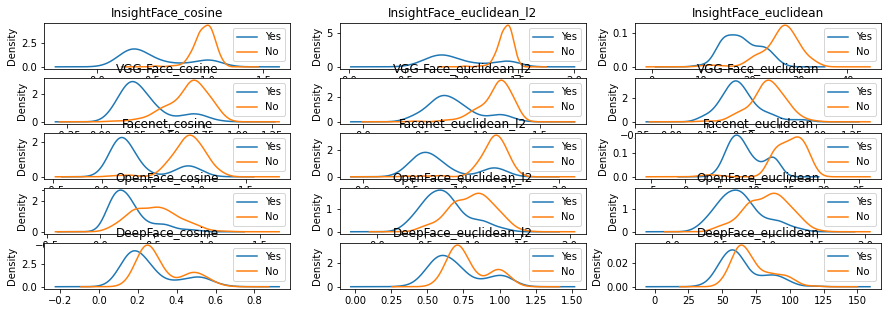

In [15]:
#Distribution

fig = plt.figure(figsize=(15, 15))

figure_idx = 1
for model in models:
    for metric in metrics:

        feature = '%s_%s' % (model, metric)

        ax1 = fig.add_subplot(len(models) * len(metrics), len(metrics), figure_idx)

        df[df.decision == "Yes"][feature].plot(kind='kde', title = feature, label = 'Yes', legend = True)
        df[df.decision == "No"][feature].plot(kind='kde', title = feature, label = 'No', legend = True)

        figure_idx = figure_idx + 1

plt.show()

In [16]:
columns = []
for model in models:
    for metric in metrics:
        feature = '%s_%s' % (model, metric)
        columns.append(feature)

columns.append("decision")

df = df[columns]

df.loc[df[df.decision == 'Yes'].index, 'decision'] = 1
df.loc[df[df.decision == 'No'].index, 'decision'] = 0

print(df.head())

   InsightFace_cosine  InsightFace_euclidean_l2  InsightFace_euclidean  \
0              0.3821                    0.8741                16.3660   
1              0.3279                    0.8099                16.9675   
2              0.3615                    0.8503                16.9925   
3              0.3816                    0.8736                16.6940   
4              0.3435                    0.8289                16.9506   

   VGG-Face_cosine  VGG-Face_euclidean_l2  VGG-Face_euclidean  Facenet_cosine  \
0           0.2555                 0.7149              0.4934          0.2426   
1           0.2364                 0.6876              0.4337          0.2466   
2           0.3180                 0.7975              0.4100          0.2591   
3           0.2974                 0.7712              0.4871          0.2307   
4           0.3117                 0.7895              0.4499          0.1937   

   Facenet_euclidean_l2  Facenet_euclidean  OpenFace_cosine  \
0    

In [17]:

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.30, random_state=17)

target_name = "decision"

y_train = df_train[target_name].values
x_train = df_train.drop(columns=[target_name]).values

y_test = df_test[target_name].values
x_test = df_test.drop(columns=[target_name]).values

In [18]:
import lightgbm as lgb

In [19]:
features = df.drop(columns=[target_name]).columns.tolist()

In [22]:
lgb_train = lgb.Dataset(x_train, y_train, feature_name = features)
lgb_test = lgb.Dataset(x_test, y_test, feature_name = features)

In [23]:
lgb_train

In [24]:
params = {
    'task': 'train'
    , 'boosting_type': 'gbdt'
    , 'objective': 'multiclass'
    , 'num_class': 2
    , 'metric': 'multi_logloss'
}


In [27]:

gbm = lgb.train(params, lgb_train, num_boost_round=250, early_stopping_rounds = 15 , valid_sets=lgb_test)

gbm.save_model("face-recognition-ensemble-model_InsightFace.txt")


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 998
[LightGBM] [Info] Number of data points in the train set: 196, number of used features: 15
[LightGBM] [Info] Start training from score -0.682995
[LightGBM] [Info] Start training from score -0.703404
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's multi_logloss: 0.625179
Training until validation scores don't improve for 15 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's multi_logloss: 0.570521
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's mu

In [1]:
prediction_classes = []
predictions = gbm.predict(x_test)

NameError: name 'gbm' is not defined

In [38]:
for prediction in predictions:
    prediction_class = np.argmax(prediction)
    prediction_classes.append(prediction_class)
y_test1=[]
for i in y_test:
    y_test1.append(i)
# y_test=y_test1  

print(y_test)
print("------")
print(prediction_classes)

cm = confusion_matrix(y_test1, prediction_classes)
print(cm)

tn, fp, fn, tp = cm.ravel()

recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = (tp + tn)/(tn + fp +  fn + tp)
f1 = 2 * (precision * recall) / (precision + recall)

print("Precision: ", 100*precision,"%")
print("Recall: ", 100*recall,"%")
print("F1 score ",100*f1, "%")
print("Accuracy: ", 100*accuracy,"%")
#--------------------------

[1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1]
------
[1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]
[[36  5]
 [ 6 37]]
Precision:  88.09523809523809 %
Recall:  86.04651162790698 %
F1 score  87.05882352941177 %
Accuracy:  86.90476190476191 %


In [40]:
idendities = {
    "Angelina": ["img1.jpg", "img2.jpg", "img4.jpg", "img5.jpg", "img6.jpg", "img7.jpg", "img10.jpg", "img11.jpg"],
    "Scarlett": ["img8.jpg", "img9.jpg", "img47.jpg", "img48.jpg", "img49.jpg", "img50.jpg", "img51.jpg"],
    "Jennifer": ["img3.jpg", "img12.jpg", "img53.jpg", "img54.jpg", "img55.jpg", "img56.jpg"],
    "Mark": ["img13.jpg", "img14.jpg", "img15.jpg", "img57.jpg", "img58.jpg"],
    "Jack": ["img16.jpg", "img17.jpg", "img59.jpg", "img61.jpg", "img62.jpg"],
    "Elon": ["img18.jpg", "img19.jpg", "img67.jpg"],
    "Jeff": ["img20.jpg", "img21.jpg"],
    "Marissa": ["img22.jpg", "img23.jpg"],
    "Sundar": ["img24.jpg", "img25.jpg"],
    "Katy": ["img26.jpg", "img27.jpg", "img28.jpg", "img42.jpg", "img43.jpg", "img44.jpg", "img45.jpg", "img46.jpg"],
    "Matt": ["img29.jpg", "img30.jpg", "img31.jpg", "img32.jpg", "img33.jpg"],
    "Leonardo": ["img34.jpg", "img35.jpg", "img36.jpg", "img37.jpg"],
    "George": ["img38.jpg", "img39.jpg", "img40.jpg", "img41.jpg"]
}

In [40]:
# Ref: https://github.com/serengil/deepface/tree/master/tests/dataset
idendities = {
    "Angelina": ["img1.jpg", "img2.jpg", "img4.jpg", "img5.jpg", "img6.jpg", "img7.jpg", "img10.jpg", "img11.jpg"],
    "Scarlett": ["img8.jpg", "img9.jpg"],
    "Jennifer": ["img3.jpg", "img12.jpg"],
    "Mark": ["img13.jpg", "img14.jpg", "img15.jpg"],
    "Jack": ["img16.jpg", "img17.jpg"],
    "Elon": ["img18.jpg", "img19.jpg"],
    "Jeff": ["img20.jpg", "img21.jpg"],
    "Marissa": ["img22.jpg", "img23.jpg"],
    "Sundar": ["img24.jpg", "img25.jpg"]
}

In [41]:
positives = []

for key, values in idendities.items():
    
    #print(key)
    for i in range(0, len(values)-1):
        for j in range(i+1, len(values)):
            #print(values[i], " and ", values[j])
            positive = []
            positive.append(values[i])
            positive.append(values[j])
            positives.append(positive)

In [42]:
positives = pd.DataFrame(positives, columns = ["file_x", "file_y"])
positives["decision"] = "Yes"

In [43]:
samples_list = list(idendities.values())

In [44]:
negatives = []

for i in range(0, len(idendities) - 1):
    for j in range(i+1, len(idendities)):
        #print(samples_list[i], " vs ",samples_list[j]) 
        cross_product = itertools.product(samples_list[i], samples_list[j])
        cross_product = list(cross_product)
        #print(cross_product)
        
        for cross_sample in cross_product:
            #print(cross_sample[0], " vs ", cross_sample[1])
            negative = []
            negative.append(cross_sample[0])
            negative.append(cross_sample[1])
            negatives.append(negative)
        

In [45]:
positives = pd.DataFrame(positives, columns = ["file_x", "file_y"])
positives["decision"] = "Yes"

In [46]:
pd

<module 'pandas' from '/home/quang/anaconda3/envs/deepface/lib/python3.10/site-packages/pandas/__init__.py'>

In [47]:
negatives = pd.DataFrame(negatives, columns = ["file_x", "file_y"])
negatives["decision"] = "No"

In [48]:
negatives

,file_x,file_y,decision
0,img1.jpg,img8.jpg,No
1,img1.jpg,img9.jpg,No
2,img2.jpg,img8.jpg,No
3,img2.jpg,img9.jpg,No
4,img4.jpg,img8.jpg,No
...,...,...,...
257,img21.jpg,img25.jpg,No
258,img22.jpg,img24.jpg,No
259,img22.jpg,img25.jpg,No
260,img23.jpg,img24.jpg,No


In [49]:
df

,file_x,file_y,decision,distance
0,tests/dataset/img1.jpg,tests/dataset/img2.jpg,Yes,0.2555
1,tests/dataset/img1.jpg,tests/dataset/img4.jpg,Yes,0.2364
2,tests/dataset/img1.jpg,tests/dataset/img5.jpg,Yes,0.3180
3,tests/dataset/img1.jpg,tests/dataset/img6.jpg,Yes,0.2974
4,tests/dataset/img1.jpg,tests/dataset/img7.jpg,Yes,0.3117
...,...,...,...,...
295,tests/dataset/img21.jpg,tests/dataset/img25.jpg,No,0.5362
296,tests/dataset/img22.jpg,tests/dataset/img24.jpg,No,0.7642
297,tests/dataset/img22.jpg,tests/dataset/img25.jpg,No,0.7819
298,tests/dataset/img23.jpg,tests/dataset/img24.jpg,No,0.6631


In [50]:
df = pd.concat([positives, negatives]).reset_index(drop = True)

In [51]:
df.file_x = "tests/dataset/"+df.file_x
df.file_y = "tests/dataset/"+df.file_y

In [52]:
from deepface import DeepFace
instances = df[["file_x", "file_y"]].values.tolist()

In [53]:
model_name = "InsightFace"
distance_metric = "cosine"

In [54]:
df

,file_x,file_y,decision
0,tests/dataset/img1.jpg,tests/dataset/img2.jpg,Yes
1,tests/dataset/img1.jpg,tests/dataset/img4.jpg,Yes
2,tests/dataset/img1.jpg,tests/dataset/img5.jpg,Yes
3,tests/dataset/img1.jpg,tests/dataset/img6.jpg,Yes
4,tests/dataset/img1.jpg,tests/dataset/img7.jpg,Yes
...,...,...,...
295,tests/dataset/img21.jpg,tests/dataset/img25.jpg,No
296,tests/dataset/img22.jpg,tests/dataset/img24.jpg,No
297,tests/dataset/img22.jpg,tests/dataset/img25.jpg,No
298,tests/dataset/img23.jpg,tests/dataset/img24.jpg,No


In [ ]:
resp_obj = DeepFace.verify(instances, model_name = model_name, distance_metric = distance_metric)

Verification:   0%|                                     | 0/300 [00:00<?, ?it/s]

(769, 769, 3)
(512, 512, 3)


Verification:   0%|                             | 1/300 [00:08<42:27,  8.52s/it]

(769, 769, 3)
(919, 919, 3)


Verification:   1%|▏                            | 2/300 [00:20<52:59, 10.67s/it]

(769, 769, 3)
(242, 242, 3)


Verification:   1%|▎                            | 3/300 [00:32<55:46, 11.27s/it]

(769, 769, 3)
(531, 531, 3)


Verification:   1%|▍                            | 4/300 [00:44<56:04, 11.37s/it]

(769, 769, 3)
(746, 746, 3)


Verification:   2%|▍                            | 5/300 [00:54<54:31, 11.09s/it]

(769, 769, 3)
(280, 280, 3)


Verification:   2%|▌                            | 6/300 [01:03<49:38, 10.13s/it]

(769, 769, 3)
(353, 353, 3)


Verification:   2%|▋                            | 7/300 [01:11<46:41,  9.56s/it]

(512, 512, 3)
(919, 919, 3)


Verification:   3%|▊                            | 8/300 [01:22<49:30, 10.17s/it]

(512, 512, 3)
(242, 242, 3)


Verification:   3%|▊                            | 9/300 [01:32<48:11,  9.94s/it]

(512, 512, 3)


In [22]:
distances = []
for i in range(0, len(instances)):
    distance = round(resp_obj["pair_%s" % (i+1)]["distance"], 4)
    distances.append(distance)

In [23]:
df["distance"] = distances

In [24]:
tp_mean = round(df[df.decision == "Yes"].mean().values[0], 4)
tp_std = round(df[df.decision == "Yes"].std().values[0], 4)
fp_mean = round(df[df.decision == "No"].mean().values[0], 4)
fp_std = round(df[df.decision == "No"].std().values[0], 4)

<AxesSubplot:ylabel='Density'>

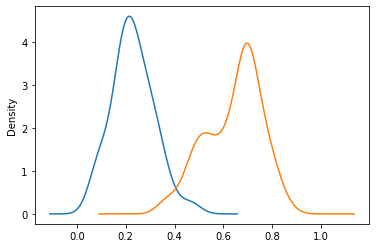

In [25]:
df[df.decision == "Yes"].distance.plot.kde()
df[df.decision == "No"].distance.plot.kde()

In [26]:
from chefboost import Chefboost as chef

In [27]:
config = {'algorithm': 'C4.5'}

In [29]:
tmp_df = df[['distance', 'decision']].rename(columns = {"decision": "Decision"}).copy()
# model = chef.fit(tmp_df, config)

In [31]:
model = chef.fit(tmp_df, config)

[INFO]:  3 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...


Process NoDaemonPoolWorker-825:
Fatal Python error: init_import_site: Failed to import the site module
Python runtime state: initialized
Traceback (most recent call last):
  File "/home/quang/anaconda3/envs/deepface/lib/python3.10/site.py", line 617, in <module>
    main()
  File "/home/quang/anaconda3/envs/deepface/lib/python3.10/site.py", line 604, in main
    known_paths = addsitepackages(known_paths)
  File "/home/quang/anaconda3/envs/deepface/lib/python3.10/site.py", line 387, in addsitepackages
    addsitedir(sitedir, known_paths)
  File "/home/quang/anaconda3/envs/deepface/lib/python3.10/site.py", line 226, in addsitedir
    addpackage(sitedir, name, known_paths)
  File "/home/quang/anaconda3/envs/deepface/lib/python3.10/site.py", line 186, in addpackage
    exec(line)
  File "<string>", line 1, in <module>
  File "/home/quang/anaconda3/envs/deepface/lib/python3.10/importlib/util.py", line 14, in <module>
    from contextlib import contextmanager
  File "/home/quang/anaconda3/en

KeyboardInterrupt: 

In [34]:
df.to_csv("face-recognition-pivot123.txt", index = False)

In [35]:
tmp_df = df[['distance', 'decision']].rename(columns = {"decision": "Decision"}).copy()

In [37]:
tmp_df.to_csv("face-recognition-pivot123.txt", index = False)